#### Read in your relevant h5ad files etc.. 

In [1]:
import os
import warnings
import tables

import scanpy as sc
import pandas as pd
import numpy as np

from numba.core.errors import NumbaDeprecationWarning
from pathlib import Path

warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

sc.logging.print_header()

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.0 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.10.4 pynndescent==0.5.10


In [2]:
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.3 pandas==2.0.0 numpy==1.23.5 matplotlib==3.7.1 networkx==3.1 scipy==1.10.1


In [3]:
FILEPATH = Path("/Users/nicoleanngunn/Desktop/Work/Ines TCR thymus/transfer_3137871_files_bbccc5c2")

In [4]:
#import pandas as pd

#tcr_files = []
#for sample in samples:
#    file_location = (
#        sample + "/dandelion/" + sample + "_t_filtered_contig_dandelion.tsv"
#    )
#    tcr_files.append(pd.read_csv(file_location, sep="\t"))
#tcr = pd.concat(tcr_files, ignore_index=True)
#tcr.reset_index(inplace=True, drop=True)
#tcr

bcr = []
for x in ["TCR_Control", "TCR_KO"]:
    bcr.append(
        ddl.load_data(
            FILEPATH
            / x
            / "dandelion"
            / "tmp"
            / "all_contig_igblast_db-all.tsv"
        )
    )

In [5]:
bcr = pd.concat(bcr)
#bcr.reset_index(inplace=True, drop=True)
#bcr

In [6]:
adatas = []
for x in ["Control", "KO"]:
    adatas.append(sc.read_h5ad(FILEPATH / ("TCR_" +x) / (x + "Filt_forVDJ.h5ad")))

In [7]:
adata = adatas[0].concatenate(adatas[1], index_unique=None)
adata

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html


AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch'
    var: 'gene_ids-Control', 'feature_types-Control', 'genome-Control', 'n_cells-Control', 'n_counts-Control', 'mito-Control', 'hemo-Control', 'ribo-Control', 'n_cells_by_counts-Control', 'mean_counts-Control', 'pct_dropout_by_counts-Control', 'total_counts-Control', 'gene_ids-Krt76-/-', 'feature_types-Krt76-/-', 'genome-Krt76-/-', 'n_cells-Krt76-/-', 'n_counts-Krt76-/-', 'mito-Krt76-/-', 'hemo-Krt76-/-', 'ribo-Krt76-/-', 'n_cells_by_counts-Krt76-/-', 'mean_counts-Krt76-/-', 'pct_dropout_by_counts-Krt76-/-', 'total_counts-Krt76-/-', 'n_cells', 'n_counts', 'mito', 'hemo', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',

In [8]:
adata.obs

n_genes  n_counts  n_genes_by_counts   
AAACCTGAGAGAACAG-1-Control      3862   13554.0               3862  \
AAACCTGAGCCATCGC-1-Control      3860   14011.0               3859   
AAACCTGAGGTGCAAC-1-Control      3118    8308.0               3116   
AAACCTGAGTCCATAC-1-Control      1705    3342.0               1705   
AAACCTGAGTTAAGTG-1-Control      1738    3108.0               1737   
...                              ...       ...                ...   
TTTGTCAGTCACCTAA-1-Krt76-/-     2958    6684.0               2958   
TTTGTCAGTCTAGAGG-1-Krt76-/-     1336    2274.0               1336   
TTTGTCAGTGGGTCAA-1-Krt76-/-     2642    5939.0               2642   
TTTGTCATCCCAAGTA-1-Krt76-/-     1325    2397.0               1325   
TTTGTCATCGGAATCT-1-Krt76-/-     2185    4290.0               2185   

                             total_counts  total_counts_mito  pct_counts_mito   
AAACCTGAGAGAACAG-1-Control        13554.0              102.0         0.752545  \
AAACCTGAGCCATCGC-1-Control        14010.0               43.0         0.306924   
AAACCTGAGGTGCAAC-1-Control         8306.0               77.0         0.927041   
AAACCTGAGTCCATAC-1-Control         3342.0               69.0         2.064632   
AAACCTGAGTTAAGTG-1-Control         3107.0               42.0         1.351786   
...                                   ...                ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-        6684.0              102.0         1.526032   
TTTGTCAGTCTAGAGG-1-Krt76-/-        2274.0               37.0         1.627089   
TTTGTCAGTGGGTCAA-1-Krt76-/-        5939.0              104.0         1.751137   
TTTGTCATCCCAAGTA-1-Krt76-/-        2397.0               49.0         2.044222   
TTTGTCATCGGAATCT-1-Krt76-/-        4290.0               85.0         1.981352   

                             total_counts_hemo  pct_counts_hemo   
AAACCTGAGAGAACAG-1-Control                 0.0              0.0  \
AAACCTGAGCCATCGC-1-Control                 0.0              0.0   
AAACCTGAGGTGCAAC-1-Control                 0.0              0.0   
AAACCTGAGTCCATAC-1-Control                 0.0              0.0   
AAACCTGAGTTAAGTG-1-Control                 0.0              0.0   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-                0.0              0.0   
TTTGTCAGTCTAGAGG-1-Krt76-/-                0.0              0.0   
TTTGTCAGTGGGTCAA-1-Krt76-/-                0.0              0.0   
TTTGTCATCCCAAGTA-1-Krt76-/-                0.0              0.0   
TTTGTCATCGGAATCT-1-Krt76-/-                0.0              0.0   

                             total_counts_ribo  pct_counts_ribo   
AAACCTGAGAGAACAG-1-Control              3427.0        25.284048  \
AAACCTGAGCCATCGC-1-Control              3580.0        25.553175   
AAACCTGAGGTGCAAC-1-Control              1745.0        21.008909   
AAACCTGAGTCCATAC-1-Control               827.0        24.745661   
AAACCTGAGTTAAGTG-1-Control               472.0        15.191503   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-             1168.0        17.474566   
TTTGTCAGTCTAGAGG-1-Krt76-/-              323.0        14.204046   
TTTGTCAGTGGGTCAA-1-Krt76-/-             1212.0        20.407476   
TTTGTCATCCCAAGTA-1-Krt76-/-              594.0        24.780977   
TTTGTCATCGGAATCT-1-Krt76-/-              853.0        19.883450   

                             doublet_score  predicted_doublet    Sample   
AAACCTGAGAGAACAG-1-Control        0.060215              False   Control  \
AAACCTGAGCCATCGC-1-Control        0.043403              False   Control   
AAACCTGAGGTGCAAC-1-Control        0.042290              False   Control   
AAACCTGAGTCCATAC-1-Control        0.179161              False   Control   
AAACCTGAGTTAAGTG-1-Control        0.012745              False   Control   
...                                    ...                ...       ...   
TTTGTCAGTCACCTAA-1-Krt76-/-       0.185714              False  Krt76-/-   
TTTGTCAGTCTAGAGG-

In [9]:
bcr

sequence_id   
sequence_id                                                                  
AAACCTGAGAAAGTGG-1-Control_contig_1    AAACCTGAGAAAGTGG-1-Control_contig_1  \
AAACCTGAGAAAGTGG-1-Control_contig_2    AAACCTGAGAAAGTGG-1-Control_contig_2   
AAACCTGAGAAAGTGG-1-Control_contig_5    AAACCTGAGAAAGTGG-1-Control_contig_5   
AAACCTGAGAAAGTGG-1-Control_contig_4    AAACCTGAGAAAGTGG-1-Control_contig_4   
AAACCTGAGAAAGTGG-1-Control_contig_3    AAACCTGAGAAAGTGG-1-Control_contig_3   
...                                                                    ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2   

                                                                               sequence   
sequence_id                                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1   AATACCCGTCTGGAGCCTGATTCCACCATGAGCTGCAGGCTTCTCC...  \
AAACCTGAGAAAGTGG-1-Control_contig_2   GGAGTCTGTAAGCACAAGTGTGTCTGGGCACAAGACACCCTTCAGA...   
AAACCTGAGAAAGTGG-1-Control_contig_5   GGTGACAAAGAGGAGGAAACCCAGTGATATAGATGTTCTCCCAGAG...   
AAACCTGAGAAAGTGG-1-Control_contig_4   GGGGAGAATCCCCAGTGGAGAGAGATAAAGAGCAAATGATGAAATC...   
AAACCTGAGAAAGTGG-1-Control_contig_3   GAAAAAGAAGAACAGGGGGTAAAGAGGAAACCCCTGCATTAGCTCG...   
...                                                                                 ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TGGGCTGTAAGCCCAAGTGTGTCTGGGCACAAGACACCCTTCAGAG...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  GAGCTTCTTGGCAACTGCAGCGGGGAGTTCTGGGGCTTCTGGCGTC...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  GGGAAGCACGTTTAGAGAAATCTGACTCTGCTGCACTCACCAGTGC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  GAAGAGTTGAGAGCAGCACTCTACACTGAACATGAATACTTCTCCA...   

                                     rev_comp productive   
sequence_id                                                
AAACCTGAGAAAGTGG-1-Control_contig_1         F          T  \
AAACCTGAGAAAGTGG-1-Control_contig_2         F          T   
AAACCTGAGAAAGTGG-1-Control_contig_5       NaN          F   
AAACCTGAGAAAGTGG-1-Control_contig_4         F          F   
AAACCTGAGAAAGTGG-1-Control_contig_3       NaN          F   
...                                       ...        ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2        F          T   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3      NaN          F   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3        F          F   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2        F          F   

                                                       v_call    d_call   
sequence_id                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1                  TRBV5*01       NaN  \
AAACCTGAGAAAGTGG-1-Control_contig_2   TRAV4D-4*03,TRAV4N-4*01       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_5                       NaN  TRBD2*01   
AAACCTGAGAAAGTGG-1-Control_contig_4                TRAV7-5*03       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_3                       NaN       NaN   
...                                                       ...       ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2          TRAV4-4/DV10*02       NaN   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3                      NaN       NaN   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1                TRBV16*01  TRBD2*01   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3                 TRDV1*02       NaN   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2               TRAV6-4*03       NaN   

                                                             j_call   
sequence_id                         

In [10]:
vdj, adatax = ddl.pp.check_contigs(bcr, adata, productive_only=False)

Preparing data: 31039it [00:04, 7200.40it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 11141/11141 [00:21<00:00, 519.68it/s]


In [12]:
# Saving objects
vdj.write_h5ddl("adata_tcr_InezMara_MS_111223.h5ddl")
adatax.write_h5ad("adata_tcr_InezMara_MS_111223.h5ad")

Subsetting productive vs non-productive

In [11]:
vdj_P = vdj[vdj.data.productive == "T"].copy()
vdj_NP = vdj[vdj.data.productive == "F"].copy()

In [12]:
adata_P = adata.copy()
adata_NP = adata.copy()

ddl.tl.transfer(adata_P, vdj_P)
ddl.tl.transfer(adata_NP, vdj_NP)

# I have actually saved mine... 

In [16]:
#adata_NP = adata_NP.write_h5ad("adata_tcr_InezMara_NG__NonProductiveonly_121223.h5ad")

# Re-plotting differences in V/J gene usage between control and KO; Non-productive only

## V gene Beta Chain

In [13]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VDJ_main"] != "No_contig"]

### Subset into individual cell types for V gene of Beta chain


### DN2a - V gene beta chain

In [46]:
adata_NPF.obs

n_genes  n_counts  n_genes_by_counts   
AAACCTGAGGTGCAAC-1-Control      3118    8308.0               3116  \
AAACCTGAGTTAAGTG-1-Control      1738    3108.0               1737   
AAACCTGCAAGTTCTG-1-Control      4814   20254.0               4813   
AAACCTGCATGGGAAC-1-Control      2928    8520.0               2928   
AAACCTGGTACAGTTC-1-Control      3870   14007.0               3867   
...                              ...       ...                ...   
TTTGTCACAATCGGTT-1-Krt76-/-     1395    2340.0               1395   
TTTGTCACAGATTGCT-1-Krt76-/-     2861    8443.0               2861   
TTTGTCACAGTAAGAT-1-Krt76-/-     1729    3269.0               1729   
TTTGTCAGTCACCTAA-1-Krt76-/-     2958    6684.0               2958   
TTTGTCAGTCTAGAGG-1-Krt76-/-     1336    2274.0               1336   

                             total_counts  total_counts_mito  pct_counts_mito   
AAACCTGAGGTGCAAC-1-Control         8306.0               77.0         0.927041  \
AAACCTGAGTTAAGTG-1-Control         3107.0               42.0         1.351786   
AAACCTGCAAGTTCTG-1-Control        20253.0               87.0         0.429566   
AAACCTGCATGGGAAC-1-Control         8520.0              105.0         1.232394   
AAACCTGGTACAGTTC-1-Control        14004.0              156.0         1.113967   
...                                   ...                ...              ...   
TTTGTCACAATCGGTT-1-Krt76-/-        2340.0               50.0         2.136752   
TTTGTCACAGATTGCT-1-Krt76-/-        8443.0               73.0         0.864622   
TTTGTCACAGTAAGAT-1-Krt76-/-        3269.0               45.0         1.376568   
TTTGTCAGTCACCTAA-1-Krt76-/-        6684.0              102.0         1.526032   
TTTGTCAGTCTAGAGG-1-Krt76-/-        2274.0               37.0         1.627089   

                             total_counts_hemo  pct_counts_hemo   
AAACCTGAGGTGCAAC-1-Control                 0.0              0.0  \
AAACCTGAGTTAAGTG-1-Control                 0.0              0.0   
AAACCTGCAAGTTCTG-1-Control                 0.0              0.0   
AAACCTGCATGGGAAC-1-Control                 0.0              0.0   
AAACCTGGTACAGTTC-1-Control                 0.0              0.0   
...                                        ...              ...   
TTTGTCACAATCGGTT-1-Krt76-/-                0.0              0.0   
TTTGTCACAGATTGCT-1-Krt76-/-                0.0              0.0   
TTTGTCACAGTAAGAT-1-Krt76-/-                0.0              0.0   
TTTGTCAGTCACCTAA-1-Krt76-/-                0.0              0.0   
TTTGTCAGTCTAGAGG-1-Krt76-/-                0.0              0.0   

                             total_counts_ribo  pct_counts_ribo  ...   
AAACCTGAGGTGCAAC-1-Control              1745.0        21.008909  ...  \
AAACCTGAGTTAAGTG-1-Control               472.0        15.191503  ...   
AAACCTGCAAGTTCTG-1-Control              4720.0        23.305189  ...   
AAACCTGCATGGGAAC-1-Control              2474.0        29.037560  ...   
AAACCTGGTACAGTTC-1-Control              3403.0        24.300200  ...   
...                                        ...              ...  ...   
TTTGTCACAATCGGTT-1-Krt76-/-              363.0        15.512821  ...   
TTTGTCACAGATTGCT-1-Krt76-/-             2521.0        29.859055  ...   
TTTGTCACAGTAAGAT-1-Krt76-/-              547.0        16.732946  ...   
TTTGTCAGTCACCTAA-1-Krt76-/-             1168.0        17.474566  ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-              323.0        14.204046  ...   

                             j_call_abT_VJ_main  v_call_gdT_VDJ_main   
AAACCTGAGGTGCAAC-1-Control               TRAJ31                 None  \
AAACCTGAGTTAAGTG-1-Control               TRAJ58                 None   
AAACCTGCAAGTTCTG-1-Control               TRAJ39                 None   
AAACCTGCATGGGAAC-1-Control                 None                 None   
AAACCTGGTACAGTTC-1-Control               TRAJ40                 None   
...                                         ...                  ...   
TTTGTCACAATCGGTT-1-Krt76-/-              TRAJ57      

In [139]:
adata_NPF_DN2a = adata_NPF[adata_NPF.obs["leiden"] == "7 DN2a"]

In [140]:
adata_NPF_DN2a

View of AnnData object with n_obs × n_vars = 60 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [138]:
working_df = pd.DataFrame(adata_NPF_DN2a.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV5                    6
         TRBV13-2                 4
         TRBV4                    4
         TRBV20                   3
         TRBV12-1                 3
         TRBV16                   3
         TRBV3                    3
         TRBV19                   3
         TRBV1                    2
         TRBV2                    2
         TRBV12-2                 2
         TRBV13-1                 2
         TRBV23                   1
         TRBV14                   1
         TRBV15                   1
         TRBV26                   1
         TRBV31                   1
         TRBV29                   1
         TRBV17                   1
         TRBV13-3                 0
         TRBV30                   0
Krt76-/- TRBV3                    3
         TRBV17                   2
         TRBV5                    2
         TRBV13-1                 1
         TRBV31                   1
         TRBV30                   1
         TRBV20                   1
         TRBV15                   1
         TRBV13-3                 1
         TRBV13-2                 1
         TRBV14                   1
         TRBV1                    1
         TRBV26                   0
         TRBV4                    0
         TRBV29                   0
         TRBV12-2                 0
         TRBV23                   0
         TRBV12-1                 0
         TRBV2                    0
         TRBV19                   0
         TRBV16                   0

In [51]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       6
1    Control            TRBV13-2       4
2    Control               TRBV4       4
3    Control              TRBV20       3
4    Control            TRBV12-1       3
5    Control              TRBV16       3
6    Control               TRBV3       3
7    Control              TRBV19       3
8    Control               TRBV1       2
9    Control               TRBV2       2
10   Control            TRBV12-2       2
11   Control            TRBV13-1       2
12   Control              TRBV23       1
13   Control              TRBV14       1
14   Control              TRBV15       1
15   Control              TRBV26       1
16   Control              TRBV31       1
17   Control              TRBV29       1
18   Control              TRBV17       1
19   Control            TRBV13-3       0
20   Control              TRBV30       0
21  Krt76-/-               TRBV3       3
22  Krt76-/-              TRBV17       2
23  Krt76-/-               TRBV5       2
24  Krt76-/-            TRBV13-1       1
25  Krt76-/-              TRBV31       1
26  Krt76-/-              TRBV30       1
27  Krt76-/-              TRBV20       1
28  Krt76-/-              TRBV15       1
29  Krt76-/-            TRBV13-3       1
30  Krt76-/-            TRBV13-2       1
31  Krt76-/-              TRBV14       1
32  Krt76-/-               TRBV1       1
33  Krt76-/-              TRBV26       0
34  Krt76-/-               TRBV4       0
35  Krt76-/-              TRBV29       0
36  Krt76-/-            TRBV12-2       0
37  Krt76-/-              TRBV23       0
38  Krt76-/-            TRBV12-1       0
39  Krt76-/-               TRBV2       0
40  Krt76-/-              TRBV19       0
41  Krt76-/-              TRBV16       0

In [52]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 44, 'Krt76-/-': 16}

In [53]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [54]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       6    0.136364
1    Control            TRBV13-2       4    0.090909
2    Control               TRBV4       4    0.090909
3    Control              TRBV20       3    0.068182
4    Control            TRBV12-1       3    0.068182
5    Control              TRBV16       3    0.068182
6    Control               TRBV3       3    0.068182
7    Control              TRBV19       3    0.068182
8    Control               TRBV1       2    0.045455
9    Control               TRBV2       2    0.045455
10   Control            TRBV12-2       2    0.045455
11   Control            TRBV13-1       2    0.045455
12   Control              TRBV23       1    0.022727
13   Control              TRBV14       1    0.022727
14   Control              TRBV15       1    0.022727
15   Control              TRBV26       1    0.022727
16   Control              TRBV31       1    0.022727
17   Control              TRBV29       1    0.022727
18   Control              TRBV17       1    0.022727
19   Control            TRBV13-3       0    0.000000
20   Control              TRBV30       0    0.000000
21  Krt76-/-               TRBV3       3    0.187500
22  Krt76-/-              TRBV17       2    0.125000
23  Krt76-/-               TRBV5       2    0.125000
24  Krt76-/-            TRBV13-1       1    0.062500
25  Krt76-/-              TRBV31       1    0.062500
26  Krt76-/-              TRBV30       1    0.062500
27  Krt76-/-              TRBV20       1    0.062500
28  Krt76-/-              TRBV15       1    0.062500
29  Krt76-/-            TRBV13-3       1    0.062500
30  Krt76-/-            TRBV13-2       1    0.062500
31  Krt76-/-              TRBV14       1    0.062500
32  Krt76-/-               TRBV1       1    0.062500
33  Krt76-/-              TRBV26       0    0.000000
34  Krt76-/-               TRBV4       0    0.000000
35  Krt76-/-              TRBV29       0    0.000000
36  Krt76-/-            TRBV12-2       0    0.000000
37  Krt76-/-              TRBV23       0    0.000000
38  Krt76-/-            TRBV12-1       0    0.000000
39  Krt76-/-               TRBV2       0    0.000000
40  Krt76-/-              TRBV19       0    0.000000
41  Krt76-/-              TRBV16       0    0.000000

In [58]:
working_control = working_df[working_df["Sample"] == "Control"]

In [59]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [61]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [62]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [63]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.375,
 'TRBV12-1': 0.0,
 'TRBV12-2': 0.0,
 'TRBV13-1': 1.375,
 'TRBV13-2': 0.6875,
 'TRBV13-3': inf,
 'TRBV14': 2.75,
 'TRBV15': 2.75,
 'TRBV16': 0.0,
 'TRBV17': 5.5,
 'TRBV19': 0.0,
 'TRBV2': 0.0,
 'TRBV20': 0.9166666666666667,
 'TRBV23': 0.0,
 'TRBV26': 0.0,
 'TRBV29': 0.0,
 'TRBV3': 2.75,
 'TRBV30': inf,
 'TRBV31': 2.75,
 'TRBV4': 0.0,
 'TRBV5': 0.9166666666666667}

In [64]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       6    0.136364    0.916667
1    Control            TRBV13-2       4    0.090909    0.687500
2    Control               TRBV4       4    0.090909    0.000000
3    Control              TRBV20       3    0.068182    0.916667
4    Control            TRBV12-1       3    0.068182    0.000000
5    Control              TRBV16       3    0.068182    0.000000
6    Control               TRBV3       3    0.068182    2.750000
7    Control              TRBV19       3    0.068182    0.000000
8    Control               TRBV1       2    0.045455    1.375000
9    Control               TRBV2       2    0.045455    0.000000
10   Control            TRBV12-2       2    0.045455    0.000000
11   Control            TRBV13-1       2    0.045455    1.375000
12   Control              TRBV23       1    0.022727    0.000000
13   Control              TRBV14       1    0.022727    2.750000
14   Control              TRBV15       1    0.022727    2.750000
15   Control              TRBV26       1    0.022727    0.000000
16   Control              TRBV31       1    0.022727    2.750000
17   Control              TRBV29       1    0.022727    0.000000
18   Control              TRBV17       1    0.022727    5.500000
19   Control            TRBV13-3       0    0.000000         inf
20   Control              TRBV30       0    0.000000         inf
21  Krt76-/-               TRBV3       3    0.187500    2.750000
22  Krt76-/-              TRBV17       2    0.125000    5.500000
23  Krt76-/-               TRBV5       2    0.125000    0.916667
24  Krt76-/-            TRBV13-1       1    0.062500    1.375000
25  Krt76-/-              TRBV31       1    0.062500    2.750000
26  Krt76-/-              TRBV30       1    0.062500         inf
27  Krt76-/-              TRBV20       1    0.062500    0.916667
28  Krt76-/-              TRBV15       1    0.062500    2.750000
29  Krt76-/-            TRBV13-3       1    0.062500         inf
30  Krt76-/-            TRBV13-2       1    0.062500    0.687500
31  Krt76-/-              TRBV14       1    0.062500    2.750000
32  Krt76-/-               TRBV1       1    0.062500    1.375000
33  Krt76-/-              TRBV26       0    0.000000    0.000000
34  Krt76-/-               TRBV4       0    0.000000    0.000000
35  Krt76-/-              TRBV29       0    0.000000    0.000000
36  Krt76-/-            TRBV12-2       0    0.000000    0.000000
37  Krt76-/-              TRBV23       0    0.000000    0.000000
38  Krt76-/-            TRBV12-1       0    0.000000    0.000000
39  Krt76-/-               TRBV2       0    0.000000    0.000000
40  Krt76-/-              TRBV19       0    0.000000    0.000000
41  Krt76-/-              TRBV16       0    0.000000    0.000000

In [65]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [66]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [67]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [68]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

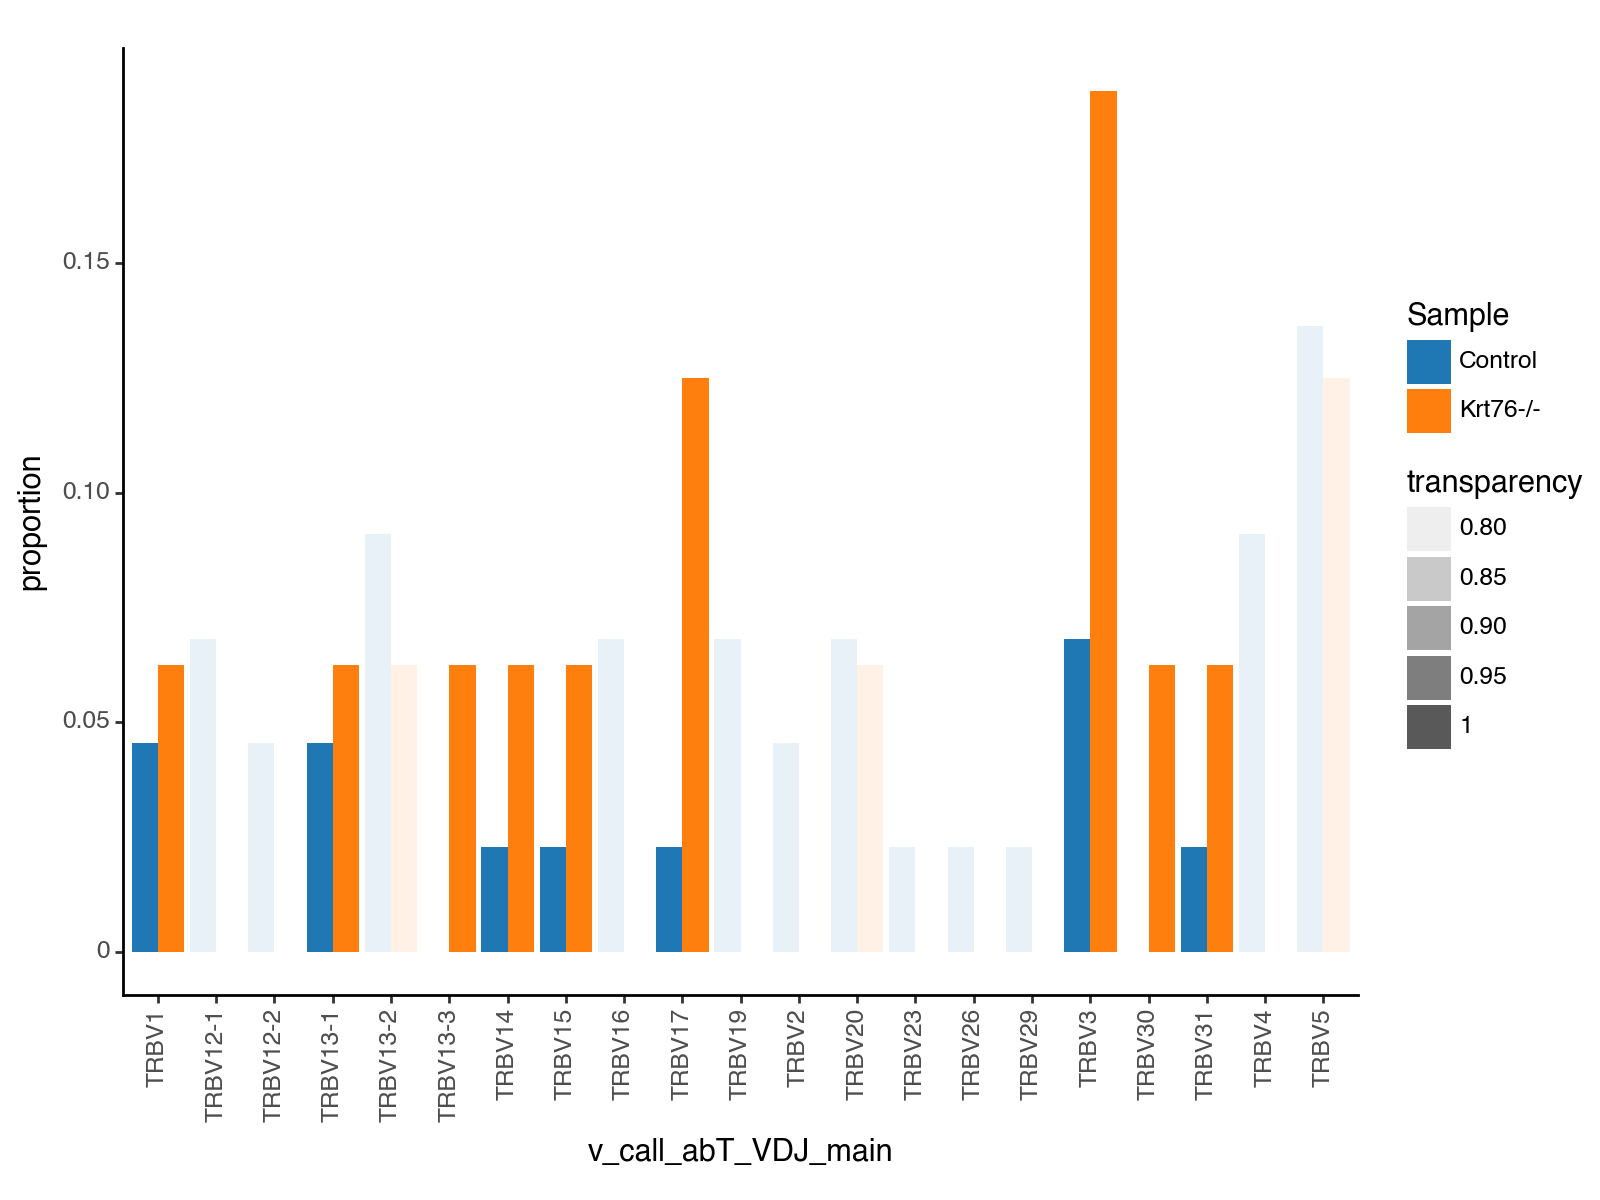

<Figure Size: (800 x 600)>

In [69]:
p

In [70]:
p.save("VgeneBetaChain_DN2a_NP_111223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2a_NP_111223.pdf


### DN2b - V gene beta chain

In [71]:
adata_NPF_DN2b = adata_NPF[adata_NPF.obs["leiden"] == "12 DN2b 1"]

In [72]:
adata_NPF_DN2b

View of AnnData object with n_obs × n_vars = 46 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [73]:
working_df = pd.DataFrame(adata_NPF_DN2b.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV5                    6
         TRBV1                    4
         TRBV15                   4
         TRBV3                    3
         TRBV20                   2
         TRBV12-1                 2
         TRBV26                   2
         TRBV17                   2
         TRBV13-2                 1
         TRBV24                   1
         TRBV13-3                 1
         TRBV14                   1
         TRBV31                   1
         TRBV29                   1
         TRBV2                    1
         TRBV23                   0
         TRBV16                   0
         TRBV30                   0
Krt76-/- TRBV3                    4
         TRBV14                   2
         TRBV5                    2
         TRBV23                   1
         TRBV26                   1
         TRBV16                   1
         TRBV13-2                 1
         TRBV20                   1
         TRBV30                   1
         TRBV29                   0
         TRBV31                   0
         TRBV24                   0
         TRBV15                   0
         TRBV2                    0
         TRBV17                   0
         TRBV13-3                 0
         TRBV12-1                 0
         TRBV1                    0

In [74]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       6
1    Control               TRBV1       4
2    Control              TRBV15       4
3    Control               TRBV3       3
4    Control              TRBV20       2
5    Control            TRBV12-1       2
6    Control              TRBV26       2
7    Control              TRBV17       2
8    Control            TRBV13-2       1
9    Control              TRBV24       1
10   Control            TRBV13-3       1
11   Control              TRBV14       1
12   Control              TRBV31       1
13   Control              TRBV29       1
14   Control               TRBV2       1
15   Control              TRBV23       0
16   Control              TRBV16       0
17   Control              TRBV30       0
18  Krt76-/-               TRBV3       4
19  Krt76-/-              TRBV14       2
20  Krt76-/-               TRBV5       2
21  Krt76-/-              TRBV23       1
22  Krt76-/-              TRBV26       1
23  Krt76-/-              TRBV16       1
24  Krt76-/-            TRBV13-2       1
25  Krt76-/-              TRBV20       1
26  Krt76-/-              TRBV30       1
27  Krt76-/-              TRBV29       0
28  Krt76-/-              TRBV31       0
29  Krt76-/-              TRBV24       0
30  Krt76-/-              TRBV15       0
31  Krt76-/-               TRBV2       0
32  Krt76-/-              TRBV17       0
33  Krt76-/-            TRBV13-3       0
34  Krt76-/-            TRBV12-1       0
35  Krt76-/-               TRBV1       0

In [75]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 32, 'Krt76-/-': 14}

In [76]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [77]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       6    0.187500
1    Control               TRBV1       4    0.125000
2    Control              TRBV15       4    0.125000
3    Control               TRBV3       3    0.093750
4    Control              TRBV20       2    0.062500
5    Control            TRBV12-1       2    0.062500
6    Control              TRBV26       2    0.062500
7    Control              TRBV17       2    0.062500
8    Control            TRBV13-2       1    0.031250
9    Control              TRBV24       1    0.031250
10   Control            TRBV13-3       1    0.031250
11   Control              TRBV14       1    0.031250
12   Control              TRBV31       1    0.031250
13   Control              TRBV29       1    0.031250
14   Control               TRBV2       1    0.031250
15   Control              TRBV23       0    0.000000
16   Control              TRBV16       0    0.000000
17   Control              TRBV30       0    0.000000
18  Krt76-/-               TRBV3       4    0.285714
19  Krt76-/-              TRBV14       2    0.142857
20  Krt76-/-               TRBV5       2    0.142857
21  Krt76-/-              TRBV23       1    0.071429
22  Krt76-/-              TRBV26       1    0.071429
23  Krt76-/-              TRBV16       1    0.071429
24  Krt76-/-            TRBV13-2       1    0.071429
25  Krt76-/-              TRBV20       1    0.071429
26  Krt76-/-              TRBV30       1    0.071429
27  Krt76-/-              TRBV29       0    0.000000
28  Krt76-/-              TRBV31       0    0.000000
29  Krt76-/-              TRBV24       0    0.000000
30  Krt76-/-              TRBV15       0    0.000000
31  Krt76-/-               TRBV2       0    0.000000
32  Krt76-/-              TRBV17       0    0.000000
33  Krt76-/-            TRBV13-3       0    0.000000
34  Krt76-/-            TRBV12-1       0    0.000000
35  Krt76-/-               TRBV1       0    0.000000

In [78]:
working_control = working_df[working_df["Sample"] == "Control"]

In [79]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [80]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [81]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [82]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.0,
 'TRBV12-1': 0.0,
 'TRBV13-2': 2.2857142857142856,
 'TRBV13-3': 0.0,
 'TRBV14': 4.571428571428571,
 'TRBV15': 0.0,
 'TRBV16': inf,
 'TRBV17': 0.0,
 'TRBV2': 0.0,
 'TRBV20': 1.1428571428571428,
 'TRBV23': inf,
 'TRBV24': 0.0,
 'TRBV26': 1.1428571428571428,
 'TRBV29': 0.0,
 'TRBV3': 3.0476190476190474,
 'TRBV30': inf,
 'TRBV31': 0.0,
 'TRBV5': 0.7619047619047619}

In [83]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       6    0.187500    0.761905
1    Control               TRBV1       4    0.125000    0.000000
2    Control              TRBV15       4    0.125000    0.000000
3    Control               TRBV3       3    0.093750    3.047619
4    Control              TRBV20       2    0.062500    1.142857
5    Control            TRBV12-1       2    0.062500    0.000000
6    Control              TRBV26       2    0.062500    1.142857
7    Control              TRBV17       2    0.062500    0.000000
8    Control            TRBV13-2       1    0.031250    2.285714
9    Control              TRBV24       1    0.031250    0.000000
10   Control            TRBV13-3       1    0.031250    0.000000
11   Control              TRBV14       1    0.031250    4.571429
12   Control              TRBV31       1    0.031250    0.000000
13   Control              TRBV29       1    0.031250    0.000000
14   Control               TRBV2       1    0.031250    0.000000
15   Control              TRBV23       0    0.000000         inf
16   Control              TRBV16       0    0.000000         inf
17   Control              TRBV30       0    0.000000         inf
18  Krt76-/-               TRBV3       4    0.285714    3.047619
19  Krt76-/-              TRBV14       2    0.142857    4.571429
20  Krt76-/-               TRBV5       2    0.142857    0.761905
21  Krt76-/-              TRBV23       1    0.071429         inf
22  Krt76-/-              TRBV26       1    0.071429    1.142857
23  Krt76-/-              TRBV16       1    0.071429         inf
24  Krt76-/-            TRBV13-2       1    0.071429    2.285714
25  Krt76-/-              TRBV20       1    0.071429    1.142857
26  Krt76-/-              TRBV30       1    0.071429         inf
27  Krt76-/-              TRBV29       0    0.000000    0.000000
28  Krt76-/-              TRBV31       0    0.000000    0.000000
29  Krt76-/-              TRBV24       0    0.000000    0.000000
30  Krt76-/-              TRBV15       0    0.000000    0.000000
31  Krt76-/-               TRBV2       0    0.000000    0.000000
32  Krt76-/-              TRBV17       0    0.000000    0.000000
33  Krt76-/-            TRBV13-3       0    0.000000    0.000000
34  Krt76-/-            TRBV12-1       0    0.000000    0.000000
35  Krt76-/-               TRBV1       0    0.000000    0.000000

In [88]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [84]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [85]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [90]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

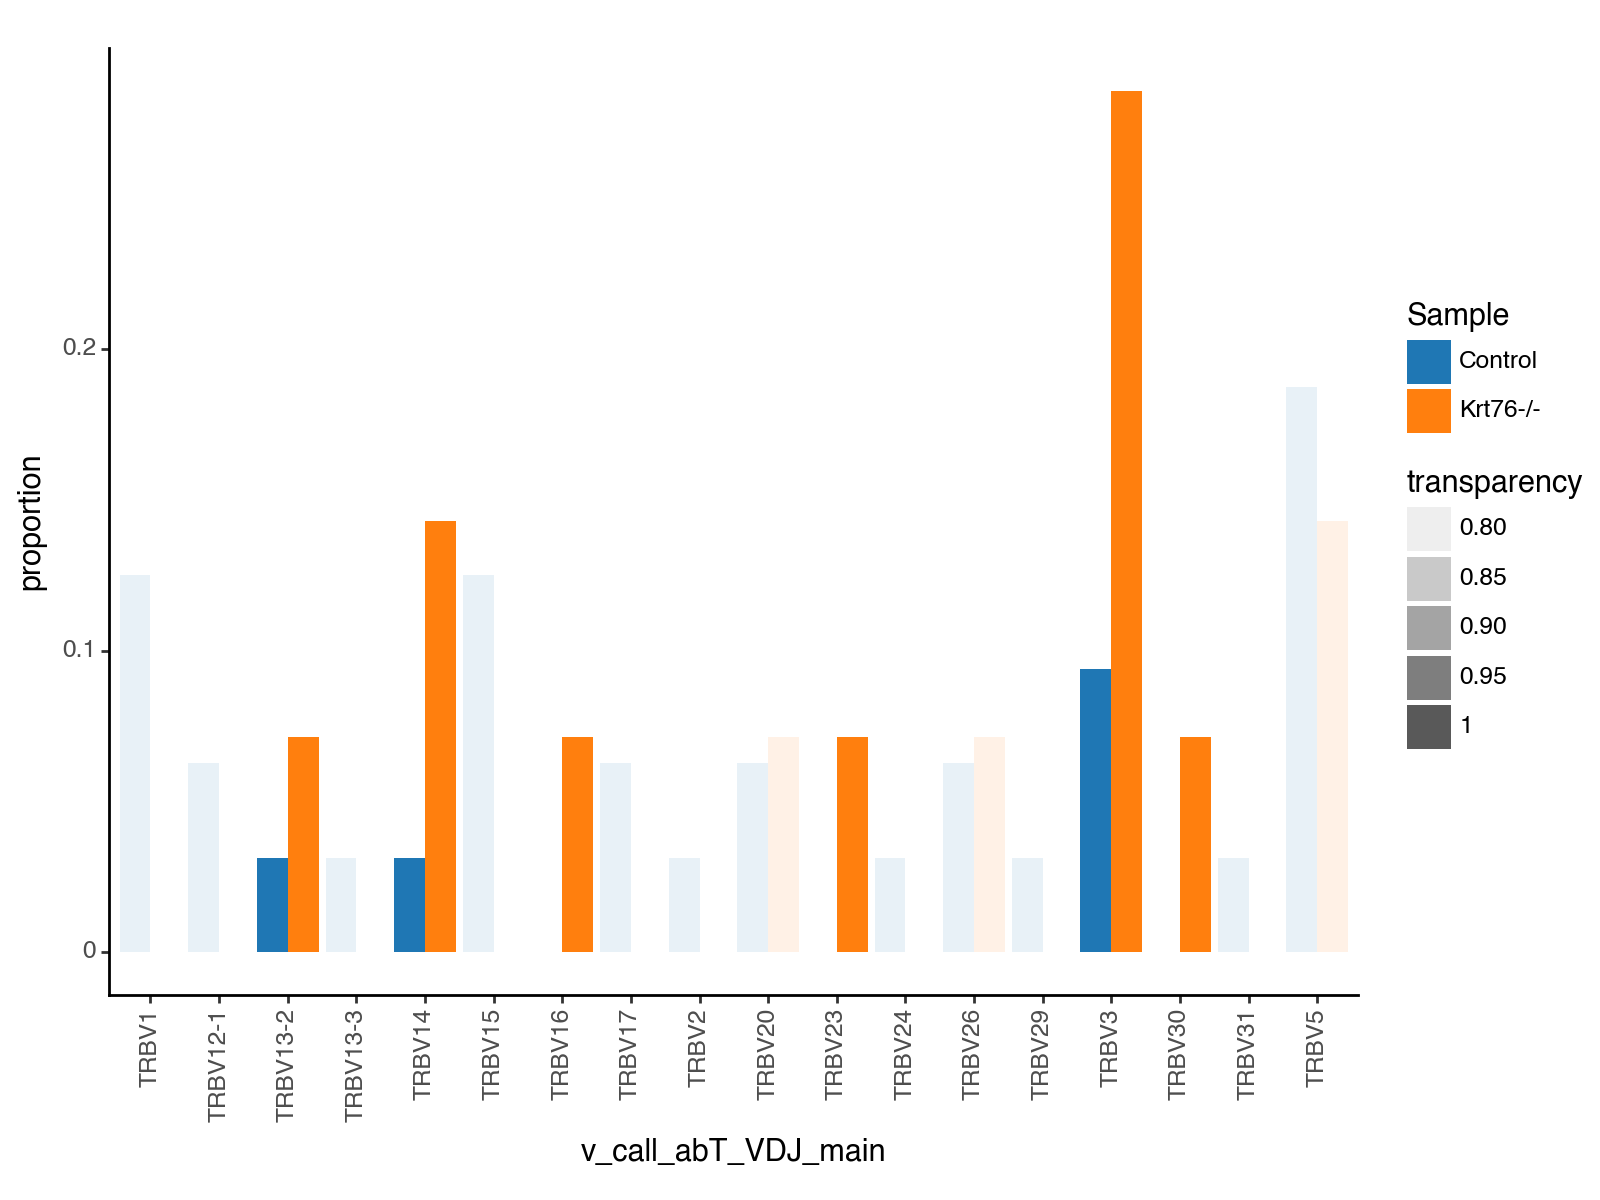

<Figure Size: (800 x 600)>

In [91]:
p

In [92]:
p.save("VgeneBetaChain_DN2b_121223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2b_121223.pdf


### DN2b 2 - V gene beta chain

In [94]:
adata_NPF_DN2b2 = adata_NPF[adata_NPF.obs["leiden"] == "4 DN2b 2"]

In [96]:
adata_NPF_DN2b2

View of AnnData object with n_obs × n_vars = 411 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [95]:
working_df = pd.DataFrame(adata_NPF_DN2b2.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV13-2                31
         TRBV20                  27
         TRBV19                  24
         TRBV12-1                24
         TRBV5                   24
         TRBV13-1                20
         TRBV15                  19
         TRBV1                   18
         TRBV31                  18
         TRBV2                   16
         TRBV17                  13
         TRBV3                   11
         TRBV16                  11
         TRBV12-2                 8
         TRBV4                    7
         TRBV13-3                 6
         TRBV29                   6
         TRBV14                   5
         TRBV26                   5
         TRBV24                   3
         TRBV30                   0
Krt76-/- TRBV1                   14
         TRBV16                  12
         TRBV13-1                10
         TRBV31                  10
         TRBV13-2                10
         TRBV3                    7
         TRBV12-1                 7
         TRBV19                   6
         TRBV5                    6
         TRBV17                   5
         TRBV13-3                 4
         TRBV26                   4
         TRBV2                    4
         TRBV12-2                 3
         TRBV15                   3
         TRBV20                   3
         TRBV29                   2
         TRBV30                   2
         TRBV14                   2
         TRBV4                    1
         TRBV24                   0

In [97]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      31
1    Control              TRBV20      27
2    Control              TRBV19      24
3    Control            TRBV12-1      24
4    Control               TRBV5      24
5    Control            TRBV13-1      20
6    Control              TRBV15      19
7    Control               TRBV1      18
8    Control              TRBV31      18
9    Control               TRBV2      16
10   Control              TRBV17      13
11   Control               TRBV3      11
12   Control              TRBV16      11
13   Control            TRBV12-2       8
14   Control               TRBV4       7
15   Control            TRBV13-3       6
16   Control              TRBV29       6
17   Control              TRBV14       5
18   Control              TRBV26       5
19   Control              TRBV24       3
20   Control              TRBV30       0
21  Krt76-/-               TRBV1      14
22  Krt76-/-              TRBV16      12
23  Krt76-/-            TRBV13-1      10
24  Krt76-/-              TRBV31      10
25  Krt76-/-            TRBV13-2      10
26  Krt76-/-               TRBV3       7
27  Krt76-/-            TRBV12-1       7
28  Krt76-/-              TRBV19       6
29  Krt76-/-               TRBV5       6
30  Krt76-/-              TRBV17       5
31  Krt76-/-            TRBV13-3       4
32  Krt76-/-              TRBV26       4
33  Krt76-/-               TRBV2       4
34  Krt76-/-            TRBV12-2       3
35  Krt76-/-              TRBV15       3
36  Krt76-/-              TRBV20       3
37  Krt76-/-              TRBV29       2
38  Krt76-/-              TRBV30       2
39  Krt76-/-              TRBV14       2
40  Krt76-/-               TRBV4       1
41  Krt76-/-              TRBV24       0

In [98]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 296, 'Krt76-/-': 115}

In [99]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [100]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      31    0.104730
1    Control              TRBV20      27    0.091216
2    Control              TRBV19      24    0.081081
3    Control            TRBV12-1      24    0.081081
4    Control               TRBV5      24    0.081081
5    Control            TRBV13-1      20    0.067568
6    Control              TRBV15      19    0.064189
7    Control               TRBV1      18    0.060811
8    Control              TRBV31      18    0.060811
9    Control               TRBV2      16    0.054054
10   Control              TRBV17      13    0.043919
11   Control               TRBV3      11    0.037162
12   Control              TRBV16      11    0.037162
13   Control            TRBV12-2       8    0.027027
14   Control               TRBV4       7    0.023649
15   Control            TRBV13-3       6    0.020270
16   Control              TRBV29       6    0.020270
17   Control              TRBV14       5    0.016892
18   Control              TRBV26       5    0.016892
19   Control              TRBV24       3    0.010135
20   Control              TRBV30       0    0.000000
21  Krt76-/-               TRBV1      14    0.121739
22  Krt76-/-              TRBV16      12    0.104348
23  Krt76-/-            TRBV13-1      10    0.086957
24  Krt76-/-              TRBV31      10    0.086957
25  Krt76-/-            TRBV13-2      10    0.086957
26  Krt76-/-               TRBV3       7    0.060870
27  Krt76-/-            TRBV12-1       7    0.060870
28  Krt76-/-              TRBV19       6    0.052174
29  Krt76-/-               TRBV5       6    0.052174
30  Krt76-/-              TRBV17       5    0.043478
31  Krt76-/-            TRBV13-3       4    0.034783
32  Krt76-/-              TRBV26       4    0.034783
33  Krt76-/-               TRBV2       4    0.034783
34  Krt76-/-            TRBV12-2       3    0.026087
35  Krt76-/-              TRBV15       3    0.026087
36  Krt76-/-              TRBV20       3    0.026087
37  Krt76-/-              TRBV29       2    0.017391
38  Krt76-/-              TRBV30       2    0.017391
39  Krt76-/-              TRBV14       2    0.017391
40  Krt76-/-               TRBV4       1    0.008696
41  Krt76-/-              TRBV24       0    0.000000

In [104]:
working_control = working_df[working_df["Sample"] == "Control"]

In [105]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [106]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [107]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [108]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 2.0019323671497586,
 'TRBV12-1': 0.7507246376811594,
 'TRBV12-2': 0.9652173913043477,
 'TRBV13-1': 1.2869565217391303,
 'TRBV13-2': 0.8302945301542777,
 'TRBV13-3': 1.7159420289855072,
 'TRBV14': 1.0295652173913044,
 'TRBV15': 0.4064073226544622,
 'TRBV16': 2.8079051383399207,
 'TRBV17': 0.9899665551839464,
 'TRBV19': 0.6434782608695652,
 'TRBV2': 0.6434782608695652,
 'TRBV20': 0.2859903381642512,
 'TRBV24': 0.0,
 'TRBV26': 2.0591304347826087,
 'TRBV29': 0.8579710144927536,
 'TRBV3': 1.6379446640316204,
 'TRBV30': inf,
 'TRBV31': 1.429951690821256,
 'TRBV4': 0.36770186335403726,
 'TRBV5': 0.6434782608695652}

In [109]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      31    0.104730    0.830295
1    Control              TRBV20      27    0.091216    0.285990
2    Control              TRBV19      24    0.081081    0.643478
3    Control            TRBV12-1      24    0.081081    0.750725
4    Control               TRBV5      24    0.081081    0.643478
5    Control            TRBV13-1      20    0.067568    1.286957
6    Control              TRBV15      19    0.064189    0.406407
7    Control               TRBV1      18    0.060811    2.001932
8    Control              TRBV31      18    0.060811    1.429952
9    Control               TRBV2      16    0.054054    0.643478
10   Control              TRBV17      13    0.043919    0.989967
11   Control               TRBV3      11    0.037162    1.637945
12   Control              TRBV16      11    0.037162    2.807905
13   Control            TRBV12-2       8    0.027027    0.965217
14   Control               TRBV4       7    0.023649    0.367702
15   Control            TRBV13-3       6    0.020270    1.715942
16   Control              TRBV29       6    0.020270    0.857971
17   Control              TRBV14       5    0.016892    1.029565
18   Control              TRBV26       5    0.016892    2.059130
19   Control              TRBV24       3    0.010135    0.000000
20   Control              TRBV30       0    0.000000         inf
21  Krt76-/-               TRBV1      14    0.121739    2.001932
22  Krt76-/-              TRBV16      12    0.104348    2.807905
23  Krt76-/-            TRBV13-1      10    0.086957    1.286957
24  Krt76-/-              TRBV31      10    0.086957    1.429952
25  Krt76-/-            TRBV13-2      10    0.086957    0.830295
26  Krt76-/-               TRBV3       7    0.060870    1.637945
27  Krt76-/-            TRBV12-1       7    0.060870    0.750725
28  Krt76-/-              TRBV19       6    0.052174    0.643478
29  Krt76-/-               TRBV5       6    0.052174    0.643478
30  Krt76-/-              TRBV17       5    0.043478    0.989967
31  Krt76-/-            TRBV13-3       4    0.034783    1.715942
32  Krt76-/-              TRBV26       4    0.034783    2.059130
33  Krt76-/-               TRBV2       4    0.034783    0.643478
34  Krt76-/-            TRBV12-2       3    0.026087    0.965217
35  Krt76-/-              TRBV15       3    0.026087    0.406407
36  Krt76-/-              TRBV20       3    0.026087    0.285990
37  Krt76-/-              TRBV29       2    0.017391    0.857971
38  Krt76-/-              TRBV30       2    0.017391         inf
39  Krt76-/-              TRBV14       2    0.017391    1.029565
40  Krt76-/-               TRBV4       1    0.008696    0.367702
41  Krt76-/-              TRBV24       0    0.000000    0.000000

In [110]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [111]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [112]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [113]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

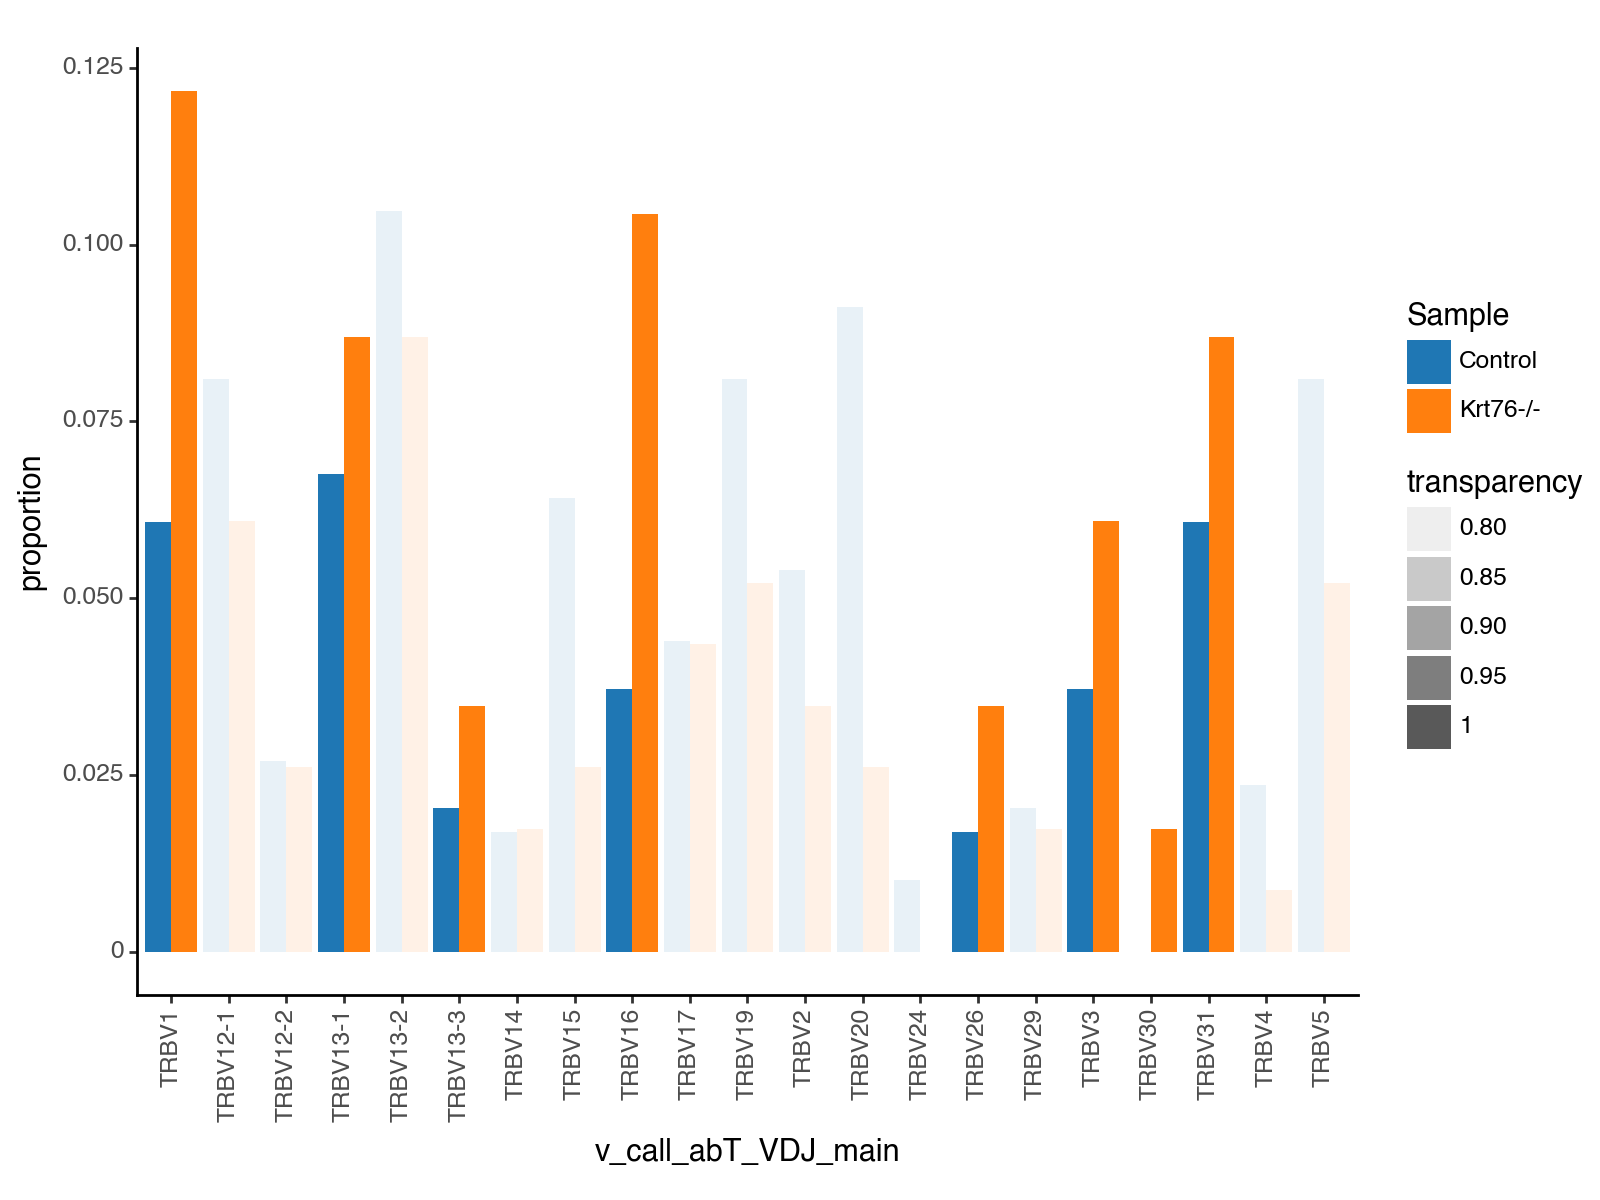

<Figure Size: (800 x 600)>

In [114]:
p

In [115]:
p.save("VgeneBetaChain_DN2b2_121223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN2b2_121223.pdf


### DN3 - V gene beta chain

In [116]:
adata_NPF_DN3 = adata_NPF[adata_NPF.obs["leiden"] == "10 DN3"]

In [117]:
adata_NPF_DN3

View of AnnData object with n_obs × n_vars = 107 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [118]:
working_df = pd.DataFrame(adata_NPF_DN3.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV16                   9
         TRBV12-1                 8
         TRBV2                    6
         TRBV5                    6
         TRBV19                   6
         TRBV1                    5
         TRBV13-2                 5
         TRBV26                   5
         TRBV4                    4
         TRBV20                   4
         TRBV17                   4
         TRBV12-2                 4
         TRBV15                   3
         TRBV13-1                 3
         TRBV23                   2
         TRBV13-3                 2
         TRBV14                   2
         TRBV3                    1
         TRBV31                   0
Krt76-/- TRBV15                   5
         TRBV20                   4
         TRBV12-1                 3
         TRBV19                   3
         TRBV31                   3
         TRBV13-1                 2
         TRBV12-2                 1
         TRBV13-3                 1
         TRBV3                    1
         TRBV23                   1
         TRBV16                   1
         TRBV17                   1
         TRBV26                   1
         TRBV4                    1
         TRBV1                    0
         TRBV2                    0
         TRBV14                   0
         TRBV13-2                 0
         TRBV5                    0

In [119]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control              TRBV16       9
1    Control            TRBV12-1       8
2    Control               TRBV2       6
3    Control               TRBV5       6
4    Control              TRBV19       6
5    Control               TRBV1       5
6    Control            TRBV13-2       5
7    Control              TRBV26       5
8    Control               TRBV4       4
9    Control              TRBV20       4
10   Control              TRBV17       4
11   Control            TRBV12-2       4
12   Control              TRBV15       3
13   Control            TRBV13-1       3
14   Control              TRBV23       2
15   Control            TRBV13-3       2
16   Control              TRBV14       2
17   Control               TRBV3       1
18   Control              TRBV31       0
19  Krt76-/-              TRBV15       5
20  Krt76-/-              TRBV20       4
21  Krt76-/-            TRBV12-1       3
22  Krt76-/-              TRBV19       3
23  Krt76-/-              TRBV31       3
24  Krt76-/-            TRBV13-1       2
25  Krt76-/-            TRBV12-2       1
26  Krt76-/-            TRBV13-3       1
27  Krt76-/-               TRBV3       1
28  Krt76-/-              TRBV23       1
29  Krt76-/-              TRBV16       1
30  Krt76-/-              TRBV17       1
31  Krt76-/-              TRBV26       1
32  Krt76-/-               TRBV4       1
33  Krt76-/-               TRBV1       0
34  Krt76-/-               TRBV2       0
35  Krt76-/-              TRBV14       0
36  Krt76-/-            TRBV13-2       0
37  Krt76-/-               TRBV5       0

In [120]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 79, 'Krt76-/-': 28}

In [121]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [122]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control              TRBV16       9    0.113924
1    Control            TRBV12-1       8    0.101266
2    Control               TRBV2       6    0.075949
3    Control               TRBV5       6    0.075949
4    Control              TRBV19       6    0.075949
5    Control               TRBV1       5    0.063291
6    Control            TRBV13-2       5    0.063291
7    Control              TRBV26       5    0.063291
8    Control               TRBV4       4    0.050633
9    Control              TRBV20       4    0.050633
10   Control              TRBV17       4    0.050633
11   Control            TRBV12-2       4    0.050633
12   Control              TRBV15       3    0.037975
13   Control            TRBV13-1       3    0.037975
14   Control              TRBV23       2    0.025316
15   Control            TRBV13-3       2    0.025316
16   Control              TRBV14       2    0.025316
17   Control               TRBV3       1    0.012658
18   Control              TRBV31       0    0.000000
19  Krt76-/-              TRBV15       5    0.178571
20  Krt76-/-              TRBV20       4    0.142857
21  Krt76-/-            TRBV12-1       3    0.107143
22  Krt76-/-              TRBV19       3    0.107143
23  Krt76-/-              TRBV31       3    0.107143
24  Krt76-/-            TRBV13-1       2    0.071429
25  Krt76-/-            TRBV12-2       1    0.035714
26  Krt76-/-            TRBV13-3       1    0.035714
27  Krt76-/-               TRBV3       1    0.035714
28  Krt76-/-              TRBV23       1    0.035714
29  Krt76-/-              TRBV16       1    0.035714
30  Krt76-/-              TRBV17       1    0.035714
31  Krt76-/-              TRBV26       1    0.035714
32  Krt76-/-               TRBV4       1    0.035714
33  Krt76-/-               TRBV1       0    0.000000
34  Krt76-/-               TRBV2       0    0.000000
35  Krt76-/-              TRBV14       0    0.000000
36  Krt76-/-            TRBV13-2       0    0.000000
37  Krt76-/-               TRBV5       0    0.000000

In [124]:
working_control = working_df[working_df["Sample"] == "Control"]

In [125]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [126]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [127]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [128]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.0,
 'TRBV12-1': 1.0580357142857142,
 'TRBV12-2': 0.7053571428571428,
 'TRBV13-1': 1.8809523809523807,
 'TRBV13-2': 0.0,
 'TRBV13-3': 1.4107142857142856,
 'TRBV14': 0.0,
 'TRBV15': 4.7023809523809526,
 'TRBV16': 0.3134920634920635,
 'TRBV17': 0.7053571428571428,
 'TRBV19': 1.4107142857142856,
 'TRBV2': 0.0,
 'TRBV20': 2.821428571428571,
 'TRBV23': 1.4107142857142856,
 'TRBV26': 0.5642857142857142,
 'TRBV3': 2.821428571428571,
 'TRBV31': inf,
 'TRBV4': 0.7053571428571428,
 'TRBV5': 0.0}

In [129]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control              TRBV16       9    0.113924    0.313492
1    Control            TRBV12-1       8    0.101266    1.058036
2    Control               TRBV2       6    0.075949    0.000000
3    Control               TRBV5       6    0.075949    0.000000
4    Control              TRBV19       6    0.075949    1.410714
5    Control               TRBV1       5    0.063291    0.000000
6    Control            TRBV13-2       5    0.063291    0.000000
7    Control              TRBV26       5    0.063291    0.564286
8    Control               TRBV4       4    0.050633    0.705357
9    Control              TRBV20       4    0.050633    2.821429
10   Control              TRBV17       4    0.050633    0.705357
11   Control            TRBV12-2       4    0.050633    0.705357
12   Control              TRBV15       3    0.037975    4.702381
13   Control            TRBV13-1       3    0.037975    1.880952
14   Control              TRBV23       2    0.025316    1.410714
15   Control            TRBV13-3       2    0.025316    1.410714
16   Control              TRBV14       2    0.025316    0.000000
17   Control               TRBV3       1    0.012658    2.821429
18   Control              TRBV31       0    0.000000         inf
19  Krt76-/-              TRBV15       5    0.178571    4.702381
20  Krt76-/-              TRBV20       4    0.142857    2.821429
21  Krt76-/-            TRBV12-1       3    0.107143    1.058036
22  Krt76-/-              TRBV19       3    0.107143    1.410714
23  Krt76-/-              TRBV31       3    0.107143         inf
24  Krt76-/-            TRBV13-1       2    0.071429    1.880952
25  Krt76-/-            TRBV12-2       1    0.035714    0.705357
26  Krt76-/-            TRBV13-3       1    0.035714    1.410714
27  Krt76-/-               TRBV3       1    0.035714    2.821429
28  Krt76-/-              TRBV23       1    0.035714    1.410714
29  Krt76-/-              TRBV16       1    0.035714    0.313492
30  Krt76-/-              TRBV17       1    0.035714    0.705357
31  Krt76-/-              TRBV26       1    0.035714    0.564286
32  Krt76-/-               TRBV4       1    0.035714    0.705357
33  Krt76-/-               TRBV1       0    0.000000    0.000000
34  Krt76-/-               TRBV2       0    0.000000    0.000000
35  Krt76-/-              TRBV14       0    0.000000    0.000000
36  Krt76-/-            TRBV13-2       0    0.000000    0.000000
37  Krt76-/-               TRBV5       0    0.000000    0.000000

In [130]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [133]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

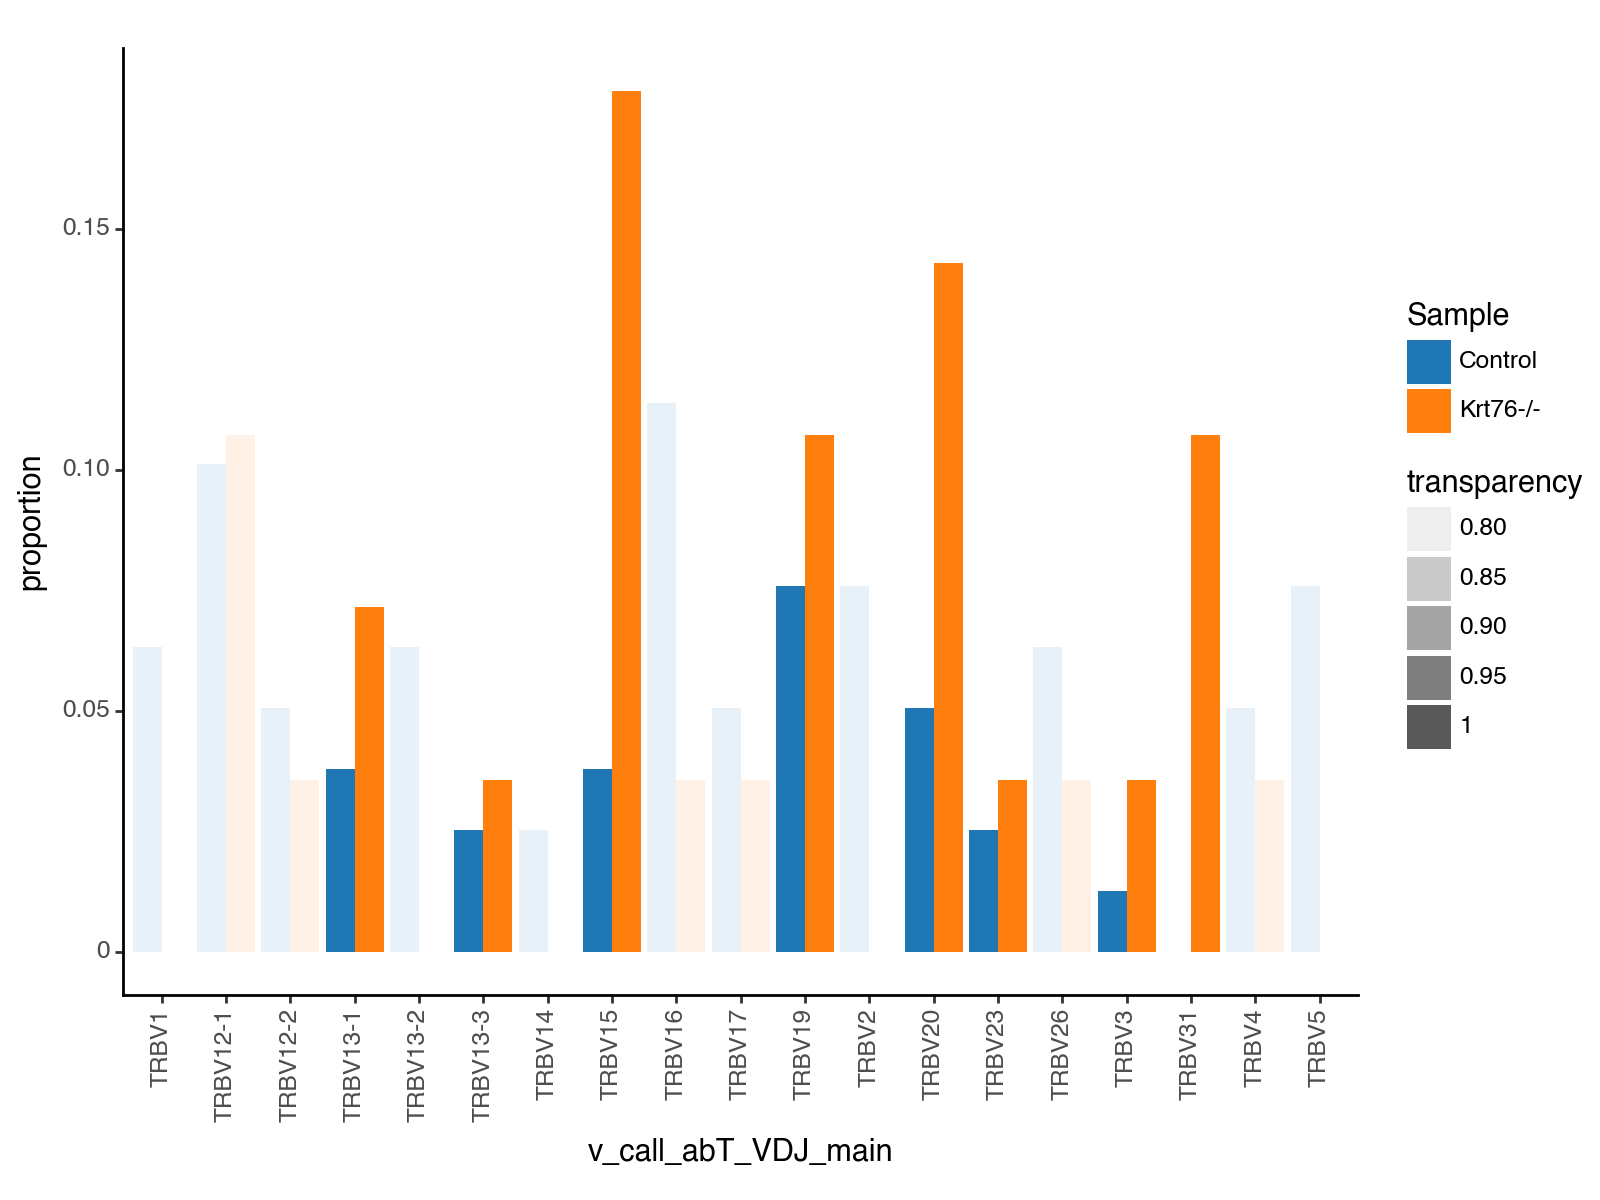

<Figure Size: (800 x 600)>

In [134]:
p

In [135]:
p.save("VgeneBetaChain_DN3_121223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3_121223.pdf


### 0 DN3a - V gene beta chain

In [136]:
adata_NPF_DN3a = adata_NPF[adata_NPF.obs["leiden"] == "0 DN3a"]

In [137]:
adata_NPF_DN3a

View of AnnData object with n_obs × n_vars = 952 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [138]:
working_df = pd.DataFrame(adata_NPF_DN3a.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV13-1                47
         TRBV15                  46
         TRBV31                  41
         TRBV13-2                39
         TRBV5                   37
         TRBV16                  36
         TRBV1                   35
         TRBV19                  35
         TRBV12-1                34
         TRBV4                   33
         TRBV3                   23
         TRBV20                  19
         TRBV26                  19
         TRBV2                   18
         TRBV14                  16
         TRBV13-3                16
         TRBV29                  16
         TRBV12-2                14
         TRBV17                  13
         TRBV24                   9
         TRBV23                   4
         TRBV30                   4
         TRBV26,TRBV24            1
         TRBV21                   1
Krt76-/- TRBV19                  37
         TRBV13-1                34
         TRBV5                   32
         TRBV15                  28
         TRBV13-2                27
         TRBV16                  27
         TRBV31                  25
         TRBV12-1                21
         TRBV4                   21
         TRBV17                  20
         TRBV3                   20
         TRBV1                   19
         TRBV20                  14
         TRBV26                  14
         TRBV12-2                13
         TRBV13-3                10
         TRBV2                    8
         TRBV24                   7
         TRBV14                   7
         TRBV23                   6
         TRBV29                   5
         TRBV30                   1
         TRBV21                   0
         TRBV26,TRBV24            0

In [139]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-1      47
1    Control              TRBV15      46
2    Control              TRBV31      41
3    Control            TRBV13-2      39
4    Control               TRBV5      37
5    Control              TRBV16      36
6    Control               TRBV1      35
7    Control              TRBV19      35
8    Control            TRBV12-1      34
9    Control               TRBV4      33
10   Control               TRBV3      23
11   Control              TRBV20      19
12   Control              TRBV26      19
13   Control               TRBV2      18
14   Control              TRBV14      16
15   Control            TRBV13-3      16
16   Control              TRBV29      16
17   Control            TRBV12-2      14
18   Control              TRBV17      13
19   Control              TRBV24       9
20   Control              TRBV23       4
21   Control              TRBV30       4
22   Control       TRBV26,TRBV24       1
23   Control              TRBV21       1
24  Krt76-/-              TRBV19      37
25  Krt76-/-            TRBV13-1      34
26  Krt76-/-               TRBV5      32
27  Krt76-/-              TRBV15      28
28  Krt76-/-            TRBV13-2      27
29  Krt76-/-              TRBV16      27
30  Krt76-/-              TRBV31      25
31  Krt76-/-            TRBV12-1      21
32  Krt76-/-               TRBV4      21
33  Krt76-/-              TRBV17      20
34  Krt76-/-               TRBV3      20
35  Krt76-/-               TRBV1      19
36  Krt76-/-              TRBV20      14
37  Krt76-/-              TRBV26      14
38  Krt76-/-            TRBV12-2      13
39  Krt76-/-            TRBV13-3      10
40  Krt76-/-               TRBV2       8
41  Krt76-/-              TRBV24       7
42  Krt76-/-              TRBV14       7
43  Krt76-/-              TRBV23       6
44  Krt76-/-              TRBV29       5
45  Krt76-/-              TRBV30       1
46  Krt76-/-              TRBV21       0
47  Krt76-/-       TRBV26,TRBV24       0

In [140]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 556, 'Krt76-/-': 396}

In [141]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [142]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-1      47    0.084532
1    Control              TRBV15      46    0.082734
2    Control              TRBV31      41    0.073741
3    Control            TRBV13-2      39    0.070144
4    Control               TRBV5      37    0.066547
5    Control              TRBV16      36    0.064748
6    Control               TRBV1      35    0.062950
7    Control              TRBV19      35    0.062950
8    Control            TRBV12-1      34    0.061151
9    Control               TRBV4      33    0.059353
10   Control               TRBV3      23    0.041367
11   Control              TRBV20      19    0.034173
12   Control              TRBV26      19    0.034173
13   Control               TRBV2      18    0.032374
14   Control              TRBV14      16    0.028777
15   Control            TRBV13-3      16    0.028777
16   Control              TRBV29      16    0.028777
17   Control            TRBV12-2      14    0.025180
18   Control              TRBV17      13    0.023381
19   Control              TRBV24       9    0.016187
20   Control              TRBV23       4    0.007194
21   Control              TRBV30       4    0.007194
22   Control       TRBV26,TRBV24       1    0.001799
23   Control              TRBV21       1    0.001799
24  Krt76-/-              TRBV19      37    0.093434
25  Krt76-/-            TRBV13-1      34    0.085859
26  Krt76-/-               TRBV5      32    0.080808
27  Krt76-/-              TRBV15      28    0.070707
28  Krt76-/-            TRBV13-2      27    0.068182
29  Krt76-/-              TRBV16      27    0.068182
30  Krt76-/-              TRBV31      25    0.063131
31  Krt76-/-            TRBV12-1      21    0.053030
32  Krt76-/-               TRBV4      21    0.053030
33  Krt76-/-              TRBV17      20    0.050505
34  Krt76-/-               TRBV3      20    0.050505
35  Krt76-/-               TRBV1      19    0.047980
36  Krt76-/-              TRBV20      14    0.035354
37  Krt76-/-              TRBV26      14    0.035354
38  Krt76-/-            TRBV12-2      13    0.032828
39  Krt76-/-            TRBV13-3      10    0.025253
40  Krt76-/-               TRBV2       8    0.020202
41  Krt76-/-              TRBV24       7    0.017677
42  Krt76-/-              TRBV14       7    0.017677
43  Krt76-/-              TRBV23       6    0.015152
44  Krt76-/-              TRBV29       5    0.012626
45  Krt76-/-              TRBV30       1    0.002525
46  Krt76-/-              TRBV21       0    0.000000
47  Krt76-/-       TRBV26,TRBV24       0    0.000000

In [143]:
working_control = working_df[working_df["Sample"] == "Control"]

In [144]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [145]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [146]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [147]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.7621933621933622,
 'TRBV12-1': 0.8672014260249554,
 'TRBV12-2': 1.3037518037518039,
 'TRBV13-1': 1.0156888029228455,
 'TRBV13-2': 0.9720279720279721,
 'TRBV13-3': 0.8775252525252525,
 'TRBV14': 0.6142676767676767,
 'TRBV15': 0.8546332894158981,
 'TRBV16': 1.053030303030303,
 'TRBV17': 2.16006216006216,
 'TRBV19': 1.4842712842712844,
 'TRBV2': 0.6240179573512907,
 'TRBV20': 1.034556087187666,
 'TRBV21': 0.0,
 'TRBV23': 2.106060606060606,
 'TRBV24': 1.0920314253647587,
 'TRBV26': 1.034556087187666,
 'TRBV26,TRBV24': 0.0,
 'TRBV29': 0.43876262626262624,
 'TRBV3': 1.2209046991655688,
 'TRBV30': 0.351010101010101,
 'TRBV31': 0.8561221975856123,
 'TRBV4': 0.8934802571166208,
 'TRBV5': 1.2143052143052144}

In [148]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-1      47    0.084532    1.015689
1    Control              TRBV15      46    0.082734    0.854633
2    Control              TRBV31      41    0.073741    0.856122
3    Control            TRBV13-2      39    0.070144    0.972028
4    Control               TRBV5      37    0.066547    1.214305
5    Control              TRBV16      36    0.064748    1.053030
6    Control               TRBV1      35    0.062950    0.762193
7    Control              TRBV19      35    0.062950    1.484271
8    Control            TRBV12-1      34    0.061151    0.867201
9    Control               TRBV4      33    0.059353    0.893480
10   Control               TRBV3      23    0.041367    1.220905
11   Control              TRBV20      19    0.034173    1.034556
12   Control              TRBV26      19    0.034173    1.034556
13   Control               TRBV2      18    0.032374    0.624018
14   Control              TRBV14      16    0.028777    0.614268
15   Control            TRBV13-3      16    0.028777    0.877525
16   Control              TRBV29      16    0.028777    0.438763
17   Control            TRBV12-2      14    0.025180    1.303752
18   Control              TRBV17      13    0.023381    2.160062
19   Control              TRBV24       9    0.016187    1.092031
20   Control              TRBV23       4    0.007194    2.106061
21   Control              TRBV30       4    0.007194    0.351010
22   Control       TRBV26,TRBV24       1    0.001799    0.000000
23   Control              TRBV21       1    0.001799    0.000000
24  Krt76-/-              TRBV19      37    0.093434    1.484271
25  Krt76-/-            TRBV13-1      34    0.085859    1.015689
26  Krt76-/-               TRBV5      32    0.080808    1.214305
27  Krt76-/-              TRBV15      28    0.070707    0.854633
28  Krt76-/-            TRBV13-2      27    0.068182    0.972028
29  Krt76-/-              TRBV16      27    0.068182    1.053030
30  Krt76-/-              TRBV31      25    0.063131    0.856122
31  Krt76-/-            TRBV12-1      21    0.053030    0.867201
32  Krt76-/-               TRBV4      21    0.053030    0.893480
33  Krt76-/-              TRBV17      20    0.050505    2.160062
34  Krt76-/-               TRBV3      20    0.050505    1.220905
35  Krt76-/-               TRBV1      19    0.047980    0.762193
36  Krt76-/-              TRBV20      14    0.035354    1.034556
37  Krt76-/-              TRBV26      14    0.035354    1.034556
38  Krt76-/-            TRBV12-2      13    0.032828    1.303752
39  Krt76-/-            TRBV13-3      10    0.025253    0.877525
40  Krt76-/-               TRBV2       8    0.020202    0.624018
41  Krt76-/-              TRBV24       7    0.017677    1.092031
42  Krt76-/-              TRBV14       7    0.017677    0.614268
43  Krt76-/-              TRBV23       6    0.015152    2.106061
44  Krt76-/-              TRBV29       5    0.012626    0.438763
45  Krt76-/-              TRBV30       1    0.002525    0.351010
46  Krt76-/-              TRBV21       0    0.000000    0.000000
47  Krt76-/-       TRBV26,TRBV24       0    0.000000    0.000000

In [149]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [150]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

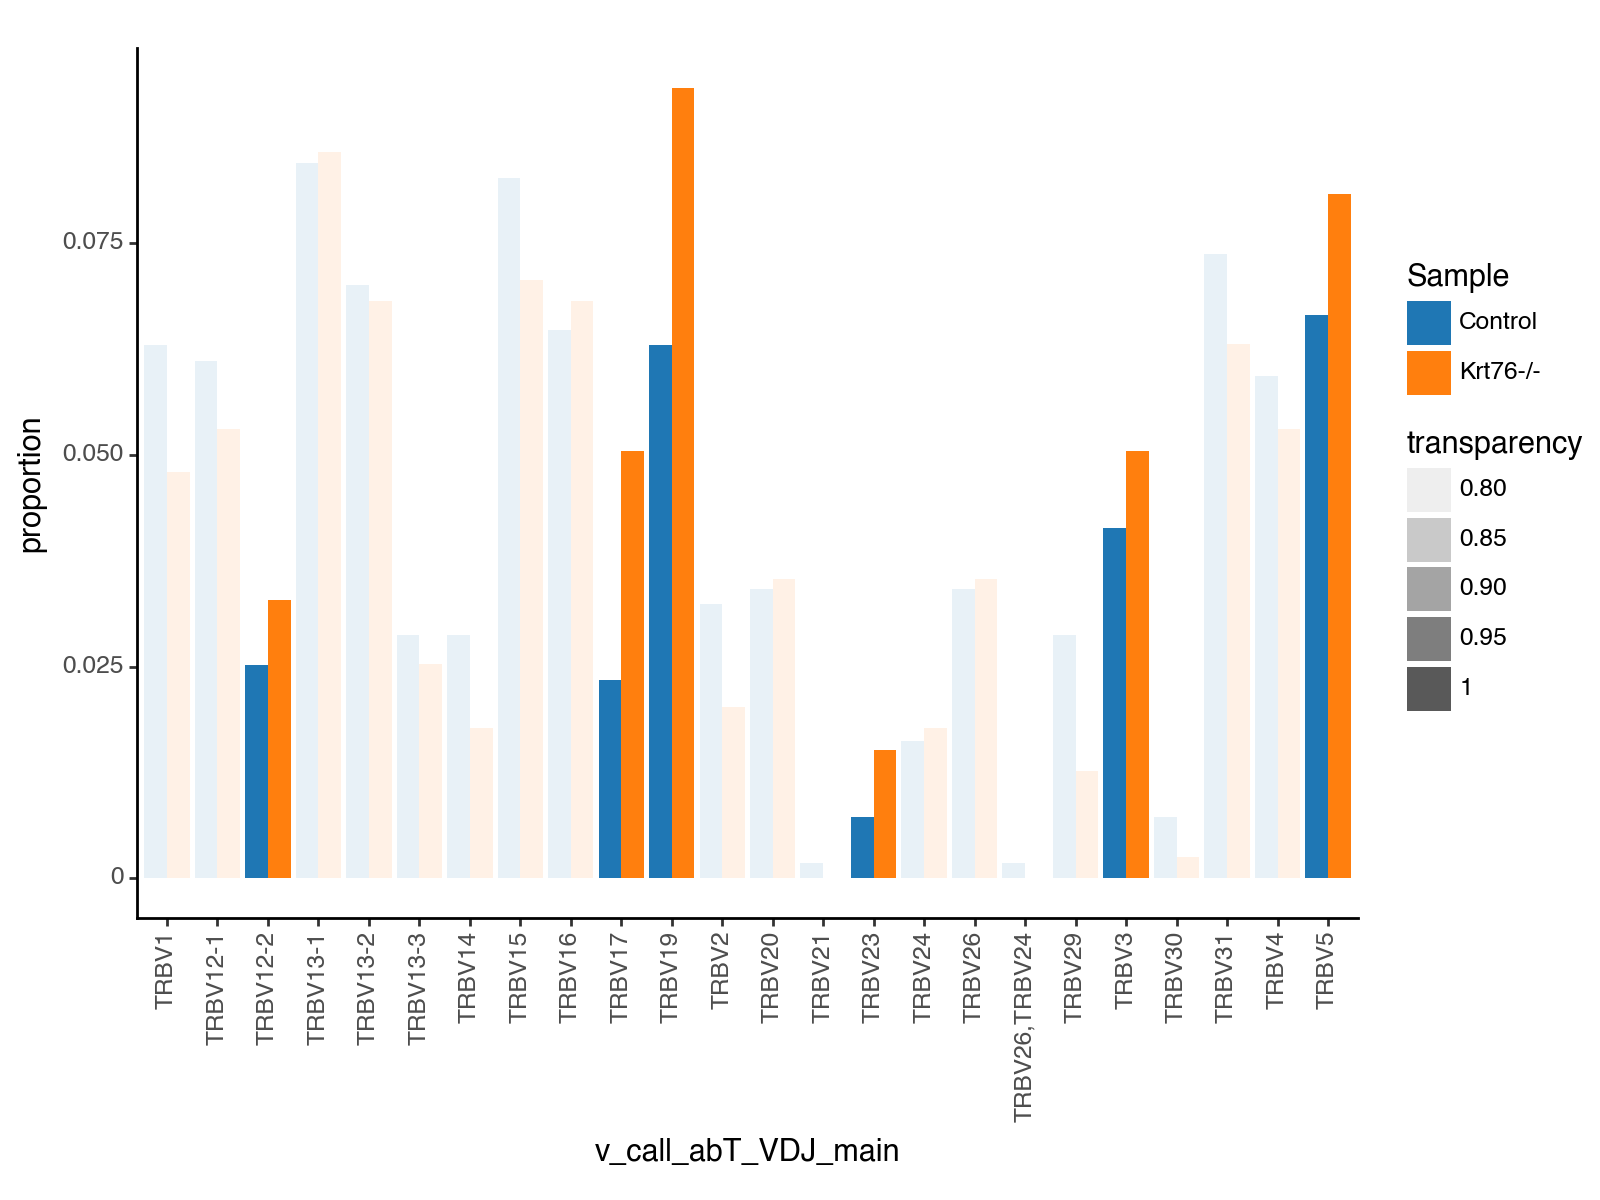

<Figure Size: (800 x 600)>

In [151]:
p

In [152]:
p.save("VgeneBetaChain_DN3a_121223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3a_121223.pdf


### DN3a / DN3b - V gene beta chain

In [153]:
adata_NPF_DN3aDN3b = adata_NPF[adata_NPF.obs["leiden"] == "1 DN3a / DN3b"]

In [154]:
adata_NPF_DN3aDN3b

View of AnnData object with n_obs × n_vars = 608 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [159]:
working_df = pd.DataFrame(adata_NPF_DN3aDN3b.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV15                  43
         TRBV5                   37
         TRBV13-2                29
         TRBV19                  25
         TRBV12-1                25
         TRBV4                   25
         TRBV16                  25
         TRBV13-1                22
         TRBV20                  21
         TRBV1                   19
         TRBV3                   16
         TRBV31                  16
         TRBV17                  16
         TRBV12-2                14
         TRBV26                  14
         TRBV13-3                12
         TRBV29                  11
         TRBV2                   10
         TRBV14                   8
         TRBV24                   6
         TRBV23                   4
         TRBV10                   2
         TRBV21                   2
         TRBV30                   1
Krt76-/- TRBV5                   20
         TRBV1                   17
         TRBV16                  17
         TRBV13-2                15
         TRBV4                   15
         TRBV3                   15
         TRBV19                  15
         TRBV13-1                13
         TRBV15                  13
         TRBV12-1                12
         TRBV17                  11
         TRBV14                   7
         TRBV20                   7
         TRBV12-2                 5
         TRBV31                   5
         TRBV29                   5
         TRBV26                   5
         TRBV13-3                 3
         TRBV24                   2
         TRBV2                    2
         TRBV30                   1
         TRBV23                   0
         TRBV21                   0
         TRBV10                   0

In [160]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control              TRBV15      43
1    Control               TRBV5      37
2    Control            TRBV13-2      29
3    Control              TRBV19      25
4    Control            TRBV12-1      25
5    Control               TRBV4      25
6    Control              TRBV16      25
7    Control            TRBV13-1      22
8    Control              TRBV20      21
9    Control               TRBV1      19
10   Control               TRBV3      16
11   Control              TRBV31      16
12   Control              TRBV17      16
13   Control            TRBV12-2      14
14   Control              TRBV26      14
15   Control            TRBV13-3      12
16   Control              TRBV29      11
17   Control               TRBV2      10
18   Control              TRBV14       8
19   Control              TRBV24       6
20   Control              TRBV23       4
21   Control              TRBV10       2
22   Control              TRBV21       2
23   Control              TRBV30       1
24  Krt76-/-               TRBV5      20
25  Krt76-/-               TRBV1      17
26  Krt76-/-              TRBV16      17
27  Krt76-/-            TRBV13-2      15
28  Krt76-/-               TRBV4      15
29  Krt76-/-               TRBV3      15
30  Krt76-/-              TRBV19      15
31  Krt76-/-            TRBV13-1      13
32  Krt76-/-              TRBV15      13
33  Krt76-/-            TRBV12-1      12
34  Krt76-/-              TRBV17      11
35  Krt76-/-              TRBV14       7
36  Krt76-/-              TRBV20       7
37  Krt76-/-            TRBV12-2       5
38  Krt76-/-              TRBV31       5
39  Krt76-/-              TRBV29       5
40  Krt76-/-              TRBV26       5
41  Krt76-/-            TRBV13-3       3
42  Krt76-/-              TRBV24       2
43  Krt76-/-               TRBV2       2
44  Krt76-/-              TRBV30       1
45  Krt76-/-              TRBV23       0
46  Krt76-/-              TRBV21       0
47  Krt76-/-              TRBV10       0

In [161]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 403, 'Krt76-/-': 205}

In [162]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [163]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control              TRBV15      43    0.106700
1    Control               TRBV5      37    0.091811
2    Control            TRBV13-2      29    0.071960
3    Control              TRBV19      25    0.062035
4    Control            TRBV12-1      25    0.062035
5    Control               TRBV4      25    0.062035
6    Control              TRBV16      25    0.062035
7    Control            TRBV13-1      22    0.054591
8    Control              TRBV20      21    0.052109
9    Control               TRBV1      19    0.047146
10   Control               TRBV3      16    0.039702
11   Control              TRBV31      16    0.039702
12   Control              TRBV17      16    0.039702
13   Control            TRBV12-2      14    0.034739
14   Control              TRBV26      14    0.034739
15   Control            TRBV13-3      12    0.029777
16   Control              TRBV29      11    0.027295
17   Control               TRBV2      10    0.024814
18   Control              TRBV14       8    0.019851
19   Control              TRBV24       6    0.014888
20   Control              TRBV23       4    0.009926
21   Control              TRBV10       2    0.004963
22   Control              TRBV21       2    0.004963
23   Control              TRBV30       1    0.002481
24  Krt76-/-               TRBV5      20    0.097561
25  Krt76-/-               TRBV1      17    0.082927
26  Krt76-/-              TRBV16      17    0.082927
27  Krt76-/-            TRBV13-2      15    0.073171
28  Krt76-/-               TRBV4      15    0.073171
29  Krt76-/-               TRBV3      15    0.073171
30  Krt76-/-              TRBV19      15    0.073171
31  Krt76-/-            TRBV13-1      13    0.063415
32  Krt76-/-              TRBV15      13    0.063415
33  Krt76-/-            TRBV12-1      12    0.058537
34  Krt76-/-              TRBV17      11    0.053659
35  Krt76-/-              TRBV14       7    0.034146
36  Krt76-/-              TRBV20       7    0.034146
37  Krt76-/-            TRBV12-2       5    0.024390
38  Krt76-/-              TRBV31       5    0.024390
39  Krt76-/-              TRBV29       5    0.024390
40  Krt76-/-              TRBV26       5    0.024390
41  Krt76-/-            TRBV13-3       3    0.014634
42  Krt76-/-              TRBV24       2    0.009756
43  Krt76-/-               TRBV2       2    0.009756
44  Krt76-/-              TRBV30       1    0.004878
45  Krt76-/-              TRBV23       0    0.000000
46  Krt76-/-              TRBV21       0    0.000000
47  Krt76-/-              TRBV10       0    0.000000

In [164]:
working_control = working_df[working_df["Sample"] == "Control"]

In [165]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [166]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [167]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [168]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.7589216944801027,
 'TRBV10': 0.0,
 'TRBV12-1': 0.943609756097561,
 'TRBV12-2': 0.7020905923344948,
 'TRBV13-1': 1.161640798226164,
 'TRBV13-2': 1.016820857863751,
 'TRBV13-3': 0.4914634146341464,
 'TRBV14': 1.7201219512195123,
 'TRBV15': 0.5943278502552468,
 'TRBV16': 1.3367804878048781,
 'TRBV17': 1.3515243902439025,
 'TRBV19': 1.1795121951219512,
 'TRBV2': 0.39317073170731703,
 'TRBV20': 0.6552845528455286,
 'TRBV21': 0.0,
 'TRBV23': 0.0,
 'TRBV24': 0.6552845528455284,
 'TRBV26': 0.7020905923344948,
 'TRBV29': 0.893569844789357,
 'TRBV3': 1.8429878048780486,
 'TRBV30': 1.9658536585365853,
 'TRBV31': 0.614329268292683,
 'TRBV4': 1.1795121951219512,
 'TRBV5': 1.062623599208965}

In [169]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control              TRBV15      43    0.106700    0.594328
1    Control               TRBV5      37    0.091811    1.062624
2    Control            TRBV13-2      29    0.071960    1.016821
3    Control              TRBV19      25    0.062035    1.179512
4    Control            TRBV12-1      25    0.062035    0.943610
5    Control               TRBV4      25    0.062035    1.179512
6    Control              TRBV16      25    0.062035    1.336780
7    Control            TRBV13-1      22    0.054591    1.161641
8    Control              TRBV20      21    0.052109    0.655285
9    Control               TRBV1      19    0.047146    1.758922
10   Control               TRBV3      16    0.039702    1.842988
11   Control              TRBV31      16    0.039702    0.614329
12   Control              TRBV17      16    0.039702    1.351524
13   Control            TRBV12-2      14    0.034739    0.702091
14   Control              TRBV26      14    0.034739    0.702091
15   Control            TRBV13-3      12    0.029777    0.491463
16   Control              TRBV29      11    0.027295    0.893570
17   Control               TRBV2      10    0.024814    0.393171
18   Control              TRBV14       8    0.019851    1.720122
19   Control              TRBV24       6    0.014888    0.655285
20   Control              TRBV23       4    0.009926    0.000000
21   Control              TRBV10       2    0.004963    0.000000
22   Control              TRBV21       2    0.004963    0.000000
23   Control              TRBV30       1    0.002481    1.965854
24  Krt76-/-               TRBV5      20    0.097561    1.062624
25  Krt76-/-               TRBV1      17    0.082927    1.758922
26  Krt76-/-              TRBV16      17    0.082927    1.336780
27  Krt76-/-            TRBV13-2      15    0.073171    1.016821
28  Krt76-/-               TRBV4      15    0.073171    1.179512
29  Krt76-/-               TRBV3      15    0.073171    1.842988
30  Krt76-/-              TRBV19      15    0.073171    1.179512
31  Krt76-/-            TRBV13-1      13    0.063415    1.161641
32  Krt76-/-              TRBV15      13    0.063415    0.594328
33  Krt76-/-            TRBV12-1      12    0.058537    0.943610
34  Krt76-/-              TRBV17      11    0.053659    1.351524
35  Krt76-/-              TRBV14       7    0.034146    1.720122
36  Krt76-/-              TRBV20       7    0.034146    0.655285
37  Krt76-/-            TRBV12-2       5    0.024390    0.702091
38  Krt76-/-              TRBV31       5    0.024390    0.614329
39  Krt76-/-              TRBV29       5    0.024390    0.893570
40  Krt76-/-              TRBV26       5    0.024390    0.702091
41  Krt76-/-            TRBV13-3       3    0.014634    0.491463
42  Krt76-/-              TRBV24       2    0.009756    0.655285
43  Krt76-/-               TRBV2       2    0.009756    0.393171
44  Krt76-/-              TRBV30       1    0.004878    1.965854
45  Krt76-/-              TRBV23       0    0.000000    0.000000
46  Krt76-/-              TRBV21       0    0.000000    0.000000
47  Krt76-/-              TRBV10       0    0.000000    0.000000

In [170]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [171]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

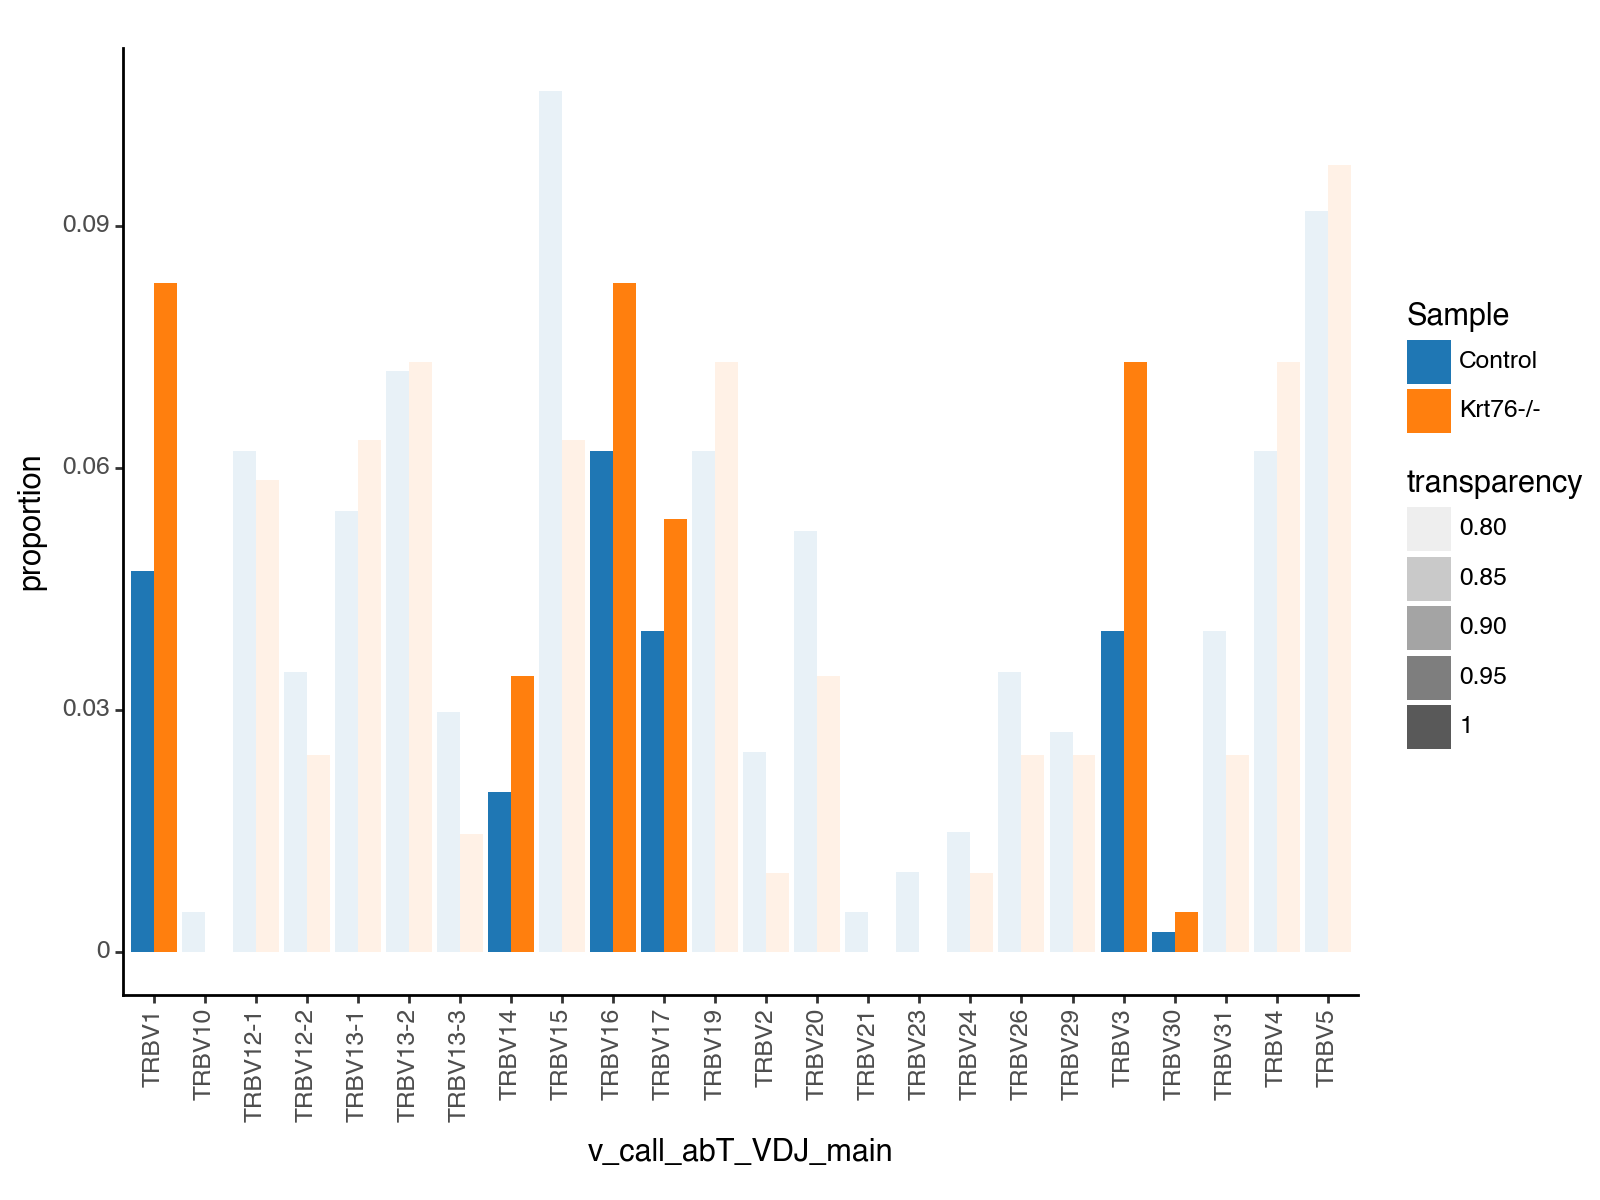

<Figure Size: (800 x 600)>

In [172]:
p

In [173]:
p.save("VgeneBetaChain_DN3aDN3b_121223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3aDN3b_121223.pdf


### DN3b - V gene beta chain

In [14]:
adata_NPF_DN3b = adata_NPF[adata_NPF.obs["leiden"] == "6 DN3b"]

In [15]:
adata_NPF_DN3b

View of AnnData object with n_obs × n_vars = 541 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [17]:
working_df = pd.DataFrame(adata_NPF_DN3b.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV13-2                30
         TRBV5                   27
         TRBV15                  23
         TRBV16                  22
         TRBV12-1                22
         TRBV13-3                20
         TRBV4                   19
         TRBV26                  19
         TRBV1                   17
         TRBV3                   16
         TRBV13-1                16
         TRBV2                   16
         TRBV31                  15
         TRBV19                  15
         TRBV12-2                15
         TRBV20                  12
         TRBV17                  12
         TRBV29                  11
         TRBV14                   6
         TRBV30                   4
         TRBV23                   4
Krt76-/- TRBV13-2                20
         TRBV13-3                15
         TRBV5                   15
         TRBV2                   14
         TRBV15                  13
         TRBV20                  12
         TRBV3                   11
         TRBV4                   11
         TRBV12-1                10
         TRBV13-1                10
         TRBV12-2                 9
         TRBV14                   8
         TRBV17                   8
         TRBV26                   8
         TRBV29                   7
         TRBV16                   7
         TRBV19                   7
         TRBV1                    7
         TRBV31                   4
         TRBV23                   2
         TRBV30                   2

In [18]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      30
1    Control               TRBV5      27
2    Control              TRBV15      23
3    Control              TRBV16      22
4    Control            TRBV12-1      22
5    Control            TRBV13-3      20
6    Control               TRBV4      19
7    Control              TRBV26      19
8    Control               TRBV1      17
9    Control               TRBV3      16
10   Control            TRBV13-1      16
11   Control               TRBV2      16
12   Control              TRBV31      15
13   Control              TRBV19      15
14   Control            TRBV12-2      15
15   Control              TRBV20      12
16   Control              TRBV17      12
17   Control              TRBV29      11
18   Control              TRBV14       6
19   Control              TRBV30       4
20   Control              TRBV23       4
21  Krt76-/-            TRBV13-2      20
22  Krt76-/-            TRBV13-3      15
23  Krt76-/-               TRBV5      15
24  Krt76-/-               TRBV2      14
25  Krt76-/-              TRBV15      13
26  Krt76-/-              TRBV20      12
27  Krt76-/-               TRBV3      11
28  Krt76-/-               TRBV4      11
29  Krt76-/-            TRBV12-1      10
30  Krt76-/-            TRBV13-1      10
31  Krt76-/-            TRBV12-2       9
32  Krt76-/-              TRBV14       8
33  Krt76-/-              TRBV17       8
34  Krt76-/-              TRBV26       8
35  Krt76-/-              TRBV29       7
36  Krt76-/-              TRBV16       7
37  Krt76-/-              TRBV19       7
38  Krt76-/-               TRBV1       7
39  Krt76-/-              TRBV31       4
40  Krt76-/-              TRBV23       2
41  Krt76-/-              TRBV30       2

In [19]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 341, 'Krt76-/-': 200}

In [20]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [21]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      30    0.087977
1    Control               TRBV5      27    0.079179
2    Control              TRBV15      23    0.067449
3    Control              TRBV16      22    0.064516
4    Control            TRBV12-1      22    0.064516
5    Control            TRBV13-3      20    0.058651
6    Control               TRBV4      19    0.055718
7    Control              TRBV26      19    0.055718
8    Control               TRBV1      17    0.049853
9    Control               TRBV3      16    0.046921
10   Control            TRBV13-1      16    0.046921
11   Control               TRBV2      16    0.046921
12   Control              TRBV31      15    0.043988
13   Control              TRBV19      15    0.043988
14   Control            TRBV12-2      15    0.043988
15   Control              TRBV20      12    0.035191
16   Control              TRBV17      12    0.035191
17   Control              TRBV29      11    0.032258
18   Control              TRBV14       6    0.017595
19   Control              TRBV30       4    0.011730
20   Control              TRBV23       4    0.011730
21  Krt76-/-            TRBV13-2      20    0.100000
22  Krt76-/-            TRBV13-3      15    0.075000
23  Krt76-/-               TRBV5      15    0.075000
24  Krt76-/-               TRBV2      14    0.070000
25  Krt76-/-              TRBV15      13    0.065000
26  Krt76-/-              TRBV20      12    0.060000
27  Krt76-/-               TRBV3      11    0.055000
28  Krt76-/-               TRBV4      11    0.055000
29  Krt76-/-            TRBV12-1      10    0.050000
30  Krt76-/-            TRBV13-1      10    0.050000
31  Krt76-/-            TRBV12-2       9    0.045000
32  Krt76-/-              TRBV14       8    0.040000
33  Krt76-/-              TRBV17       8    0.040000
34  Krt76-/-              TRBV26       8    0.040000
35  Krt76-/-              TRBV29       7    0.035000
36  Krt76-/-              TRBV16       7    0.035000
37  Krt76-/-              TRBV19       7    0.035000
38  Krt76-/-               TRBV1       7    0.035000
39  Krt76-/-              TRBV31       4    0.020000
40  Krt76-/-              TRBV23       2    0.010000
41  Krt76-/-              TRBV30       2    0.010000

In [22]:
working_control = working_df[working_df["Sample"] == "Control"]

In [23]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [24]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [25]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [26]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.7020588235294118,
 'TRBV12-1': 0.775,
 'TRBV12-2': 1.023,
 'TRBV13-1': 1.065625,
 'TRBV13-2': 1.1366666666666667,
 'TRBV13-3': 1.2787499999999998,
 'TRBV14': 2.273333333333333,
 'TRBV15': 0.9636956521739132,
 'TRBV16': 0.5425000000000001,
 'TRBV17': 1.1366666666666665,
 'TRBV19': 0.7956666666666667,
 'TRBV2': 1.491875,
 'TRBV20': 1.7049999999999998,
 'TRBV23': 0.8525,
 'TRBV26': 0.7178947368421053,
 'TRBV29': 1.0850000000000002,
 'TRBV3': 1.1721875,
 'TRBV30': 0.8525,
 'TRBV31': 0.45466666666666666,
 'TRBV4': 0.9871052631578947,
 'TRBV5': 0.9472222222222222}

In [27]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      30    0.087977    1.136667
1    Control               TRBV5      27    0.079179    0.947222
2    Control              TRBV15      23    0.067449    0.963696
3    Control              TRBV16      22    0.064516    0.542500
4    Control            TRBV12-1      22    0.064516    0.775000
5    Control            TRBV13-3      20    0.058651    1.278750
6    Control               TRBV4      19    0.055718    0.987105
7    Control              TRBV26      19    0.055718    0.717895
8    Control               TRBV1      17    0.049853    0.702059
9    Control               TRBV3      16    0.046921    1.172187
10   Control            TRBV13-1      16    0.046921    1.065625
11   Control               TRBV2      16    0.046921    1.491875
12   Control              TRBV31      15    0.043988    0.454667
13   Control              TRBV19      15    0.043988    0.795667
14   Control            TRBV12-2      15    0.043988    1.023000
15   Control              TRBV20      12    0.035191    1.705000
16   Control              TRBV17      12    0.035191    1.136667
17   Control              TRBV29      11    0.032258    1.085000
18   Control              TRBV14       6    0.017595    2.273333
19   Control              TRBV30       4    0.011730    0.852500
20   Control              TRBV23       4    0.011730    0.852500
21  Krt76-/-            TRBV13-2      20    0.100000    1.136667
22  Krt76-/-            TRBV13-3      15    0.075000    1.278750
23  Krt76-/-               TRBV5      15    0.075000    0.947222
24  Krt76-/-               TRBV2      14    0.070000    1.491875
25  Krt76-/-              TRBV15      13    0.065000    0.963696
26  Krt76-/-              TRBV20      12    0.060000    1.705000
27  Krt76-/-               TRBV3      11    0.055000    1.172187
28  Krt76-/-               TRBV4      11    0.055000    0.987105
29  Krt76-/-            TRBV12-1      10    0.050000    0.775000
30  Krt76-/-            TRBV13-1      10    0.050000    1.065625
31  Krt76-/-            TRBV12-2       9    0.045000    1.023000
32  Krt76-/-              TRBV14       8    0.040000    2.273333
33  Krt76-/-              TRBV17       8    0.040000    1.136667
34  Krt76-/-              TRBV26       8    0.040000    0.717895
35  Krt76-/-              TRBV29       7    0.035000    1.085000
36  Krt76-/-              TRBV16       7    0.035000    0.542500
37  Krt76-/-              TRBV19       7    0.035000    0.795667
38  Krt76-/-               TRBV1       7    0.035000    0.702059
39  Krt76-/-              TRBV31       4    0.020000    0.454667
40  Krt76-/-              TRBV23       2    0.010000    0.852500
41  Krt76-/-              TRBV30       2    0.010000    0.852500

In [28]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [29]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [30]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [31]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

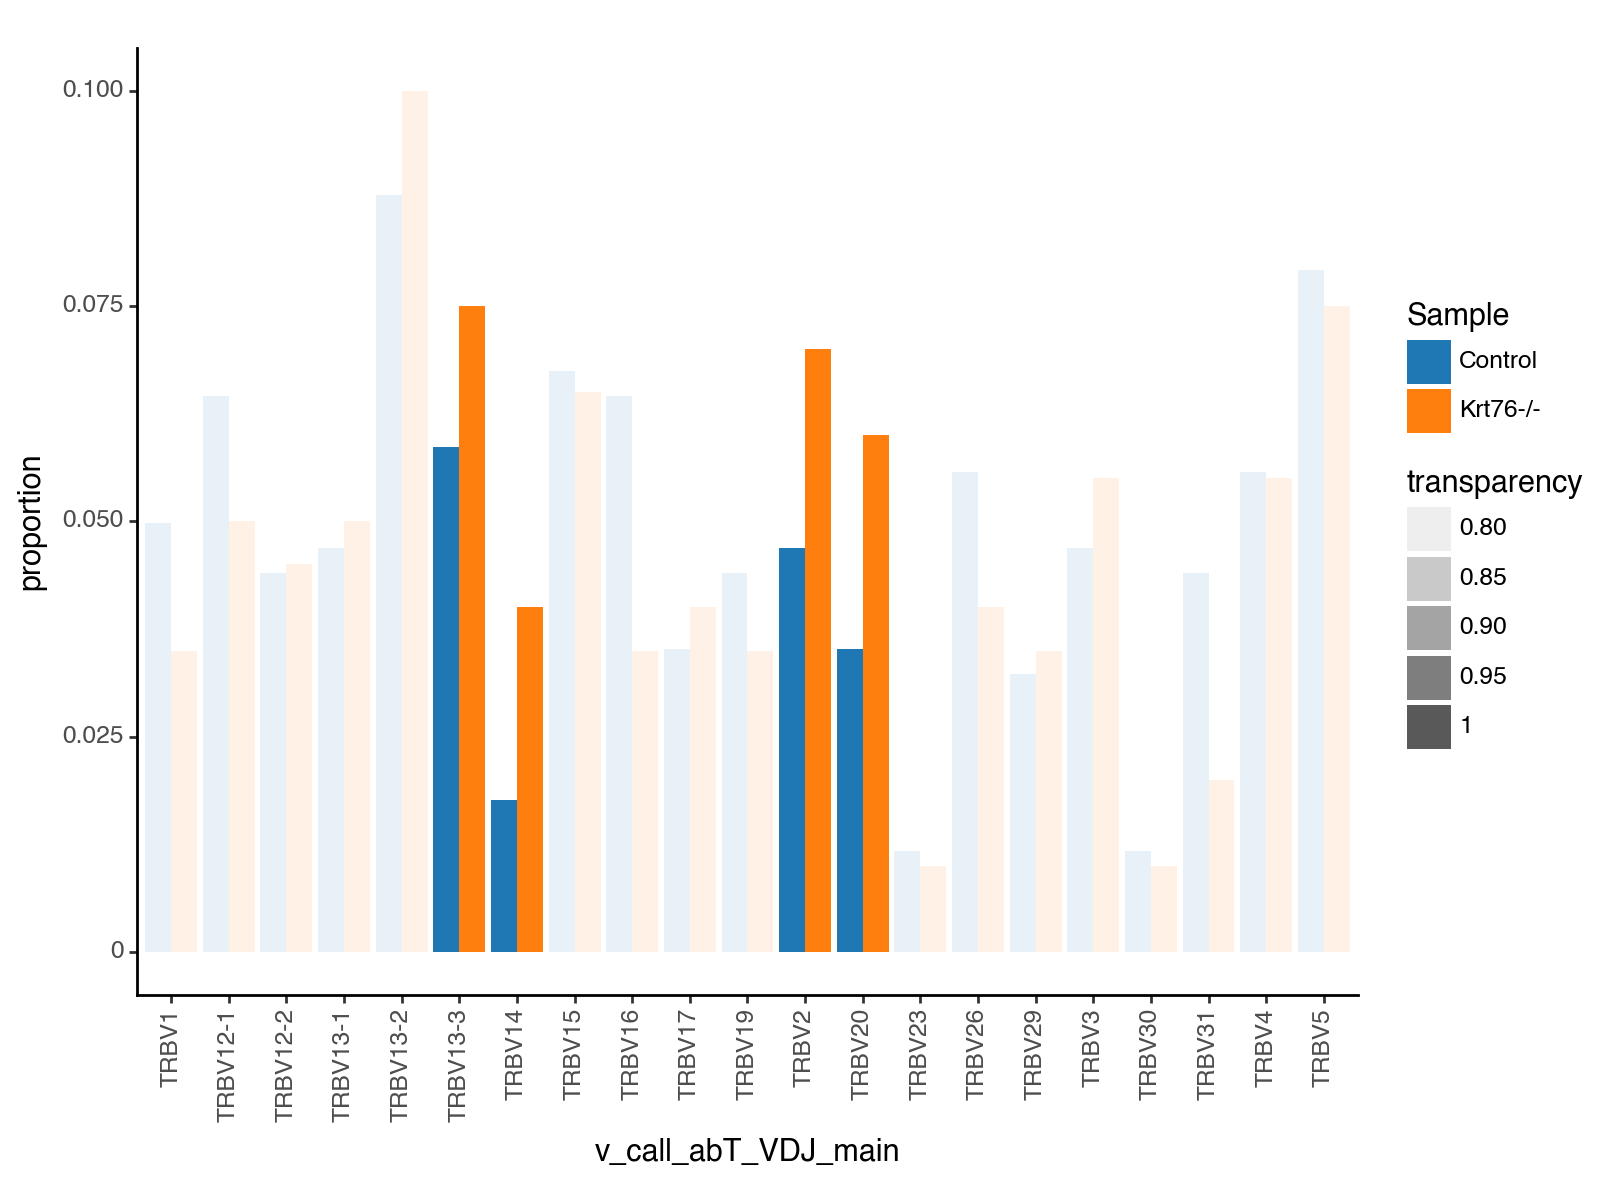

<Figure Size: (800 x 600)>

In [32]:
p

In [33]:
p.save("VgeneBetaChain_DN3b_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN3b_181223.pdf


### DN4 - V gene beta chain

In [34]:
adata_NPF_DN4 = adata_NPF[adata_NPF.obs["leiden"] == "2 DN4"]

In [35]:
adata_NPF_DN4

View of AnnData object with n_obs × n_vars = 1968 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [36]:
working_df = pd.DataFrame(adata_NPF_DN4.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV3                   99
         TRBV13-2                96
         TRBV5                   93
         TRBV12-1                90
         TRBV15                  90
         TRBV16                  80
         TRBV19                  80
         TRBV20                  73
         TRBV1                   73
         TRBV13-1                70
         TRBV2                   58
         TRBV13-3                55
         TRBV4                   55
         TRBV12-2                54
         TRBV31                  48
         TRBV29                  46
         TRBV26                  42
         TRBV17                  38
         TRBV14                  30
         TRBV23                  12
         TRBV24                   7
         TRBV30                   5
Krt76-/- TRBV12-1                54
         TRBV19                  51
         TRBV20                  48
         TRBV13-2                48
         TRBV13-1                43
         TRBV5                   41
         TRBV15                  39
         TRBV3                   37
         TRBV16                  37
         TRBV31                  34
         TRBV4                   33
         TRBV1                   31
         TRBV13-3                31
         TRBV12-2                31
         TRBV26                  26
         TRBV17                  26
         TRBV29                  26
         TRBV2                   21
         TRBV14                  14
         TRBV24                   1
         TRBV23                   1
         TRBV30                   1

In [37]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV3      99
1    Control            TRBV13-2      96
2    Control               TRBV5      93
3    Control            TRBV12-1      90
4    Control              TRBV15      90
5    Control              TRBV16      80
6    Control              TRBV19      80
7    Control              TRBV20      73
8    Control               TRBV1      73
9    Control            TRBV13-1      70
10   Control               TRBV2      58
11   Control            TRBV13-3      55
12   Control               TRBV4      55
13   Control            TRBV12-2      54
14   Control              TRBV31      48
15   Control              TRBV29      46
16   Control              TRBV26      42
17   Control              TRBV17      38
18   Control              TRBV14      30
19   Control              TRBV23      12
20   Control              TRBV24       7
21   Control              TRBV30       5
22  Krt76-/-            TRBV12-1      54
23  Krt76-/-              TRBV19      51
24  Krt76-/-              TRBV20      48
25  Krt76-/-            TRBV13-2      48
26  Krt76-/-            TRBV13-1      43
27  Krt76-/-               TRBV5      41
28  Krt76-/-              TRBV15      39
29  Krt76-/-               TRBV3      37
30  Krt76-/-              TRBV16      37
31  Krt76-/-              TRBV31      34
32  Krt76-/-               TRBV4      33
33  Krt76-/-               TRBV1      31
34  Krt76-/-            TRBV13-3      31
35  Krt76-/-            TRBV12-2      31
36  Krt76-/-              TRBV26      26
37  Krt76-/-              TRBV17      26
38  Krt76-/-              TRBV29      26
39  Krt76-/-               TRBV2      21
40  Krt76-/-              TRBV14      14
41  Krt76-/-              TRBV24       1
42  Krt76-/-              TRBV23       1
43  Krt76-/-              TRBV30       1

In [38]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1294, 'Krt76-/-': 674}

In [39]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [40]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV3      99    0.076507
1    Control            TRBV13-2      96    0.074189
2    Control               TRBV5      93    0.071870
3    Control            TRBV12-1      90    0.069552
4    Control              TRBV15      90    0.069552
5    Control              TRBV16      80    0.061824
6    Control              TRBV19      80    0.061824
7    Control              TRBV20      73    0.056414
8    Control               TRBV1      73    0.056414
9    Control            TRBV13-1      70    0.054096
10   Control               TRBV2      58    0.044822
11   Control            TRBV13-3      55    0.042504
12   Control               TRBV4      55    0.042504
13   Control            TRBV12-2      54    0.041731
14   Control              TRBV31      48    0.037094
15   Control              TRBV29      46    0.035549
16   Control              TRBV26      42    0.032457
17   Control              TRBV17      38    0.029366
18   Control              TRBV14      30    0.023184
19   Control              TRBV23      12    0.009274
20   Control              TRBV24       7    0.005410
21   Control              TRBV30       5    0.003864
22  Krt76-/-            TRBV12-1      54    0.080119
23  Krt76-/-              TRBV19      51    0.075668
24  Krt76-/-              TRBV20      48    0.071217
25  Krt76-/-            TRBV13-2      48    0.071217
26  Krt76-/-            TRBV13-1      43    0.063798
27  Krt76-/-               TRBV5      41    0.060831
28  Krt76-/-              TRBV15      39    0.057864
29  Krt76-/-               TRBV3      37    0.054896
30  Krt76-/-              TRBV16      37    0.054896
31  Krt76-/-              TRBV31      34    0.050445
32  Krt76-/-               TRBV4      33    0.048961
33  Krt76-/-               TRBV1      31    0.045994
34  Krt76-/-            TRBV13-3      31    0.045994
35  Krt76-/-            TRBV12-2      31    0.045994
36  Krt76-/-              TRBV26      26    0.038576
37  Krt76-/-              TRBV17      26    0.038576
38  Krt76-/-              TRBV29      26    0.038576
39  Krt76-/-               TRBV2      21    0.031157
40  Krt76-/-              TRBV14      14    0.020772
41  Krt76-/-              TRBV24       1    0.001484
42  Krt76-/-              TRBV23       1    0.001484
43  Krt76-/-              TRBV30       1    0.001484

In [41]:
working_control = working_df[working_df["Sample"] == "Control"]

In [42]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [43]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [44]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [45]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.8152920612983212,
 'TRBV12-1': 1.1519287833827894,
 'TRBV12-2': 1.1021540828662488,
 'TRBV13-1': 1.1793556591776175,
 'TRBV13-2': 0.9599406528189912,
 'TRBV13-3': 1.0821149177232263,
 'TRBV14': 0.8959446092977249,
 'TRBV15': 0.831948565776459,
 'TRBV16': 0.8879451038575668,
 'TRBV17': 1.3136029985944089,
 'TRBV19': 1.2239243323442137,
 'TRBV2': 0.6951294382482349,
 'TRBV20': 1.2623877078167556,
 'TRBV23': 0.1599901088031652,
 'TRBV24': 0.2742687579482832,
 'TRBV26': 1.188497951109227,
 'TRBV29': 1.0851503031866856,
 'TRBV3': 0.7175313970566196,
 'TRBV30': 0.3839762611275965,
 'TRBV31': 1.3599159248269042,
 'TRBV4': 1.1519287833827891,
 'TRBV5': 0.846399285281261}

In [46]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV3      99    0.076507    0.717531
1    Control            TRBV13-2      96    0.074189    0.959941
2    Control               TRBV5      93    0.071870    0.846399
3    Control            TRBV12-1      90    0.069552    1.151929
4    Control              TRBV15      90    0.069552    0.831949
5    Control              TRBV16      80    0.061824    0.887945
6    Control              TRBV19      80    0.061824    1.223924
7    Control              TRBV20      73    0.056414    1.262388
8    Control               TRBV1      73    0.056414    0.815292
9    Control            TRBV13-1      70    0.054096    1.179356
10   Control               TRBV2      58    0.044822    0.695129
11   Control            TRBV13-3      55    0.042504    1.082115
12   Control               TRBV4      55    0.042504    1.151929
13   Control            TRBV12-2      54    0.041731    1.102154
14   Control              TRBV31      48    0.037094    1.359916
15   Control              TRBV29      46    0.035549    1.085150
16   Control              TRBV26      42    0.032457    1.188498
17   Control              TRBV17      38    0.029366    1.313603
18   Control              TRBV14      30    0.023184    0.895945
19   Control              TRBV23      12    0.009274    0.159990
20   Control              TRBV24       7    0.005410    0.274269
21   Control              TRBV30       5    0.003864    0.383976
22  Krt76-/-            TRBV12-1      54    0.080119    1.151929
23  Krt76-/-              TRBV19      51    0.075668    1.223924
24  Krt76-/-              TRBV20      48    0.071217    1.262388
25  Krt76-/-            TRBV13-2      48    0.071217    0.959941
26  Krt76-/-            TRBV13-1      43    0.063798    1.179356
27  Krt76-/-               TRBV5      41    0.060831    0.846399
28  Krt76-/-              TRBV15      39    0.057864    0.831949
29  Krt76-/-               TRBV3      37    0.054896    0.717531
30  Krt76-/-              TRBV16      37    0.054896    0.887945
31  Krt76-/-              TRBV31      34    0.050445    1.359916
32  Krt76-/-               TRBV4      33    0.048961    1.151929
33  Krt76-/-               TRBV1      31    0.045994    0.815292
34  Krt76-/-            TRBV13-3      31    0.045994    1.082115
35  Krt76-/-            TRBV12-2      31    0.045994    1.102154
36  Krt76-/-              TRBV26      26    0.038576    1.188498
37  Krt76-/-              TRBV17      26    0.038576    1.313603
38  Krt76-/-              TRBV29      26    0.038576    1.085150
39  Krt76-/-               TRBV2      21    0.031157    0.695129
40  Krt76-/-              TRBV14      14    0.020772    0.895945
41  Krt76-/-              TRBV24       1    0.001484    0.274269
42  Krt76-/-              TRBV23       1    0.001484    0.159990
43  Krt76-/-              TRBV30       1    0.001484    0.383976

In [47]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [48]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

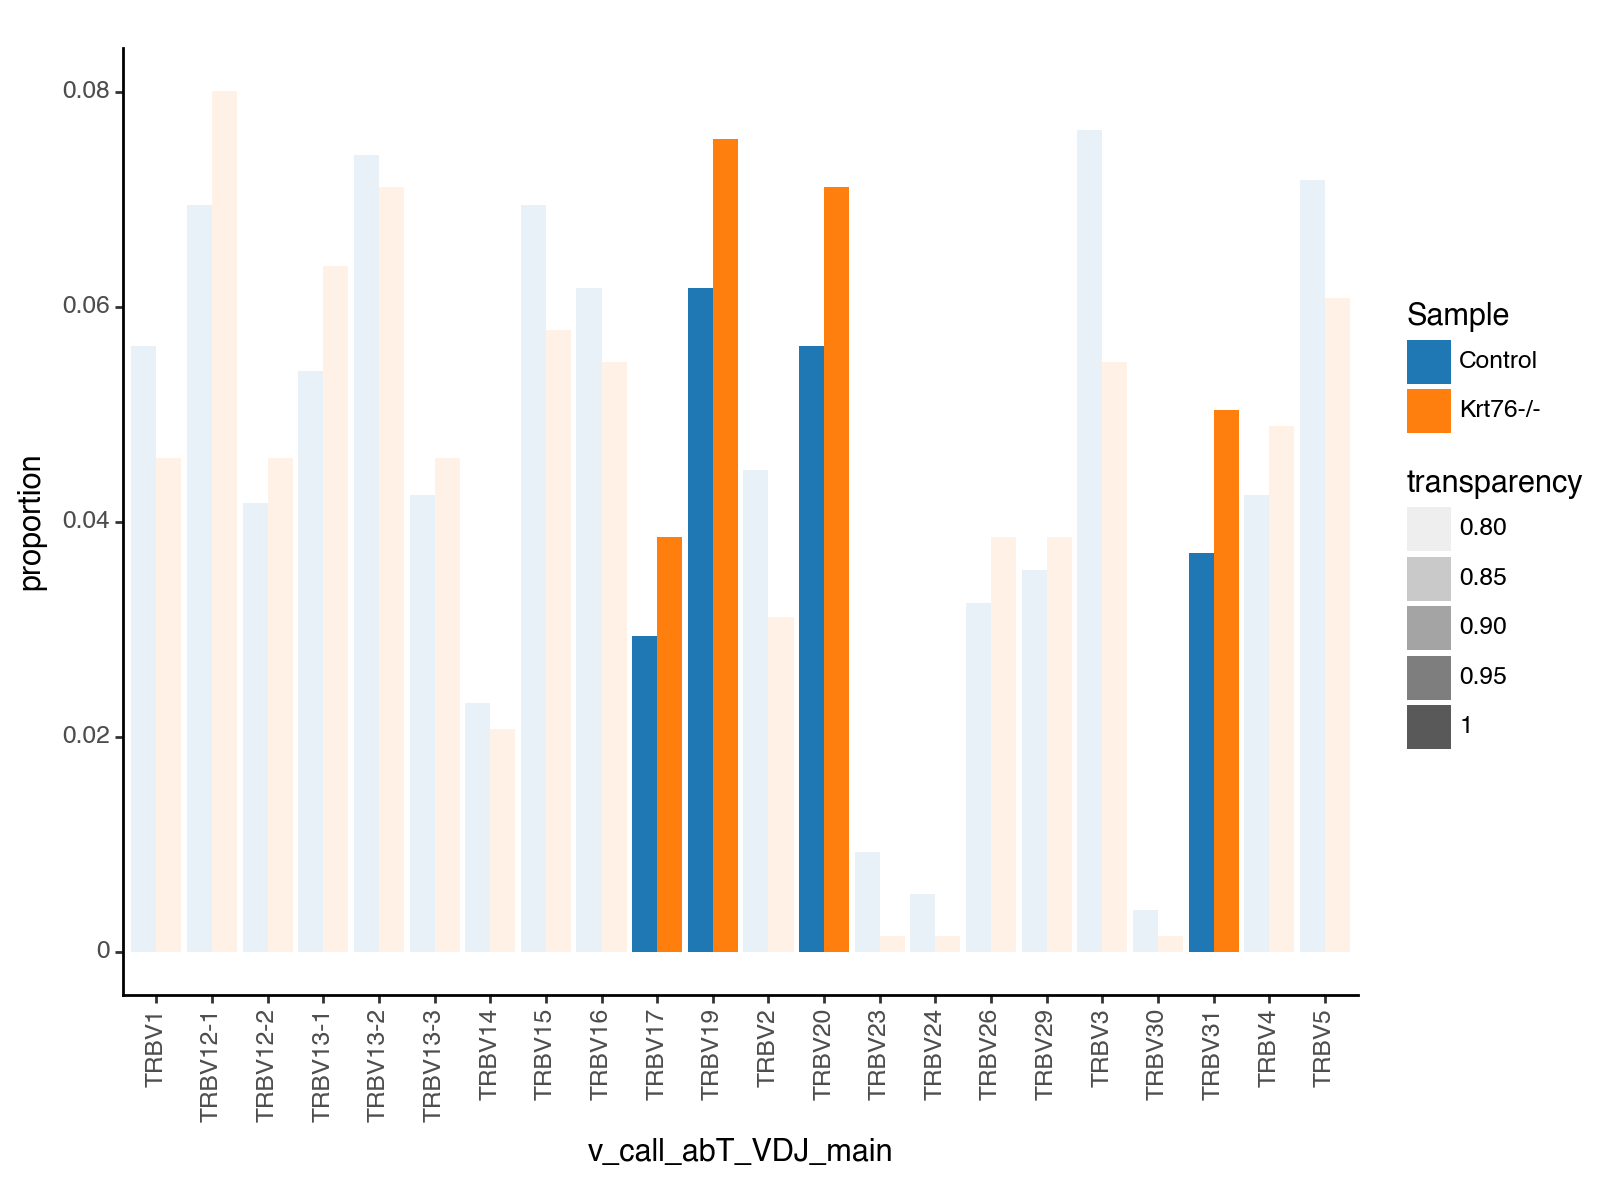

<Figure Size: (800 x 600)>

In [49]:
p

In [50]:
p.save("VgeneBetaChain_DN4_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DN4_181223.pdf


### DP 1 - V gene beta chain

In [51]:
adata_NPF_DP1 = adata_NPF[adata_NPF.obs["leiden"] == "3 DP 1"]

In [52]:
adata_NPF_DP1

View of AnnData object with n_obs × n_vars = 2031 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [53]:
working_df = pd.DataFrame(adata_NPF_DP1.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV13-2               109
         TRBV5                  103
         TRBV19                  90
         TRBV20                  86
         TRBV3                   80
         TRBV12-1                79
         TRBV15                  73
         TRBV1                   69
         TRBV16                  66
         TRBV26                  59
         TRBV2                   57
         TRBV13-3                54
         TRBV12-2                54
         TRBV4                   53
         TRBV13-1                51
         TRBV31                  50
         TRBV17                  42
         TRBV14                  35
         TRBV29                  30
         TRBV23                   6
         TRBV30                   4
         TRBV24                   1
Krt76-/- TRBV19                  70
         TRBV12-1                56
         TRBV13-2                54
         TRBV5                   53
         TRBV20                  52
         TRBV1                   50
         TRBV3                   47
         TRBV16                  46
         TRBV13-1                44
         TRBV15                  44
         TRBV2                   38
         TRBV13-3                34
         TRBV4                   30
         TRBV31                  29
         TRBV12-2                29
         TRBV26                  25
         TRBV17                  25
         TRBV14                  25
         TRBV29                  23
         TRBV23                   4
         TRBV30                   2
         TRBV24                   0

In [54]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2     109
1    Control               TRBV5     103
2    Control              TRBV19      90
3    Control              TRBV20      86
4    Control               TRBV3      80
5    Control            TRBV12-1      79
6    Control              TRBV15      73
7    Control               TRBV1      69
8    Control              TRBV16      66
9    Control              TRBV26      59
10   Control               TRBV2      57
11   Control            TRBV13-3      54
12   Control            TRBV12-2      54
13   Control               TRBV4      53
14   Control            TRBV13-1      51
15   Control              TRBV31      50
16   Control              TRBV17      42
17   Control              TRBV14      35
18   Control              TRBV29      30
19   Control              TRBV23       6
20   Control              TRBV30       4
21   Control              TRBV24       1
22  Krt76-/-              TRBV19      70
23  Krt76-/-            TRBV12-1      56
24  Krt76-/-            TRBV13-2      54
25  Krt76-/-               TRBV5      53
26  Krt76-/-              TRBV20      52
27  Krt76-/-               TRBV1      50
28  Krt76-/-               TRBV3      47
29  Krt76-/-              TRBV16      46
30  Krt76-/-            TRBV13-1      44
31  Krt76-/-              TRBV15      44
32  Krt76-/-               TRBV2      38
33  Krt76-/-            TRBV13-3      34
34  Krt76-/-               TRBV4      30
35  Krt76-/-              TRBV31      29
36  Krt76-/-            TRBV12-2      29
37  Krt76-/-              TRBV26      25
38  Krt76-/-              TRBV17      25
39  Krt76-/-              TRBV14      25
40  Krt76-/-              TRBV29      23
41  Krt76-/-              TRBV23       4
42  Krt76-/-              TRBV30       2
43  Krt76-/-              TRBV24       0

In [55]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1251, 'Krt76-/-': 780}

In [56]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [57]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2     109    0.087130
1    Control               TRBV5     103    0.082334
2    Control              TRBV19      90    0.071942
3    Control              TRBV20      86    0.068745
4    Control               TRBV3      80    0.063949
5    Control            TRBV12-1      79    0.063149
6    Control              TRBV15      73    0.058353
7    Control               TRBV1      69    0.055156
8    Control              TRBV16      66    0.052758
9    Control              TRBV26      59    0.047162
10   Control               TRBV2      57    0.045564
11   Control            TRBV13-3      54    0.043165
12   Control            TRBV12-2      54    0.043165
13   Control               TRBV4      53    0.042366
14   Control            TRBV13-1      51    0.040767
15   Control              TRBV31      50    0.039968
16   Control              TRBV17      42    0.033573
17   Control              TRBV14      35    0.027978
18   Control              TRBV29      30    0.023981
19   Control              TRBV23       6    0.004796
20   Control              TRBV30       4    0.003197
21   Control              TRBV24       1    0.000799
22  Krt76-/-              TRBV19      70    0.089744
23  Krt76-/-            TRBV12-1      56    0.071795
24  Krt76-/-            TRBV13-2      54    0.069231
25  Krt76-/-               TRBV5      53    0.067949
26  Krt76-/-              TRBV20      52    0.066667
27  Krt76-/-               TRBV1      50    0.064103
28  Krt76-/-               TRBV3      47    0.060256
29  Krt76-/-              TRBV16      46    0.058974
30  Krt76-/-            TRBV13-1      44    0.056410
31  Krt76-/-              TRBV15      44    0.056410
32  Krt76-/-               TRBV2      38    0.048718
33  Krt76-/-            TRBV13-3      34    0.043590
34  Krt76-/-               TRBV4      30    0.038462
35  Krt76-/-              TRBV31      29    0.037179
36  Krt76-/-            TRBV12-2      29    0.037179
37  Krt76-/-              TRBV26      25    0.032051
38  Krt76-/-              TRBV17      25    0.032051
39  Krt76-/-              TRBV14      25    0.032051
40  Krt76-/-              TRBV29      23    0.029487
41  Krt76-/-              TRBV23       4    0.005128
42  Krt76-/-              TRBV30       2    0.002564
43  Krt76-/-              TRBV24       0    0.000000

In [58]:
working_control = working_df[working_df["Sample"] == "Control"]

In [59]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [60]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [61]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [62]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.1622073578595318,
 'TRBV12-1': 1.1369036027263875,
 'TRBV12-2': 0.8613247863247863,
 'TRBV13-1': 1.383710407239819,
 'TRBV13-2': 0.7945659844742413,
 'TRBV13-3': 1.0098290598290598,
 'TRBV14': 1.1456043956043955,
 'TRBV15': 0.9667017913593255,
 'TRBV16': 1.1178321678321679,
 'TRBV17': 0.9546703296703296,
 'TRBV19': 1.2474358974358974,
 'TRBV2': 1.0692307692307692,
 'TRBV20': 0.9697674418604652,
 'TRBV23': 1.0692307692307692,
 'TRBV24': 0.0,
 'TRBV26': 0.6795958279009126,
 'TRBV29': 1.2296153846153846,
 'TRBV3': 0.9422596153846154,
 'TRBV30': 0.801923076923077,
 'TRBV31': 0.9302307692307693,
 'TRBV4': 0.9078374455732946,
 'TRBV5': 0.825280059746079}

In [63]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2     109    0.087130    0.794566
1    Control               TRBV5     103    0.082334    0.825280
2    Control              TRBV19      90    0.071942    1.247436
3    Control              TRBV20      86    0.068745    0.969767
4    Control               TRBV3      80    0.063949    0.942260
5    Control            TRBV12-1      79    0.063149    1.136904
6    Control              TRBV15      73    0.058353    0.966702
7    Control               TRBV1      69    0.055156    1.162207
8    Control              TRBV16      66    0.052758    1.117832
9    Control              TRBV26      59    0.047162    0.679596
10   Control               TRBV2      57    0.045564    1.069231
11   Control            TRBV13-3      54    0.043165    1.009829
12   Control            TRBV12-2      54    0.043165    0.861325
13   Control               TRBV4      53    0.042366    0.907837
14   Control            TRBV13-1      51    0.040767    1.383710
15   Control              TRBV31      50    0.039968    0.930231
16   Control              TRBV17      42    0.033573    0.954670
17   Control              TRBV14      35    0.027978    1.145604
18   Control              TRBV29      30    0.023981    1.229615
19   Control              TRBV23       6    0.004796    1.069231
20   Control              TRBV30       4    0.003197    0.801923
21   Control              TRBV24       1    0.000799    0.000000
22  Krt76-/-              TRBV19      70    0.089744    1.247436
23  Krt76-/-            TRBV12-1      56    0.071795    1.136904
24  Krt76-/-            TRBV13-2      54    0.069231    0.794566
25  Krt76-/-               TRBV5      53    0.067949    0.825280
26  Krt76-/-              TRBV20      52    0.066667    0.969767
27  Krt76-/-               TRBV1      50    0.064103    1.162207
28  Krt76-/-               TRBV3      47    0.060256    0.942260
29  Krt76-/-              TRBV16      46    0.058974    1.117832
30  Krt76-/-            TRBV13-1      44    0.056410    1.383710
31  Krt76-/-              TRBV15      44    0.056410    0.966702
32  Krt76-/-               TRBV2      38    0.048718    1.069231
33  Krt76-/-            TRBV13-3      34    0.043590    1.009829
34  Krt76-/-               TRBV4      30    0.038462    0.907837
35  Krt76-/-              TRBV31      29    0.037179    0.930231
36  Krt76-/-            TRBV12-2      29    0.037179    0.861325
37  Krt76-/-              TRBV26      25    0.032051    0.679596
38  Krt76-/-              TRBV17      25    0.032051    0.954670
39  Krt76-/-              TRBV14      25    0.032051    1.145604
40  Krt76-/-              TRBV29      23    0.029487    1.229615
41  Krt76-/-              TRBV23       4    0.005128    1.069231
42  Krt76-/-              TRBV30       2    0.002564    0.801923
43  Krt76-/-              TRBV24       0    0.000000    0.000000

In [64]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [65]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

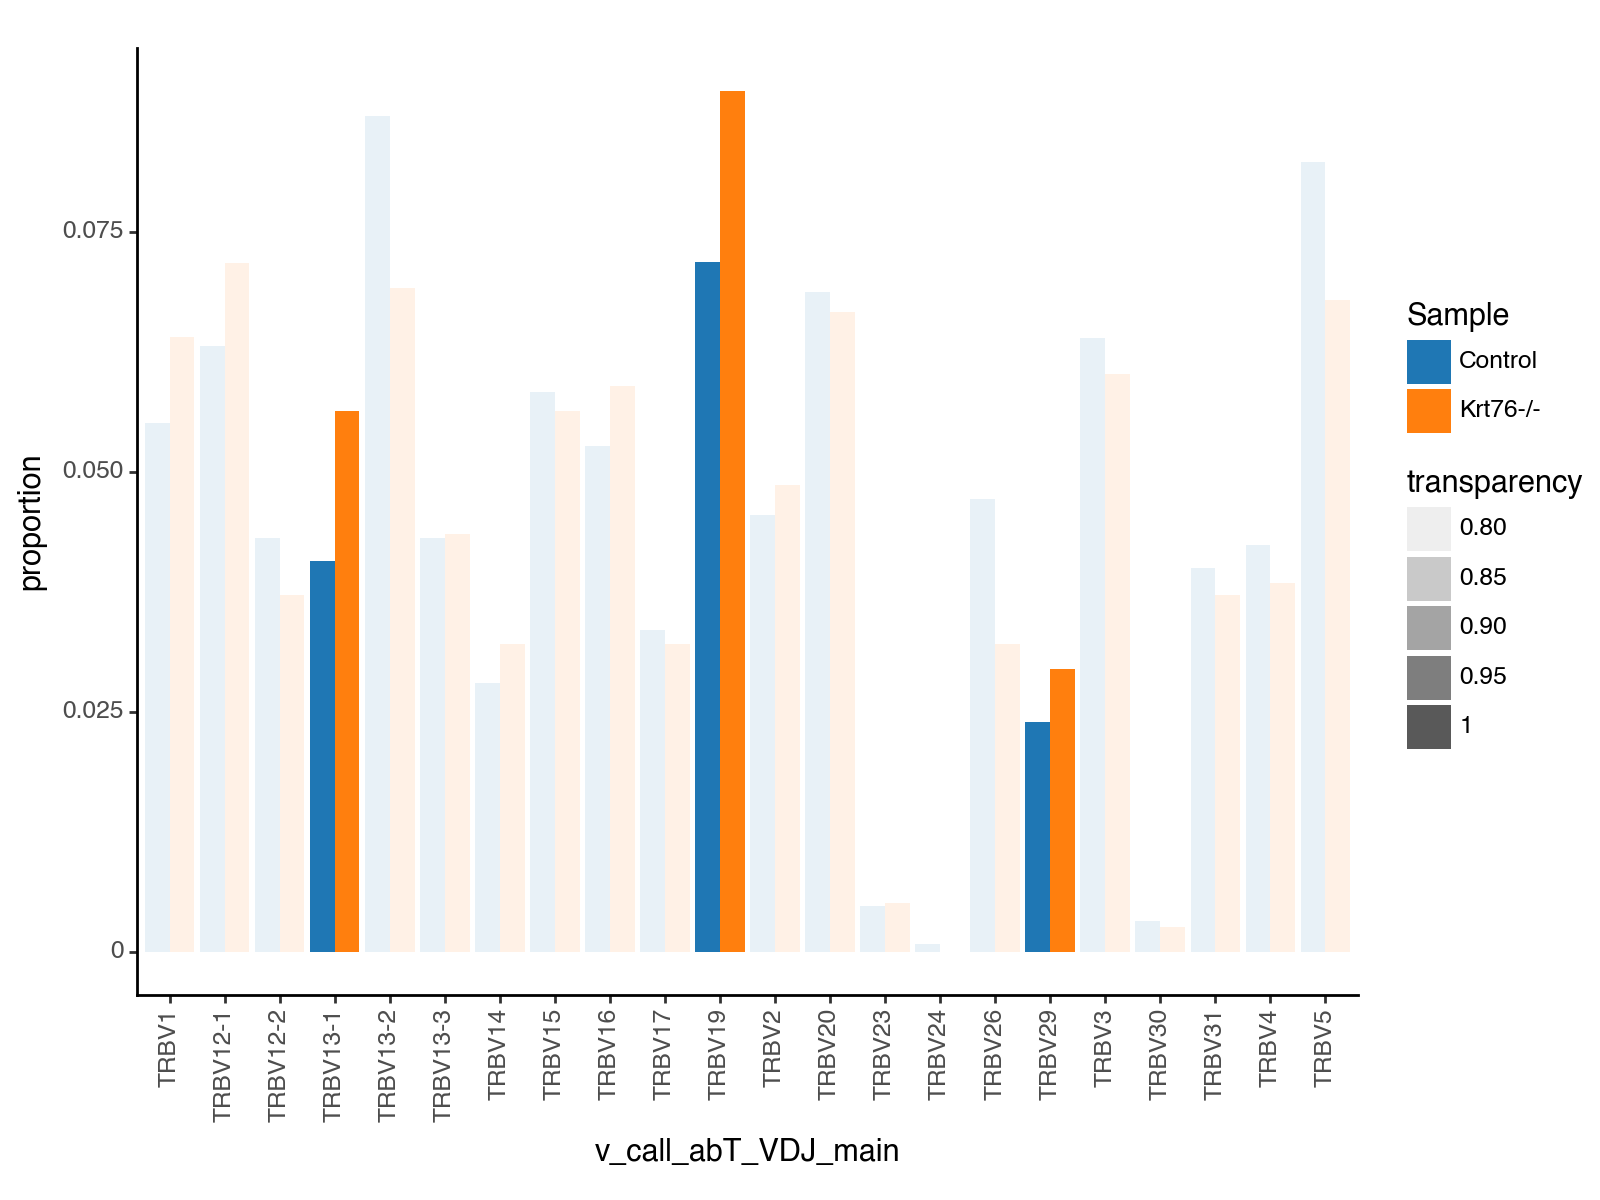

<Figure Size: (800 x 600)>

In [66]:
p

In [67]:
p.save("VgeneBetaChain_DP1_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DP1_181223.pdf


### DP 2 - V gene beta chain

In [68]:
adata_NPF_DP2 = adata_NPF[adata_NPF.obs["leiden"] == "9 DP 2"]

In [69]:
adata_NPF_DP2

View of AnnData object with n_obs × n_vars = 55 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [70]:
working_df = pd.DataFrame(adata_NPF_DP2.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV5                    6
         TRBV1                    4
         TRBV12-2                 3
         TRBV15                   3
         TRBV16                   3
         TRBV12-1                 3
         TRBV3                    3
         TRBV4                    3
         TRBV17                   2
         TRBV13-2                 2
         TRBV26                   2
         TRBV31                   2
         TRBV20                   1
         TRBV2                    1
         TRBV19                   1
         TRBV13-3                 1
         TRBV13-1                 0
Krt76-/- TRBV13-2                 4
         TRBV26                   2
         TRBV3                    2
         TRBV15                   1
         TRBV4                    1
         TRBV13-1                 1
         TRBV31                   1
         TRBV17                   1
         TRBV5                    1
         TRBV12-1                 1
         TRBV12-2                 0
         TRBV13-3                 0
         TRBV16                   0
         TRBV19                   0
         TRBV2                    0
         TRBV20                   0
         TRBV1                    0

In [71]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       6
1    Control               TRBV1       4
2    Control            TRBV12-2       3
3    Control              TRBV15       3
4    Control              TRBV16       3
5    Control            TRBV12-1       3
6    Control               TRBV3       3
7    Control               TRBV4       3
8    Control              TRBV17       2
9    Control            TRBV13-2       2
10   Control              TRBV26       2
11   Control              TRBV31       2
12   Control              TRBV20       1
13   Control               TRBV2       1
14   Control              TRBV19       1
15   Control            TRBV13-3       1
16   Control            TRBV13-1       0
17  Krt76-/-            TRBV13-2       4
18  Krt76-/-              TRBV26       2
19  Krt76-/-               TRBV3       2
20  Krt76-/-              TRBV15       1
21  Krt76-/-               TRBV4       1
22  Krt76-/-            TRBV13-1       1
23  Krt76-/-              TRBV31       1
24  Krt76-/-              TRBV17       1
25  Krt76-/-               TRBV5       1
26  Krt76-/-            TRBV12-1       1
27  Krt76-/-            TRBV12-2       0
28  Krt76-/-            TRBV13-3       0
29  Krt76-/-              TRBV16       0
30  Krt76-/-              TRBV19       0
31  Krt76-/-               TRBV2       0
32  Krt76-/-              TRBV20       0
33  Krt76-/-               TRBV1       0

In [72]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 40, 'Krt76-/-': 15}

In [73]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [74]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       6    0.150000
1    Control               TRBV1       4    0.100000
2    Control            TRBV12-2       3    0.075000
3    Control              TRBV15       3    0.075000
4    Control              TRBV16       3    0.075000
5    Control            TRBV12-1       3    0.075000
6    Control               TRBV3       3    0.075000
7    Control               TRBV4       3    0.075000
8    Control              TRBV17       2    0.050000
9    Control            TRBV13-2       2    0.050000
10   Control              TRBV26       2    0.050000
11   Control              TRBV31       2    0.050000
12   Control              TRBV20       1    0.025000
13   Control               TRBV2       1    0.025000
14   Control              TRBV19       1    0.025000
15   Control            TRBV13-3       1    0.025000
16   Control            TRBV13-1       0    0.000000
17  Krt76-/-            TRBV13-2       4    0.266667
18  Krt76-/-              TRBV26       2    0.133333
19  Krt76-/-               TRBV3       2    0.133333
20  Krt76-/-              TRBV15       1    0.066667
21  Krt76-/-               TRBV4       1    0.066667
22  Krt76-/-            TRBV13-1       1    0.066667
23  Krt76-/-              TRBV31       1    0.066667
24  Krt76-/-              TRBV17       1    0.066667
25  Krt76-/-               TRBV5       1    0.066667
26  Krt76-/-            TRBV12-1       1    0.066667
27  Krt76-/-            TRBV12-2       0    0.000000
28  Krt76-/-            TRBV13-3       0    0.000000
29  Krt76-/-              TRBV16       0    0.000000
30  Krt76-/-              TRBV19       0    0.000000
31  Krt76-/-               TRBV2       0    0.000000
32  Krt76-/-              TRBV20       0    0.000000
33  Krt76-/-               TRBV1       0    0.000000

In [75]:
working_control = working_df[working_df["Sample"] == "Control"]

In [76]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [77]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [78]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [79]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.0,
 'TRBV12-1': 0.888888888888889,
 'TRBV12-2': 0.0,
 'TRBV13-1': inf,
 'TRBV13-2': 5.333333333333333,
 'TRBV13-3': 0.0,
 'TRBV15': 0.888888888888889,
 'TRBV16': 0.0,
 'TRBV17': 1.3333333333333333,
 'TRBV19': 0.0,
 'TRBV2': 0.0,
 'TRBV20': 0.0,
 'TRBV26': 2.6666666666666665,
 'TRBV3': 1.777777777777778,
 'TRBV31': 1.3333333333333333,
 'TRBV4': 0.888888888888889,
 'TRBV5': 0.4444444444444445}

In [80]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       6    0.150000    0.444444
1    Control               TRBV1       4    0.100000    0.000000
2    Control            TRBV12-2       3    0.075000    0.000000
3    Control              TRBV15       3    0.075000    0.888889
4    Control              TRBV16       3    0.075000    0.000000
5    Control            TRBV12-1       3    0.075000    0.888889
6    Control               TRBV3       3    0.075000    1.777778
7    Control               TRBV4       3    0.075000    0.888889
8    Control              TRBV17       2    0.050000    1.333333
9    Control            TRBV13-2       2    0.050000    5.333333
10   Control              TRBV26       2    0.050000    2.666667
11   Control              TRBV31       2    0.050000    1.333333
12   Control              TRBV20       1    0.025000    0.000000
13   Control               TRBV2       1    0.025000    0.000000
14   Control              TRBV19       1    0.025000    0.000000
15   Control            TRBV13-3       1    0.025000    0.000000
16   Control            TRBV13-1       0    0.000000         inf
17  Krt76-/-            TRBV13-2       4    0.266667    5.333333
18  Krt76-/-              TRBV26       2    0.133333    2.666667
19  Krt76-/-               TRBV3       2    0.133333    1.777778
20  Krt76-/-              TRBV15       1    0.066667    0.888889
21  Krt76-/-               TRBV4       1    0.066667    0.888889
22  Krt76-/-            TRBV13-1       1    0.066667         inf
23  Krt76-/-              TRBV31       1    0.066667    1.333333
24  Krt76-/-              TRBV17       1    0.066667    1.333333
25  Krt76-/-               TRBV5       1    0.066667    0.444444
26  Krt76-/-            TRBV12-1       1    0.066667    0.888889
27  Krt76-/-            TRBV12-2       0    0.000000    0.000000
28  Krt76-/-            TRBV13-3       0    0.000000    0.000000
29  Krt76-/-              TRBV16       0    0.000000    0.000000
30  Krt76-/-              TRBV19       0    0.000000    0.000000
31  Krt76-/-               TRBV2       0    0.000000    0.000000
32  Krt76-/-              TRBV20       0    0.000000    0.000000
33  Krt76-/-               TRBV1       0    0.000000    0.000000

In [81]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [82]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

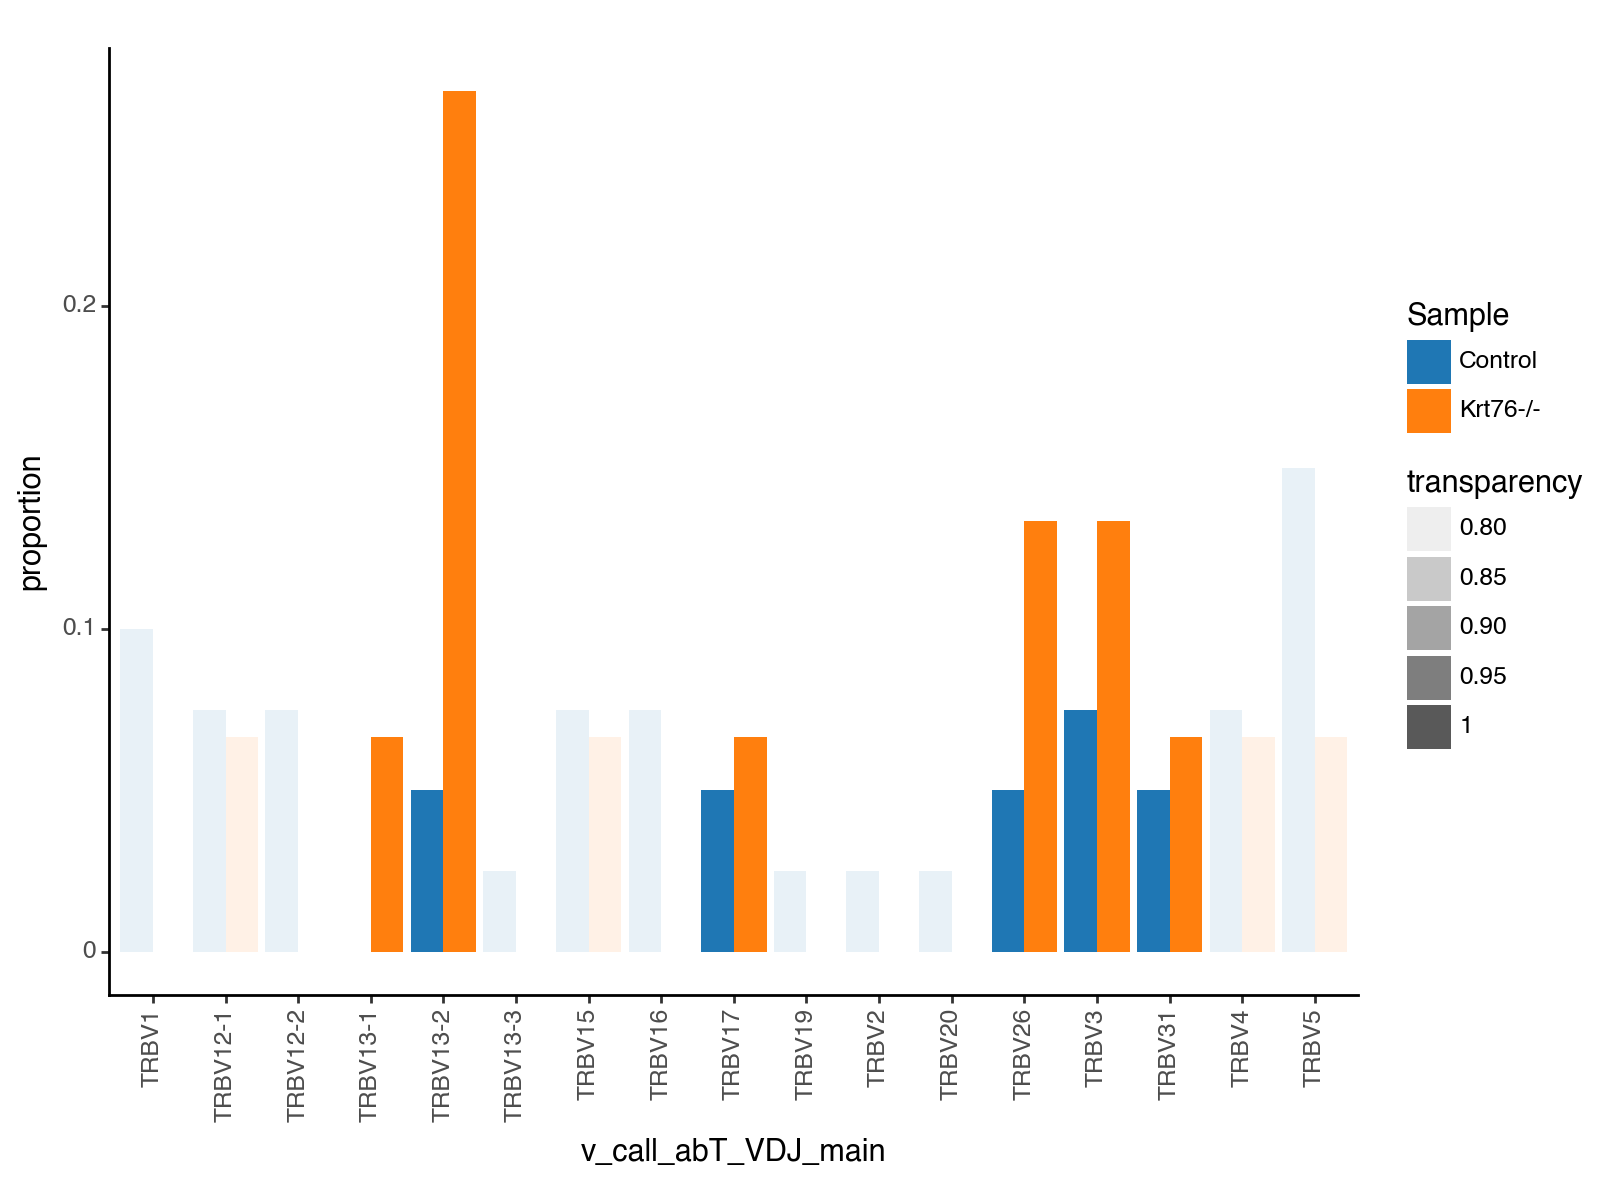

<Figure Size: (800 x 600)>

In [83]:
p

In [84]:
p.save("VgeneBetaChain_DP2_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_DP2_181223.pdf


### SP & DP - V gene beta chain

In [85]:
adata_NPF_SPnDP = adata_NPF[adata_NPF.obs["leiden"] == "5 SP & DP"]

In [86]:
adata_NPF_SPnDP 

View of AnnData object with n_obs × n_vars = 591 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [87]:
working_df = pd.DataFrame(adata_NPF_SPnDP.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV13-2                40
         TRBV19                  30
         TRBV13-1                28
         TRBV3                   26
         TRBV16                  26
         TRBV5                   26
         TRBV31                  24
         TRBV12-1                20
         TRBV13-3                17
         TRBV2                   17
         TRBV1                   16
         TRBV12-2                16
         TRBV15                  16
         TRBV26                  16
         TRBV14                  15
         TRBV20                  14
         TRBV17                  14
         TRBV4                   11
         TRBV29                   8
         TRBV23                   6
         TRBV30                   1
Krt76-/- TRBV2                   22
         TRBV13-2                21
         TRBV5                   19
         TRBV19                  17
         TRBV3                   15
         TRBV13-3                15
         TRBV31                  13
         TRBV13-1                13
         TRBV16                   8
         TRBV29                   8
         TRBV15                   8
         TRBV12-2                 8
         TRBV12-1                 8
         TRBV1                    6
         TRBV14                   5
         TRBV20                   5
         TRBV23                   4
         TRBV4                    4
         TRBV26                   3
         TRBV17                   2
         TRBV30                   0

In [88]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control            TRBV13-2      40
1    Control              TRBV19      30
2    Control            TRBV13-1      28
3    Control               TRBV3      26
4    Control              TRBV16      26
5    Control               TRBV5      26
6    Control              TRBV31      24
7    Control            TRBV12-1      20
8    Control            TRBV13-3      17
9    Control               TRBV2      17
10   Control               TRBV1      16
11   Control            TRBV12-2      16
12   Control              TRBV15      16
13   Control              TRBV26      16
14   Control              TRBV14      15
15   Control              TRBV20      14
16   Control              TRBV17      14
17   Control               TRBV4      11
18   Control              TRBV29       8
19   Control              TRBV23       6
20   Control              TRBV30       1
21  Krt76-/-               TRBV2      22
22  Krt76-/-            TRBV13-2      21
23  Krt76-/-               TRBV5      19
24  Krt76-/-              TRBV19      17
25  Krt76-/-               TRBV3      15
26  Krt76-/-            TRBV13-3      15
27  Krt76-/-              TRBV31      13
28  Krt76-/-            TRBV13-1      13
29  Krt76-/-              TRBV16       8
30  Krt76-/-              TRBV29       8
31  Krt76-/-              TRBV15       8
32  Krt76-/-            TRBV12-2       8
33  Krt76-/-            TRBV12-1       8
34  Krt76-/-               TRBV1       6
35  Krt76-/-              TRBV14       5
36  Krt76-/-              TRBV20       5
37  Krt76-/-              TRBV23       4
38  Krt76-/-               TRBV4       4
39  Krt76-/-              TRBV26       3
40  Krt76-/-              TRBV17       2
41  Krt76-/-              TRBV30       0

In [89]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 387, 'Krt76-/-': 204}

In [90]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [91]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control            TRBV13-2      40    0.103359
1    Control              TRBV19      30    0.077519
2    Control            TRBV13-1      28    0.072351
3    Control               TRBV3      26    0.067183
4    Control              TRBV16      26    0.067183
5    Control               TRBV5      26    0.067183
6    Control              TRBV31      24    0.062016
7    Control            TRBV12-1      20    0.051680
8    Control            TRBV13-3      17    0.043928
9    Control               TRBV2      17    0.043928
10   Control               TRBV1      16    0.041344
11   Control            TRBV12-2      16    0.041344
12   Control              TRBV15      16    0.041344
13   Control              TRBV26      16    0.041344
14   Control              TRBV14      15    0.038760
15   Control              TRBV20      14    0.036176
16   Control              TRBV17      14    0.036176
17   Control               TRBV4      11    0.028424
18   Control              TRBV29       8    0.020672
19   Control              TRBV23       6    0.015504
20   Control              TRBV30       1    0.002584
21  Krt76-/-               TRBV2      22    0.107843
22  Krt76-/-            TRBV13-2      21    0.102941
23  Krt76-/-               TRBV5      19    0.093137
24  Krt76-/-              TRBV19      17    0.083333
25  Krt76-/-               TRBV3      15    0.073529
26  Krt76-/-            TRBV13-3      15    0.073529
27  Krt76-/-              TRBV31      13    0.063725
28  Krt76-/-            TRBV13-1      13    0.063725
29  Krt76-/-              TRBV16       8    0.039216
30  Krt76-/-              TRBV29       8    0.039216
31  Krt76-/-              TRBV15       8    0.039216
32  Krt76-/-            TRBV12-2       8    0.039216
33  Krt76-/-            TRBV12-1       8    0.039216
34  Krt76-/-               TRBV1       6    0.029412
35  Krt76-/-              TRBV14       5    0.024510
36  Krt76-/-              TRBV20       5    0.024510
37  Krt76-/-              TRBV23       4    0.019608
38  Krt76-/-               TRBV4       4    0.019608
39  Krt76-/-              TRBV26       3    0.014706
40  Krt76-/-              TRBV17       2    0.009804
41  Krt76-/-              TRBV30       0    0.000000

In [92]:
working_control = working_df[working_df["Sample"] == "Control"]

In [93]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [94]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [95]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [96]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 0.7113970588235293,
 'TRBV12-1': 0.7588235294117648,
 'TRBV12-2': 0.9485294117647058,
 'TRBV13-1': 0.8807773109243697,
 'TRBV13-2': 0.9959558823529412,
 'TRBV13-3': 1.6738754325259517,
 'TRBV14': 0.6323529411764706,
 'TRBV15': 0.9485294117647058,
 'TRBV16': 0.5837104072398189,
 'TRBV17': 0.2710084033613446,
 'TRBV19': 1.075,
 'TRBV2': 2.4550173010380627,
 'TRBV20': 0.6775210084033614,
 'TRBV23': 1.2647058823529411,
 'TRBV26': 0.35569852941176466,
 'TRBV29': 1.8970588235294117,
 'TRBV3': 1.0944570135746605,
 'TRBV30': 0.0,
 'TRBV31': 1.0275735294117647,
 'TRBV4': 0.6898395721925134,
 'TRBV5': 1.38631221719457}

In [97]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control            TRBV13-2      40    0.103359    0.995956
1    Control              TRBV19      30    0.077519    1.075000
2    Control            TRBV13-1      28    0.072351    0.880777
3    Control               TRBV3      26    0.067183    1.094457
4    Control              TRBV16      26    0.067183    0.583710
5    Control               TRBV5      26    0.067183    1.386312
6    Control              TRBV31      24    0.062016    1.027574
7    Control            TRBV12-1      20    0.051680    0.758824
8    Control            TRBV13-3      17    0.043928    1.673875
9    Control               TRBV2      17    0.043928    2.455017
10   Control               TRBV1      16    0.041344    0.711397
11   Control            TRBV12-2      16    0.041344    0.948529
12   Control              TRBV15      16    0.041344    0.948529
13   Control              TRBV26      16    0.041344    0.355699
14   Control              TRBV14      15    0.038760    0.632353
15   Control              TRBV20      14    0.036176    0.677521
16   Control              TRBV17      14    0.036176    0.271008
17   Control               TRBV4      11    0.028424    0.689840
18   Control              TRBV29       8    0.020672    1.897059
19   Control              TRBV23       6    0.015504    1.264706
20   Control              TRBV30       1    0.002584    0.000000
21  Krt76-/-               TRBV2      22    0.107843    2.455017
22  Krt76-/-            TRBV13-2      21    0.102941    0.995956
23  Krt76-/-               TRBV5      19    0.093137    1.386312
24  Krt76-/-              TRBV19      17    0.083333    1.075000
25  Krt76-/-               TRBV3      15    0.073529    1.094457
26  Krt76-/-            TRBV13-3      15    0.073529    1.673875
27  Krt76-/-              TRBV31      13    0.063725    1.027574
28  Krt76-/-            TRBV13-1      13    0.063725    0.880777
29  Krt76-/-              TRBV16       8    0.039216    0.583710
30  Krt76-/-              TRBV29       8    0.039216    1.897059
31  Krt76-/-              TRBV15       8    0.039216    0.948529
32  Krt76-/-            TRBV12-2       8    0.039216    0.948529
33  Krt76-/-            TRBV12-1       8    0.039216    0.758824
34  Krt76-/-               TRBV1       6    0.029412    0.711397
35  Krt76-/-              TRBV14       5    0.024510    0.632353
36  Krt76-/-              TRBV20       5    0.024510    0.677521
37  Krt76-/-              TRBV23       4    0.019608    1.264706
38  Krt76-/-               TRBV4       4    0.019608    0.689840
39  Krt76-/-              TRBV26       3    0.014706    0.355699
40  Krt76-/-              TRBV17       2    0.009804    0.271008
41  Krt76-/-              TRBV30       0    0.000000    0.000000

In [98]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [99]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

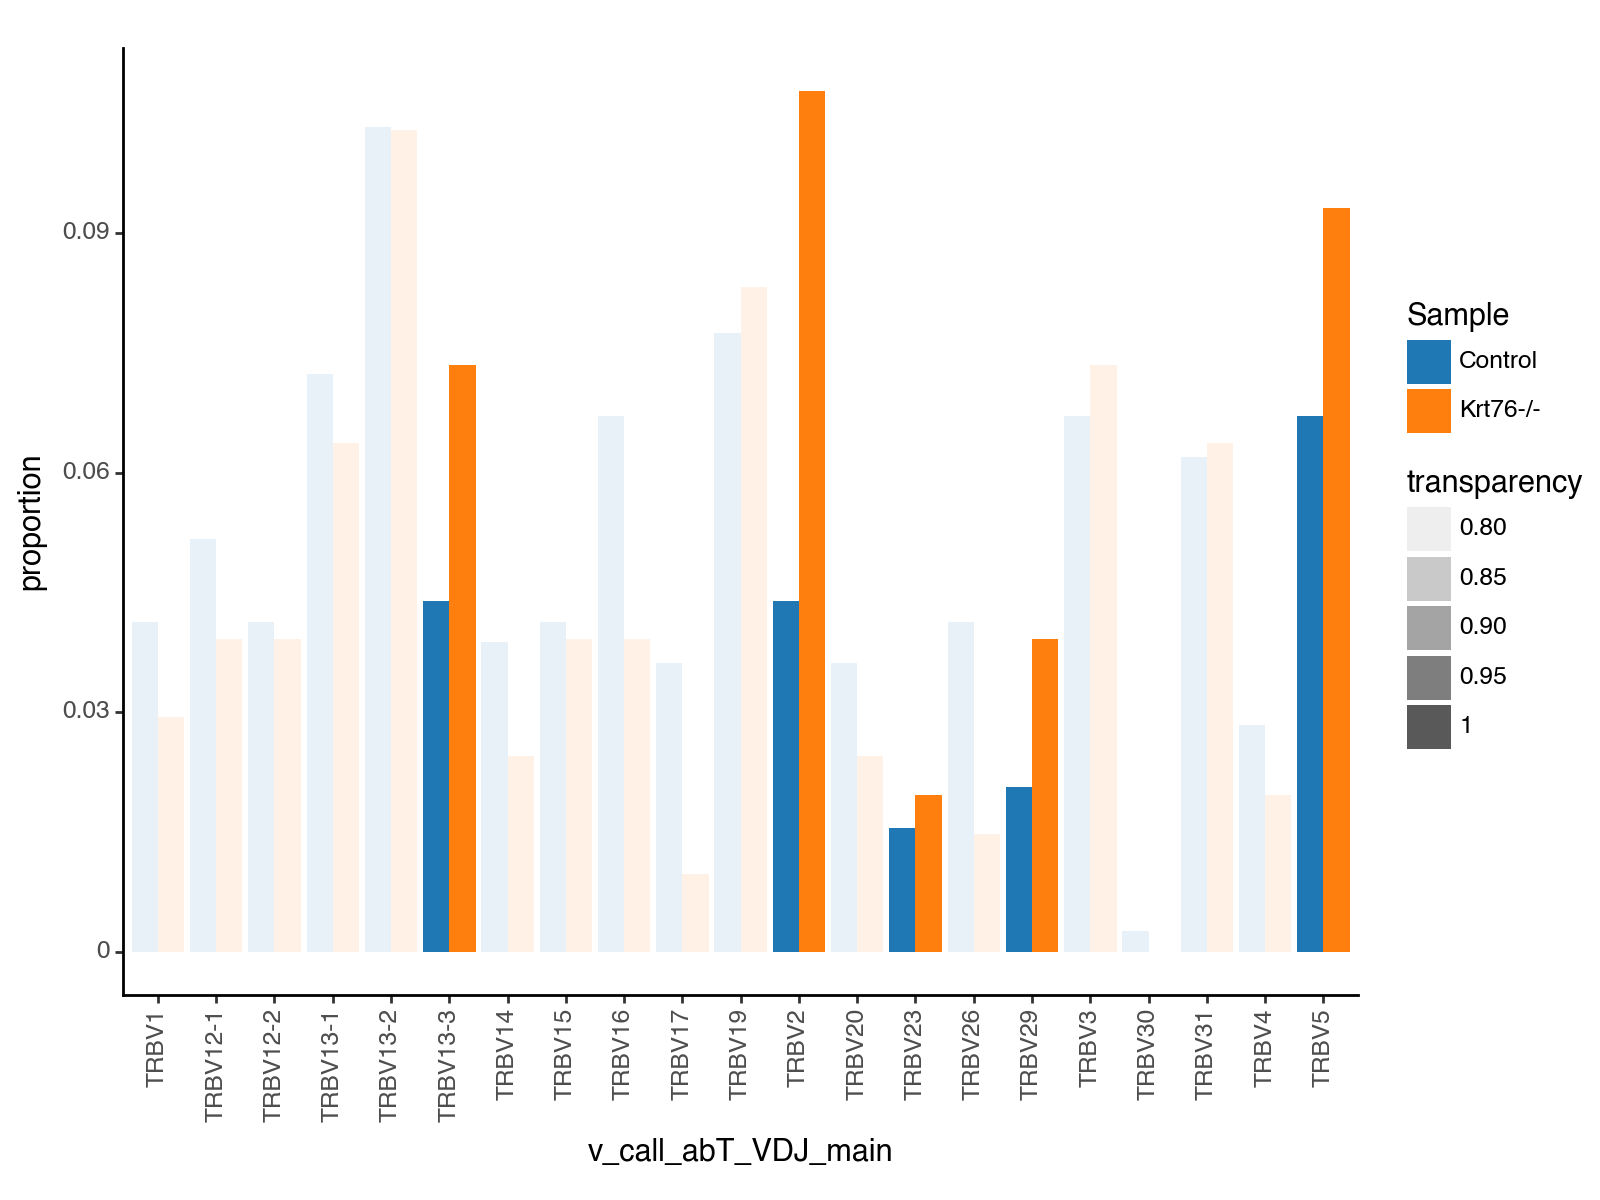

<Figure Size: (800 x 600)>

In [100]:
p

In [101]:
p.save("VgeneBetaChain_SPnDP_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_SPnDP_181223.pdf


### TCRgd - V gene beta chain

In [102]:
adata_NPF_TCRgd = adata_NPF[adata_NPF.obs["leiden"] == "8 TCRgd"]

In [103]:
adata_NPF_TCRgd

View of AnnData object with n_obs × n_vars = 97 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [104]:
working_df = pd.DataFrame(adata_NPF_TCRgd.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV5                    7
         TRBV13-3                 7
         TRBV4                    5
         TRBV15                   5
         TRBV13-1                 4
         TRBV17                   4
         TRBV20                   4
         TRBV31                   3
         TRBV1                    3
         TRBV16                   3
         TRBV13-2                 3
         TRBV12-1                 3
         TRBV19                   2
         TRBV3                    2
         TRBV29                   2
         TRBV26                   2
         TRBV12-2                 1
         TRBV14                   1
         TRBV21                   1
         TRBV24                   1
Krt76-/- TRBV20                   4
         TRBV31                   4
         TRBV16                   3
         TRBV13-3                 3
         TRBV14                   3
         TRBV15                   2
         TRBV19                   2
         TRBV13-2                 2
         TRBV4                    2
         TRBV1                    2
         TRBV12-1                 2
         TRBV24                   1
         TRBV29                   1
         TRBV26                   1
         TRBV12-2                 1
         TRBV5                    1
         TRBV21                   0
         TRBV13-1                 0
         TRBV3                    0
         TRBV17                   0

In [105]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control               TRBV5       7
1    Control            TRBV13-3       7
2    Control               TRBV4       5
3    Control              TRBV15       5
4    Control            TRBV13-1       4
5    Control              TRBV17       4
6    Control              TRBV20       4
7    Control              TRBV31       3
8    Control               TRBV1       3
9    Control              TRBV16       3
10   Control            TRBV13-2       3
11   Control            TRBV12-1       3
12   Control              TRBV19       2
13   Control               TRBV3       2
14   Control              TRBV29       2
15   Control              TRBV26       2
16   Control            TRBV12-2       1
17   Control              TRBV14       1
18   Control              TRBV21       1
19   Control              TRBV24       1
20  Krt76-/-              TRBV20       4
21  Krt76-/-              TRBV31       4
22  Krt76-/-              TRBV16       3
23  Krt76-/-            TRBV13-3       3
24  Krt76-/-              TRBV14       3
25  Krt76-/-              TRBV15       2
26  Krt76-/-              TRBV19       2
27  Krt76-/-            TRBV13-2       2
28  Krt76-/-               TRBV4       2
29  Krt76-/-               TRBV1       2
30  Krt76-/-            TRBV12-1       2
31  Krt76-/-              TRBV24       1
32  Krt76-/-              TRBV29       1
33  Krt76-/-              TRBV26       1
34  Krt76-/-            TRBV12-2       1
35  Krt76-/-               TRBV5       1
36  Krt76-/-              TRBV21       0
37  Krt76-/-            TRBV13-1       0
38  Krt76-/-               TRBV3       0
39  Krt76-/-              TRBV17       0

In [106]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 63, 'Krt76-/-': 34}

In [107]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [108]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control               TRBV5       7    0.111111
1    Control            TRBV13-3       7    0.111111
2    Control               TRBV4       5    0.079365
3    Control              TRBV15       5    0.079365
4    Control            TRBV13-1       4    0.063492
5    Control              TRBV17       4    0.063492
6    Control              TRBV20       4    0.063492
7    Control              TRBV31       3    0.047619
8    Control               TRBV1       3    0.047619
9    Control              TRBV16       3    0.047619
10   Control            TRBV13-2       3    0.047619
11   Control            TRBV12-1       3    0.047619
12   Control              TRBV19       2    0.031746
13   Control               TRBV3       2    0.031746
14   Control              TRBV29       2    0.031746
15   Control              TRBV26       2    0.031746
16   Control            TRBV12-2       1    0.015873
17   Control              TRBV14       1    0.015873
18   Control              TRBV21       1    0.015873
19   Control              TRBV24       1    0.015873
20  Krt76-/-              TRBV20       4    0.117647
21  Krt76-/-              TRBV31       4    0.117647
22  Krt76-/-              TRBV16       3    0.088235
23  Krt76-/-            TRBV13-3       3    0.088235
24  Krt76-/-              TRBV14       3    0.088235
25  Krt76-/-              TRBV15       2    0.058824
26  Krt76-/-              TRBV19       2    0.058824
27  Krt76-/-            TRBV13-2       2    0.058824
28  Krt76-/-               TRBV4       2    0.058824
29  Krt76-/-               TRBV1       2    0.058824
30  Krt76-/-            TRBV12-1       2    0.058824
31  Krt76-/-              TRBV24       1    0.029412
32  Krt76-/-              TRBV29       1    0.029412
33  Krt76-/-              TRBV26       1    0.029412
34  Krt76-/-            TRBV12-2       1    0.029412
35  Krt76-/-               TRBV5       1    0.029412
36  Krt76-/-              TRBV21       0    0.000000
37  Krt76-/-            TRBV13-1       0    0.000000
38  Krt76-/-               TRBV3       0    0.000000
39  Krt76-/-              TRBV17       0    0.000000

In [109]:
working_control = working_df[working_df["Sample"] == "Control"]

In [110]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [111]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [112]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [113]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.2352941176470589,
 'TRBV12-1': 1.2352941176470589,
 'TRBV12-2': 1.8529411764705883,
 'TRBV13-1': 0.0,
 'TRBV13-2': 1.2352941176470589,
 'TRBV13-3': 0.7941176470588236,
 'TRBV14': 5.558823529411765,
 'TRBV15': 0.7411764705882353,
 'TRBV16': 1.8529411764705885,
 'TRBV17': 0.0,
 'TRBV19': 1.8529411764705883,
 'TRBV20': 1.8529411764705883,
 'TRBV21': 0.0,
 'TRBV24': 1.8529411764705883,
 'TRBV26': 0.9264705882352942,
 'TRBV29': 0.9264705882352942,
 'TRBV3': 0.0,
 'TRBV31': 2.4705882352941178,
 'TRBV4': 0.7411764705882353,
 'TRBV5': 0.2647058823529412}

In [114]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control               TRBV5       7    0.111111    0.264706
1    Control            TRBV13-3       7    0.111111    0.794118
2    Control               TRBV4       5    0.079365    0.741176
3    Control              TRBV15       5    0.079365    0.741176
4    Control            TRBV13-1       4    0.063492    0.000000
5    Control              TRBV17       4    0.063492    0.000000
6    Control              TRBV20       4    0.063492    1.852941
7    Control              TRBV31       3    0.047619    2.470588
8    Control               TRBV1       3    0.047619    1.235294
9    Control              TRBV16       3    0.047619    1.852941
10   Control            TRBV13-2       3    0.047619    1.235294
11   Control            TRBV12-1       3    0.047619    1.235294
12   Control              TRBV19       2    0.031746    1.852941
13   Control               TRBV3       2    0.031746    0.000000
14   Control              TRBV29       2    0.031746    0.926471
15   Control              TRBV26       2    0.031746    0.926471
16   Control            TRBV12-2       1    0.015873    1.852941
17   Control              TRBV14       1    0.015873    5.558824
18   Control              TRBV21       1    0.015873    0.000000
19   Control              TRBV24       1    0.015873    1.852941
20  Krt76-/-              TRBV20       4    0.117647    1.852941
21  Krt76-/-              TRBV31       4    0.117647    2.470588
22  Krt76-/-              TRBV16       3    0.088235    1.852941
23  Krt76-/-            TRBV13-3       3    0.088235    0.794118
24  Krt76-/-              TRBV14       3    0.088235    5.558824
25  Krt76-/-              TRBV15       2    0.058824    0.741176
26  Krt76-/-              TRBV19       2    0.058824    1.852941
27  Krt76-/-            TRBV13-2       2    0.058824    1.235294
28  Krt76-/-               TRBV4       2    0.058824    0.741176
29  Krt76-/-               TRBV1       2    0.058824    1.235294
30  Krt76-/-            TRBV12-1       2    0.058824    1.235294
31  Krt76-/-              TRBV24       1    0.029412    1.852941
32  Krt76-/-              TRBV29       1    0.029412    0.926471
33  Krt76-/-              TRBV26       1    0.029412    0.926471
34  Krt76-/-            TRBV12-2       1    0.029412    1.852941
35  Krt76-/-               TRBV5       1    0.029412    0.264706
36  Krt76-/-              TRBV21       0    0.000000    0.000000
37  Krt76-/-            TRBV13-1       0    0.000000    0.000000
38  Krt76-/-               TRBV3       0    0.000000    0.000000
39  Krt76-/-              TRBV17       0    0.000000    0.000000

In [115]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [116]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

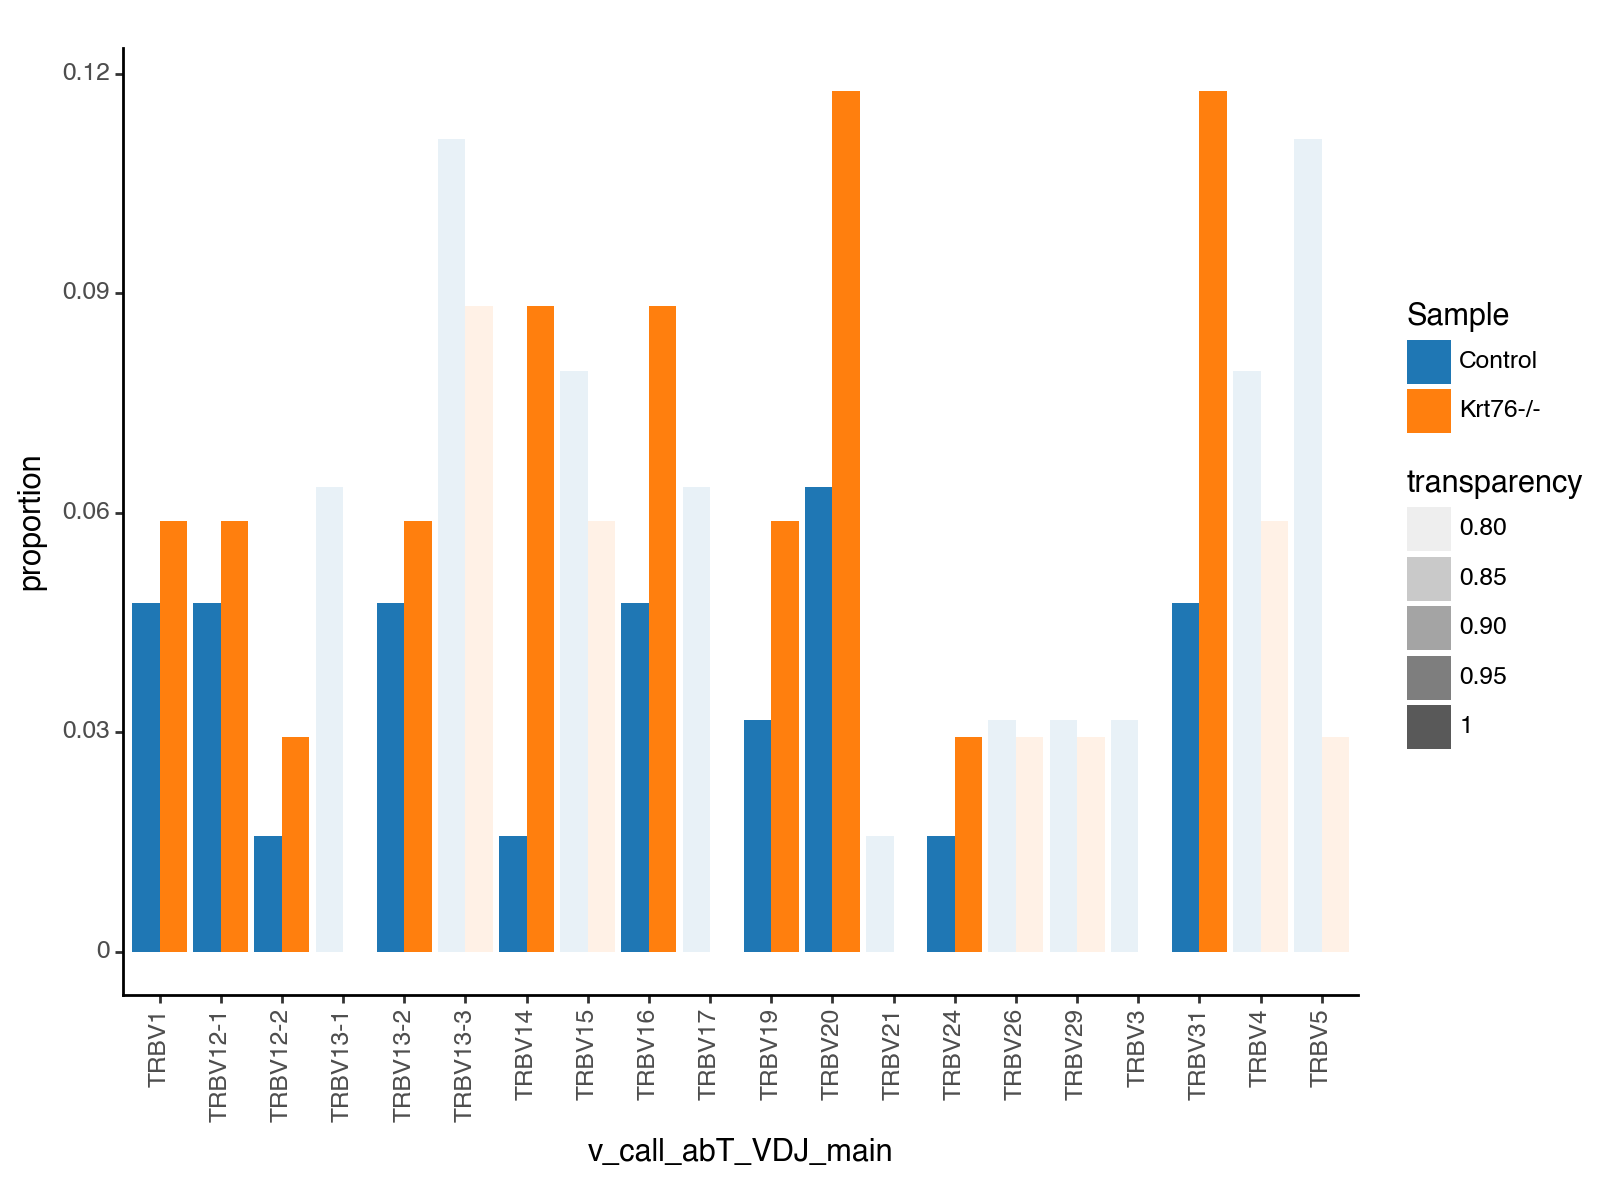

<Figure Size: (800 x 600)>

In [117]:
p

In [118]:
p.save("VgeneBetaChain_TCRgd_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_TCRgd_181223.pdf


### NKT / NK / Tregs - V gene beta chain

In [119]:
adata_NPF_NKT_NK_Tregs = adata_NPF[adata_NPF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [120]:
adata_NPF_NKT_NK_Tregs

View of AnnData object with n_obs × n_vars = 104 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [121]:
working_df = pd.DataFrame(adata_NPF_NKT_NK_Tregs.obs.groupby("Sample")["v_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VDJ_main       
Control  TRBV19                   7
         TRBV26                   7
         TRBV5                    7
         TRBV13-2                 6
         TRBV12-2                 6
         TRBV3                    6
         TRBV13-3                 5
         TRBV12-1                 5
         TRBV2                    5
         TRBV31                   5
         TRBV13-1                 4
         TRBV16                   4
         TRBV29                   4
         TRBV15                   3
         TRBV1                    3
         TRBV4                    2
         TRBV20                   2
         TRBV17                   2
         TRBV23                   1
Krt76-/- TRBV13-2                 5
         TRBV16                   3
         TRBV19                   2
         TRBV12-1                 2
         TRBV5                    2
         TRBV31                   1
         TRBV20                   1
         TRBV2                    1
         TRBV13-3                 1
         TRBV13-1                 1
         TRBV1                    1
         TRBV15                   0
         TRBV17                   0
         TRBV12-2                 0
         TRBV23                   0
         TRBV26                   0
         TRBV29                   0
         TRBV3                    0
         TRBV4                    0

In [122]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample v_call_abT_VDJ_main  counts
0    Control              TRBV19       7
1    Control              TRBV26       7
2    Control               TRBV5       7
3    Control            TRBV13-2       6
4    Control            TRBV12-2       6
5    Control               TRBV3       6
6    Control            TRBV13-3       5
7    Control            TRBV12-1       5
8    Control               TRBV2       5
9    Control              TRBV31       5
10   Control            TRBV13-1       4
11   Control              TRBV16       4
12   Control              TRBV29       4
13   Control              TRBV15       3
14   Control               TRBV1       3
15   Control               TRBV4       2
16   Control              TRBV20       2
17   Control              TRBV17       2
18   Control              TRBV23       1
19  Krt76-/-            TRBV13-2       5
20  Krt76-/-              TRBV16       3
21  Krt76-/-              TRBV19       2
22  Krt76-/-            TRBV12-1       2
23  Krt76-/-               TRBV5       2
24  Krt76-/-              TRBV31       1
25  Krt76-/-              TRBV20       1
26  Krt76-/-               TRBV2       1
27  Krt76-/-            TRBV13-3       1
28  Krt76-/-            TRBV13-1       1
29  Krt76-/-               TRBV1       1
30  Krt76-/-              TRBV15       0
31  Krt76-/-              TRBV17       0
32  Krt76-/-            TRBV12-2       0
33  Krt76-/-              TRBV23       0
34  Krt76-/-              TRBV26       0
35  Krt76-/-              TRBV29       0
36  Krt76-/-               TRBV3       0
37  Krt76-/-               TRBV4       0

In [123]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 84, 'Krt76-/-': 20}

In [124]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [125]:
working_df

Sample v_call_abT_VDJ_main  counts  proportion
0    Control              TRBV19       7    0.083333
1    Control              TRBV26       7    0.083333
2    Control               TRBV5       7    0.083333
3    Control            TRBV13-2       6    0.071429
4    Control            TRBV12-2       6    0.071429
5    Control               TRBV3       6    0.071429
6    Control            TRBV13-3       5    0.059524
7    Control            TRBV12-1       5    0.059524
8    Control               TRBV2       5    0.059524
9    Control              TRBV31       5    0.059524
10   Control            TRBV13-1       4    0.047619
11   Control              TRBV16       4    0.047619
12   Control              TRBV29       4    0.047619
13   Control              TRBV15       3    0.035714
14   Control               TRBV1       3    0.035714
15   Control               TRBV4       2    0.023810
16   Control              TRBV20       2    0.023810
17   Control              TRBV17       2    0.023810
18   Control              TRBV23       1    0.011905
19  Krt76-/-            TRBV13-2       5    0.250000
20  Krt76-/-              TRBV16       3    0.150000
21  Krt76-/-              TRBV19       2    0.100000
22  Krt76-/-            TRBV12-1       2    0.100000
23  Krt76-/-               TRBV5       2    0.100000
24  Krt76-/-              TRBV31       1    0.050000
25  Krt76-/-              TRBV20       1    0.050000
26  Krt76-/-               TRBV2       1    0.050000
27  Krt76-/-            TRBV13-3       1    0.050000
28  Krt76-/-            TRBV13-1       1    0.050000
29  Krt76-/-               TRBV1       1    0.050000
30  Krt76-/-              TRBV15       0    0.000000
31  Krt76-/-              TRBV17       0    0.000000
32  Krt76-/-            TRBV12-2       0    0.000000
33  Krt76-/-              TRBV23       0    0.000000
34  Krt76-/-              TRBV26       0    0.000000
35  Krt76-/-              TRBV29       0    0.000000
36  Krt76-/-               TRBV3       0    0.000000
37  Krt76-/-               TRBV4       0    0.000000

In [126]:
working_control = working_df[working_df["Sample"] == "Control"]

In [127]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [128]:
working_control.set_index("v_call_abT_VDJ_main", inplace=True)

In [129]:
working_KO.set_index("v_call_abT_VDJ_main", inplace=True)

In [130]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBV1': 1.4000000000000001,
 'TRBV12-1': 1.6800000000000002,
 'TRBV12-2': 0.0,
 'TRBV13-1': 1.05,
 'TRBV13-2': 3.5,
 'TRBV13-3': 0.8400000000000001,
 'TRBV15': 0.0,
 'TRBV16': 3.15,
 'TRBV17': 0.0,
 'TRBV19': 1.2000000000000002,
 'TRBV2': 0.8400000000000001,
 'TRBV20': 2.1,
 'TRBV23': 0.0,
 'TRBV26': 0.0,
 'TRBV29': 0.0,
 'TRBV3': 0.0,
 'TRBV31': 0.8400000000000001,
 'TRBV4': 0.0,
 'TRBV5': 1.2000000000000002}

In [131]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VDJ_main"]]
working_df

Sample v_call_abT_VDJ_main  counts  proportion  foldchange
0    Control              TRBV19       7    0.083333        1.20
1    Control              TRBV26       7    0.083333        0.00
2    Control               TRBV5       7    0.083333        1.20
3    Control            TRBV13-2       6    0.071429        3.50
4    Control            TRBV12-2       6    0.071429        0.00
5    Control               TRBV3       6    0.071429        0.00
6    Control            TRBV13-3       5    0.059524        0.84
7    Control            TRBV12-1       5    0.059524        1.68
8    Control               TRBV2       5    0.059524        0.84
9    Control              TRBV31       5    0.059524        0.84
10   Control            TRBV13-1       4    0.047619        1.05
11   Control              TRBV16       4    0.047619        3.15
12   Control              TRBV29       4    0.047619        0.00
13   Control              TRBV15       3    0.035714        0.00
14   Control               TRBV1       3    0.035714        1.40
15   Control               TRBV4       2    0.023810        0.00
16   Control              TRBV20       2    0.023810        2.10
17   Control              TRBV17       2    0.023810        0.00
18   Control              TRBV23       1    0.011905        0.00
19  Krt76-/-            TRBV13-2       5    0.250000        3.50
20  Krt76-/-              TRBV16       3    0.150000        3.15
21  Krt76-/-              TRBV19       2    0.100000        1.20
22  Krt76-/-            TRBV12-1       2    0.100000        1.68
23  Krt76-/-               TRBV5       2    0.100000        1.20
24  Krt76-/-              TRBV31       1    0.050000        0.84
25  Krt76-/-              TRBV20       1    0.050000        2.10
26  Krt76-/-               TRBV2       1    0.050000        0.84
27  Krt76-/-            TRBV13-3       1    0.050000        0.84
28  Krt76-/-            TRBV13-1       1    0.050000        1.05
29  Krt76-/-               TRBV1       1    0.050000        1.40
30  Krt76-/-              TRBV15       0    0.000000        0.00
31  Krt76-/-              TRBV17       0    0.000000        0.00
32  Krt76-/-            TRBV12-2       0    0.000000        0.00
33  Krt76-/-              TRBV23       0    0.000000        0.00
34  Krt76-/-              TRBV26       0    0.000000        0.00
35  Krt76-/-              TRBV29       0    0.000000        0.00
36  Krt76-/-               TRBV3       0    0.000000        0.00
37  Krt76-/-               TRBV4       0    0.000000        0.00

In [132]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [133]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

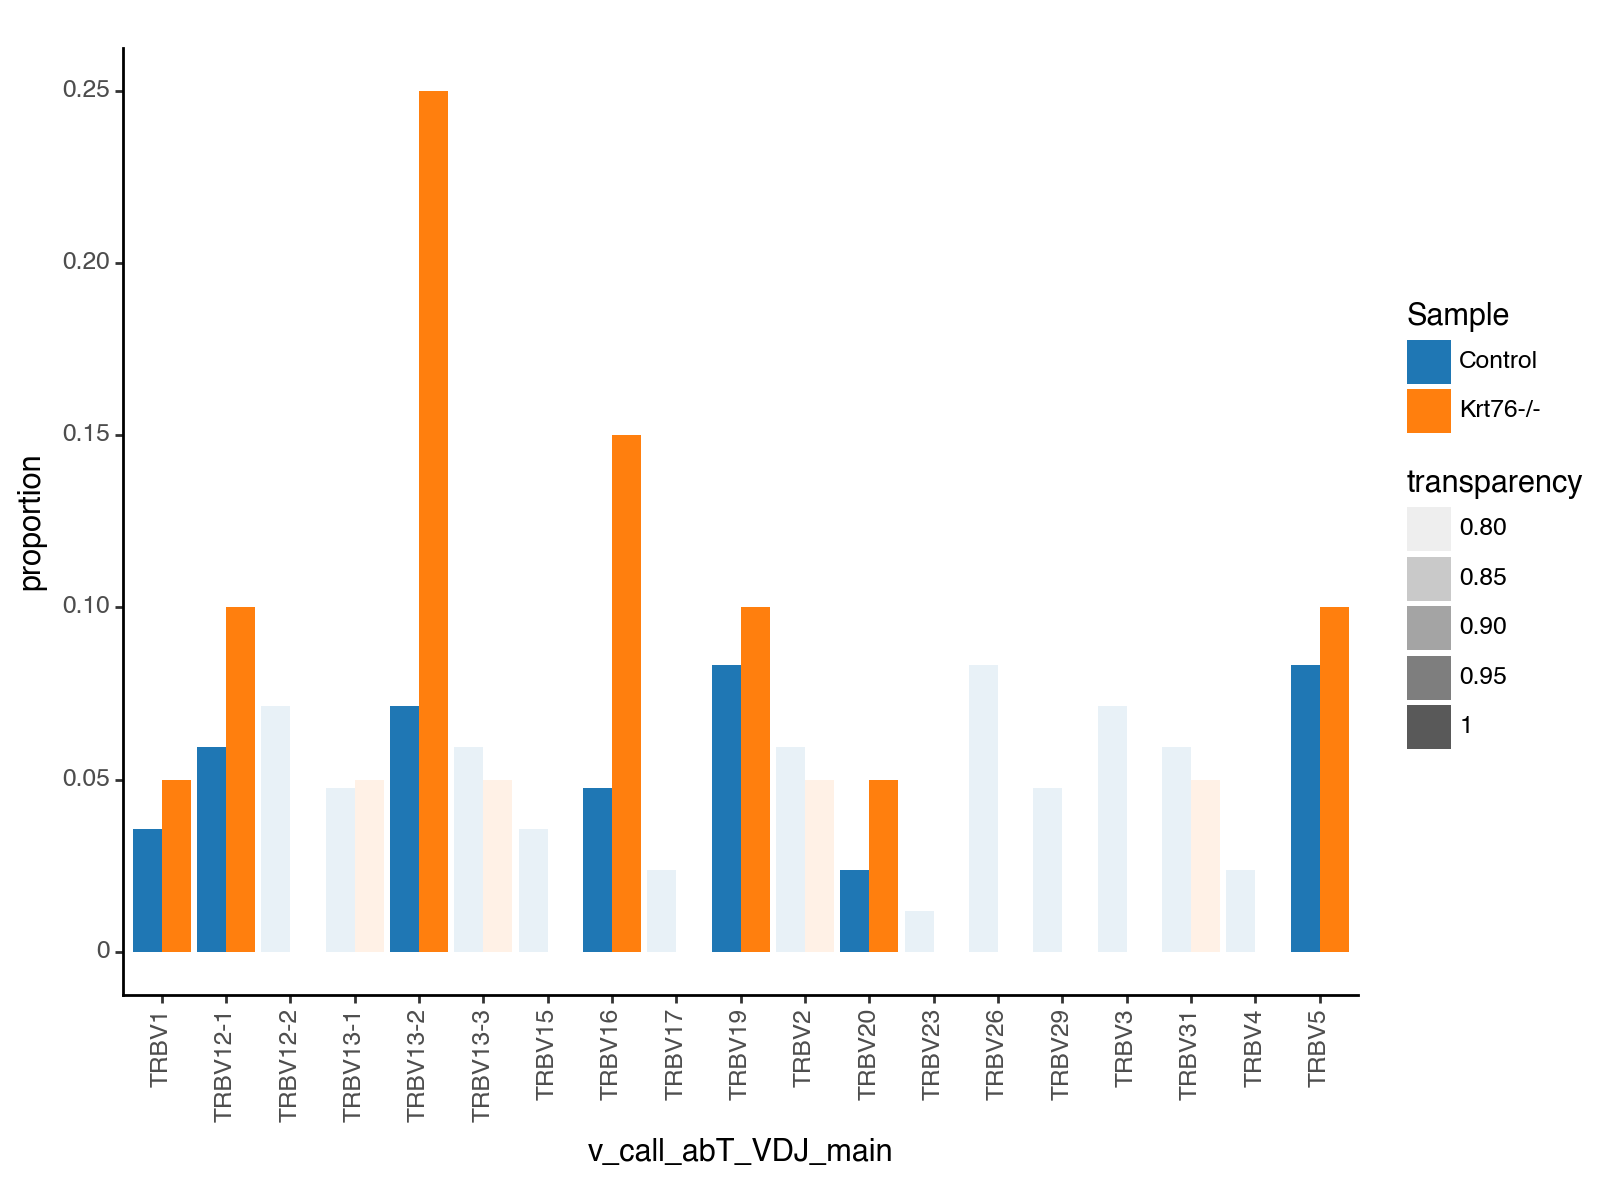

<Figure Size: (800 x 600)>

In [134]:
p

In [135]:
p.save("VgeneBetaChain_NKT_NK_Tregs_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneBetaChain_NKT_NK_Tregs_181223.pdf


### J gene

### DN2a - J gene beta chain

Rerunning code from earlier but now for J gene

In [141]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [142]:
adata_NPF

View of AnnData object with n_obs × n_vars = 8299 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [144]:
adata_NPF_DN2a = adata_NPF[adata_NPF.obs["leiden"] == "7 DN2a"]

In [148]:
working_df = pd.DataFrame(adata_NPF_DN2a.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-1                 18
         TRBJ1-1                 11
         TRBJ2-5                  8
         TRBJ2-7                  7
         TRBJ2-4                  6
         TRBJ1-4                  4
         TRBJ1-6                  3
         TRBJ2-3                  2
         TRBJ2-6                  2
         TRBJ1-2                  2
         TRBJ1-3                  2
         TRBJ1-5                  1
Krt76-/- TRBJ2-1                  4
         TRBJ1-1                  3
         TRBJ2-7                  3
         TRBJ1-2                  2
         TRBJ1-6                  2
         TRBJ2-4                  2
         TRBJ1-4                  1
         TRBJ2-3                  1
         TRBJ2-5                  1
         TRBJ1-3                  0
         TRBJ1-5                  0
         TRBJ2-6                  0

In [149]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1      18
1    Control             TRBJ1-1      11
2    Control             TRBJ2-5       8
3    Control             TRBJ2-7       7
4    Control             TRBJ2-4       6
5    Control             TRBJ1-4       4
6    Control             TRBJ1-6       3
7    Control             TRBJ2-3       2
8    Control             TRBJ2-6       2
9    Control             TRBJ1-2       2
10   Control             TRBJ1-3       2
11   Control             TRBJ1-5       1
12  Krt76-/-             TRBJ2-1       4
13  Krt76-/-             TRBJ1-1       3
14  Krt76-/-             TRBJ2-7       3
15  Krt76-/-             TRBJ1-2       2
16  Krt76-/-             TRBJ1-6       2
17  Krt76-/-             TRBJ2-4       2
18  Krt76-/-             TRBJ1-4       1
19  Krt76-/-             TRBJ2-3       1
20  Krt76-/-             TRBJ2-5       1
21  Krt76-/-             TRBJ1-3       0
22  Krt76-/-             TRBJ1-5       0
23  Krt76-/-             TRBJ2-6       0

In [150]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 66, 'Krt76-/-': 19}

In [151]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [152]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1      18    0.272727
1    Control             TRBJ1-1      11    0.166667
2    Control             TRBJ2-5       8    0.121212
3    Control             TRBJ2-7       7    0.106061
4    Control             TRBJ2-4       6    0.090909
5    Control             TRBJ1-4       4    0.060606
6    Control             TRBJ1-6       3    0.045455
7    Control             TRBJ2-3       2    0.030303
8    Control             TRBJ2-6       2    0.030303
9    Control             TRBJ1-2       2    0.030303
10   Control             TRBJ1-3       2    0.030303
11   Control             TRBJ1-5       1    0.015152
12  Krt76-/-             TRBJ2-1       4    0.210526
13  Krt76-/-             TRBJ1-1       3    0.157895
14  Krt76-/-             TRBJ2-7       3    0.157895
15  Krt76-/-             TRBJ1-2       2    0.105263
16  Krt76-/-             TRBJ1-6       2    0.105263
17  Krt76-/-             TRBJ2-4       2    0.105263
18  Krt76-/-             TRBJ1-4       1    0.052632
19  Krt76-/-             TRBJ2-3       1    0.052632
20  Krt76-/-             TRBJ2-5       1    0.052632
21  Krt76-/-             TRBJ1-3       0    0.000000
22  Krt76-/-             TRBJ1-5       0    0.000000
23  Krt76-/-             TRBJ2-6       0    0.000000

In [153]:
working_control = working_df[working_df["Sample"] == "Control"]

In [154]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [155]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [156]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [157]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.9473684210526315,
 'TRBJ1-2': 3.4736842105263155,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 0.8684210526315789,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 2.31578947368421,
 'TRBJ2-1': 0.7719298245614036,
 'TRBJ2-3': 1.7368421052631577,
 'TRBJ2-4': 1.157894736842105,
 'TRBJ2-5': 0.43421052631578944,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 1.488721804511278}

In [158]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1      18    0.272727    0.771930
1    Control             TRBJ1-1      11    0.166667    0.947368
2    Control             TRBJ2-5       8    0.121212    0.434211
3    Control             TRBJ2-7       7    0.106061    1.488722
4    Control             TRBJ2-4       6    0.090909    1.157895
5    Control             TRBJ1-4       4    0.060606    0.868421
6    Control             TRBJ1-6       3    0.045455    2.315789
7    Control             TRBJ2-3       2    0.030303    1.736842
8    Control             TRBJ2-6       2    0.030303    0.000000
9    Control             TRBJ1-2       2    0.030303    3.473684
10   Control             TRBJ1-3       2    0.030303    0.000000
11   Control             TRBJ1-5       1    0.015152    0.000000
12  Krt76-/-             TRBJ2-1       4    0.210526    0.771930
13  Krt76-/-             TRBJ1-1       3    0.157895    0.947368
14  Krt76-/-             TRBJ2-7       3    0.157895    1.488722
15  Krt76-/-             TRBJ1-2       2    0.105263    3.473684
16  Krt76-/-             TRBJ1-6       2    0.105263    2.315789
17  Krt76-/-             TRBJ2-4       2    0.105263    1.157895
18  Krt76-/-             TRBJ1-4       1    0.052632    0.868421
19  Krt76-/-             TRBJ2-3       1    0.052632    1.736842
20  Krt76-/-             TRBJ2-5       1    0.052632    0.434211
21  Krt76-/-             TRBJ1-3       0    0.000000    0.000000
22  Krt76-/-             TRBJ1-5       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-6       0    0.000000    0.000000

In [159]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [160]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [161]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [162]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

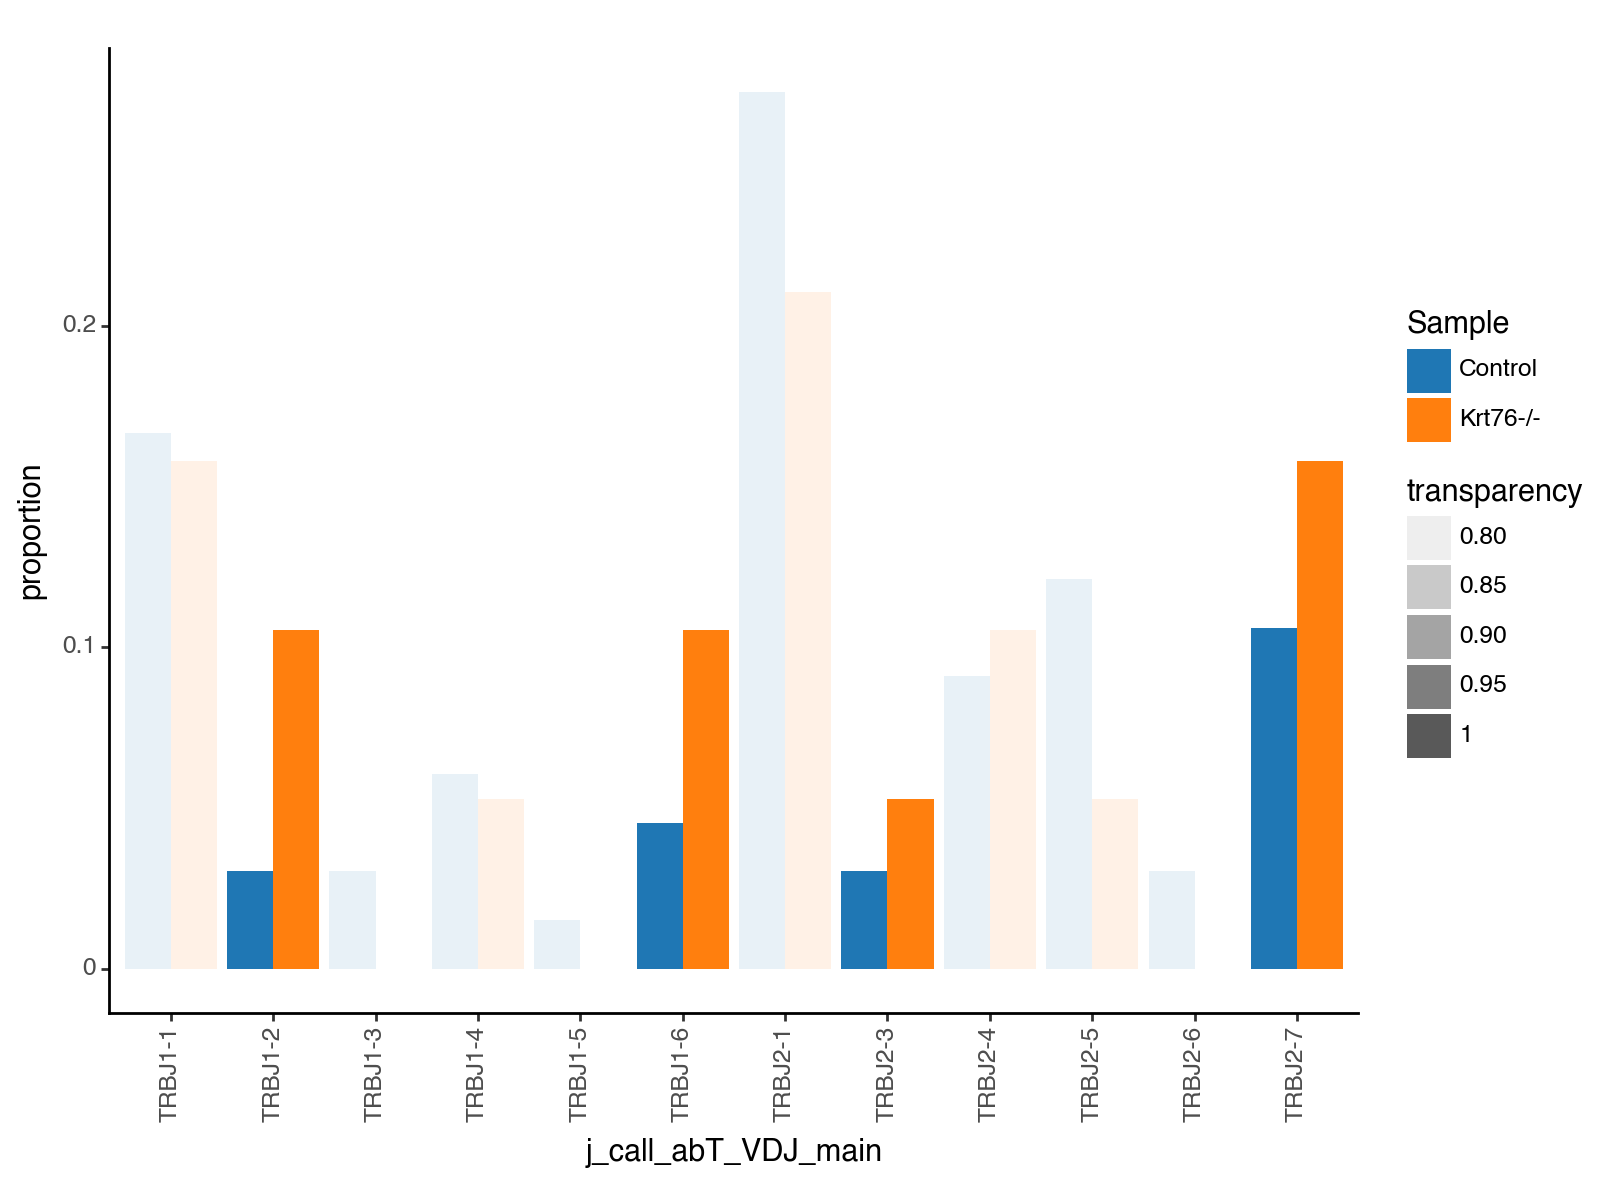

<Figure Size: (800 x 600)>

In [163]:
p

In [164]:
p.save("JgeneBetaChain_DN2a_NP_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN2a_NP_181223.pdf


### DN2b 1- J gene beta chain

In [165]:
adata_NPF_DN2b = adata_NPF[adata_NPF.obs["leiden"] == "12 DN2b 1"]

In [166]:
adata_NPF_DN2b

View of AnnData object with n_obs × n_vars = 48 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [167]:
working_df = pd.DataFrame(adata_NPF_DN2b.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-3                  5
         TRBJ2-7                  5
         TRBJ2-1                  4
         TRBJ2-2                  4
         TRBJ1-1                  3
         TRBJ1-4                  3
         TRBJ1-5                  2
         TRBJ2-5                  2
         TRBJ2-6                  2
         TRBJ1-2                  2
         TRBJ2-4                  1
         TRBJ1-3                  1
         TRBJ1-6                  0
Krt76-/- TRBJ2-1                  4
         TRBJ2-4                  3
         TRBJ1-5                  2
         TRBJ2-5                  1
         TRBJ2-3                  1
         TRBJ1-6                  1
         TRBJ1-1                  1
         TRBJ2-7                  1
         TRBJ1-4                  0
         TRBJ1-3                  0
         TRBJ1-2                  0
         TRBJ2-2                  0
         TRBJ2-6                  0

In [168]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-3       5
1    Control             TRBJ2-7       5
2    Control             TRBJ2-1       4
3    Control             TRBJ2-2       4
4    Control             TRBJ1-1       3
5    Control             TRBJ1-4       3
6    Control             TRBJ1-5       2
7    Control             TRBJ2-5       2
8    Control             TRBJ2-6       2
9    Control             TRBJ1-2       2
10   Control             TRBJ2-4       1
11   Control             TRBJ1-3       1
12   Control             TRBJ1-6       0
13  Krt76-/-             TRBJ2-1       4
14  Krt76-/-             TRBJ2-4       3
15  Krt76-/-             TRBJ1-5       2
16  Krt76-/-             TRBJ2-5       1
17  Krt76-/-             TRBJ2-3       1
18  Krt76-/-             TRBJ1-6       1
19  Krt76-/-             TRBJ1-1       1
20  Krt76-/-             TRBJ2-7       1
21  Krt76-/-             TRBJ1-4       0
22  Krt76-/-             TRBJ1-3       0
23  Krt76-/-             TRBJ1-2       0
24  Krt76-/-             TRBJ2-2       0
25  Krt76-/-             TRBJ2-6       0

In [169]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 34, 'Krt76-/-': 14}

In [170]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [171]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-3       5    0.147059
1    Control             TRBJ2-7       5    0.147059
2    Control             TRBJ2-1       4    0.117647
3    Control             TRBJ2-2       4    0.117647
4    Control             TRBJ1-1       3    0.088235
5    Control             TRBJ1-4       3    0.088235
6    Control             TRBJ1-5       2    0.058824
7    Control             TRBJ2-5       2    0.058824
8    Control             TRBJ2-6       2    0.058824
9    Control             TRBJ1-2       2    0.058824
10   Control             TRBJ2-4       1    0.029412
11   Control             TRBJ1-3       1    0.029412
12   Control             TRBJ1-6       0    0.000000
13  Krt76-/-             TRBJ2-1       4    0.285714
14  Krt76-/-             TRBJ2-4       3    0.214286
15  Krt76-/-             TRBJ1-5       2    0.142857
16  Krt76-/-             TRBJ2-5       1    0.071429
17  Krt76-/-             TRBJ2-3       1    0.071429
18  Krt76-/-             TRBJ1-6       1    0.071429
19  Krt76-/-             TRBJ1-1       1    0.071429
20  Krt76-/-             TRBJ2-7       1    0.071429
21  Krt76-/-             TRBJ1-4       0    0.000000
22  Krt76-/-             TRBJ1-3       0    0.000000
23  Krt76-/-             TRBJ1-2       0    0.000000
24  Krt76-/-             TRBJ2-2       0    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000

In [172]:
working_control = working_df[working_df["Sample"] == "Control"]

In [173]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [174]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [175]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [176]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.8095238095238094,
 'TRBJ1-2': 0.0,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 0.0,
 'TRBJ1-5': 2.4285714285714284,
 'TRBJ1-6': inf,
 'TRBJ2-1': 2.4285714285714284,
 'TRBJ2-2': 0.0,
 'TRBJ2-3': 0.48571428571428565,
 'TRBJ2-4': 7.285714285714286,
 'TRBJ2-5': 1.2142857142857142,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 0.48571428571428565}

In [177]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-3       5    0.147059    0.485714
1    Control             TRBJ2-7       5    0.147059    0.485714
2    Control             TRBJ2-1       4    0.117647    2.428571
3    Control             TRBJ2-2       4    0.117647    0.000000
4    Control             TRBJ1-1       3    0.088235    0.809524
5    Control             TRBJ1-4       3    0.088235    0.000000
6    Control             TRBJ1-5       2    0.058824    2.428571
7    Control             TRBJ2-5       2    0.058824    1.214286
8    Control             TRBJ2-6       2    0.058824    0.000000
9    Control             TRBJ1-2       2    0.058824    0.000000
10   Control             TRBJ2-4       1    0.029412    7.285714
11   Control             TRBJ1-3       1    0.029412    0.000000
12   Control             TRBJ1-6       0    0.000000         inf
13  Krt76-/-             TRBJ2-1       4    0.285714    2.428571
14  Krt76-/-             TRBJ2-4       3    0.214286    7.285714
15  Krt76-/-             TRBJ1-5       2    0.142857    2.428571
16  Krt76-/-             TRBJ2-5       1    0.071429    1.214286
17  Krt76-/-             TRBJ2-3       1    0.071429    0.485714
18  Krt76-/-             TRBJ1-6       1    0.071429         inf
19  Krt76-/-             TRBJ1-1       1    0.071429    0.809524
20  Krt76-/-             TRBJ2-7       1    0.071429    0.485714
21  Krt76-/-             TRBJ1-4       0    0.000000    0.000000
22  Krt76-/-             TRBJ1-3       0    0.000000    0.000000
23  Krt76-/-             TRBJ1-2       0    0.000000    0.000000
24  Krt76-/-             TRBJ2-2       0    0.000000    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000    0.000000

In [178]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [179]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [180]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [181]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

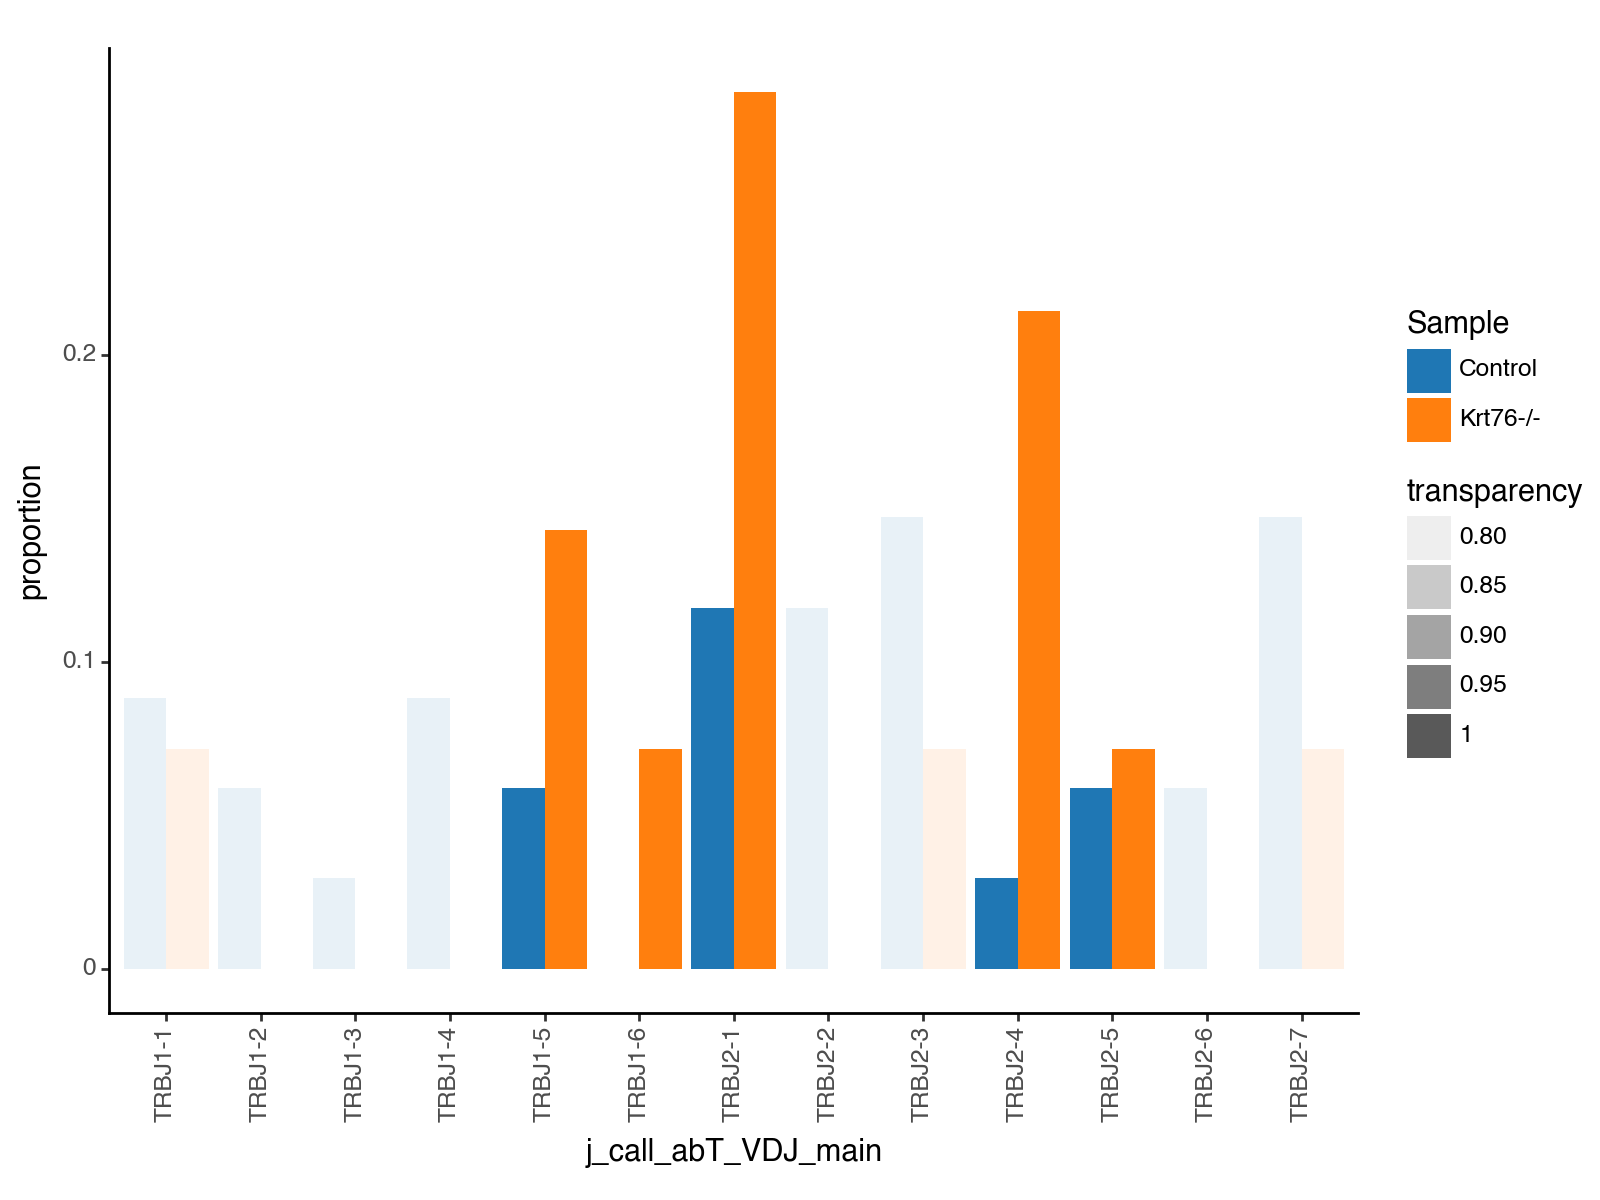

<Figure Size: (800 x 600)>

In [182]:
p

In [183]:
p.save("JgeneBetaChain_DN2b_1_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN2b_1_181223.pdf


### DN2b 2 - J gene beta chain

In [184]:
adata_NPF_DN2b2 = adata_NPF[adata_NPF.obs["leiden"] == "4 DN2b 2"]

In [185]:
adata_NPF_DN2b2

View of AnnData object with n_obs × n_vars = 455 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [186]:
working_df = pd.DataFrame(adata_NPF_DN2b2.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main           
Control  TRBJ2-1                     58
         TRBJ2-5                     43
         TRBJ2-7                     42
         TRBJ1-1                     30
         TRBJ2-4                     30
         TRBJ2-3                     25
         TRBJ1-2                     25
         TRBJ1-4                     19
         TRBJ1-3                     16
         TRBJ2-2                     16
         TRBJ2-6                      9
         TRBJ1-5                      9
         TRBJ1-6                      9
         TRBJ2-2,TRBJ1-6,TRBJ2-7      1
Krt76-/- TRBJ2-7                     22
         TRBJ2-5                     20
         TRBJ1-1                     15
         TRBJ2-3                     12
         TRBJ1-5                     12
         TRBJ2-4                     10
         TRBJ2-1                      9
         TRBJ1-4                      7
         TRBJ1-2                      4
         TRBJ2-2                      4
         TRBJ2-6                      4
         TRBJ1-3                      3
         TRBJ1-6                      1
         TRBJ2-2,TRBJ1-6,TRBJ2-7      0

In [187]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample      j_call_abT_VDJ_main  counts
0    Control                  TRBJ2-1      58
1    Control                  TRBJ2-5      43
2    Control                  TRBJ2-7      42
3    Control                  TRBJ1-1      30
4    Control                  TRBJ2-4      30
5    Control                  TRBJ2-3      25
6    Control                  TRBJ1-2      25
7    Control                  TRBJ1-4      19
8    Control                  TRBJ1-3      16
9    Control                  TRBJ2-2      16
10   Control                  TRBJ2-6       9
11   Control                  TRBJ1-5       9
12   Control                  TRBJ1-6       9
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       1
14  Krt76-/-                  TRBJ2-7      22
15  Krt76-/-                  TRBJ2-5      20
16  Krt76-/-                  TRBJ1-1      15
17  Krt76-/-                  TRBJ2-3      12
18  Krt76-/-                  TRBJ1-5      12
19  Krt76-/-                  TRBJ2-4      10
20  Krt76-/-                  TRBJ2-1       9
21  Krt76-/-                  TRBJ1-4       7
22  Krt76-/-                  TRBJ1-2       4
23  Krt76-/-                  TRBJ2-2       4
24  Krt76-/-                  TRBJ2-6       4
25  Krt76-/-                  TRBJ1-3       3
26  Krt76-/-                  TRBJ1-6       1
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       0

In [188]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 332, 'Krt76-/-': 123}

In [189]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [190]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-1      58    0.174699
1    Control                  TRBJ2-5      43    0.129518
2    Control                  TRBJ2-7      42    0.126506
3    Control                  TRBJ1-1      30    0.090361
4    Control                  TRBJ2-4      30    0.090361
5    Control                  TRBJ2-3      25    0.075301
6    Control                  TRBJ1-2      25    0.075301
7    Control                  TRBJ1-4      19    0.057229
8    Control                  TRBJ1-3      16    0.048193
9    Control                  TRBJ2-2      16    0.048193
10   Control                  TRBJ2-6       9    0.027108
11   Control                  TRBJ1-5       9    0.027108
12   Control                  TRBJ1-6       9    0.027108
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       1    0.003012
14  Krt76-/-                  TRBJ2-7      22    0.178862
15  Krt76-/-                  TRBJ2-5      20    0.162602
16  Krt76-/-                  TRBJ1-1      15    0.121951
17  Krt76-/-                  TRBJ2-3      12    0.097561
18  Krt76-/-                  TRBJ1-5      12    0.097561
19  Krt76-/-                  TRBJ2-4      10    0.081301
20  Krt76-/-                  TRBJ2-1       9    0.073171
21  Krt76-/-                  TRBJ1-4       7    0.056911
22  Krt76-/-                  TRBJ1-2       4    0.032520
23  Krt76-/-                  TRBJ2-2       4    0.032520
24  Krt76-/-                  TRBJ2-6       4    0.032520
25  Krt76-/-                  TRBJ1-3       3    0.024390
26  Krt76-/-                  TRBJ1-6       1    0.008130
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       0    0.000000

In [191]:
working_control = working_df[working_df["Sample"] == "Control"]

In [192]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [193]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [194]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [195]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.3495934959349594,
 'TRBJ1-2': 0.431869918699187,
 'TRBJ1-3': 0.5060975609756098,
 'TRBJ1-4': 0.9944373127941806,
 'TRBJ1-5': 3.5989159891598916,
 'TRBJ1-6': 0.29990966576332434,
 'TRBJ2-1': 0.41883936080740114,
 'TRBJ2-2': 0.6747967479674797,
 'TRBJ2-2,TRBJ1-6,TRBJ2-7': 0.0,
 'TRBJ2-3': 1.295609756097561,
 'TRBJ2-4': 0.8997289972899729,
 'TRBJ2-5': 1.255435810172055,
 'TRBJ2-6': 1.1996386630532974,
 'TRBJ2-7': 1.4138598528842432}

In [196]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample      j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control                  TRBJ2-1      58    0.174699    0.418839
1    Control                  TRBJ2-5      43    0.129518    1.255436
2    Control                  TRBJ2-7      42    0.126506    1.413860
3    Control                  TRBJ1-1      30    0.090361    1.349593
4    Control                  TRBJ2-4      30    0.090361    0.899729
5    Control                  TRBJ2-3      25    0.075301    1.295610
6    Control                  TRBJ1-2      25    0.075301    0.431870
7    Control                  TRBJ1-4      19    0.057229    0.994437
8    Control                  TRBJ1-3      16    0.048193    0.506098
9    Control                  TRBJ2-2      16    0.048193    0.674797
10   Control                  TRBJ2-6       9    0.027108    1.199639
11   Control                  TRBJ1-5       9    0.027108    3.598916
12   Control                  TRBJ1-6       9    0.027108    0.299910
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       1    0.003012    0.000000
14  Krt76-/-                  TRBJ2-7      22    0.178862    1.413860
15  Krt76-/-                  TRBJ2-5      20    0.162602    1.255436
16  Krt76-/-                  TRBJ1-1      15    0.121951    1.349593
17  Krt76-/-                  TRBJ2-3      12    0.097561    1.295610
18  Krt76-/-                  TRBJ1-5      12    0.097561    3.598916
19  Krt76-/-                  TRBJ2-4      10    0.081301    0.899729
20  Krt76-/-                  TRBJ2-1       9    0.073171    0.418839
21  Krt76-/-                  TRBJ1-4       7    0.056911    0.994437
22  Krt76-/-                  TRBJ1-2       4    0.032520    0.431870
23  Krt76-/-                  TRBJ2-2       4    0.032520    0.674797
24  Krt76-/-                  TRBJ2-6       4    0.032520    1.199639
25  Krt76-/-                  TRBJ1-3       3    0.024390    0.506098
26  Krt76-/-                  TRBJ1-6       1    0.008130    0.299910
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       0    0.000000    0.000000

In [197]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [198]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

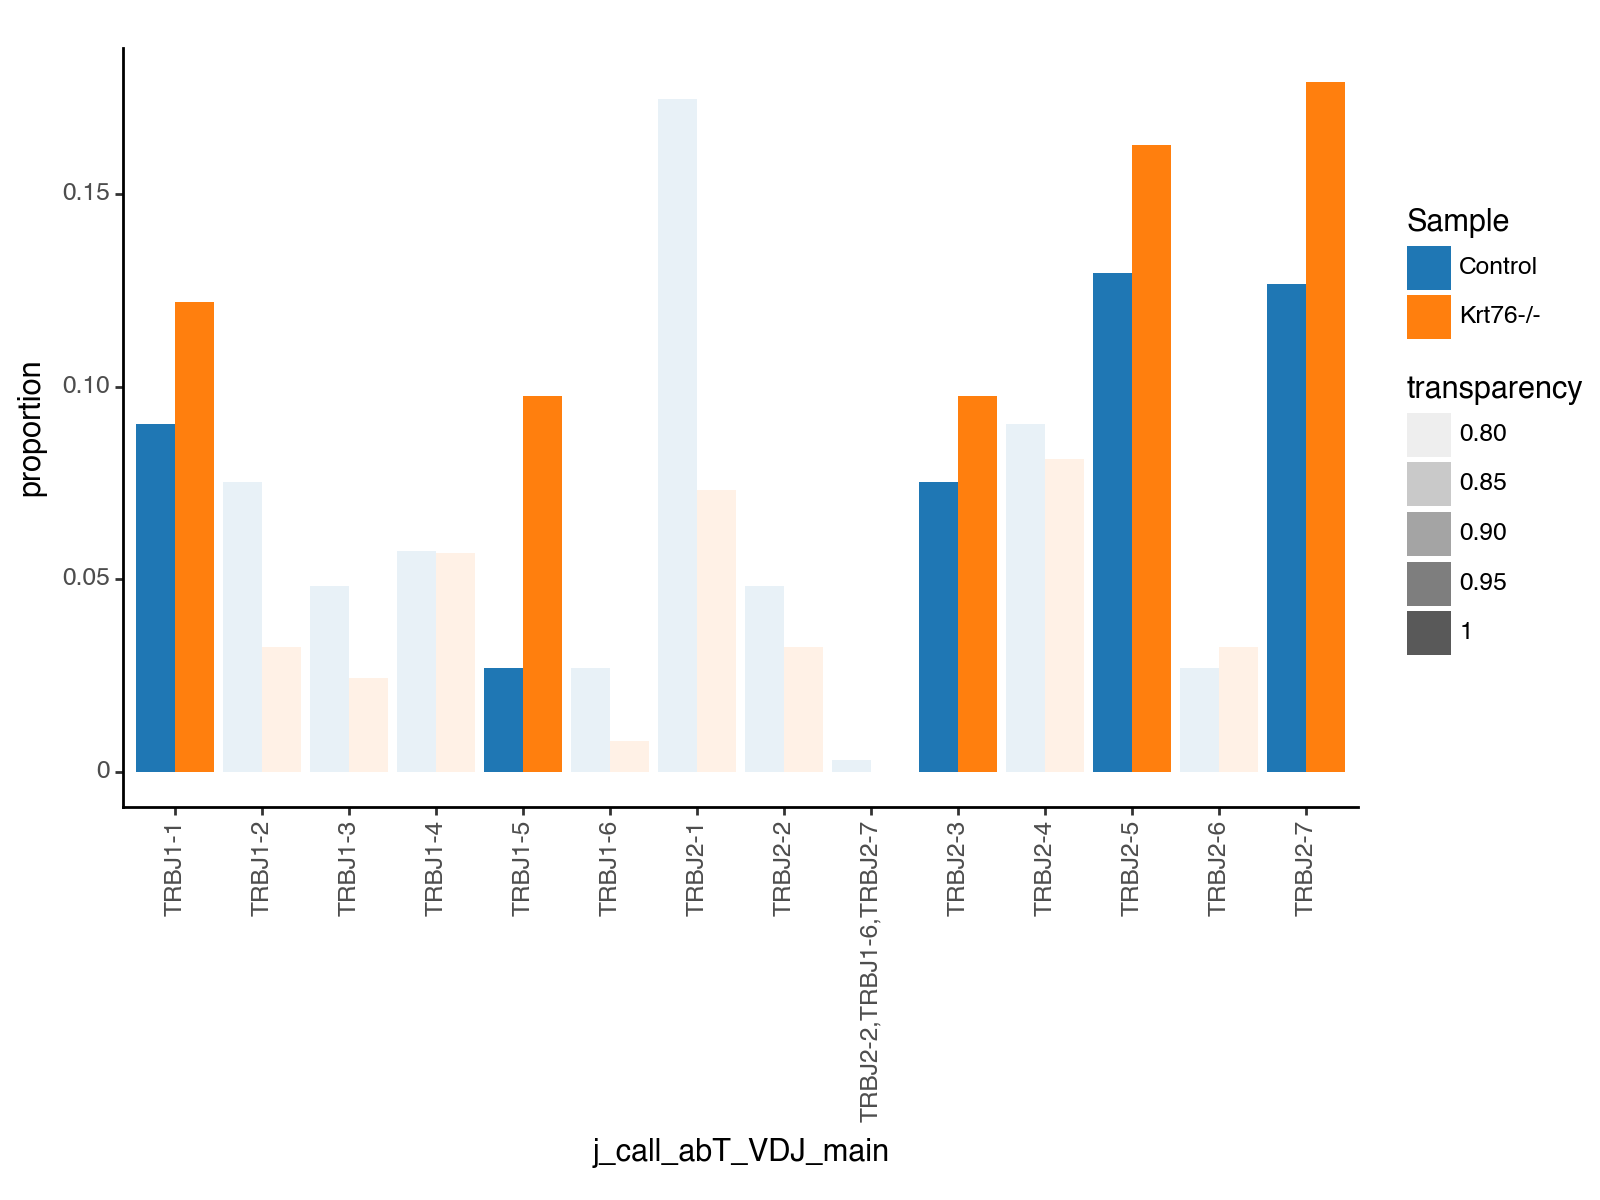

<Figure Size: (800 x 600)>

In [199]:
p

In [200]:
p.save("JgeneBetaChain_DN2b2_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN2b2_181223.pdf


### DN3 - J gene beta chain

In [201]:
adata_NPF_DN3 = adata_NPF[adata_NPF.obs["leiden"] == "10 DN3"]

In [202]:
adata_NPF_DN3

View of AnnData object with n_obs × n_vars = 112 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [203]:
working_df = pd.DataFrame(adata_NPF_DN3.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-1                 16
         TRBJ2-7                 14
         TRBJ1-3                  9
         TRBJ1-1                  6
         TRBJ2-5                  6
         TRBJ1-2                  6
         TRBJ2-3                  5
         TRBJ2-2                  5
         TRBJ1-4                  5
         TRBJ1-5                  4
         TRBJ2-4                  3
         TRBJ1-6                  3
Krt76-/- TRBJ2-5                  7
         TRBJ1-1                  6
         TRBJ2-1                  5
         TRBJ1-3                  2
         TRBJ1-4                  2
         TRBJ2-3                  2
         TRBJ2-4                  2
         TRBJ2-7                  2
         TRBJ1-5                  1
         TRBJ1-6                  1
         TRBJ1-2                  0
         TRBJ2-2                  0

In [204]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1      16
1    Control             TRBJ2-7      14
2    Control             TRBJ1-3       9
3    Control             TRBJ1-1       6
4    Control             TRBJ2-5       6
5    Control             TRBJ1-2       6
6    Control             TRBJ2-3       5
7    Control             TRBJ2-2       5
8    Control             TRBJ1-4       5
9    Control             TRBJ1-5       4
10   Control             TRBJ2-4       3
11   Control             TRBJ1-6       3
12  Krt76-/-             TRBJ2-5       7
13  Krt76-/-             TRBJ1-1       6
14  Krt76-/-             TRBJ2-1       5
15  Krt76-/-             TRBJ1-3       2
16  Krt76-/-             TRBJ1-4       2
17  Krt76-/-             TRBJ2-3       2
18  Krt76-/-             TRBJ2-4       2
19  Krt76-/-             TRBJ2-7       2
20  Krt76-/-             TRBJ1-5       1
21  Krt76-/-             TRBJ1-6       1
22  Krt76-/-             TRBJ1-2       0
23  Krt76-/-             TRBJ2-2       0

In [205]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 82, 'Krt76-/-': 30}

In [206]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [207]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1      16    0.195122
1    Control             TRBJ2-7      14    0.170732
2    Control             TRBJ1-3       9    0.109756
3    Control             TRBJ1-1       6    0.073171
4    Control             TRBJ2-5       6    0.073171
5    Control             TRBJ1-2       6    0.073171
6    Control             TRBJ2-3       5    0.060976
7    Control             TRBJ2-2       5    0.060976
8    Control             TRBJ1-4       5    0.060976
9    Control             TRBJ1-5       4    0.048780
10   Control             TRBJ2-4       3    0.036585
11   Control             TRBJ1-6       3    0.036585
12  Krt76-/-             TRBJ2-5       7    0.233333
13  Krt76-/-             TRBJ1-1       6    0.200000
14  Krt76-/-             TRBJ2-1       5    0.166667
15  Krt76-/-             TRBJ1-3       2    0.066667
16  Krt76-/-             TRBJ1-4       2    0.066667
17  Krt76-/-             TRBJ2-3       2    0.066667
18  Krt76-/-             TRBJ2-4       2    0.066667
19  Krt76-/-             TRBJ2-7       2    0.066667
20  Krt76-/-             TRBJ1-5       1    0.033333
21  Krt76-/-             TRBJ1-6       1    0.033333
22  Krt76-/-             TRBJ1-2       0    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000

In [208]:
working_control = working_df[working_df["Sample"] == "Control"]

In [209]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [211]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [212]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [213]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 2.733333333333334,
 'TRBJ1-2': 0.0,
 'TRBJ1-3': 0.6074074074074074,
 'TRBJ1-4': 1.0933333333333333,
 'TRBJ1-5': 0.6833333333333333,
 'TRBJ1-6': 0.9111111111111112,
 'TRBJ2-1': 0.8541666666666666,
 'TRBJ2-2': 0.0,
 'TRBJ2-3': 1.0933333333333333,
 'TRBJ2-4': 1.8222222222222224,
 'TRBJ2-5': 3.188888888888889,
 'TRBJ2-7': 0.3904761904761904}

In [214]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1      16    0.195122    0.854167
1    Control             TRBJ2-7      14    0.170732    0.390476
2    Control             TRBJ1-3       9    0.109756    0.607407
3    Control             TRBJ1-1       6    0.073171    2.733333
4    Control             TRBJ2-5       6    0.073171    3.188889
5    Control             TRBJ1-2       6    0.073171    0.000000
6    Control             TRBJ2-3       5    0.060976    1.093333
7    Control             TRBJ2-2       5    0.060976    0.000000
8    Control             TRBJ1-4       5    0.060976    1.093333
9    Control             TRBJ1-5       4    0.048780    0.683333
10   Control             TRBJ2-4       3    0.036585    1.822222
11   Control             TRBJ1-6       3    0.036585    0.911111
12  Krt76-/-             TRBJ2-5       7    0.233333    3.188889
13  Krt76-/-             TRBJ1-1       6    0.200000    2.733333
14  Krt76-/-             TRBJ2-1       5    0.166667    0.854167
15  Krt76-/-             TRBJ1-3       2    0.066667    0.607407
16  Krt76-/-             TRBJ1-4       2    0.066667    1.093333
17  Krt76-/-             TRBJ2-3       2    0.066667    1.093333
18  Krt76-/-             TRBJ2-4       2    0.066667    1.822222
19  Krt76-/-             TRBJ2-7       2    0.066667    0.390476
20  Krt76-/-             TRBJ1-5       1    0.033333    0.683333
21  Krt76-/-             TRBJ1-6       1    0.033333    0.911111
22  Krt76-/-             TRBJ1-2       0    0.000000    0.000000
23  Krt76-/-             TRBJ2-2       0    0.000000    0.000000

In [215]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [216]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

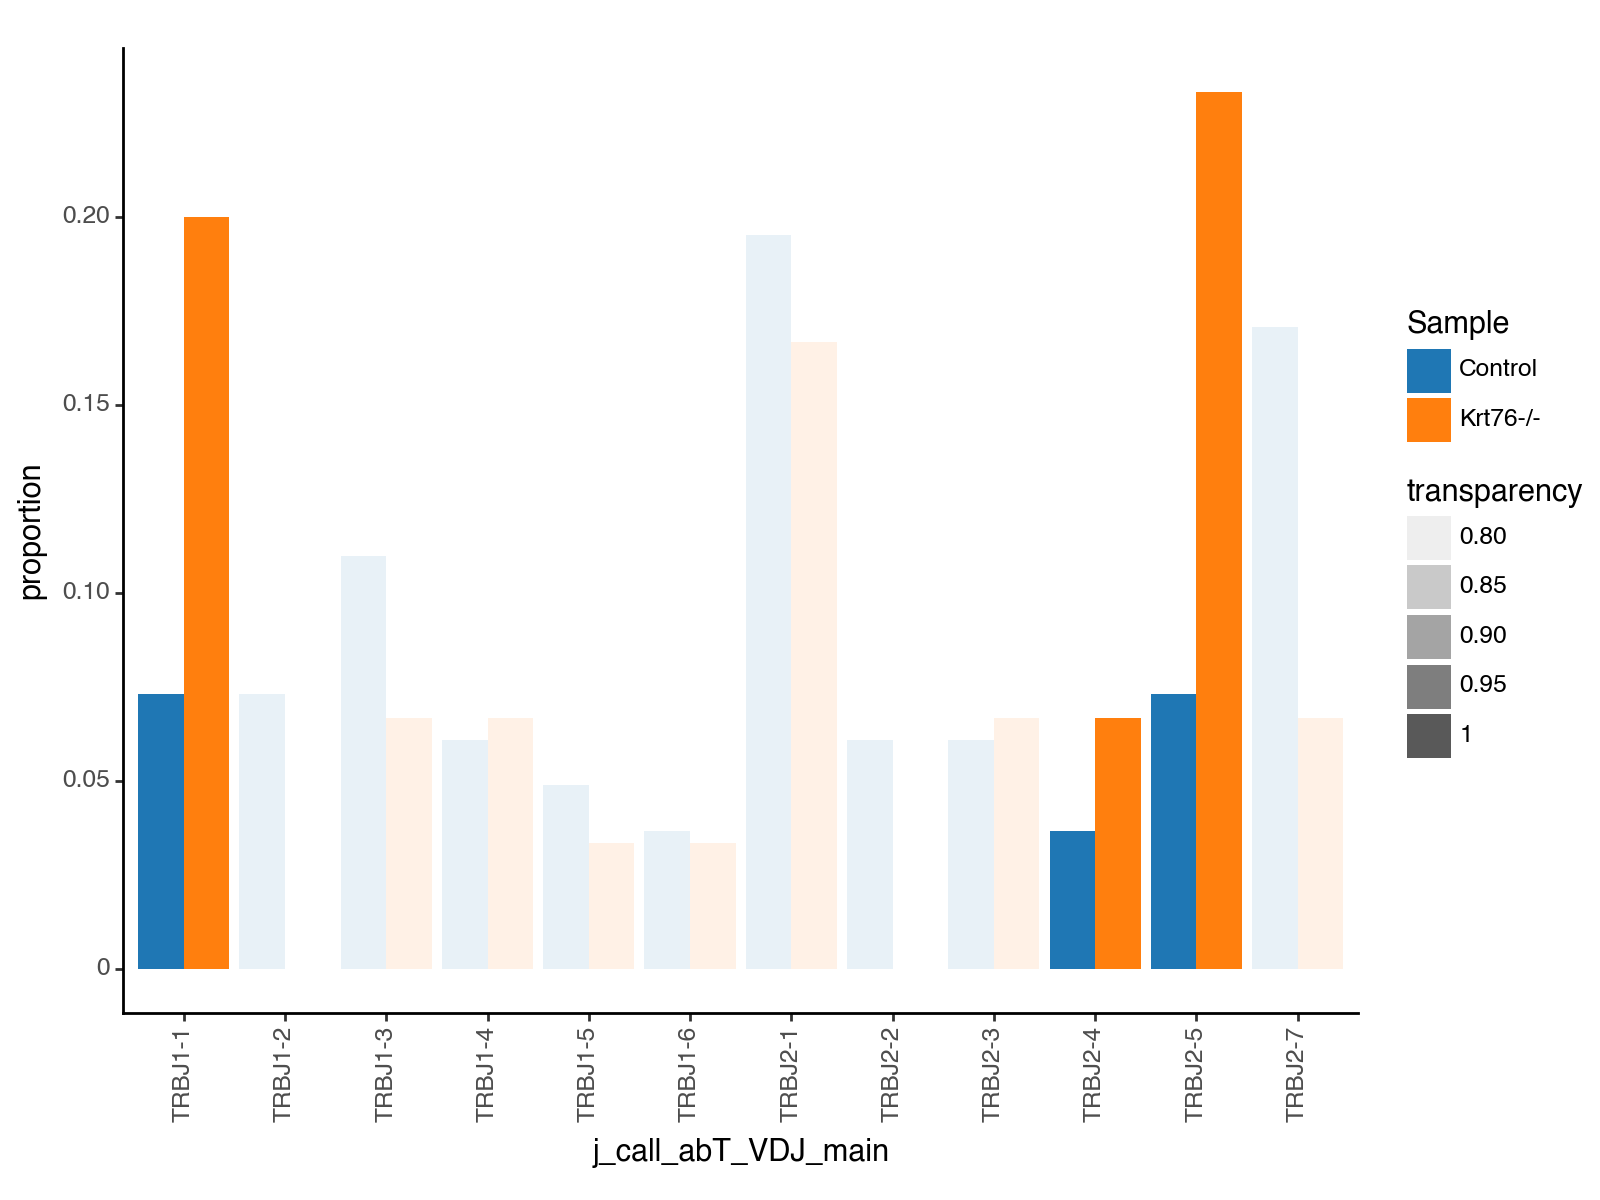

<Figure Size: (800 x 600)>

In [217]:
p

In [218]:
p.save("JgeneBetaChain_DN3_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3_181223.pdf


### 0 DN3a - J gene beta chain

In [727]:
adata_NPF_DN3a = adata_NPF[adata_NPF.obs["leiden"] == "0 DN3a"]

In [728]:
adata_NPF_DN3a

View of AnnData object with n_obs × n_vars = 31 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [729]:
working_df = pd.DataFrame(adata_NPF_DN3a.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ1-4                  3
         TRBJ2-5                  3
         TRBJ2-7                  3
         TRBJ2-1                  2
         TRBJ2-6                  2
         TRBJ1-1                  2
         TRBJ2-4                  1
         TRBJ2-3                  1
         TRBJ1-5                  1
         TRBJ2-2                  0
         TRBJ1-3                  0
         TRBJ1-2                  0
         None                     0
Krt76-/- TRBJ2-5                  3
         TRBJ2-4                  2
         None                     1
         TRBJ1-2                  1
         TRBJ2-3                  1
         TRBJ2-2                  1
         TRBJ1-5                  1
         TRBJ1-4                  1
         TRBJ1-3                  1
         TRBJ2-7                  1
         TRBJ1-1                  0
         TRBJ2-1                  0
         TRBJ2-6                  0

In [730]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ1-4       3
1    Control             TRBJ2-5       3
2    Control             TRBJ2-7       3
3    Control             TRBJ2-1       2
4    Control             TRBJ2-6       2
5    Control             TRBJ1-1       2
6    Control             TRBJ2-4       1
7    Control             TRBJ2-3       1
8    Control             TRBJ1-5       1
9    Control             TRBJ2-2       0
10   Control             TRBJ1-3       0
11   Control             TRBJ1-2       0
12   Control                None       0
13  Krt76-/-             TRBJ2-5       3
14  Krt76-/-             TRBJ2-4       2
15  Krt76-/-                None       1
16  Krt76-/-             TRBJ1-2       1
17  Krt76-/-             TRBJ2-3       1
18  Krt76-/-             TRBJ2-2       1
19  Krt76-/-             TRBJ1-5       1
20  Krt76-/-             TRBJ1-4       1
21  Krt76-/-             TRBJ1-3       1
22  Krt76-/-             TRBJ2-7       1
23  Krt76-/-             TRBJ1-1       0
24  Krt76-/-             TRBJ2-1       0
25  Krt76-/-             TRBJ2-6       0

In [731]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 18, 'Krt76-/-': 13}

In [732]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [733]:
working_df


Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ1-4       3    0.166667
1    Control             TRBJ2-5       3    0.166667
2    Control             TRBJ2-7       3    0.166667
3    Control             TRBJ2-1       2    0.111111
4    Control             TRBJ2-6       2    0.111111
5    Control             TRBJ1-1       2    0.111111
6    Control             TRBJ2-4       1    0.055556
7    Control             TRBJ2-3       1    0.055556
8    Control             TRBJ1-5       1    0.055556
9    Control             TRBJ2-2       0    0.000000
10   Control             TRBJ1-3       0    0.000000
11   Control             TRBJ1-2       0    0.000000
12   Control                None       0    0.000000
13  Krt76-/-             TRBJ2-5       3    0.230769
14  Krt76-/-             TRBJ2-4       2    0.153846
15  Krt76-/-                None       1    0.076923
16  Krt76-/-             TRBJ1-2       1    0.076923
17  Krt76-/-             TRBJ2-3       1    0.076923
18  Krt76-/-             TRBJ2-2       1    0.076923
19  Krt76-/-             TRBJ1-5       1    0.076923
20  Krt76-/-             TRBJ1-4       1    0.076923
21  Krt76-/-             TRBJ1-3       1    0.076923
22  Krt76-/-             TRBJ2-7       1    0.076923
23  Krt76-/-             TRBJ1-1       0    0.000000
24  Krt76-/-             TRBJ2-1       0    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000

In [734]:
working_control = working_df[working_df["Sample"] == "Control"]

In [735]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [736]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [737]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [738]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'None': inf,
 'TRBJ1-1': 0.0,
 'TRBJ1-2': inf,
 'TRBJ1-3': inf,
 'TRBJ1-4': 0.46153846153846156,
 'TRBJ1-5': 1.3846153846153848,
 'TRBJ2-1': 0.0,
 'TRBJ2-2': inf,
 'TRBJ2-3': 1.3846153846153848,
 'TRBJ2-4': 2.7692307692307696,
 'TRBJ2-5': 1.3846153846153848,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 0.46153846153846156}

In [739]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ1-4       3    0.166667    0.461538
1    Control             TRBJ2-5       3    0.166667    1.384615
2    Control             TRBJ2-7       3    0.166667    0.461538
3    Control             TRBJ2-1       2    0.111111    0.000000
4    Control             TRBJ2-6       2    0.111111    0.000000
5    Control             TRBJ1-1       2    0.111111    0.000000
6    Control             TRBJ2-4       1    0.055556    2.769231
7    Control             TRBJ2-3       1    0.055556    1.384615
8    Control             TRBJ1-5       1    0.055556    1.384615
9    Control             TRBJ2-2       0    0.000000         inf
10   Control             TRBJ1-3       0    0.000000         inf
11   Control             TRBJ1-2       0    0.000000         inf
12   Control                None       0    0.000000         inf
13  Krt76-/-             TRBJ2-5       3    0.230769    1.384615
14  Krt76-/-             TRBJ2-4       2    0.153846    2.769231
15  Krt76-/-                None       1    0.076923         inf
16  Krt76-/-             TRBJ1-2       1    0.076923         inf
17  Krt76-/-             TRBJ2-3       1    0.076923    1.384615
18  Krt76-/-             TRBJ2-2       1    0.076923         inf
19  Krt76-/-             TRBJ1-5       1    0.076923    1.384615
20  Krt76-/-             TRBJ1-4       1    0.076923    0.461538
21  Krt76-/-             TRBJ1-3       1    0.076923         inf
22  Krt76-/-             TRBJ2-7       1    0.076923    0.461538
23  Krt76-/-             TRBJ1-1       0    0.000000    0.000000
24  Krt76-/-             TRBJ2-1       0    0.000000    0.000000
25  Krt76-/-             TRBJ2-6       0    0.000000    0.000000

In [740]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [741]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

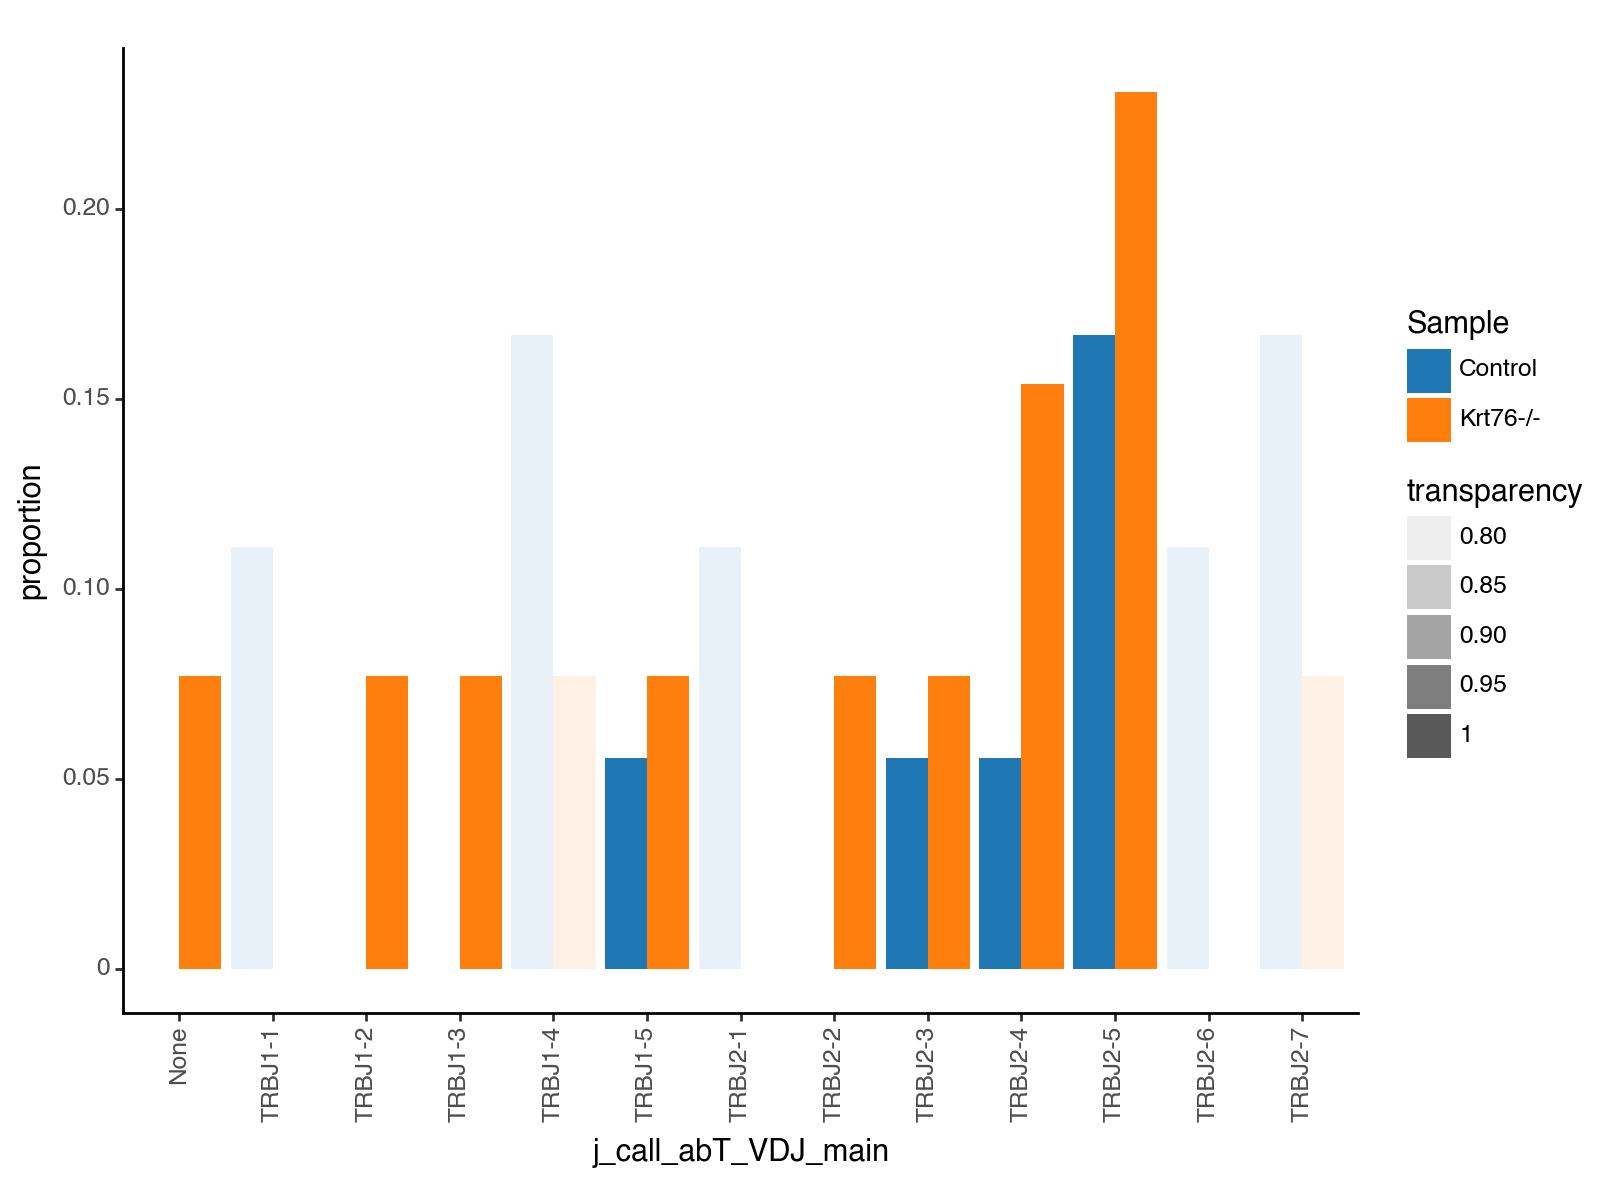

<Figure Size: (800 x 600)>

In [742]:
p

In [743]:
p.save("JgeneBetaChain_DN3a_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3a_181223.pdf


### DN3a / DN3b - J gene beta chain

In [236]:
adata_NPF_DN3aDN3b = adata_NPF[adata_NPF.obs["leiden"] == "1 DN3a / DN3b"]

In [237]:
adata_NPF_DN3aDN3b

View of AnnData object with n_obs × n_vars = 786 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [238]:
working_df = pd.DataFrame(adata_NPF_DN3aDN3b.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-1                 93
         TRBJ2-7                 85
         TRBJ2-6                 78
         TRBJ2-5                 58
         TRBJ1-1                 42
         TRBJ2-3                 38
         TRBJ2-4                 34
         TRBJ1-2                 27
         TRBJ1-4                 23
         TRBJ1-3                 22
         TRBJ1-6                 17
         TRBJ2-2                 13
         TRBJ1-5                  9
Krt76-/- TRBJ2-7                 50
         TRBJ2-1                 46
         TRBJ2-6                 32
         TRBJ2-5                 24
         TRBJ2-4                 21
         TRBJ2-3                 15
         TRBJ1-1                 12
         TRBJ1-4                 10
         TRBJ2-2                  8
         TRBJ1-3                  8
         TRBJ1-2                  8
         TRBJ1-6                  7
         TRBJ1-5                  6

In [239]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1      93
1    Control             TRBJ2-7      85
2    Control             TRBJ2-6      78
3    Control             TRBJ2-5      58
4    Control             TRBJ1-1      42
5    Control             TRBJ2-3      38
6    Control             TRBJ2-4      34
7    Control             TRBJ1-2      27
8    Control             TRBJ1-4      23
9    Control             TRBJ1-3      22
10   Control             TRBJ1-6      17
11   Control             TRBJ2-2      13
12   Control             TRBJ1-5       9
13  Krt76-/-             TRBJ2-7      50
14  Krt76-/-             TRBJ2-1      46
15  Krt76-/-             TRBJ2-6      32
16  Krt76-/-             TRBJ2-5      24
17  Krt76-/-             TRBJ2-4      21
18  Krt76-/-             TRBJ2-3      15
19  Krt76-/-             TRBJ1-1      12
20  Krt76-/-             TRBJ1-4      10
21  Krt76-/-             TRBJ2-2       8
22  Krt76-/-             TRBJ1-3       8
23  Krt76-/-             TRBJ1-2       8
24  Krt76-/-             TRBJ1-6       7
25  Krt76-/-             TRBJ1-5       6

In [240]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 539, 'Krt76-/-': 247}

In [241]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [242]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1      93    0.172542
1    Control             TRBJ2-7      85    0.157699
2    Control             TRBJ2-6      78    0.144712
3    Control             TRBJ2-5      58    0.107607
4    Control             TRBJ1-1      42    0.077922
5    Control             TRBJ2-3      38    0.070501
6    Control             TRBJ2-4      34    0.063080
7    Control             TRBJ1-2      27    0.050093
8    Control             TRBJ1-4      23    0.042672
9    Control             TRBJ1-3      22    0.040816
10   Control             TRBJ1-6      17    0.031540
11   Control             TRBJ2-2      13    0.024119
12   Control             TRBJ1-5       9    0.016698
13  Krt76-/-             TRBJ2-7      50    0.202429
14  Krt76-/-             TRBJ2-1      46    0.186235
15  Krt76-/-             TRBJ2-6      32    0.129555
16  Krt76-/-             TRBJ2-5      24    0.097166
17  Krt76-/-             TRBJ2-4      21    0.085020
18  Krt76-/-             TRBJ2-3      15    0.060729
19  Krt76-/-             TRBJ1-1      12    0.048583
20  Krt76-/-             TRBJ1-4      10    0.040486
21  Krt76-/-             TRBJ2-2       8    0.032389
22  Krt76-/-             TRBJ1-3       8    0.032389
23  Krt76-/-             TRBJ1-2       8    0.032389
24  Krt76-/-             TRBJ1-6       7    0.028340
25  Krt76-/-             TRBJ1-5       6    0.024291

In [243]:
working_control = working_df[working_df["Sample"] == "Control"]

In [244]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [245]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [246]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [247]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.6234817813765182,
 'TRBJ1-2': 0.6465736992052782,
 'TRBJ1-3': 0.7935222672064778,
 'TRBJ1-4': 0.9487766238338321,
 'TRBJ1-5': 1.4547908232118758,
 'TRBJ1-6': 0.8985472731602763,
 'TRBJ2-1': 1.0793609333507466,
 'TRBJ2-2': 1.3428838368109624,
 'TRBJ2-3': 0.8613893032175581,
 'TRBJ2-4': 1.3478209097404144,
 'TRBJ2-5': 0.9029736144073712,
 'TRBJ2-6': 0.8952558912073082,
 'TRBJ2-7': 1.2836389616575374}

In [248]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1      93    0.172542    1.079361
1    Control             TRBJ2-7      85    0.157699    1.283639
2    Control             TRBJ2-6      78    0.144712    0.895256
3    Control             TRBJ2-5      58    0.107607    0.902974
4    Control             TRBJ1-1      42    0.077922    0.623482
5    Control             TRBJ2-3      38    0.070501    0.861389
6    Control             TRBJ2-4      34    0.063080    1.347821
7    Control             TRBJ1-2      27    0.050093    0.646574
8    Control             TRBJ1-4      23    0.042672    0.948777
9    Control             TRBJ1-3      22    0.040816    0.793522
10   Control             TRBJ1-6      17    0.031540    0.898547
11   Control             TRBJ2-2      13    0.024119    1.342884
12   Control             TRBJ1-5       9    0.016698    1.454791
13  Krt76-/-             TRBJ2-7      50    0.202429    1.283639
14  Krt76-/-             TRBJ2-1      46    0.186235    1.079361
15  Krt76-/-             TRBJ2-6      32    0.129555    0.895256
16  Krt76-/-             TRBJ2-5      24    0.097166    0.902974
17  Krt76-/-             TRBJ2-4      21    0.085020    1.347821
18  Krt76-/-             TRBJ2-3      15    0.060729    0.861389
19  Krt76-/-             TRBJ1-1      12    0.048583    0.623482
20  Krt76-/-             TRBJ1-4      10    0.040486    0.948777
21  Krt76-/-             TRBJ2-2       8    0.032389    1.342884
22  Krt76-/-             TRBJ1-3       8    0.032389    0.793522
23  Krt76-/-             TRBJ1-2       8    0.032389    0.646574
24  Krt76-/-             TRBJ1-6       7    0.028340    0.898547
25  Krt76-/-             TRBJ1-5       6    0.024291    1.454791

In [249]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [250]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

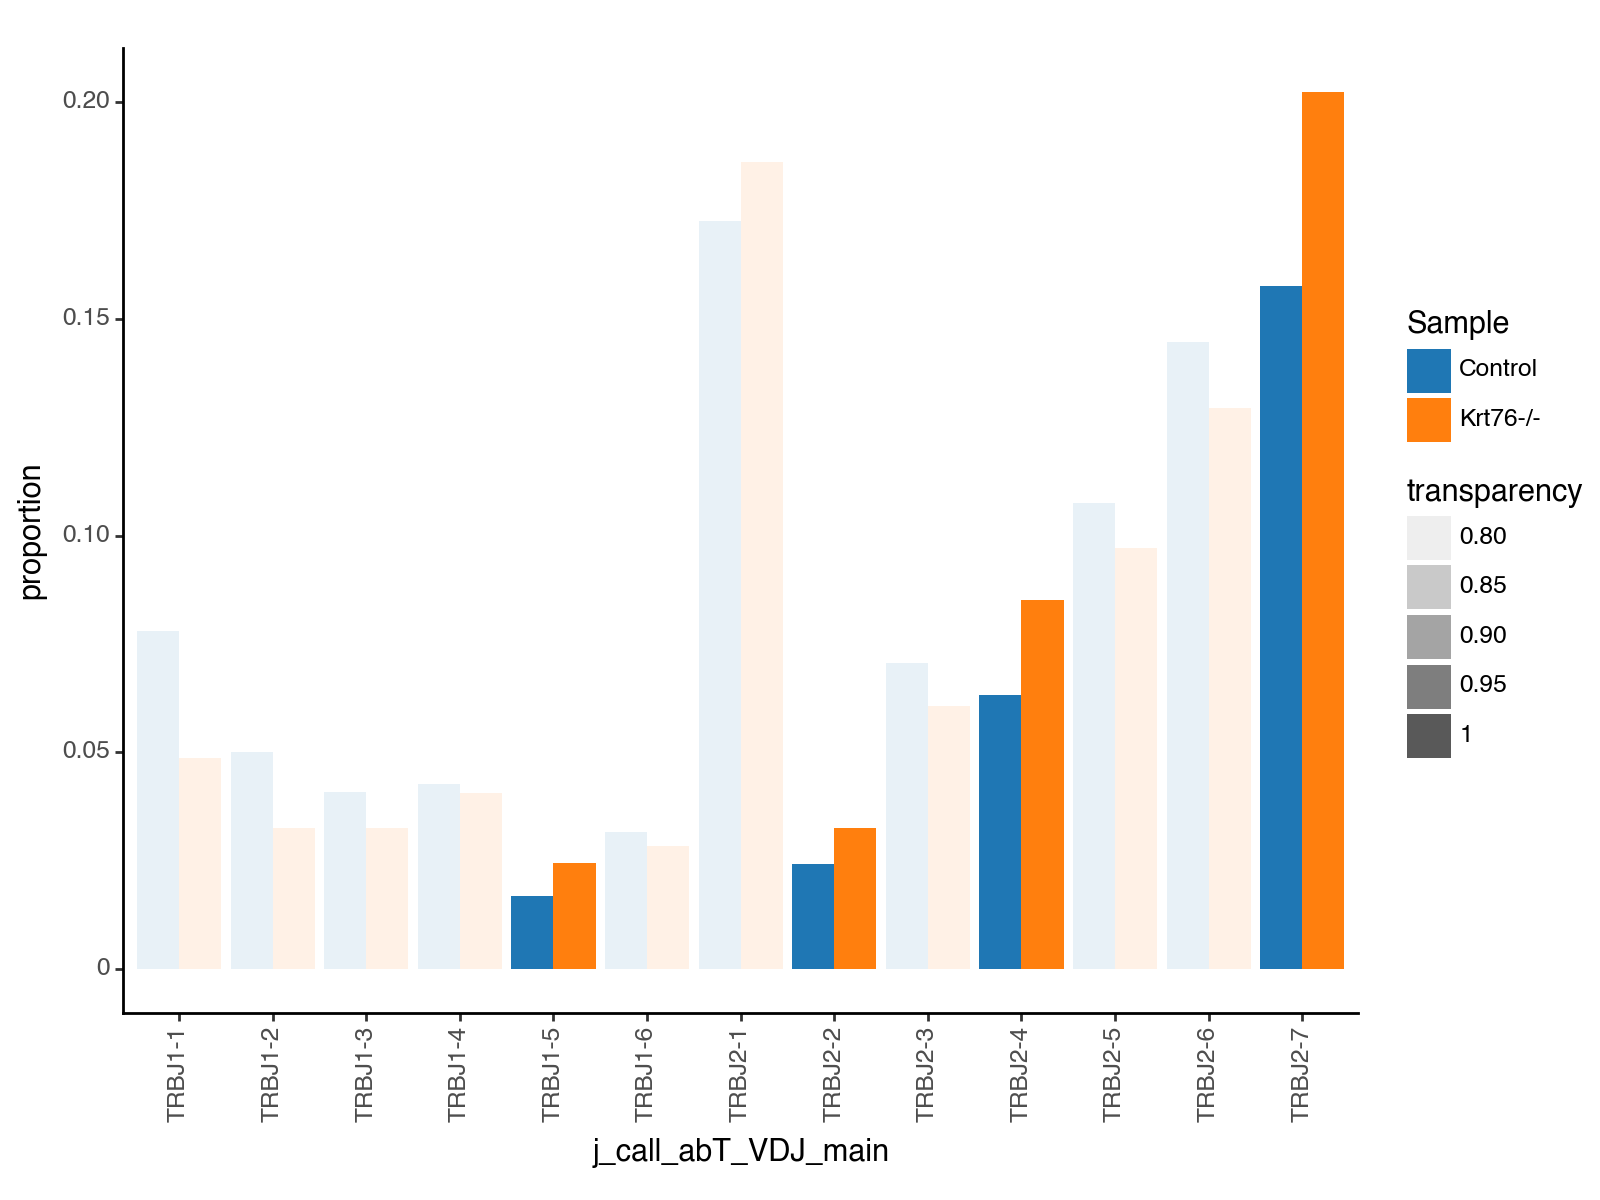

<Figure Size: (800 x 600)>

In [251]:
p

In [252]:
p.save("JgeneBetaChain_DN3aDN3b_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3aDN3b_181223.pdf


### DN3b - J gene beta chain

In [253]:
adata_NPF_DN3b = adata_NPF[adata_NPF.obs["leiden"] == "6 DN3b"]

In [254]:
adata_NPF_DN3b

View of AnnData object with n_obs × n_vars = 564 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [255]:
working_df = pd.DataFrame(adata_NPF_DN3b.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-1                 60
         TRBJ2-7                 48
         TRBJ2-5                 46
         TRBJ2-3                 36
         TRBJ1-1                 32
         TRBJ2-4                 25
         TRBJ1-3                 22
         TRBJ1-2                 21
         TRBJ2-2                 20
         TRBJ1-5                 15
         TRBJ1-4                 13
         TRBJ1-6                 13
         TRBJ2-6                  7
Krt76-/- TRBJ2-7                 28
         TRBJ1-4                 24
         TRBJ1-1                 21
         TRBJ2-1                 20
         TRBJ2-5                 20
         TRBJ2-3                 16
         TRBJ1-5                 15
         TRBJ1-2                 14
         TRBJ1-3                 13
         TRBJ1-6                 12
         TRBJ2-4                 10
         TRBJ2-2                  8
         TRBJ2-6                  5

In [256]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1      60
1    Control             TRBJ2-7      48
2    Control             TRBJ2-5      46
3    Control             TRBJ2-3      36
4    Control             TRBJ1-1      32
5    Control             TRBJ2-4      25
6    Control             TRBJ1-3      22
7    Control             TRBJ1-2      21
8    Control             TRBJ2-2      20
9    Control             TRBJ1-5      15
10   Control             TRBJ1-4      13
11   Control             TRBJ1-6      13
12   Control             TRBJ2-6       7
13  Krt76-/-             TRBJ2-7      28
14  Krt76-/-             TRBJ1-4      24
15  Krt76-/-             TRBJ1-1      21
16  Krt76-/-             TRBJ2-1      20
17  Krt76-/-             TRBJ2-5      20
18  Krt76-/-             TRBJ2-3      16
19  Krt76-/-             TRBJ1-5      15
20  Krt76-/-             TRBJ1-2      14
21  Krt76-/-             TRBJ1-3      13
22  Krt76-/-             TRBJ1-6      12
23  Krt76-/-             TRBJ2-4      10
24  Krt76-/-             TRBJ2-2       8
25  Krt76-/-             TRBJ2-6       5

In [257]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 358, 'Krt76-/-': 206}

In [258]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [259]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1      60    0.167598
1    Control             TRBJ2-7      48    0.134078
2    Control             TRBJ2-5      46    0.128492
3    Control             TRBJ2-3      36    0.100559
4    Control             TRBJ1-1      32    0.089385
5    Control             TRBJ2-4      25    0.069832
6    Control             TRBJ1-3      22    0.061453
7    Control             TRBJ1-2      21    0.058659
8    Control             TRBJ2-2      20    0.055866
9    Control             TRBJ1-5      15    0.041899
10   Control             TRBJ1-4      13    0.036313
11   Control             TRBJ1-6      13    0.036313
12   Control             TRBJ2-6       7    0.019553
13  Krt76-/-             TRBJ2-7      28    0.135922
14  Krt76-/-             TRBJ1-4      24    0.116505
15  Krt76-/-             TRBJ1-1      21    0.101942
16  Krt76-/-             TRBJ2-1      20    0.097087
17  Krt76-/-             TRBJ2-5      20    0.097087
18  Krt76-/-             TRBJ2-3      16    0.077670
19  Krt76-/-             TRBJ1-5      15    0.072816
20  Krt76-/-             TRBJ1-2      14    0.067961
21  Krt76-/-             TRBJ1-3      13    0.063107
22  Krt76-/-             TRBJ1-6      12    0.058252
23  Krt76-/-             TRBJ2-4      10    0.048544
24  Krt76-/-             TRBJ2-2       8    0.038835
25  Krt76-/-             TRBJ2-6       5    0.024272

In [260]:
working_control = working_df[working_df["Sample"] == "Control"]

In [261]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [262]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [263]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [264]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.1404733009708736,
 'TRBJ1-2': 1.1585760517799353,
 'TRBJ1-3': 1.0269196822594882,
 'TRBJ1-4': 3.2083644510828977,
 'TRBJ1-5': 1.7378640776699028,
 'TRBJ1-6': 1.6041822255414488,
 'TRBJ2-1': 0.5792880258899676,
 'TRBJ2-2': 0.6951456310679611,
 'TRBJ2-3': 0.7723840345199567,
 'TRBJ2-4': 0.6951456310679612,
 'TRBJ2-5': 0.7555930772477838,
 'TRBJ2-6': 1.2413314840499305,
 'TRBJ2-7': 1.0137540453074434}

In [265]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1      60    0.167598    0.579288
1    Control             TRBJ2-7      48    0.134078    1.013754
2    Control             TRBJ2-5      46    0.128492    0.755593
3    Control             TRBJ2-3      36    0.100559    0.772384
4    Control             TRBJ1-1      32    0.089385    1.140473
5    Control             TRBJ2-4      25    0.069832    0.695146
6    Control             TRBJ1-3      22    0.061453    1.026920
7    Control             TRBJ1-2      21    0.058659    1.158576
8    Control             TRBJ2-2      20    0.055866    0.695146
9    Control             TRBJ1-5      15    0.041899    1.737864
10   Control             TRBJ1-4      13    0.036313    3.208364
11   Control             TRBJ1-6      13    0.036313    1.604182
12   Control             TRBJ2-6       7    0.019553    1.241331
13  Krt76-/-             TRBJ2-7      28    0.135922    1.013754
14  Krt76-/-             TRBJ1-4      24    0.116505    3.208364
15  Krt76-/-             TRBJ1-1      21    0.101942    1.140473
16  Krt76-/-             TRBJ2-1      20    0.097087    0.579288
17  Krt76-/-             TRBJ2-5      20    0.097087    0.755593
18  Krt76-/-             TRBJ2-3      16    0.077670    0.772384
19  Krt76-/-             TRBJ1-5      15    0.072816    1.737864
20  Krt76-/-             TRBJ1-2      14    0.067961    1.158576
21  Krt76-/-             TRBJ1-3      13    0.063107    1.026920
22  Krt76-/-             TRBJ1-6      12    0.058252    1.604182
23  Krt76-/-             TRBJ2-4      10    0.048544    0.695146
24  Krt76-/-             TRBJ2-2       8    0.038835    0.695146
25  Krt76-/-             TRBJ2-6       5    0.024272    1.241331

In [266]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [267]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

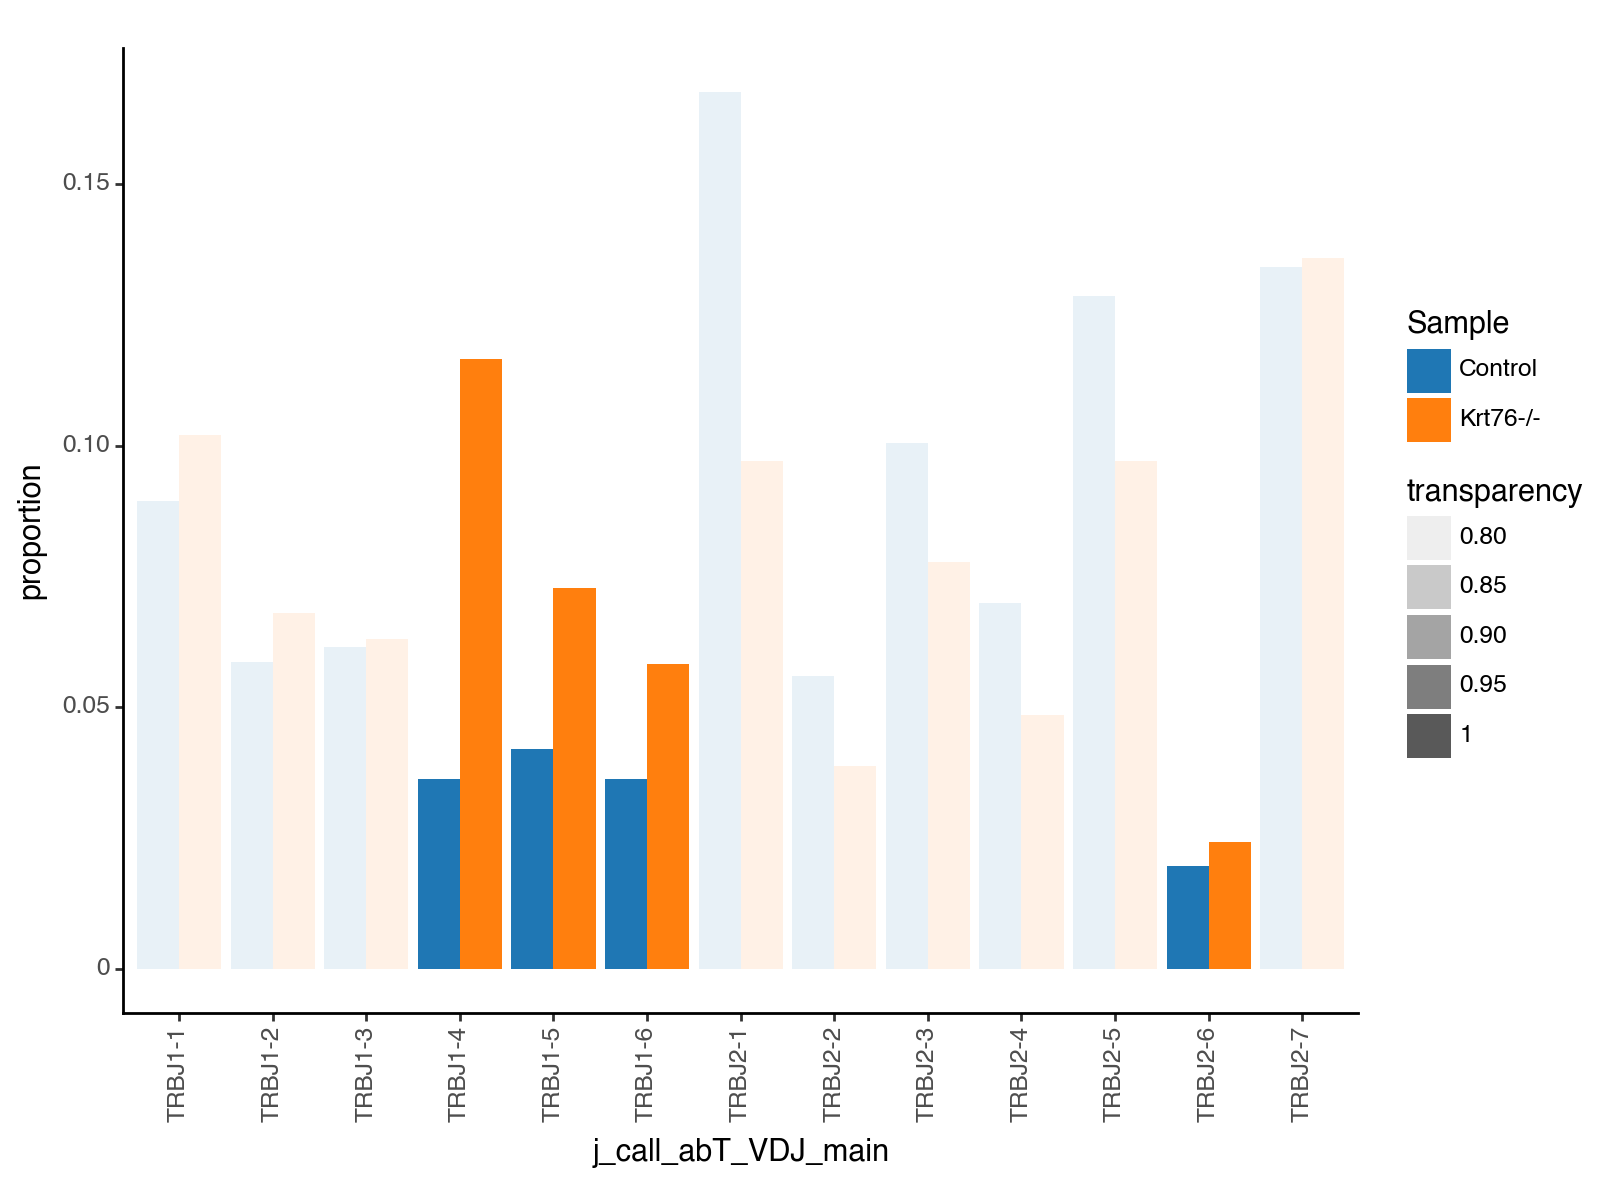

<Figure Size: (800 x 600)>

In [268]:
p

In [269]:
p.save("JgeneBetaChain_DN3b_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN3b_181223.pdf


### DN4 - J gene beta chain

In [795]:
adata_NPF_DN4 = adata_NPF[adata_NPF.obs["leiden"] == "2 DN4"]

In [796]:
adata_NPF_DN4

View of AnnData object with n_obs × n_vars = 373 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [797]:
working_df = pd.DataFrame(adata_NPF_DN4.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ1-1                 26
         TRBJ2-5                 23
         TRBJ2-7                 21
         TRBJ2-3                 19
         TRBJ2-1                 17
         TRBJ2-4                 13
         TRBJ1-4                 13
         TRBJ2-2                 12
         TRBJ1-2                 12
         TRBJ1-5                 10
         TRBJ1-3                  6
         TRBJ2-6                  5
         TRBJ1-6                  5
         None                     2
         TRBJ2-3,TRBJ2-4          1
Krt76-/- TRBJ2-7                 39
         TRBJ2-5                 20
         TRBJ1-2                 19
         TRBJ1-4                 17
         TRBJ2-4                 16
         TRBJ2-3                 16
         TRBJ1-1                 15
         TRBJ2-1                 13
         TRBJ2-2                  9
         TRBJ1-3                  7
         TRBJ1-6                  7
         TRBJ1-5                  5
         None                     4
         TRBJ2-6                  1
         TRBJ2-3,TRBJ2-4          0

In [798]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ1-1      26
1    Control             TRBJ2-5      23
2    Control             TRBJ2-7      21
3    Control             TRBJ2-3      19
4    Control             TRBJ2-1      17
5    Control             TRBJ2-4      13
6    Control             TRBJ1-4      13
7    Control             TRBJ2-2      12
8    Control             TRBJ1-2      12
9    Control             TRBJ1-5      10
10   Control             TRBJ1-3       6
11   Control             TRBJ2-6       5
12   Control             TRBJ1-6       5
13   Control                None       2
14   Control     TRBJ2-3,TRBJ2-4       1
15  Krt76-/-             TRBJ2-7      39
16  Krt76-/-             TRBJ2-5      20
17  Krt76-/-             TRBJ1-2      19
18  Krt76-/-             TRBJ1-4      17
19  Krt76-/-             TRBJ2-4      16
20  Krt76-/-             TRBJ2-3      16
21  Krt76-/-             TRBJ1-1      15
22  Krt76-/-             TRBJ2-1      13
23  Krt76-/-             TRBJ2-2       9
24  Krt76-/-             TRBJ1-3       7
25  Krt76-/-             TRBJ1-6       7
26  Krt76-/-             TRBJ1-5       5
27  Krt76-/-                None       4
28  Krt76-/-             TRBJ2-6       1
29  Krt76-/-     TRBJ2-3,TRBJ2-4       0

In [799]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 185, 'Krt76-/-': 188}

In [800]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [801]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ1-1      26    0.140541
1    Control             TRBJ2-5      23    0.124324
2    Control             TRBJ2-7      21    0.113514
3    Control             TRBJ2-3      19    0.102703
4    Control             TRBJ2-1      17    0.091892
5    Control             TRBJ2-4      13    0.070270
6    Control             TRBJ1-4      13    0.070270
7    Control             TRBJ2-2      12    0.064865
8    Control             TRBJ1-2      12    0.064865
9    Control             TRBJ1-5      10    0.054054
10   Control             TRBJ1-3       6    0.032432
11   Control             TRBJ2-6       5    0.027027
12   Control             TRBJ1-6       5    0.027027
13   Control                None       2    0.010811
14   Control     TRBJ2-3,TRBJ2-4       1    0.005405
15  Krt76-/-             TRBJ2-7      39    0.207447
16  Krt76-/-             TRBJ2-5      20    0.106383
17  Krt76-/-             TRBJ1-2      19    0.101064
18  Krt76-/-             TRBJ1-4      17    0.090426
19  Krt76-/-             TRBJ2-4      16    0.085106
20  Krt76-/-             TRBJ2-3      16    0.085106
21  Krt76-/-             TRBJ1-1      15    0.079787
22  Krt76-/-             TRBJ2-1      13    0.069149
23  Krt76-/-             TRBJ2-2       9    0.047872
24  Krt76-/-             TRBJ1-3       7    0.037234
25  Krt76-/-             TRBJ1-6       7    0.037234
26  Krt76-/-             TRBJ1-5       5    0.026596
27  Krt76-/-                None       4    0.021277
28  Krt76-/-             TRBJ2-6       1    0.005319
29  Krt76-/-     TRBJ2-3,TRBJ2-4       0    0.000000

In [802]:
working_control = working_df[working_df["Sample"] == "Control"]

In [803]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [804]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [805]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [806]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'None': 1.9680851063829785,
 'TRBJ1-1': 0.5677168576104746,
 'TRBJ1-2': 1.5580673758865247,
 'TRBJ1-3': 1.1480496453900708,
 'TRBJ1-4': 1.2868248772504092,
 'TRBJ1-5': 0.4920212765957447,
 'TRBJ1-6': 1.377659574468085,
 'TRBJ2-1': 0.7525031289111389,
 'TRBJ2-2': 0.738031914893617,
 'TRBJ2-3': 0.8286674132138857,
 'TRBJ2-3,TRBJ2-4': 0.0,
 'TRBJ2-4': 1.2111292962356792,
 'TRBJ2-5': 0.8556891766882516,
 'TRBJ2-6': 0.19680851063829785,
 'TRBJ2-7': 1.8275075987841944}

In [807]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ1-1      26    0.140541    0.567717
1    Control             TRBJ2-5      23    0.124324    0.855689
2    Control             TRBJ2-7      21    0.113514    1.827508
3    Control             TRBJ2-3      19    0.102703    0.828667
4    Control             TRBJ2-1      17    0.091892    0.752503
5    Control             TRBJ2-4      13    0.070270    1.211129
6    Control             TRBJ1-4      13    0.070270    1.286825
7    Control             TRBJ2-2      12    0.064865    0.738032
8    Control             TRBJ1-2      12    0.064865    1.558067
9    Control             TRBJ1-5      10    0.054054    0.492021
10   Control             TRBJ1-3       6    0.032432    1.148050
11   Control             TRBJ2-6       5    0.027027    0.196809
12   Control             TRBJ1-6       5    0.027027    1.377660
13   Control                None       2    0.010811    1.968085
14   Control     TRBJ2-3,TRBJ2-4       1    0.005405    0.000000
15  Krt76-/-             TRBJ2-7      39    0.207447    1.827508
16  Krt76-/-             TRBJ2-5      20    0.106383    0.855689
17  Krt76-/-             TRBJ1-2      19    0.101064    1.558067
18  Krt76-/-             TRBJ1-4      17    0.090426    1.286825
19  Krt76-/-             TRBJ2-4      16    0.085106    1.211129
20  Krt76-/-             TRBJ2-3      16    0.085106    0.828667
21  Krt76-/-             TRBJ1-1      15    0.079787    0.567717
22  Krt76-/-             TRBJ2-1      13    0.069149    0.752503
23  Krt76-/-             TRBJ2-2       9    0.047872    0.738032
24  Krt76-/-             TRBJ1-3       7    0.037234    1.148050
25  Krt76-/-             TRBJ1-6       7    0.037234    1.377660
26  Krt76-/-             TRBJ1-5       5    0.026596    0.492021
27  Krt76-/-                None       4    0.021277    1.968085
28  Krt76-/-             TRBJ2-6       1    0.005319    0.196809
29  Krt76-/-     TRBJ2-3,TRBJ2-4       0    0.000000    0.000000

In [808]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [809]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

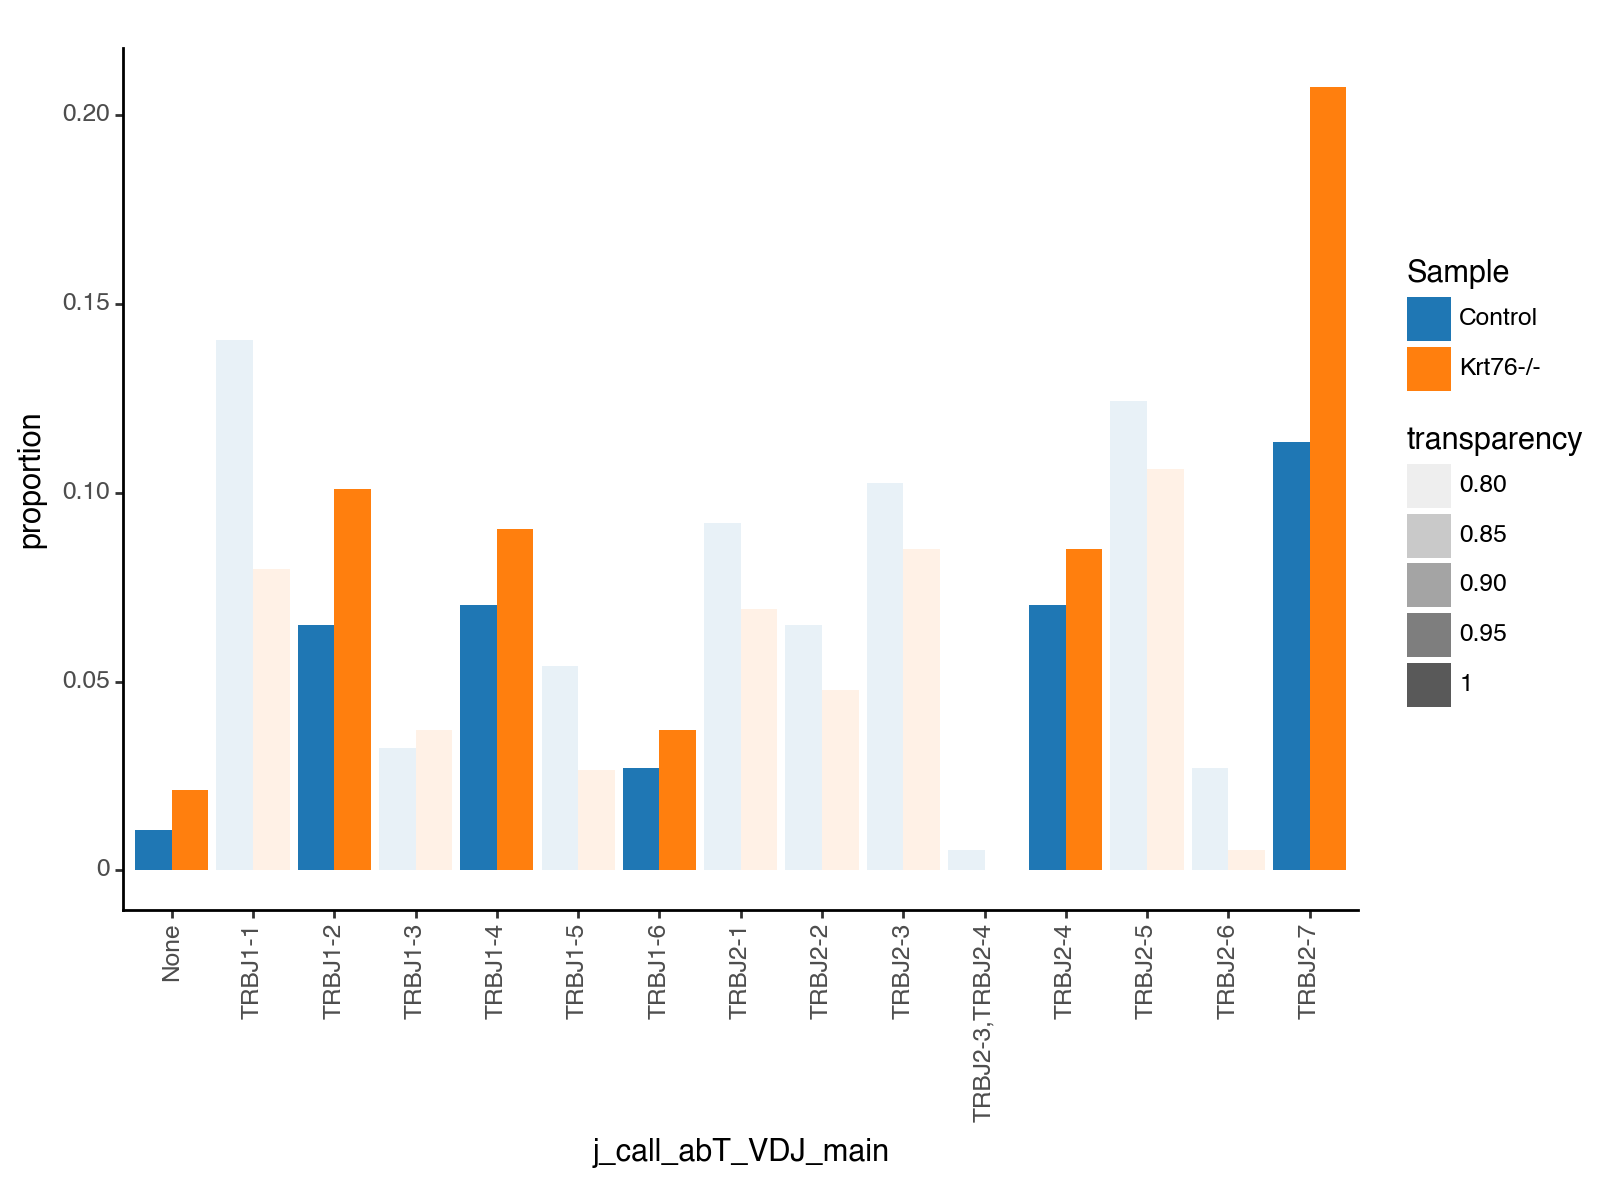

<Figure Size: (800 x 600)>

In [810]:
p

In [811]:
p.save("JgeneBetaChain_DN4_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DN4_181223.pdf


### DP 1 - J gene beta chain

In [288]:
adata_NPF_DP1 = adata_NPF[adata_NPF.obs["leiden"] == "3 DP 1"]

In [289]:
adata_NPF_DP1

View of AnnData object with n_obs × n_vars = 2106 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [290]:
working_df = pd.DataFrame(adata_NPF_DP1.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-7                154
         TRBJ2-5                153
         TRBJ1-1                139
         TRBJ2-1                132
         TRBJ2-3                112
         TRBJ1-2                101
         TRBJ2-4                 99
         TRBJ1-4                 96
         TRBJ1-3                 93
         TRBJ2-2                 76
         TRBJ1-6                 66
         TRBJ1-5                 62
         TRBJ2-6                 20
         TRBJ2-4,TRBJ2-5          1
Krt76-/- TRBJ2-7                122
         TRBJ2-5                108
         TRBJ2-1                 92
         TRBJ1-1                 85
         TRBJ2-4                 74
         TRBJ2-3                 62
         TRBJ1-4                 53
         TRBJ1-2                 52
         TRBJ1-5                 43
         TRBJ1-3                 39
         TRBJ1-6                 33
         TRBJ2-2                 28
         TRBJ2-6                 11
         TRBJ2-4,TRBJ2-5          0

In [291]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7     154
1    Control             TRBJ2-5     153
2    Control             TRBJ1-1     139
3    Control             TRBJ2-1     132
4    Control             TRBJ2-3     112
5    Control             TRBJ1-2     101
6    Control             TRBJ2-4      99
7    Control             TRBJ1-4      96
8    Control             TRBJ1-3      93
9    Control             TRBJ2-2      76
10   Control             TRBJ1-6      66
11   Control             TRBJ1-5      62
12   Control             TRBJ2-6      20
13   Control     TRBJ2-4,TRBJ2-5       1
14  Krt76-/-             TRBJ2-7     122
15  Krt76-/-             TRBJ2-5     108
16  Krt76-/-             TRBJ2-1      92
17  Krt76-/-             TRBJ1-1      85
18  Krt76-/-             TRBJ2-4      74
19  Krt76-/-             TRBJ2-3      62
20  Krt76-/-             TRBJ1-4      53
21  Krt76-/-             TRBJ1-2      52
22  Krt76-/-             TRBJ1-5      43
23  Krt76-/-             TRBJ1-3      39
24  Krt76-/-             TRBJ1-6      33
25  Krt76-/-             TRBJ2-2      28
26  Krt76-/-             TRBJ2-6      11
27  Krt76-/-     TRBJ2-4,TRBJ2-5       0

In [292]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 1304, 'Krt76-/-': 802}

In [293]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [294]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7     154    0.118098
1    Control             TRBJ2-5     153    0.117331
2    Control             TRBJ1-1     139    0.106595
3    Control             TRBJ2-1     132    0.101227
4    Control             TRBJ2-3     112    0.085890
5    Control             TRBJ1-2     101    0.077454
6    Control             TRBJ2-4      99    0.075920
7    Control             TRBJ1-4      96    0.073620
8    Control             TRBJ1-3      93    0.071319
9    Control             TRBJ2-2      76    0.058282
10   Control             TRBJ1-6      66    0.050613
11   Control             TRBJ1-5      62    0.047546
12   Control             TRBJ2-6      20    0.015337
13   Control     TRBJ2-4,TRBJ2-5       1    0.000767
14  Krt76-/-             TRBJ2-7     122    0.152120
15  Krt76-/-             TRBJ2-5     108    0.134663
16  Krt76-/-             TRBJ2-1      92    0.114713
17  Krt76-/-             TRBJ1-1      85    0.105985
18  Krt76-/-             TRBJ2-4      74    0.092269
19  Krt76-/-             TRBJ2-3      62    0.077307
20  Krt76-/-             TRBJ1-4      53    0.066085
21  Krt76-/-             TRBJ1-2      52    0.064838
22  Krt76-/-             TRBJ1-5      43    0.053616
23  Krt76-/-             TRBJ1-3      39    0.048628
24  Krt76-/-             TRBJ1-6      33    0.041147
25  Krt76-/-             TRBJ2-2      28    0.034913
26  Krt76-/-             TRBJ2-6      11    0.013716
27  Krt76-/-     TRBJ2-4,TRBJ2-5       0    0.000000

In [295]:
working_control = working_df[working_df["Sample"] == "Control"]

In [296]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [297]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [298]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [299]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 0.994276897683848,
 'TRBJ1-2': 0.8371151329596801,
 'TRBJ1-3': 0.6818437776526425,
 'TRBJ1-4': 0.8976517040731504,
 'TRBJ1-5': 1.127664709194755,
 'TRBJ1-6': 0.8129675810473815,
 'TRBJ2-1': 1.1332275372175622,
 'TRBJ2-2': 0.5990287439296496,
 'TRBJ2-3': 0.9000712504453152,
 'TRBJ2-4': 1.2153454746970955,
 'TRBJ2-4,TRBJ2-5': 0.0,
 'TRBJ2-5': 1.1477189379492445,
 'TRBJ2-6': 0.8942643391521197,
 'TRBJ2-7': 1.288078505036111}

In [300]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7     154    0.118098    1.288079
1    Control             TRBJ2-5     153    0.117331    1.147719
2    Control             TRBJ1-1     139    0.106595    0.994277
3    Control             TRBJ2-1     132    0.101227    1.133228
4    Control             TRBJ2-3     112    0.085890    0.900071
5    Control             TRBJ1-2     101    0.077454    0.837115
6    Control             TRBJ2-4      99    0.075920    1.215345
7    Control             TRBJ1-4      96    0.073620    0.897652
8    Control             TRBJ1-3      93    0.071319    0.681844
9    Control             TRBJ2-2      76    0.058282    0.599029
10   Control             TRBJ1-6      66    0.050613    0.812968
11   Control             TRBJ1-5      62    0.047546    1.127665
12   Control             TRBJ2-6      20    0.015337    0.894264
13   Control     TRBJ2-4,TRBJ2-5       1    0.000767    0.000000
14  Krt76-/-             TRBJ2-7     122    0.152120    1.288079
15  Krt76-/-             TRBJ2-5     108    0.134663    1.147719
16  Krt76-/-             TRBJ2-1      92    0.114713    1.133228
17  Krt76-/-             TRBJ1-1      85    0.105985    0.994277
18  Krt76-/-             TRBJ2-4      74    0.092269    1.215345
19  Krt76-/-             TRBJ2-3      62    0.077307    0.900071
20  Krt76-/-             TRBJ1-4      53    0.066085    0.897652
21  Krt76-/-             TRBJ1-2      52    0.064838    0.837115
22  Krt76-/-             TRBJ1-5      43    0.053616    1.127665
23  Krt76-/-             TRBJ1-3      39    0.048628    0.681844
24  Krt76-/-             TRBJ1-6      33    0.041147    0.812968
25  Krt76-/-             TRBJ2-2      28    0.034913    0.599029
26  Krt76-/-             TRBJ2-6      11    0.013716    0.894264
27  Krt76-/-     TRBJ2-4,TRBJ2-5       0    0.000000    0.000000

In [301]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [302]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

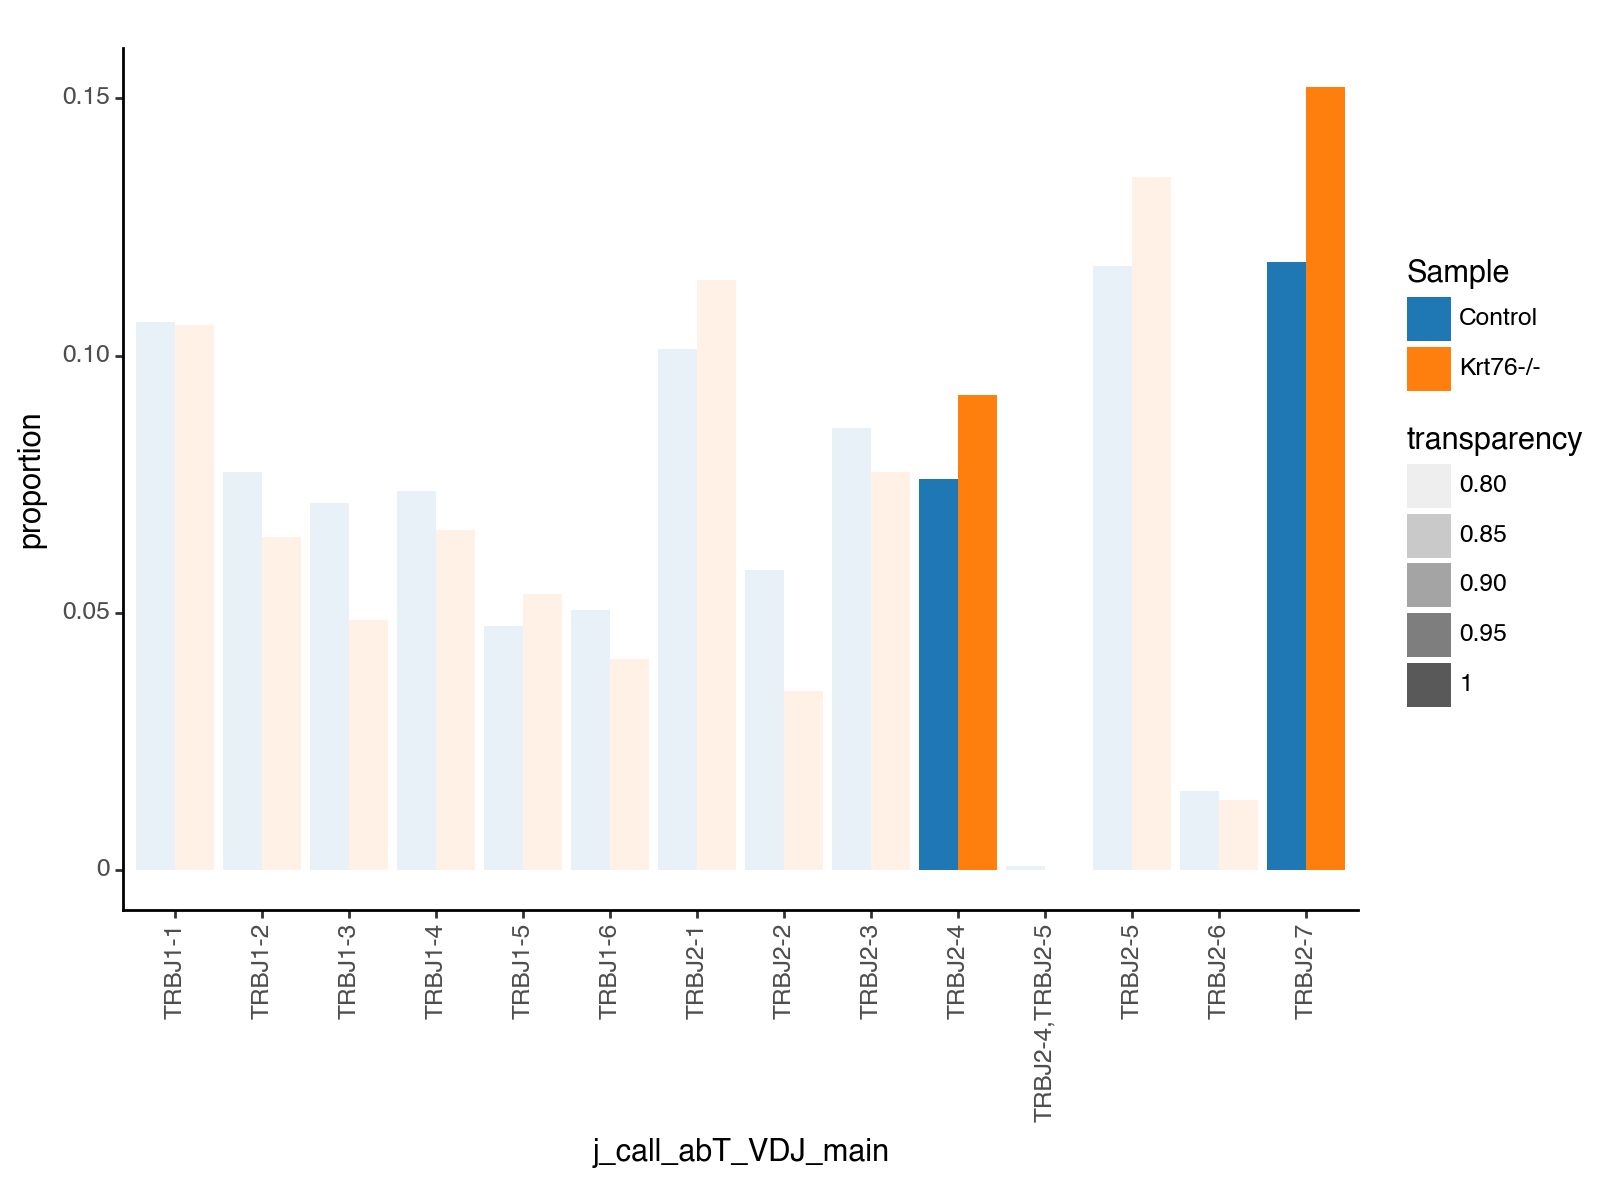

<Figure Size: (800 x 600)>

In [303]:
p

In [304]:
p.save("JgeneBetaChain_DP1_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DP1_181223.pdf


### DP 2 - J gene beta chain

In [305]:
adata_NPF_DP2 = adata_NPF[adata_NPF.obs["leiden"] == "9 DP 2"]

In [306]:
adata_NPF_DP2

View of AnnData object with n_obs × n_vars = 65 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [307]:
working_df = pd.DataFrame(adata_NPF_DP2.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ1-4                  7
         TRBJ2-7                  7
         TRBJ2-5                  6
         TRBJ1-1                  4
         TRBJ1-3                  3
         TRBJ2-1                  3
         TRBJ2-2                  3
         TRBJ2-4                  3
         TRBJ2-6                  3
         TRBJ1-2                  2
         TRBJ2-3                  2
         TRBJ1-6                  2
         TRBJ1-5                  2
Krt76-/- TRBJ2-5                  3
         TRBJ1-3                  2
         TRBJ2-6                  2
         TRBJ2-4                  2
         TRBJ2-2                  2
         TRBJ1-1                  2
         TRBJ2-7                  2
         TRBJ1-2                  1
         TRBJ1-6                  1
         TRBJ2-3                  1
         TRBJ1-4                  0
         TRBJ1-5                  0
         TRBJ2-1                  0

In [308]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ1-4       7
1    Control             TRBJ2-7       7
2    Control             TRBJ2-5       6
3    Control             TRBJ1-1       4
4    Control             TRBJ1-3       3
5    Control             TRBJ2-1       3
6    Control             TRBJ2-2       3
7    Control             TRBJ2-4       3
8    Control             TRBJ2-6       3
9    Control             TRBJ1-2       2
10   Control             TRBJ2-3       2
11   Control             TRBJ1-6       2
12   Control             TRBJ1-5       2
13  Krt76-/-             TRBJ2-5       3
14  Krt76-/-             TRBJ1-3       2
15  Krt76-/-             TRBJ2-6       2
16  Krt76-/-             TRBJ2-4       2
17  Krt76-/-             TRBJ2-2       2
18  Krt76-/-             TRBJ1-1       2
19  Krt76-/-             TRBJ2-7       2
20  Krt76-/-             TRBJ1-2       1
21  Krt76-/-             TRBJ1-6       1
22  Krt76-/-             TRBJ2-3       1
23  Krt76-/-             TRBJ1-4       0
24  Krt76-/-             TRBJ1-5       0
25  Krt76-/-             TRBJ2-1       0

In [309]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 47, 'Krt76-/-': 18}

In [310]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [311]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ1-4       7    0.148936
1    Control             TRBJ2-7       7    0.148936
2    Control             TRBJ2-5       6    0.127660
3    Control             TRBJ1-1       4    0.085106
4    Control             TRBJ1-3       3    0.063830
5    Control             TRBJ2-1       3    0.063830
6    Control             TRBJ2-2       3    0.063830
7    Control             TRBJ2-4       3    0.063830
8    Control             TRBJ2-6       3    0.063830
9    Control             TRBJ1-2       2    0.042553
10   Control             TRBJ2-3       2    0.042553
11   Control             TRBJ1-6       2    0.042553
12   Control             TRBJ1-5       2    0.042553
13  Krt76-/-             TRBJ2-5       3    0.166667
14  Krt76-/-             TRBJ1-3       2    0.111111
15  Krt76-/-             TRBJ2-6       2    0.111111
16  Krt76-/-             TRBJ2-4       2    0.111111
17  Krt76-/-             TRBJ2-2       2    0.111111
18  Krt76-/-             TRBJ1-1       2    0.111111
19  Krt76-/-             TRBJ2-7       2    0.111111
20  Krt76-/-             TRBJ1-2       1    0.055556
21  Krt76-/-             TRBJ1-6       1    0.055556
22  Krt76-/-             TRBJ2-3       1    0.055556
23  Krt76-/-             TRBJ1-4       0    0.000000
24  Krt76-/-             TRBJ1-5       0    0.000000
25  Krt76-/-             TRBJ2-1       0    0.000000

In [312]:
working_control = working_df[working_df["Sample"] == "Control"]

In [313]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [314]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [315]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [316]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.3055555555555556,
 'TRBJ1-2': 1.3055555555555556,
 'TRBJ1-3': 1.7407407407407407,
 'TRBJ1-4': 0.0,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 1.3055555555555556,
 'TRBJ2-1': 0.0,
 'TRBJ2-2': 1.7407407407407407,
 'TRBJ2-3': 1.3055555555555556,
 'TRBJ2-4': 1.7407407407407407,
 'TRBJ2-5': 1.3055555555555556,
 'TRBJ2-6': 1.7407407407407407,
 'TRBJ2-7': 0.746031746031746}

In [317]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ1-4       7    0.148936    0.000000
1    Control             TRBJ2-7       7    0.148936    0.746032
2    Control             TRBJ2-5       6    0.127660    1.305556
3    Control             TRBJ1-1       4    0.085106    1.305556
4    Control             TRBJ1-3       3    0.063830    1.740741
5    Control             TRBJ2-1       3    0.063830    0.000000
6    Control             TRBJ2-2       3    0.063830    1.740741
7    Control             TRBJ2-4       3    0.063830    1.740741
8    Control             TRBJ2-6       3    0.063830    1.740741
9    Control             TRBJ1-2       2    0.042553    1.305556
10   Control             TRBJ2-3       2    0.042553    1.305556
11   Control             TRBJ1-6       2    0.042553    1.305556
12   Control             TRBJ1-5       2    0.042553    0.000000
13  Krt76-/-             TRBJ2-5       3    0.166667    1.305556
14  Krt76-/-             TRBJ1-3       2    0.111111    1.740741
15  Krt76-/-             TRBJ2-6       2    0.111111    1.740741
16  Krt76-/-             TRBJ2-4       2    0.111111    1.740741
17  Krt76-/-             TRBJ2-2       2    0.111111    1.740741
18  Krt76-/-             TRBJ1-1       2    0.111111    1.305556
19  Krt76-/-             TRBJ2-7       2    0.111111    0.746032
20  Krt76-/-             TRBJ1-2       1    0.055556    1.305556
21  Krt76-/-             TRBJ1-6       1    0.055556    1.305556
22  Krt76-/-             TRBJ2-3       1    0.055556    1.305556
23  Krt76-/-             TRBJ1-4       0    0.000000    0.000000
24  Krt76-/-             TRBJ1-5       0    0.000000    0.000000
25  Krt76-/-             TRBJ2-1       0    0.000000    0.000000

In [318]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [319]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

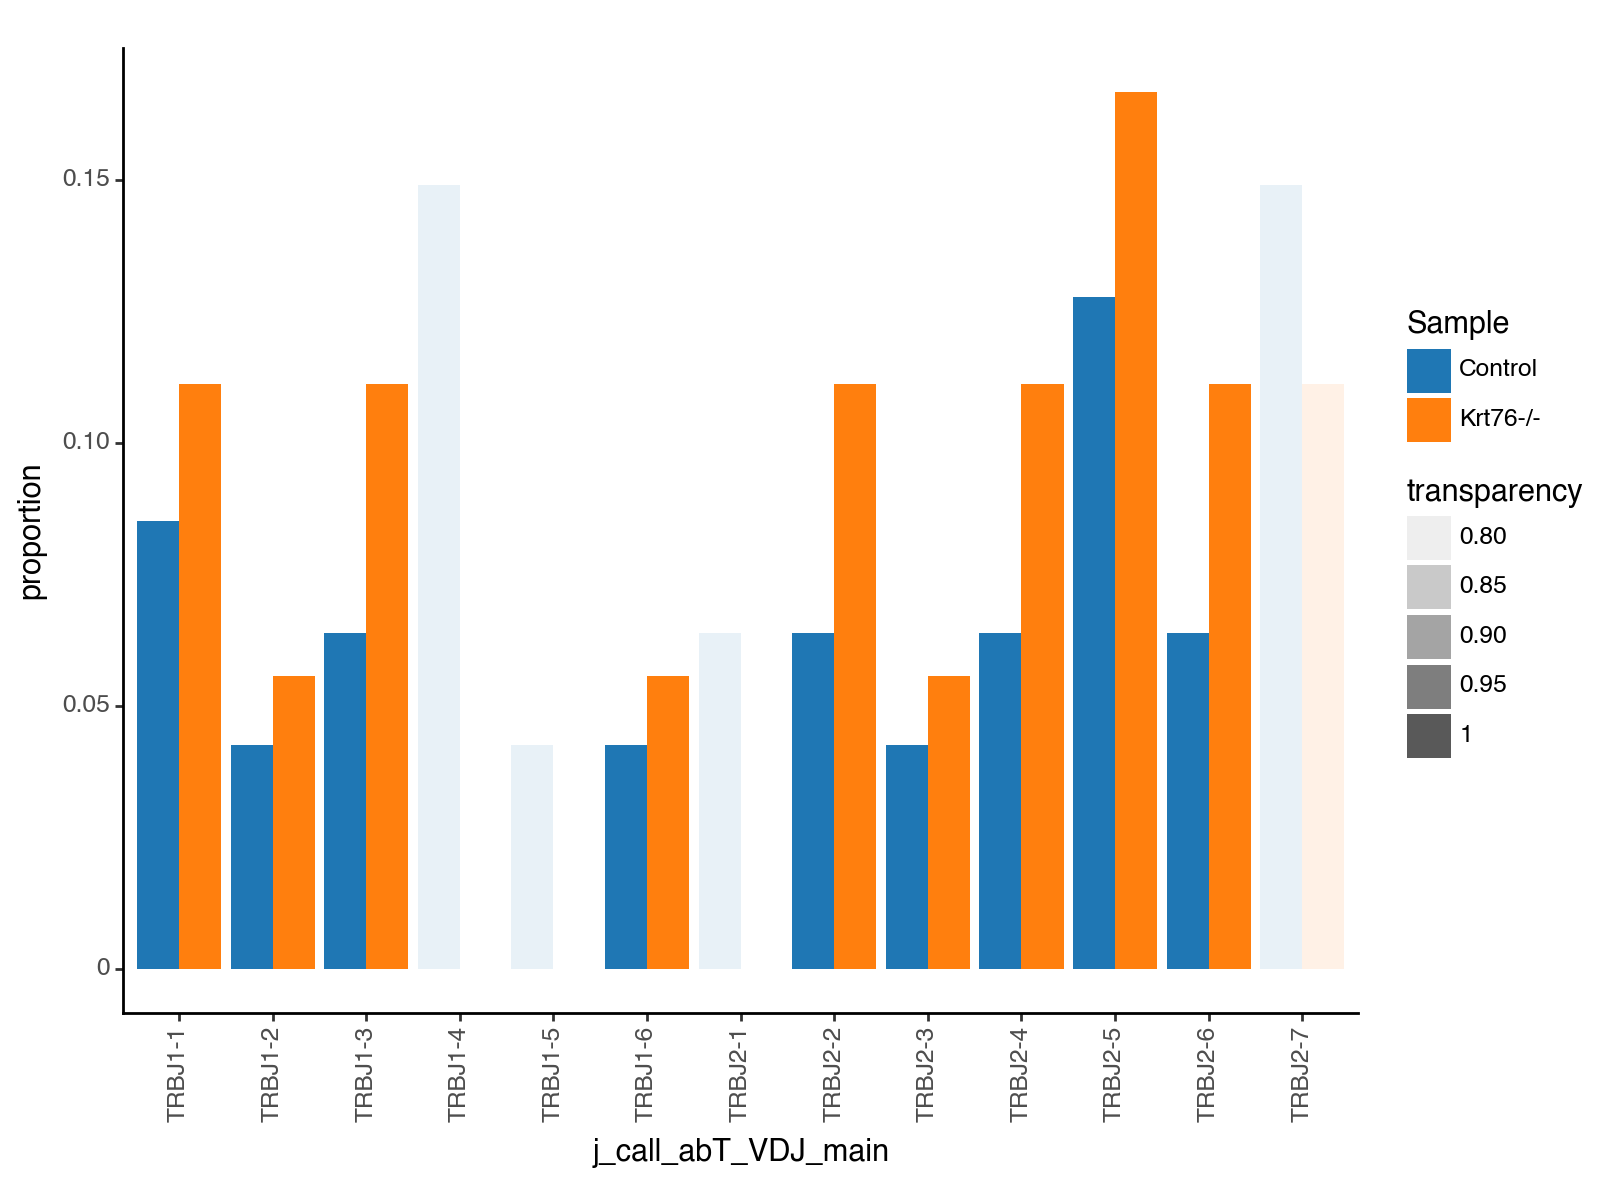

<Figure Size: (800 x 600)>

In [320]:
p

In [321]:
p.save("JgeneBetaChain_DP2_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_DP2_181223.pdf


### SP & DP - V gene beta chain

In [322]:
adata_NPF_SPnDP = adata_NPF[adata_NPF.obs["leiden"] == "5 SP & DP"]

In [323]:
adata_NPF_SPnDP 

View of AnnData object with n_obs × n_vars = 621 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [324]:
working_df = pd.DataFrame(adata_NPF_SPnDP.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main           
Control  TRBJ2-7                     72
         TRBJ2-1                     52
         TRBJ2-5                     50
         TRBJ2-4                     49
         TRBJ1-1                     40
         TRBJ2-3                     35
         TRBJ1-4                     23
         TRBJ2-2                     22
         TRBJ1-3                     19
         TRBJ1-2                     18
         TRBJ1-5                     15
         TRBJ1-6                     10
         TRBJ2-6                      5
         TRBJ2-2,TRBJ1-6,TRBJ2-7      0
Krt76-/- TRBJ2-7                     46
         TRBJ1-1                     24
         TRBJ2-1                     24
         TRBJ2-4                     22
         TRBJ2-5                     18
         TRBJ1-3                     16
         TRBJ2-3                     16
         TRBJ1-2                     12
         TRBJ1-4                      9
         TRBJ1-6                      7
         TRBJ2-2                      7
         TRBJ1-5                      7
         TRBJ2-6                      2
         TRBJ2-2,TRBJ1-6,TRBJ2-7      1

In [325]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample      j_call_abT_VDJ_main  counts
0    Control                  TRBJ2-7      72
1    Control                  TRBJ2-1      52
2    Control                  TRBJ2-5      50
3    Control                  TRBJ2-4      49
4    Control                  TRBJ1-1      40
5    Control                  TRBJ2-3      35
6    Control                  TRBJ1-4      23
7    Control                  TRBJ2-2      22
8    Control                  TRBJ1-3      19
9    Control                  TRBJ1-2      18
10   Control                  TRBJ1-5      15
11   Control                  TRBJ1-6      10
12   Control                  TRBJ2-6       5
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       0
14  Krt76-/-                  TRBJ2-7      46
15  Krt76-/-                  TRBJ1-1      24
16  Krt76-/-                  TRBJ2-1      24
17  Krt76-/-                  TRBJ2-4      22
18  Krt76-/-                  TRBJ2-5      18
19  Krt76-/-                  TRBJ1-3      16
20  Krt76-/-                  TRBJ2-3      16
21  Krt76-/-                  TRBJ1-2      12
22  Krt76-/-                  TRBJ1-4       9
23  Krt76-/-                  TRBJ1-6       7
24  Krt76-/-                  TRBJ2-2       7
25  Krt76-/-                  TRBJ1-5       7
26  Krt76-/-                  TRBJ2-6       2
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       1

In [326]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 410, 'Krt76-/-': 211}

In [327]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [328]:
working_df

Sample      j_call_abT_VDJ_main  counts  proportion
0    Control                  TRBJ2-7      72    0.175610
1    Control                  TRBJ2-1      52    0.126829
2    Control                  TRBJ2-5      50    0.121951
3    Control                  TRBJ2-4      49    0.119512
4    Control                  TRBJ1-1      40    0.097561
5    Control                  TRBJ2-3      35    0.085366
6    Control                  TRBJ1-4      23    0.056098
7    Control                  TRBJ2-2      22    0.053659
8    Control                  TRBJ1-3      19    0.046341
9    Control                  TRBJ1-2      18    0.043902
10   Control                  TRBJ1-5      15    0.036585
11   Control                  TRBJ1-6      10    0.024390
12   Control                  TRBJ2-6       5    0.012195
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       0    0.000000
14  Krt76-/-                  TRBJ2-7      46    0.218009
15  Krt76-/-                  TRBJ1-1      24    0.113744
16  Krt76-/-                  TRBJ2-1      24    0.113744
17  Krt76-/-                  TRBJ2-4      22    0.104265
18  Krt76-/-                  TRBJ2-5      18    0.085308
19  Krt76-/-                  TRBJ1-3      16    0.075829
20  Krt76-/-                  TRBJ2-3      16    0.075829
21  Krt76-/-                  TRBJ1-2      12    0.056872
22  Krt76-/-                  TRBJ1-4       9    0.042654
23  Krt76-/-                  TRBJ1-6       7    0.033175
24  Krt76-/-                  TRBJ2-2       7    0.033175
25  Krt76-/-                  TRBJ1-5       7    0.033175
26  Krt76-/-                  TRBJ2-6       2    0.009479
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       1    0.004739

In [329]:
working_control = working_df[working_df["Sample"] == "Control"]

In [330]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [331]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [332]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [333]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.1658767772511847,
 'TRBJ1-2': 1.2954186413902053,
 'TRBJ1-3': 1.6363182838613122,
 'TRBJ1-4': 0.7603544199464249,
 'TRBJ1-5': 0.9067930489731438,
 'TRBJ1-6': 1.3601895734597158,
 'TRBJ2-1': 0.8968282901932191,
 'TRBJ2-2': 0.6182679879362344,
 'TRBJ2-2,TRBJ1-6,TRBJ2-7': inf,
 'TRBJ2-3': 0.8882870683818551,
 'TRBJ2-4': 0.8724247993036077,
 'TRBJ2-5': 0.699526066350711,
 'TRBJ2-6': 0.7772511848341233,
 'TRBJ2-7': 1.2414428646656135}

In [334]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample      j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control                  TRBJ2-7      72    0.175610    1.241443
1    Control                  TRBJ2-1      52    0.126829    0.896828
2    Control                  TRBJ2-5      50    0.121951    0.699526
3    Control                  TRBJ2-4      49    0.119512    0.872425
4    Control                  TRBJ1-1      40    0.097561    1.165877
5    Control                  TRBJ2-3      35    0.085366    0.888287
6    Control                  TRBJ1-4      23    0.056098    0.760354
7    Control                  TRBJ2-2      22    0.053659    0.618268
8    Control                  TRBJ1-3      19    0.046341    1.636318
9    Control                  TRBJ1-2      18    0.043902    1.295419
10   Control                  TRBJ1-5      15    0.036585    0.906793
11   Control                  TRBJ1-6      10    0.024390    1.360190
12   Control                  TRBJ2-6       5    0.012195    0.777251
13   Control  TRBJ2-2,TRBJ1-6,TRBJ2-7       0    0.000000         inf
14  Krt76-/-                  TRBJ2-7      46    0.218009    1.241443
15  Krt76-/-                  TRBJ1-1      24    0.113744    1.165877
16  Krt76-/-                  TRBJ2-1      24    0.113744    0.896828
17  Krt76-/-                  TRBJ2-4      22    0.104265    0.872425
18  Krt76-/-                  TRBJ2-5      18    0.085308    0.699526
19  Krt76-/-                  TRBJ1-3      16    0.075829    1.636318
20  Krt76-/-                  TRBJ2-3      16    0.075829    0.888287
21  Krt76-/-                  TRBJ1-2      12    0.056872    1.295419
22  Krt76-/-                  TRBJ1-4       9    0.042654    0.760354
23  Krt76-/-                  TRBJ1-6       7    0.033175    1.360190
24  Krt76-/-                  TRBJ2-2       7    0.033175    0.618268
25  Krt76-/-                  TRBJ1-5       7    0.033175    0.906793
26  Krt76-/-                  TRBJ2-6       2    0.009479    0.777251
27  Krt76-/-  TRBJ2-2,TRBJ1-6,TRBJ2-7       1    0.004739         inf

In [335]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [336]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

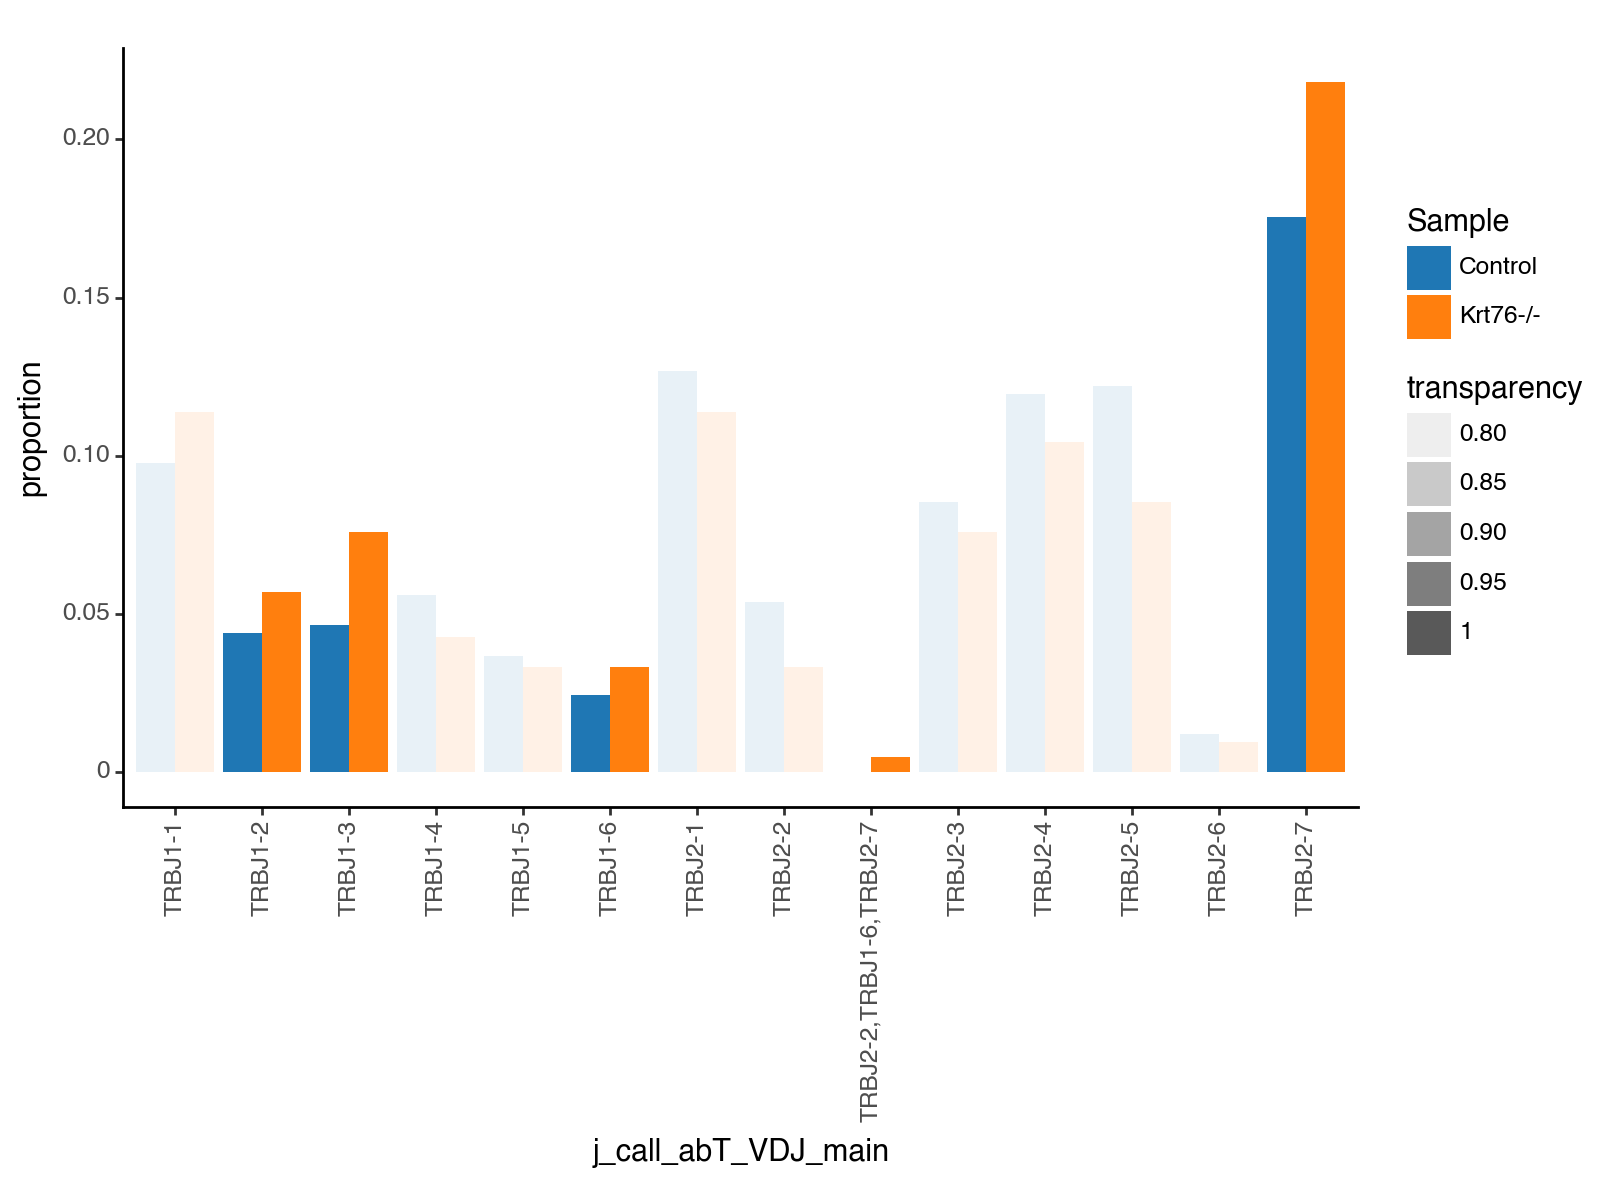

<Figure Size: (800 x 600)>

In [337]:
p

In [338]:
p.save("JgeneBetaChain_SPnDP_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_SPnDP_181223.pdf


### TCRgd - J gene beta chain

In [339]:
adata_NPF_TCRgd = adata_NPF[adata_NPF.obs["leiden"] == "8 TCRgd"]

In [340]:
adata_NPF_TCRgd

View of AnnData object with n_obs × n_vars = 117 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [341]:
working_df = pd.DataFrame(adata_NPF_TCRgd.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-1                 22
         TRBJ2-5                  9
         TRBJ2-7                  7
         TRBJ1-2                  6
         TRBJ2-4                  6
         TRBJ2-6                  6
         TRBJ2-3                  5
         TRBJ1-1                  4
         TRBJ1-6                  4
         TRBJ1-4                  3
         TRBJ1-3                  3
         TRBJ2-2                  2
         TRBJ1-5                  2
Krt76-/- TRBJ2-7                  8
         TRBJ2-3                  6
         TRBJ2-1                  6
         TRBJ2-5                  4
         TRBJ1-2                  4
         TRBJ2-4                  3
         TRBJ1-1                  3
         TRBJ2-2                  2
         TRBJ1-5                  1
         TRBJ2-6                  1
         TRBJ1-3                  0
         TRBJ1-4                  0
         TRBJ1-6                  0

In [342]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-1      22
1    Control             TRBJ2-5       9
2    Control             TRBJ2-7       7
3    Control             TRBJ1-2       6
4    Control             TRBJ2-4       6
5    Control             TRBJ2-6       6
6    Control             TRBJ2-3       5
7    Control             TRBJ1-1       4
8    Control             TRBJ1-6       4
9    Control             TRBJ1-4       3
10   Control             TRBJ1-3       3
11   Control             TRBJ2-2       2
12   Control             TRBJ1-5       2
13  Krt76-/-             TRBJ2-7       8
14  Krt76-/-             TRBJ2-3       6
15  Krt76-/-             TRBJ2-1       6
16  Krt76-/-             TRBJ2-5       4
17  Krt76-/-             TRBJ1-2       4
18  Krt76-/-             TRBJ2-4       3
19  Krt76-/-             TRBJ1-1       3
20  Krt76-/-             TRBJ2-2       2
21  Krt76-/-             TRBJ1-5       1
22  Krt76-/-             TRBJ2-6       1
23  Krt76-/-             TRBJ1-3       0
24  Krt76-/-             TRBJ1-4       0
25  Krt76-/-             TRBJ1-6       0

In [343]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 79, 'Krt76-/-': 38}

In [344]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [345]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-1      22    0.278481
1    Control             TRBJ2-5       9    0.113924
2    Control             TRBJ2-7       7    0.088608
3    Control             TRBJ1-2       6    0.075949
4    Control             TRBJ2-4       6    0.075949
5    Control             TRBJ2-6       6    0.075949
6    Control             TRBJ2-3       5    0.063291
7    Control             TRBJ1-1       4    0.050633
8    Control             TRBJ1-6       4    0.050633
9    Control             TRBJ1-4       3    0.037975
10   Control             TRBJ1-3       3    0.037975
11   Control             TRBJ2-2       2    0.025316
12   Control             TRBJ1-5       2    0.025316
13  Krt76-/-             TRBJ2-7       8    0.210526
14  Krt76-/-             TRBJ2-3       6    0.157895
15  Krt76-/-             TRBJ2-1       6    0.157895
16  Krt76-/-             TRBJ2-5       4    0.105263
17  Krt76-/-             TRBJ1-2       4    0.105263
18  Krt76-/-             TRBJ2-4       3    0.078947
19  Krt76-/-             TRBJ1-1       3    0.078947
20  Krt76-/-             TRBJ2-2       2    0.052632
21  Krt76-/-             TRBJ1-5       1    0.026316
22  Krt76-/-             TRBJ2-6       1    0.026316
23  Krt76-/-             TRBJ1-3       0    0.000000
24  Krt76-/-             TRBJ1-4       0    0.000000
25  Krt76-/-             TRBJ1-6       0    0.000000

In [346]:
working_control = working_df[working_df["Sample"] == "Control"]

In [347]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [348]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [349]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [350]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.5592105263157894,
 'TRBJ1-2': 1.3859649122807016,
 'TRBJ1-3': 0.0,
 'TRBJ1-4': 0.0,
 'TRBJ1-5': 1.0394736842105263,
 'TRBJ1-6': 0.0,
 'TRBJ2-1': 0.5669856459330144,
 'TRBJ2-2': 2.0789473684210527,
 'TRBJ2-3': 2.494736842105263,
 'TRBJ2-4': 1.0394736842105263,
 'TRBJ2-5': 0.9239766081871345,
 'TRBJ2-6': 0.3464912280701754,
 'TRBJ2-7': 2.37593984962406}

In [351]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-1      22    0.278481    0.566986
1    Control             TRBJ2-5       9    0.113924    0.923977
2    Control             TRBJ2-7       7    0.088608    2.375940
3    Control             TRBJ1-2       6    0.075949    1.385965
4    Control             TRBJ2-4       6    0.075949    1.039474
5    Control             TRBJ2-6       6    0.075949    0.346491
6    Control             TRBJ2-3       5    0.063291    2.494737
7    Control             TRBJ1-1       4    0.050633    1.559211
8    Control             TRBJ1-6       4    0.050633    0.000000
9    Control             TRBJ1-4       3    0.037975    0.000000
10   Control             TRBJ1-3       3    0.037975    0.000000
11   Control             TRBJ2-2       2    0.025316    2.078947
12   Control             TRBJ1-5       2    0.025316    1.039474
13  Krt76-/-             TRBJ2-7       8    0.210526    2.375940
14  Krt76-/-             TRBJ2-3       6    0.157895    2.494737
15  Krt76-/-             TRBJ2-1       6    0.157895    0.566986
16  Krt76-/-             TRBJ2-5       4    0.105263    0.923977
17  Krt76-/-             TRBJ1-2       4    0.105263    1.385965
18  Krt76-/-             TRBJ2-4       3    0.078947    1.039474
19  Krt76-/-             TRBJ1-1       3    0.078947    1.559211
20  Krt76-/-             TRBJ2-2       2    0.052632    2.078947
21  Krt76-/-             TRBJ1-5       1    0.026316    1.039474
22  Krt76-/-             TRBJ2-6       1    0.026316    0.346491
23  Krt76-/-             TRBJ1-3       0    0.000000    0.000000
24  Krt76-/-             TRBJ1-4       0    0.000000    0.000000
25  Krt76-/-             TRBJ1-6       0    0.000000    0.000000

In [352]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [353]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

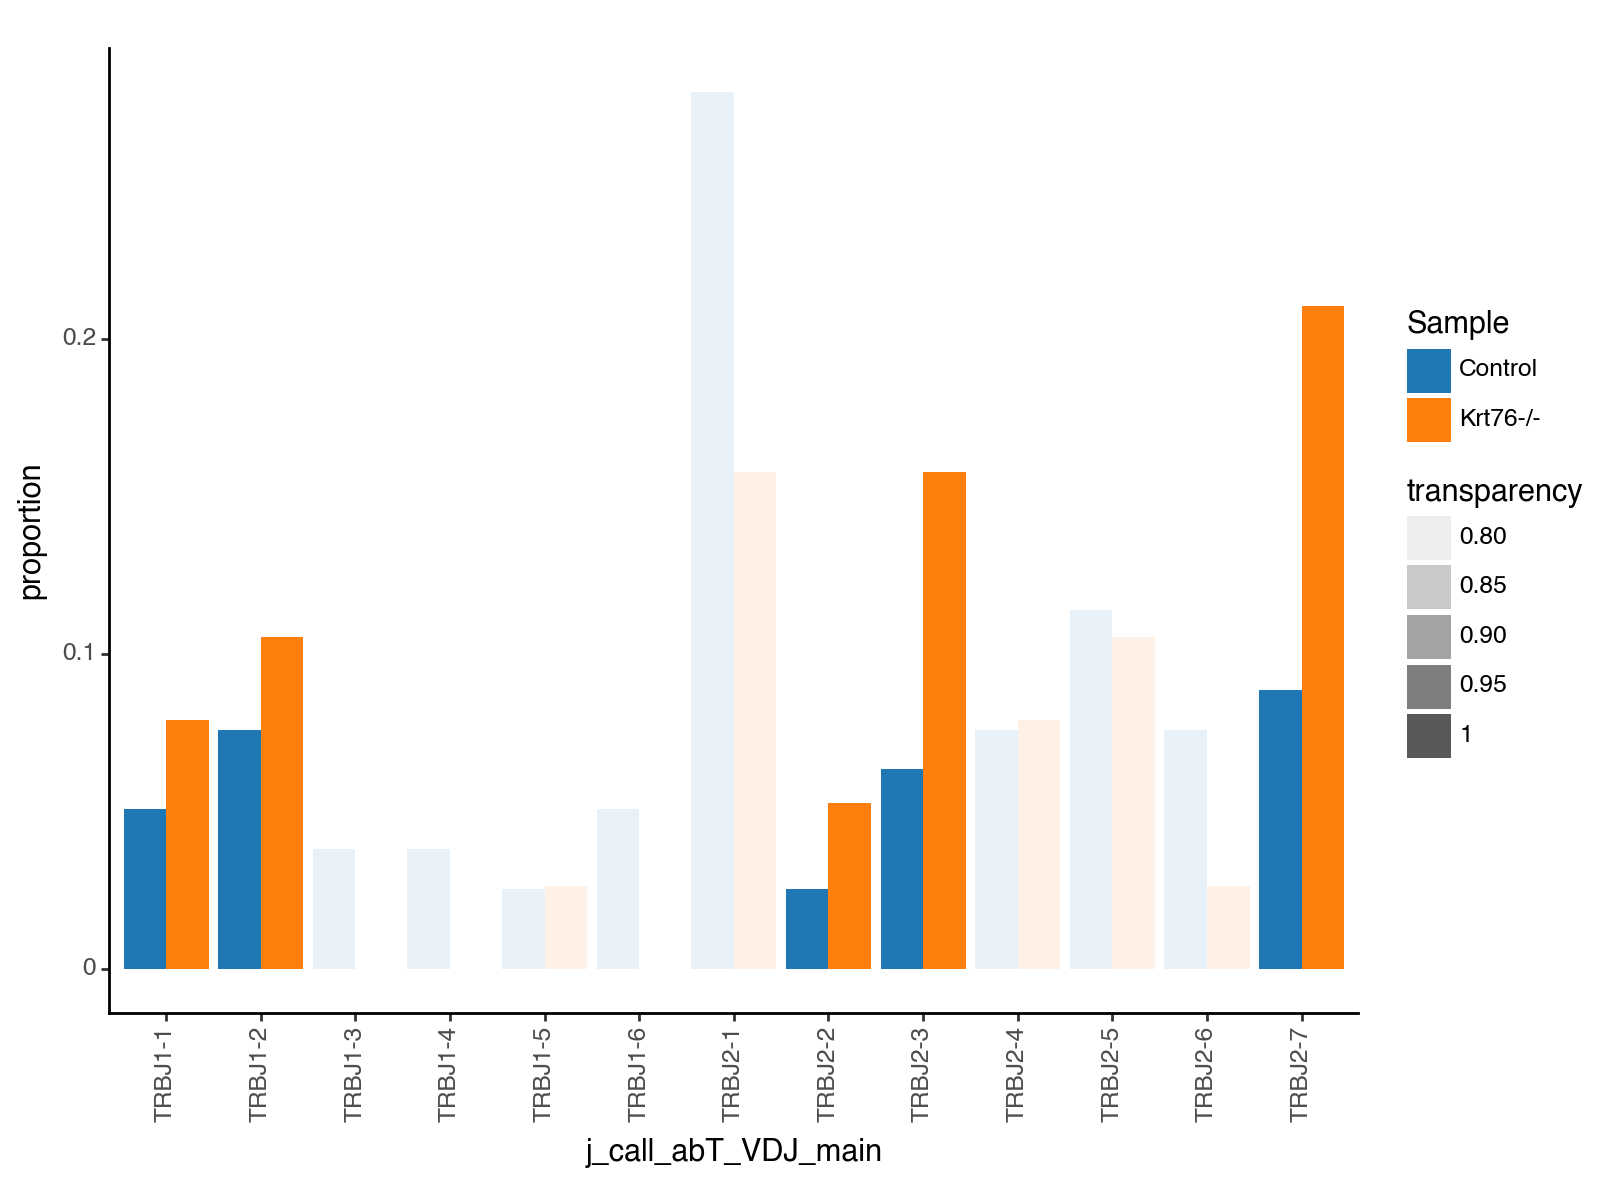

<Figure Size: (800 x 600)>

In [354]:
p

In [355]:
p.save("JgeneBetaChain_TCRgd_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_TCRgd_181223.pdf


### NKT / NK / Tregs - J gene beta chain

In [356]:
adata_NPF_NKT_NK_Tregs = adata_NPF[adata_NPF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [357]:
adata_NPF_NKT_NK_Tregs

View of AnnData object with n_obs × n_vars = 112 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [358]:
working_df = pd.DataFrame(adata_NPF_NKT_NK_Tregs.obs.groupby("Sample")["j_call_abT_VDJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VDJ_main       
Control  TRBJ2-7                 25
         TRBJ2-1                 11
         TRBJ1-1                 10
         TRBJ1-2                  8
         TRBJ2-4                  7
         TRBJ2-2                  7
         TRBJ2-5                  6
         TRBJ1-6                  6
         TRBJ1-3                  4
         TRBJ2-3                  2
         TRBJ1-5                  2
         TRBJ1-4                  2
         TRBJ2-6                  2
Krt76-/- TRBJ1-1                  4
         TRBJ2-5                  2
         TRBJ2-4                  2
         TRBJ2-3                  2
         TRBJ2-1                  2
         TRBJ2-7                  2
         TRBJ1-3                  2
         TRBJ1-2                  2
         TRBJ1-4                  1
         TRBJ2-2                  1
         TRBJ1-6                  0
         TRBJ2-6                  0
         TRBJ1-5                  0

In [359]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VDJ_main  counts
0    Control             TRBJ2-7      25
1    Control             TRBJ2-1      11
2    Control             TRBJ1-1      10
3    Control             TRBJ1-2       8
4    Control             TRBJ2-4       7
5    Control             TRBJ2-2       7
6    Control             TRBJ2-5       6
7    Control             TRBJ1-6       6
8    Control             TRBJ1-3       4
9    Control             TRBJ2-3       2
10   Control             TRBJ1-5       2
11   Control             TRBJ1-4       2
12   Control             TRBJ2-6       2
13  Krt76-/-             TRBJ1-1       4
14  Krt76-/-             TRBJ2-5       2
15  Krt76-/-             TRBJ2-4       2
16  Krt76-/-             TRBJ2-3       2
17  Krt76-/-             TRBJ2-1       2
18  Krt76-/-             TRBJ2-7       2
19  Krt76-/-             TRBJ1-3       2
20  Krt76-/-             TRBJ1-2       2
21  Krt76-/-             TRBJ1-4       1
22  Krt76-/-             TRBJ2-2       1
23  Krt76-/-             TRBJ1-6       0
24  Krt76-/-             TRBJ2-6       0
25  Krt76-/-             TRBJ1-5       0

In [360]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 92, 'Krt76-/-': 20}

In [361]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [362]:
working_df

Sample j_call_abT_VDJ_main  counts  proportion
0    Control             TRBJ2-7      25    0.271739
1    Control             TRBJ2-1      11    0.119565
2    Control             TRBJ1-1      10    0.108696
3    Control             TRBJ1-2       8    0.086957
4    Control             TRBJ2-4       7    0.076087
5    Control             TRBJ2-2       7    0.076087
6    Control             TRBJ2-5       6    0.065217
7    Control             TRBJ1-6       6    0.065217
8    Control             TRBJ1-3       4    0.043478
9    Control             TRBJ2-3       2    0.021739
10   Control             TRBJ1-5       2    0.021739
11   Control             TRBJ1-4       2    0.021739
12   Control             TRBJ2-6       2    0.021739
13  Krt76-/-             TRBJ1-1       4    0.200000
14  Krt76-/-             TRBJ2-5       2    0.100000
15  Krt76-/-             TRBJ2-4       2    0.100000
16  Krt76-/-             TRBJ2-3       2    0.100000
17  Krt76-/-             TRBJ2-1       2    0.100000
18  Krt76-/-             TRBJ2-7       2    0.100000
19  Krt76-/-             TRBJ1-3       2    0.100000
20  Krt76-/-             TRBJ1-2       2    0.100000
21  Krt76-/-             TRBJ1-4       1    0.050000
22  Krt76-/-             TRBJ2-2       1    0.050000
23  Krt76-/-             TRBJ1-6       0    0.000000
24  Krt76-/-             TRBJ2-6       0    0.000000
25  Krt76-/-             TRBJ1-5       0    0.000000

In [363]:
working_control = working_df[working_df["Sample"] == "Control"]

In [364]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [365]:
working_control.set_index("j_call_abT_VDJ_main", inplace=True)

In [366]:
working_KO.set_index("j_call_abT_VDJ_main", inplace=True)

In [367]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRBJ1-1': 1.84,
 'TRBJ1-2': 1.1500000000000001,
 'TRBJ1-3': 2.3000000000000003,
 'TRBJ1-4': 2.3000000000000003,
 'TRBJ1-5': 0.0,
 'TRBJ1-6': 0.0,
 'TRBJ2-1': 0.8363636363636364,
 'TRBJ2-2': 0.6571428571428571,
 'TRBJ2-3': 4.6000000000000005,
 'TRBJ2-4': 1.3142857142857143,
 'TRBJ2-5': 1.5333333333333334,
 'TRBJ2-6': 0.0,
 'TRBJ2-7': 0.36800000000000005}

In [368]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VDJ_main"]]
working_df

Sample j_call_abT_VDJ_main  counts  proportion  foldchange
0    Control             TRBJ2-7      25    0.271739    0.368000
1    Control             TRBJ2-1      11    0.119565    0.836364
2    Control             TRBJ1-1      10    0.108696    1.840000
3    Control             TRBJ1-2       8    0.086957    1.150000
4    Control             TRBJ2-4       7    0.076087    1.314286
5    Control             TRBJ2-2       7    0.076087    0.657143
6    Control             TRBJ2-5       6    0.065217    1.533333
7    Control             TRBJ1-6       6    0.065217    0.000000
8    Control             TRBJ1-3       4    0.043478    2.300000
9    Control             TRBJ2-3       2    0.021739    4.600000
10   Control             TRBJ1-5       2    0.021739    0.000000
11   Control             TRBJ1-4       2    0.021739    2.300000
12   Control             TRBJ2-6       2    0.021739    0.000000
13  Krt76-/-             TRBJ1-1       4    0.200000    1.840000
14  Krt76-/-             TRBJ2-5       2    0.100000    1.533333
15  Krt76-/-             TRBJ2-4       2    0.100000    1.314286
16  Krt76-/-             TRBJ2-3       2    0.100000    4.600000
17  Krt76-/-             TRBJ2-1       2    0.100000    0.836364
18  Krt76-/-             TRBJ2-7       2    0.100000    0.368000
19  Krt76-/-             TRBJ1-3       2    0.100000    2.300000
20  Krt76-/-             TRBJ1-2       2    0.100000    1.150000
21  Krt76-/-             TRBJ1-4       1    0.050000    2.300000
22  Krt76-/-             TRBJ2-2       1    0.050000    0.657143
23  Krt76-/-             TRBJ1-6       0    0.000000    0.000000
24  Krt76-/-             TRBJ2-6       0    0.000000    0.000000
25  Krt76-/-             TRBJ1-5       0    0.000000    0.000000

In [369]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [370]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

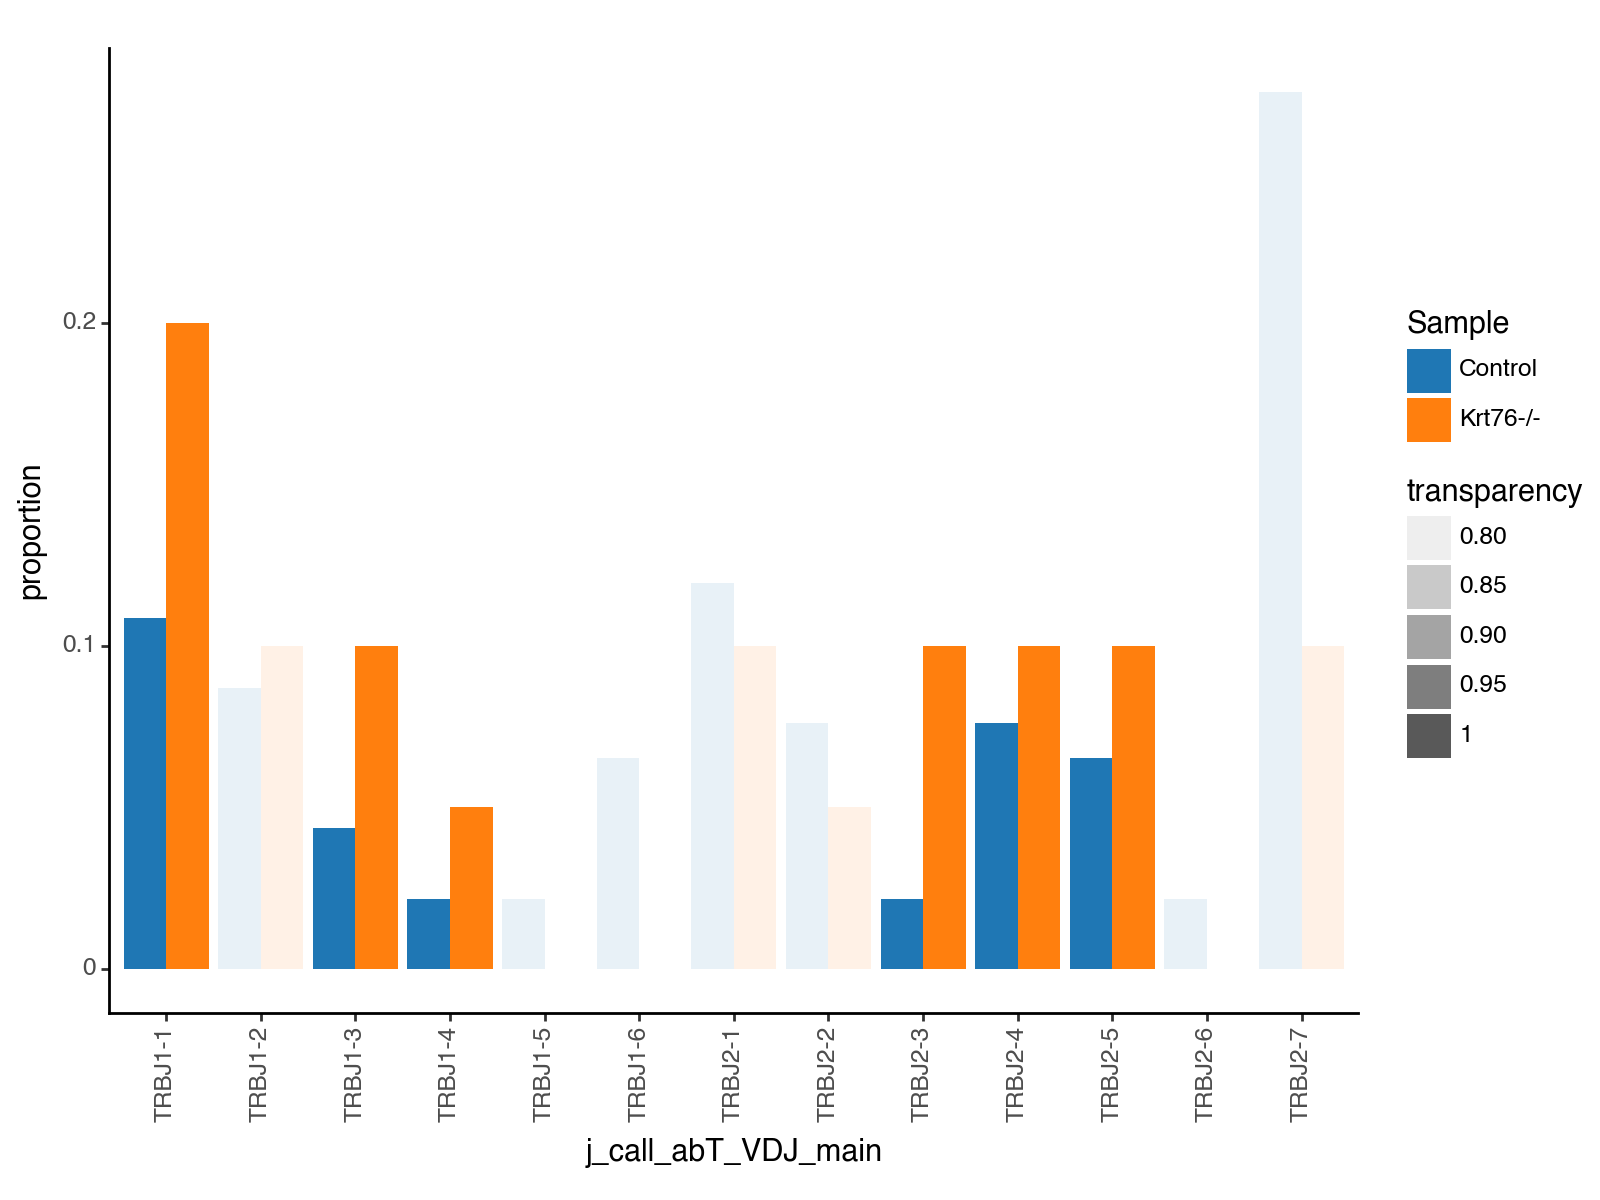

<Figure Size: (800 x 600)>

In [371]:
p

In [372]:
p.save("JgeneBetaChain_NKT_NK_Tregs_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneBetaChain_NKT_NK_Tregs_181223.pdf


### Alpha Chain

### V gene

### DN2a - V gene alpha chain

In [373]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [374]:
adata_NPF_DN2a = adata_NPF[adata_NPF.obs["leiden"] == "7 DN2a"]

In [375]:
adata_NPF_DN2a

View of AnnData object with n_obs × n_vars = 18 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [376]:
working_df = pd.DataFrame(adata_NPF_DN2a.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main                 
Control  TRAV12D-3,TRAV12N-3               2
         TRAV13N-2,TRAV13-2,TRAV13D-2      2
         TRAV4-3,TRAV4D-3                  2
         TRAV12-1,TRAV12D-1                1
         TRAV7D-2,TRAV7-2                  1
         TRAV12D-2,TRAV12-2                1
         TRAV9D-3,TRAV9-4                  1
         TRAV6D-3                          1
         TRAV7-4,TRAV7D-4                  1
         TRAV4D-4,TRAV4-4/DV10             1
         TRAV6-7/DV9                       0
         TRAV4-4/DV10                      0
         TRAV14-3,TRAV14D-3/DV8            0
Krt76-/- TRAV14-3,TRAV14D-3/DV8            1
         TRAV13N-2,TRAV13-2,TRAV13D-2      1
         TRAV6-7/DV9                       1
         TRAV12D-2,TRAV12-2                1
         TRAV4-4/DV10                      1
         TRAV6D-3                          0
         TRAV7-4,TRAV7D-4                  0
         TRAV7D-2,TRAV7-2                  0
         TRAV4D-4,TRAV4-4/DV10             0
         TRAV12-1,TRAV12D-1                0
         TRAV4-3,TRAV4D-3                  0
         TRAV12D-3,TRAV12N-3               0
         TRAV9D-3,TRAV9-4                  0

In [377]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample            v_call_abT_VJ_main  counts
0    Control           TRAV12D-3,TRAV12N-3       2
1    Control  TRAV13N-2,TRAV13-2,TRAV13D-2       2
2    Control              TRAV4-3,TRAV4D-3       2
3    Control            TRAV12-1,TRAV12D-1       1
4    Control              TRAV7D-2,TRAV7-2       1
5    Control            TRAV12D-2,TRAV12-2       1
6    Control              TRAV9D-3,TRAV9-4       1
7    Control                      TRAV6D-3       1
8    Control              TRAV7-4,TRAV7D-4       1
9    Control         TRAV4D-4,TRAV4-4/DV10       1
10   Control                   TRAV6-7/DV9       0
11   Control                  TRAV4-4/DV10       0
12   Control        TRAV14-3,TRAV14D-3/DV8       0
13  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1
14  Krt76-/-  TRAV13N-2,TRAV13-2,TRAV13D-2       1
15  Krt76-/-                   TRAV6-7/DV9       1
16  Krt76-/-            TRAV12D-2,TRAV12-2       1
17  Krt76-/-                  TRAV4-4/DV10       1
18  Krt76-/-                      TRAV6D-3       0
19  Krt76-/-              TRAV7-4,TRAV7D-4       0
20  Krt76-/-              TRAV7D-2,TRAV7-2       0
21  Krt76-/-         TRAV4D-4,TRAV4-4/DV10       0
22  Krt76-/-            TRAV12-1,TRAV12D-1       0
23  Krt76-/-              TRAV4-3,TRAV4D-3       0
24  Krt76-/-           TRAV12D-3,TRAV12N-3       0
25  Krt76-/-              TRAV9D-3,TRAV9-4       0

In [378]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 13, 'Krt76-/-': 5}

In [379]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [380]:
working_df

Sample            v_call_abT_VJ_main  counts  proportion
0    Control           TRAV12D-3,TRAV12N-3       2    0.153846
1    Control  TRAV13N-2,TRAV13-2,TRAV13D-2       2    0.153846
2    Control              TRAV4-3,TRAV4D-3       2    0.153846
3    Control            TRAV12-1,TRAV12D-1       1    0.076923
4    Control              TRAV7D-2,TRAV7-2       1    0.076923
5    Control            TRAV12D-2,TRAV12-2       1    0.076923
6    Control              TRAV9D-3,TRAV9-4       1    0.076923
7    Control                      TRAV6D-3       1    0.076923
8    Control              TRAV7-4,TRAV7D-4       1    0.076923
9    Control         TRAV4D-4,TRAV4-4/DV10       1    0.076923
10   Control                   TRAV6-7/DV9       0    0.000000
11   Control                  TRAV4-4/DV10       0    0.000000
12   Control        TRAV14-3,TRAV14D-3/DV8       0    0.000000
13  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1    0.200000
14  Krt76-/-  TRAV13N-2,TRAV13-2,TRAV13D-2       1    0.200000
15  Krt76-/-                   TRAV6-7/DV9       1    0.200000
16  Krt76-/-            TRAV12D-2,TRAV12-2       1    0.200000
17  Krt76-/-                  TRAV4-4/DV10       1    0.200000
18  Krt76-/-                      TRAV6D-3       0    0.000000
19  Krt76-/-              TRAV7-4,TRAV7D-4       0    0.000000
20  Krt76-/-              TRAV7D-2,TRAV7-2       0    0.000000
21  Krt76-/-         TRAV4D-4,TRAV4-4/DV10       0    0.000000
22  Krt76-/-            TRAV12-1,TRAV12D-1       0    0.000000
23  Krt76-/-              TRAV4-3,TRAV4D-3       0    0.000000
24  Krt76-/-           TRAV12D-3,TRAV12N-3       0    0.000000
25  Krt76-/-              TRAV9D-3,TRAV9-4       0    0.000000

In [381]:
working_control = working_df[working_df["Sample"] == "Control"]

In [382]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [383]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [384]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [385]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV12-1,TRAV12D-1': 0.0,
 'TRAV12D-2,TRAV12-2': 2.6,
 'TRAV12D-3,TRAV12N-3': 0.0,
 'TRAV13N-2,TRAV13-2,TRAV13D-2': 1.3,
 'TRAV14-3,TRAV14D-3/DV8': inf,
 'TRAV4-3,TRAV4D-3': 0.0,
 'TRAV4-4/DV10': inf,
 'TRAV4D-4,TRAV4-4/DV10': 0.0,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3': 0.0,
 'TRAV7-4,TRAV7D-4': 0.0,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV9D-3,TRAV9-4': 0.0}

In [386]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample            v_call_abT_VJ_main  counts  proportion  foldchange
0    Control           TRAV12D-3,TRAV12N-3       2    0.153846         0.0
1    Control  TRAV13N-2,TRAV13-2,TRAV13D-2       2    0.153846         1.3
2    Control              TRAV4-3,TRAV4D-3       2    0.153846         0.0
3    Control            TRAV12-1,TRAV12D-1       1    0.076923         0.0
4    Control              TRAV7D-2,TRAV7-2       1    0.076923         0.0
5    Control            TRAV12D-2,TRAV12-2       1    0.076923         2.6
6    Control              TRAV9D-3,TRAV9-4       1    0.076923         0.0
7    Control                      TRAV6D-3       1    0.076923         0.0
8    Control              TRAV7-4,TRAV7D-4       1    0.076923         0.0
9    Control         TRAV4D-4,TRAV4-4/DV10       1    0.076923         0.0
10   Control                   TRAV6-7/DV9       0    0.000000         inf
11   Control                  TRAV4-4/DV10       0    0.000000         inf
12   Control        TRAV14-3,TRAV14D-3/DV8       0    0.000000         inf
13  Krt76-/-        TRAV14-3,TRAV14D-3/DV8       1    0.200000         inf
14  Krt76-/-  TRAV13N-2,TRAV13-2,TRAV13D-2       1    0.200000         1.3
15  Krt76-/-                   TRAV6-7/DV9       1    0.200000         inf
16  Krt76-/-            TRAV12D-2,TRAV12-2       1    0.200000         2.6
17  Krt76-/-                  TRAV4-4/DV10       1    0.200000         inf
18  Krt76-/-                      TRAV6D-3       0    0.000000         0.0
19  Krt76-/-              TRAV7-4,TRAV7D-4       0    0.000000         0.0
20  Krt76-/-              TRAV7D-2,TRAV7-2       0    0.000000         0.0
21  Krt76-/-         TRAV4D-4,TRAV4-4/DV10       0    0.000000         0.0
22  Krt76-/-            TRAV12-1,TRAV12D-1       0    0.000000         0.0
23  Krt76-/-              TRAV4-3,TRAV4D-3       0    0.000000         0.0
24  Krt76-/-           TRAV12D-3,TRAV12N-3       0    0.000000         0.0
25  Krt76-/-              TRAV9D-3,TRAV9-4       0    0.000000         0.0

In [387]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [388]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [389]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [390]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

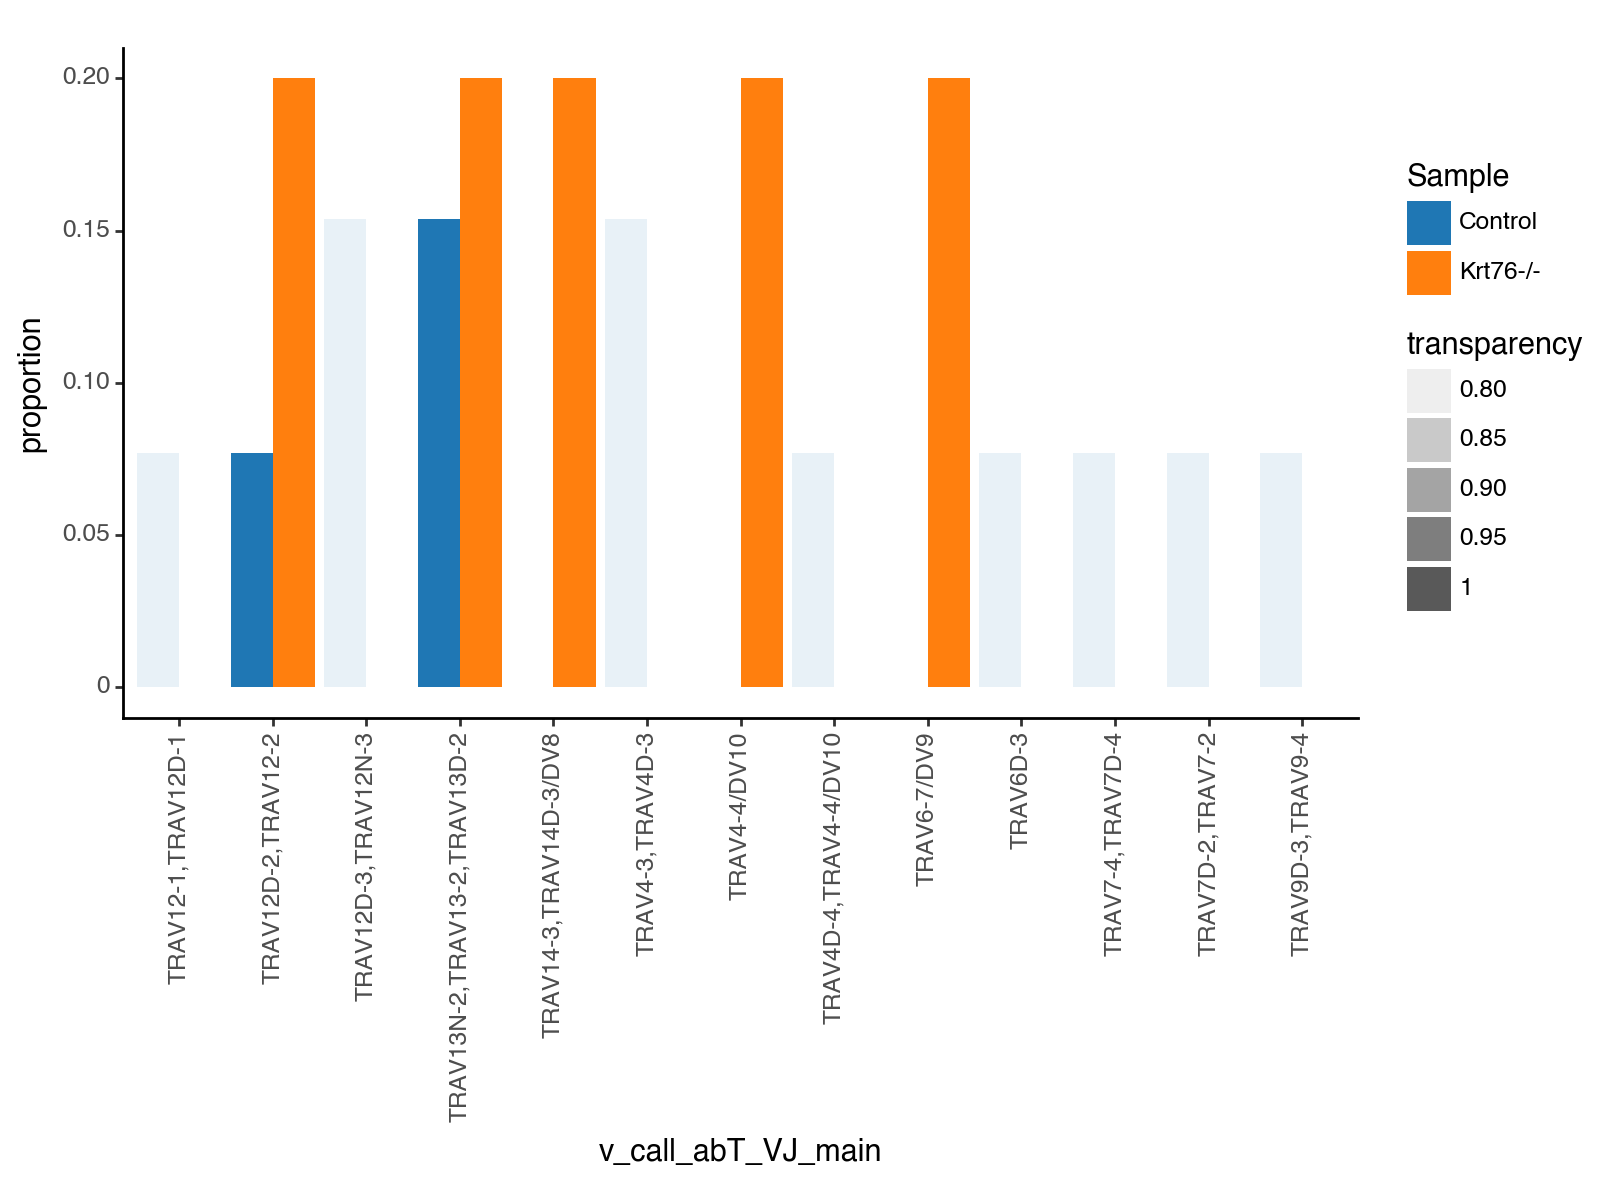

<Figure Size: (800 x 600)>

In [391]:
p

In [392]:
p.save("VgeneAlphaChain_DN2a_NP_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2a_NP_181223.pdf


### DN2b - V gene alpha chain

In [393]:
adata_NPF_DN2b = adata_NPF[adata_NPF.obs["leiden"] == "12 DN2b 1"]

In [394]:
adata_NPF_DN2b

View of AnnData object with n_obs × n_vars = 8 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [395]:
working_df = pd.DataFrame(adata_NPF_DN2b.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main        
Control  TRAV12D-2,TRAV12-2       1
         TRAV13-1                 1
         TRAV4-4/DV10             1
         TRAV13-4/DV7             0
         TRAV14-2                 0
         TRAV16D/DV11,TRAV16      0
         TRAV9N-4                 0
Krt76-/- TRAV13-1                 1
         TRAV13-4/DV7             1
         TRAV14-2                 1
         TRAV16D/DV11,TRAV16      1
         TRAV9N-4                 1
         TRAV12D-2,TRAV12-2       0
         TRAV4-4/DV10             0

In [396]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control   TRAV12D-2,TRAV12-2       1
1    Control             TRAV13-1       1
2    Control         TRAV4-4/DV10       1
3    Control         TRAV13-4/DV7       0
4    Control             TRAV14-2       0
5    Control  TRAV16D/DV11,TRAV16       0
6    Control             TRAV9N-4       0
7   Krt76-/-             TRAV13-1       1
8   Krt76-/-         TRAV13-4/DV7       1
9   Krt76-/-             TRAV14-2       1
10  Krt76-/-  TRAV16D/DV11,TRAV16       1
11  Krt76-/-             TRAV9N-4       1
12  Krt76-/-   TRAV12D-2,TRAV12-2       0
13  Krt76-/-         TRAV4-4/DV10       0

In [397]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [398]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [399]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control   TRAV12D-2,TRAV12-2       1    0.333333
1    Control             TRAV13-1       1    0.333333
2    Control         TRAV4-4/DV10       1    0.333333
3    Control         TRAV13-4/DV7       0    0.000000
4    Control             TRAV14-2       0    0.000000
5    Control  TRAV16D/DV11,TRAV16       0    0.000000
6    Control             TRAV9N-4       0    0.000000
7   Krt76-/-             TRAV13-1       1    0.200000
8   Krt76-/-         TRAV13-4/DV7       1    0.200000
9   Krt76-/-             TRAV14-2       1    0.200000
10  Krt76-/-  TRAV16D/DV11,TRAV16       1    0.200000
11  Krt76-/-             TRAV9N-4       1    0.200000
12  Krt76-/-   TRAV12D-2,TRAV12-2       0    0.000000
13  Krt76-/-         TRAV4-4/DV10       0    0.000000

In [400]:
working_control = working_df[working_df["Sample"] == "Control"]

In [401]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [402]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [403]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [404]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV12D-2,TRAV12-2': 0.0,
 'TRAV13-1': 0.6000000000000001,
 'TRAV13-4/DV7': inf,
 'TRAV14-2': inf,
 'TRAV16D/DV11,TRAV16': inf,
 'TRAV4-4/DV10': 0.0,
 'TRAV9N-4': inf}

In [405]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control   TRAV12D-2,TRAV12-2       1    0.333333         0.0
1    Control             TRAV13-1       1    0.333333         0.6
2    Control         TRAV4-4/DV10       1    0.333333         0.0
3    Control         TRAV13-4/DV7       0    0.000000         inf
4    Control             TRAV14-2       0    0.000000         inf
5    Control  TRAV16D/DV11,TRAV16       0    0.000000         inf
6    Control             TRAV9N-4       0    0.000000         inf
7   Krt76-/-             TRAV13-1       1    0.200000         0.6
8   Krt76-/-         TRAV13-4/DV7       1    0.200000         inf
9   Krt76-/-             TRAV14-2       1    0.200000         inf
10  Krt76-/-  TRAV16D/DV11,TRAV16       1    0.200000         inf
11  Krt76-/-             TRAV9N-4       1    0.200000         inf
12  Krt76-/-   TRAV12D-2,TRAV12-2       0    0.000000         0.0
13  Krt76-/-         TRAV4-4/DV10       0    0.000000         0.0

In [406]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [415]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

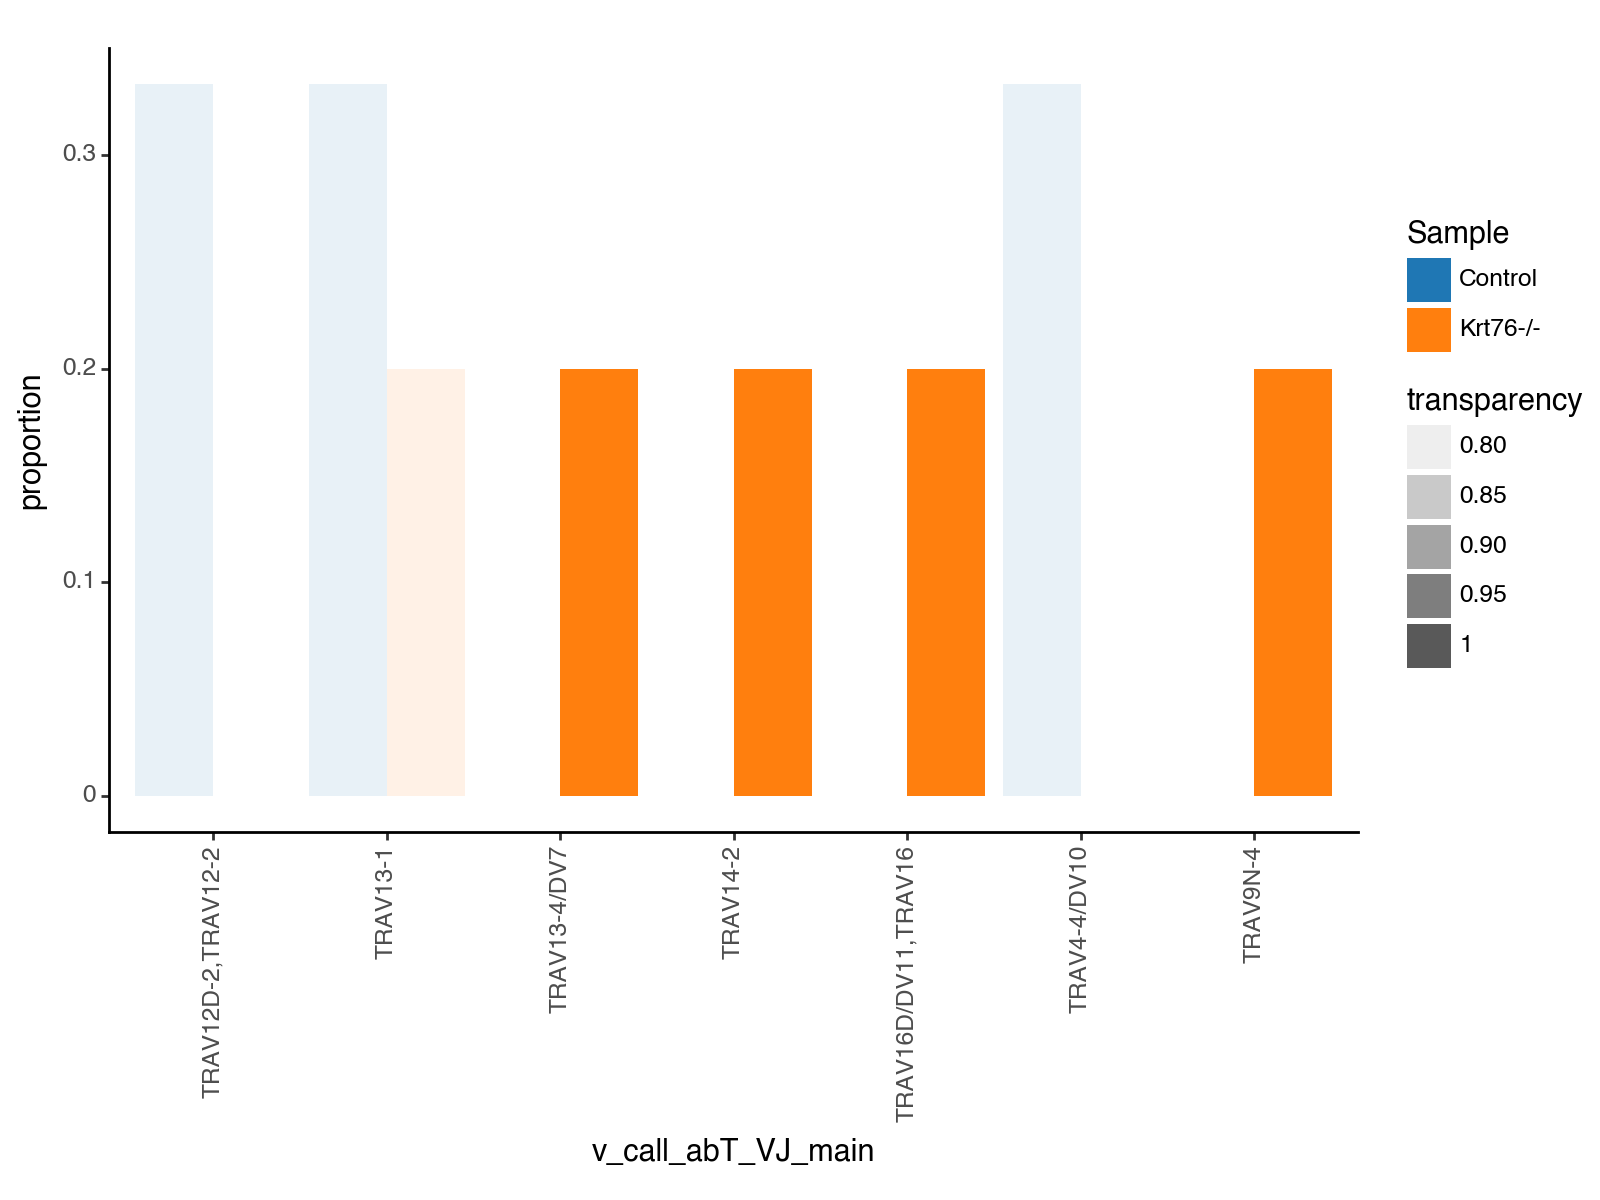

<Figure Size: (800 x 600)>

In [416]:
p

In [418]:
p.save("VgeneAlphaChain_DN2b_181223_2.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2b_181223_2.pdf


### DN2b 2 - V gene alpha chain

In [419]:
adata_NPF_DN2b2 = adata_NPF[adata_NPF.obs["leiden"] == "4 DN2b 2"]

In [420]:
adata_NPF_DN2b2

View of AnnData object with n_obs × n_vars = 65 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [421]:
working_df = pd.DataFrame(adata_NPF_DN2b2.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main                 
Control  TRAV4D-4,TRAV4N-4                 7
         TRAV16D/DV11,TRAV16               3
         TRAV5-1                           3
         TRAV12D-2,TRAV12-2                2
         TRAV12N-1,TRAV12-1,TRAV12D-1      2
...                                      ...
Krt76-/- TRAV14-2                          0
         TRAV13-4/DV7                      0
         TRAV13-1                          0
         TRAV11D,TRAV11                    0
         TRAV9D-1                          0

[72 rows x 1 columns]

In [422]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample            v_call_abT_VJ_main  counts
0    Control             TRAV4D-4,TRAV4N-4       7
1    Control           TRAV16D/DV11,TRAV16       3
2    Control                       TRAV5-1       3
3    Control            TRAV12D-2,TRAV12-2       2
4    Control  TRAV12N-1,TRAV12-1,TRAV12D-1       2
..       ...                           ...     ...
67  Krt76-/-                      TRAV14-2       0
68  Krt76-/-                  TRAV13-4/DV7       0
69  Krt76-/-                      TRAV13-1       0
70  Krt76-/-                TRAV11D,TRAV11       0
71  Krt76-/-                      TRAV9D-1       0

[72 rows x 3 columns]

In [423]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 34, 'Krt76-/-': 31}

In [424]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [425]:
working_df

Sample            v_call_abT_VJ_main  counts  proportion
0    Control             TRAV4D-4,TRAV4N-4       7    0.205882
1    Control           TRAV16D/DV11,TRAV16       3    0.088235
2    Control                       TRAV5-1       3    0.088235
3    Control            TRAV12D-2,TRAV12-2       2    0.058824
4    Control  TRAV12N-1,TRAV12-1,TRAV12D-1       2    0.058824
..       ...                           ...     ...         ...
67  Krt76-/-                      TRAV14-2       0    0.000000
68  Krt76-/-                  TRAV13-4/DV7       0    0.000000
69  Krt76-/-                      TRAV13-1       0    0.000000
70  Krt76-/-                TRAV11D,TRAV11       0    0.000000
71  Krt76-/-                      TRAV9D-1       0    0.000000

[72 rows x 4 columns]

In [426]:
working_control = working_df[working_df["Sample"] == "Control"]

In [427]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [428]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [429]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [430]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV10': 1.096774193548387,
 'TRAV10D': inf,
 'TRAV11D,TRAV11': 0.0,
 'TRAV12-1,TRAV12D-1': inf,
 'TRAV12-3': 2.193548387096774,
 'TRAV12D-2,TRAV12-2': 1.096774193548387,
 'TRAV12D-3,TRAV12N-3': inf,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 0.5483870967741935,
 'TRAV13-1': 0.0,
 'TRAV13-2': inf,
 'TRAV13-4/DV7': 0.0,
 'TRAV14-2': 0.0,
 'TRAV14-2,TRAV14N-2,TRAV14D-2': inf,
 'TRAV14N-1,TRAV14D-1': inf,
 'TRAV14N-3,TRAV14D-3/DV8': 0.0,
 'TRAV16D/DV11,TRAV16': 0.0,
 'TRAV17': inf,
 'TRAV18': inf,
 'TRAV2': inf,
 'TRAV3N-3,TRAV3D-3': 1.096774193548387,
 'TRAV4-3,TRAV4D-3': 0.0,
 'TRAV4D-2': inf,
 'TRAV4D-4,TRAV4-4/DV10': 0.0,
 'TRAV4D-4,TRAV4N-4': 0.0,
 'TRAV4N-3,TRAV4D-3': inf,
 'TRAV5-1': 0.3655913978494623,
 'TRAV5-4': inf,
 'TRAV6-6,TRAV6D-6': 1.096774193548387,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-4': 0.0,
 'TRAV6D-7,TRAV6N-7': 0.5483870967741935,
 'TRAV7-4,TRAV7D-4': inf,
 'TRAV7D-5,TRAV7N-5': 0.0,
 'TRAV8D-1': inf,
 'TRAV9D-1': 0.0}

In [432]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample            v_call_abT_VJ_main  counts  proportion  transparency   
0    Control             TRAV4D-4,TRAV4N-4       7    0.205882           0.8  \
1    Control           TRAV16D/DV11,TRAV16       3    0.088235           0.8   
2    Control                       TRAV5-1       3    0.088235           0.8   
3    Control            TRAV12D-2,TRAV12-2       2    0.058824           0.8   
4    Control  TRAV12N-1,TRAV12-1,TRAV12D-1       2    0.058824           0.8   
..       ...                           ...     ...         ...           ...   
67  Krt76-/-                      TRAV14-2       0    0.000000           0.8   
68  Krt76-/-                  TRAV13-4/DV7       0    0.000000           0.8   
69  Krt76-/-                      TRAV13-1       0    0.000000           0.8   
70  Krt76-/-                TRAV11D,TRAV11       0    0.000000           0.8   
71  Krt76-/-                      TRAV9D-1       0    0.000000           0.8   

    foldchange  
0     0.000000  
1     0.000000  
2     0.365591  
3     1.096774  
4     0.548387  
..         ...  
67    0.000000  
68    0.000000  
69    0.000000  
70    0.000000  
71    0.000000  

[72 rows x 6 columns]

In [433]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [434]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [435]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

In [438]:
options.figure_size = (20,14)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

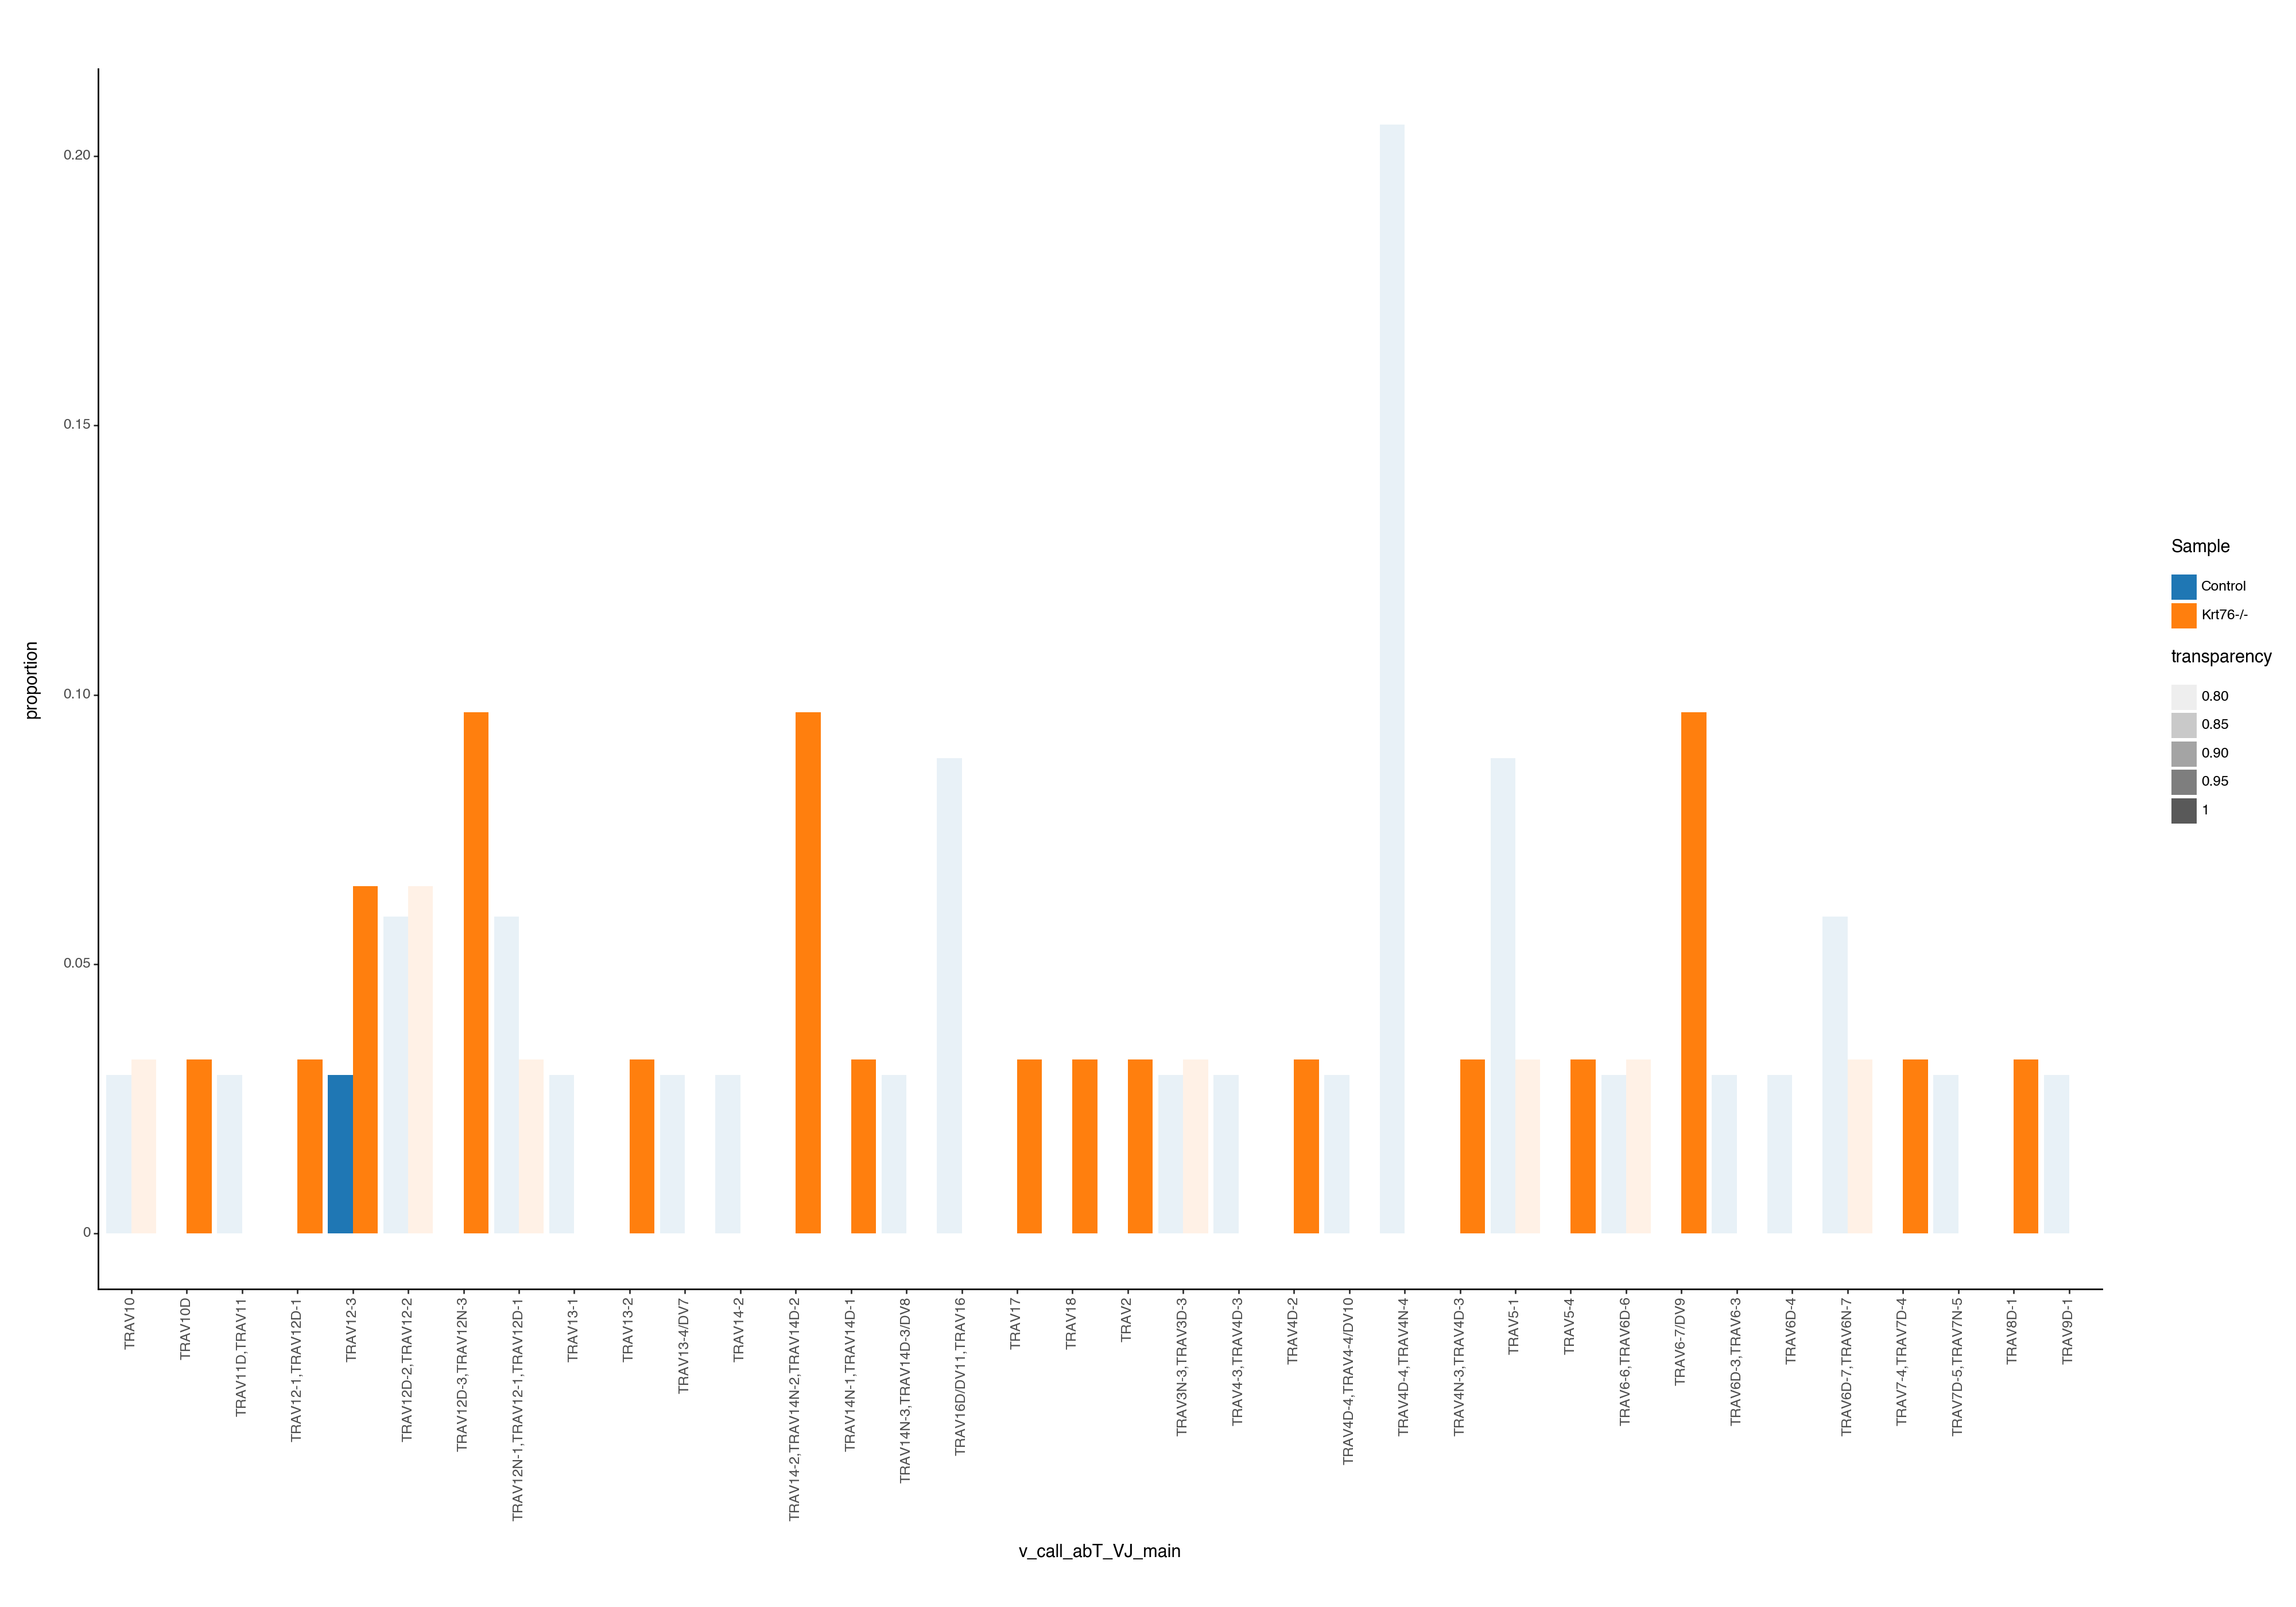

<Figure Size: (2000 x 1400)>

In [439]:
p

In [440]:
p.save("VgeneAlphaChain_DN2b2_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN2b2_181223.pdf


### DN3 - V gene alpha chain

In [441]:
adata_NPF_DN3 = adata_NPF[adata_NPF.obs["leiden"] == "10 DN3"]

In [442]:
adata_NPF_DN3

View of AnnData object with n_obs × n_vars = 7 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [443]:
working_df = pd.DataFrame(adata_NPF_DN3.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main                    
Control  TRAV12-1,TRAV12D-1                   1
         TRAV12-3                             1
         TRAV5-4                              1
         TRAV7-1                              1
         TRAV8D-2                             1
         TRAV13-2                             0
         TRAV15D-2/DV6D-2,TRAV15-2/DV6-2      0
Krt76-/- TRAV13-2                             1
         TRAV15D-2/DV6D-2,TRAV15-2/DV6-2      1
         TRAV12-1,TRAV12D-1                   0
         TRAV12-3                             0
         TRAV5-4                              0
         TRAV7-1                              0
         TRAV8D-2                             0

In [444]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample               v_call_abT_VJ_main  counts
0    Control               TRAV12-1,TRAV12D-1       1
1    Control                         TRAV12-3       1
2    Control                          TRAV5-4       1
3    Control                          TRAV7-1       1
4    Control                         TRAV8D-2       1
5    Control                         TRAV13-2       0
6    Control  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       0
7   Krt76-/-                         TRAV13-2       1
8   Krt76-/-  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       1
9   Krt76-/-               TRAV12-1,TRAV12D-1       0
10  Krt76-/-                         TRAV12-3       0
11  Krt76-/-                          TRAV5-4       0
12  Krt76-/-                          TRAV7-1       0
13  Krt76-/-                         TRAV8D-2       0

In [445]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 5, 'Krt76-/-': 2}

In [446]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [447]:
working_df

Sample               v_call_abT_VJ_main  counts  proportion
0    Control               TRAV12-1,TRAV12D-1       1         0.2
1    Control                         TRAV12-3       1         0.2
2    Control                          TRAV5-4       1         0.2
3    Control                          TRAV7-1       1         0.2
4    Control                         TRAV8D-2       1         0.2
5    Control                         TRAV13-2       0         0.0
6    Control  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       0         0.0
7   Krt76-/-                         TRAV13-2       1         0.5
8   Krt76-/-  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       1         0.5
9   Krt76-/-               TRAV12-1,TRAV12D-1       0         0.0
10  Krt76-/-                         TRAV12-3       0         0.0
11  Krt76-/-                          TRAV5-4       0         0.0
12  Krt76-/-                          TRAV7-1       0         0.0
13  Krt76-/-                         TRAV8D-2       0         0.0

In [448]:
working_control = working_df[working_df["Sample"] == "Control"]

In [449]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [450]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [451]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [452]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV12-1,TRAV12D-1': 0.0,
 'TRAV12-3': 0.0,
 'TRAV13-2': inf,
 'TRAV15D-2/DV6D-2,TRAV15-2/DV6-2': inf,
 'TRAV5-4': 0.0,
 'TRAV7-1': 0.0,
 'TRAV8D-2': 0.0}

In [453]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample               v_call_abT_VJ_main  counts  proportion  foldchange
0    Control               TRAV12-1,TRAV12D-1       1         0.2         0.0
1    Control                         TRAV12-3       1         0.2         0.0
2    Control                          TRAV5-4       1         0.2         0.0
3    Control                          TRAV7-1       1         0.2         0.0
4    Control                         TRAV8D-2       1         0.2         0.0
5    Control                         TRAV13-2       0         0.0         inf
6    Control  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       0         0.0         inf
7   Krt76-/-                         TRAV13-2       1         0.5         inf
8   Krt76-/-  TRAV15D-2/DV6D-2,TRAV15-2/DV6-2       1         0.5         inf
9   Krt76-/-               TRAV12-1,TRAV12D-1       0         0.0         0.0
10  Krt76-/-                         TRAV12-3       0         0.0         0.0
11  Krt76-/-                          TRAV5-4       0         0.0         0.0
12  Krt76-/-                          TRAV7-1       0         0.0         0.0
13  Krt76-/-                         TRAV8D-2       0         0.0         0.0

In [454]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [459]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

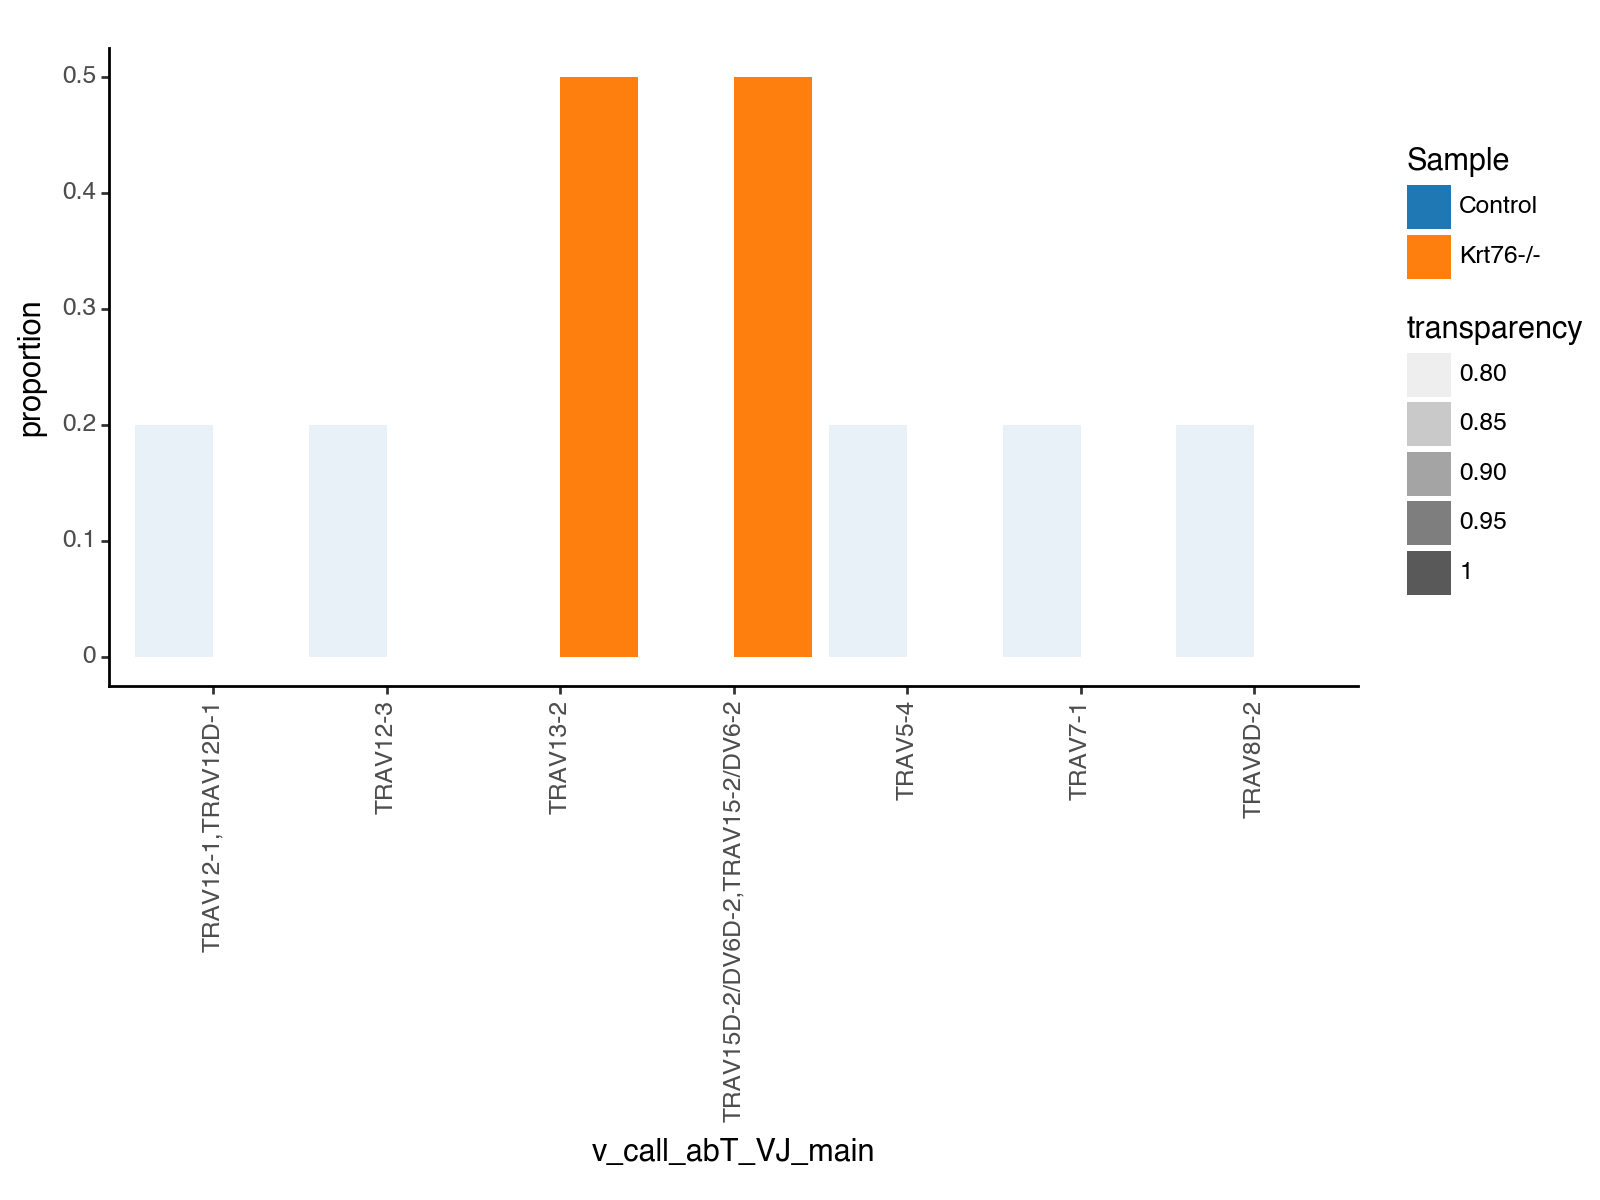

<Figure Size: (800 x 600)>

In [460]:
p

In [461]:
p.save("VgeneAlphaChain_DN3_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3_181223.pdf


### 0 DN3a - V gene alpha chain

In [462]:
adata_NPF_DN3a = adata_NPF[adata_NPF.obs["leiden"] == "0 DN3a"]

In [463]:
adata_NPF_DN3a

View of AnnData object with n_obs × n_vars = 30 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [464]:
working_df = pd.DataFrame(adata_NPF_DN3a.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main        
Control  TRAV1                    1
         TRAV6D-7,TRAV6N-7        1
         TRAV7D-2,TRAV7-2         1
         TRAV8-1                  1
         TRAV9N-4                 1
         TRAV10                   1
         TRAV7-3                  1
         TRAV13D-1                1
         TRAV13-1                 1
         TRAV10N                  1
         TRAV13N-2,TRAV13D-2      1
         TRAV4N-3,TRAV4D-3        1
         TRAV4D-4,TRAV4N-4        1
         TRAV6-5                  1
         TRAV4-3,TRAV4D-3         1
         TRAV12N-2,TRAV12D-2      1
         TRAV15-2/DV6-2           1
         TRAV13-2                 0
         TRAV6D-3                 0
         TRAV14-1                 0
         TRAV14N-1,TRAV14D-1      0
         TRAV4-2                  0
         TRAV9-2                  0
         TRAV5-1                  0
         TRAV6-1                  0
Krt76-/- TRAV13-1                 2
         TRAV10N                  1
         TRAV13-2                 1
         TRAV14-1                 1
         TRAV14N-1,TRAV14D-1      1
         TRAV4-2                  1
         TRAV4-3,TRAV4D-3         1
         TRAV5-1                  1
         TRAV6-1                  1
         TRAV6D-3                 1
         TRAV9-2                  1
         TRAV9N-4                 1
         TRAV4N-3,TRAV4D-3        0
         TRAV6-5                  0
         TRAV4D-4,TRAV4N-4        0
         TRAV7-3                  0
         TRAV7D-2,TRAV7-2         0
         TRAV8-1                  0
         TRAV6D-7,TRAV6N-7        0
         TRAV15-2/DV6-2           0
         TRAV13N-2,TRAV13D-2      0
         TRAV13D-1                0
         TRAV12N-2,TRAV12D-2      0
         TRAV10                   0
         TRAV1                    0

In [465]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control                TRAV1       1
1    Control    TRAV6D-7,TRAV6N-7       1
2    Control     TRAV7D-2,TRAV7-2       1
3    Control              TRAV8-1       1
4    Control             TRAV9N-4       1
5    Control               TRAV10       1
6    Control              TRAV7-3       1
7    Control            TRAV13D-1       1
8    Control             TRAV13-1       1
9    Control              TRAV10N       1
10   Control  TRAV13N-2,TRAV13D-2       1
11   Control    TRAV4N-3,TRAV4D-3       1
12   Control    TRAV4D-4,TRAV4N-4       1
13   Control              TRAV6-5       1
14   Control     TRAV4-3,TRAV4D-3       1
15   Control  TRAV12N-2,TRAV12D-2       1
16   Control       TRAV15-2/DV6-2       1
17   Control             TRAV13-2       0
18   Control             TRAV6D-3       0
19   Control             TRAV14-1       0
20   Control  TRAV14N-1,TRAV14D-1       0
21   Control              TRAV4-2       0
22   Control              TRAV9-2       0
23   Control              TRAV5-1       0
24   Control              TRAV6-1       0
25  Krt76-/-             TRAV13-1       2
26  Krt76-/-              TRAV10N       1
27  Krt76-/-             TRAV13-2       1
28  Krt76-/-             TRAV14-1       1
29  Krt76-/-  TRAV14N-1,TRAV14D-1       1
30  Krt76-/-              TRAV4-2       1
31  Krt76-/-     TRAV4-3,TRAV4D-3       1
32  Krt76-/-              TRAV5-1       1
33  Krt76-/-              TRAV6-1       1
34  Krt76-/-             TRAV6D-3       1
35  Krt76-/-              TRAV9-2       1
36  Krt76-/-             TRAV9N-4       1
37  Krt76-/-    TRAV4N-3,TRAV4D-3       0
38  Krt76-/-              TRAV6-5       0
39  Krt76-/-    TRAV4D-4,TRAV4N-4       0
40  Krt76-/-              TRAV7-3       0
41  Krt76-/-     TRAV7D-2,TRAV7-2       0
42  Krt76-/-              TRAV8-1       0
43  Krt76-/-    TRAV6D-7,TRAV6N-7       0
44  Krt76-/-       TRAV15-2/DV6-2       0
45  Krt76-/-  TRAV13N-2,TRAV13D-2       0
46  Krt76-/-            TRAV13D-1       0
47  Krt76-/-  TRAV12N-2,TRAV12D-2       0
48  Krt76-/-               TRAV10       0
49  Krt76-/-                TRAV1       0

In [466]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 17, 'Krt76-/-': 13}

In [467]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [468]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control                TRAV1       1    0.058824
1    Control    TRAV6D-7,TRAV6N-7       1    0.058824
2    Control     TRAV7D-2,TRAV7-2       1    0.058824
3    Control              TRAV8-1       1    0.058824
4    Control             TRAV9N-4       1    0.058824
5    Control               TRAV10       1    0.058824
6    Control              TRAV7-3       1    0.058824
7    Control            TRAV13D-1       1    0.058824
8    Control             TRAV13-1       1    0.058824
9    Control              TRAV10N       1    0.058824
10   Control  TRAV13N-2,TRAV13D-2       1    0.058824
11   Control    TRAV4N-3,TRAV4D-3       1    0.058824
12   Control    TRAV4D-4,TRAV4N-4       1    0.058824
13   Control              TRAV6-5       1    0.058824
14   Control     TRAV4-3,TRAV4D-3       1    0.058824
15   Control  TRAV12N-2,TRAV12D-2       1    0.058824
16   Control       TRAV15-2/DV6-2       1    0.058824
17   Control             TRAV13-2       0    0.000000
18   Control             TRAV6D-3       0    0.000000
19   Control             TRAV14-1       0    0.000000
20   Control  TRAV14N-1,TRAV14D-1       0    0.000000
21   Control              TRAV4-2       0    0.000000
22   Control              TRAV9-2       0    0.000000
23   Control              TRAV5-1       0    0.000000
24   Control              TRAV6-1       0    0.000000
25  Krt76-/-             TRAV13-1       2    0.153846
26  Krt76-/-              TRAV10N       1    0.076923
27  Krt76-/-             TRAV13-2       1    0.076923
28  Krt76-/-             TRAV14-1       1    0.076923
29  Krt76-/-  TRAV14N-1,TRAV14D-1       1    0.076923
30  Krt76-/-              TRAV4-2       1    0.076923
31  Krt76-/-     TRAV4-3,TRAV4D-3       1    0.076923
32  Krt76-/-              TRAV5-1       1    0.076923
33  Krt76-/-              TRAV6-1       1    0.076923
34  Krt76-/-             TRAV6D-3       1    0.076923
35  Krt76-/-              TRAV9-2       1    0.076923
36  Krt76-/-             TRAV9N-4       1    0.076923
37  Krt76-/-    TRAV4N-3,TRAV4D-3       0    0.000000
38  Krt76-/-              TRAV6-5       0    0.000000
39  Krt76-/-    TRAV4D-4,TRAV4N-4       0    0.000000
40  Krt76-/-              TRAV7-3       0    0.000000
41  Krt76-/-     TRAV7D-2,TRAV7-2       0    0.000000
42  Krt76-/-              TRAV8-1       0    0.000000
43  Krt76-/-    TRAV6D-7,TRAV6N-7       0    0.000000
44  Krt76-/-       TRAV15-2/DV6-2       0    0.000000
45  Krt76-/-  TRAV13N-2,TRAV13D-2       0    0.000000
46  Krt76-/-            TRAV13D-1       0    0.000000
47  Krt76-/-  TRAV12N-2,TRAV12D-2       0    0.000000
48  Krt76-/-               TRAV10       0    0.000000
49  Krt76-/-                TRAV1       0    0.000000

In [469]:
working_control = working_df[working_df["Sample"] == "Control"]

In [470]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [471]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [472]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [473]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV10': 0.0,
 'TRAV10N': 1.3076923076923077,
 'TRAV12N-2,TRAV12D-2': 0.0,
 'TRAV13-1': 2.6153846153846154,
 'TRAV13-2': inf,
 'TRAV13D-1': 0.0,
 'TRAV13N-2,TRAV13D-2': 0.0,
 'TRAV14-1': inf,
 'TRAV14N-1,TRAV14D-1': inf,
 'TRAV15-2/DV6-2': 0.0,
 'TRAV4-2': inf,
 'TRAV4-3,TRAV4D-3': 1.3076923076923077,
 'TRAV4D-4,TRAV4N-4': 0.0,
 'TRAV4N-3,TRAV4D-3': 0.0,
 'TRAV5-1': inf,
 'TRAV6-1': inf,
 'TRAV6-5': 0.0,
 'TRAV6D-3': inf,
 'TRAV6D-7,TRAV6N-7': 0.0,
 'TRAV7-3': 0.0,
 'TRAV7D-2,TRAV7-2': 0.0,
 'TRAV8-1': 0.0,
 'TRAV9-2': inf,
 'TRAV9N-4': 1.3076923076923077}

In [474]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                TRAV1       1    0.058824    0.000000
1    Control    TRAV6D-7,TRAV6N-7       1    0.058824    0.000000
2    Control     TRAV7D-2,TRAV7-2       1    0.058824    0.000000
3    Control              TRAV8-1       1    0.058824    0.000000
4    Control             TRAV9N-4       1    0.058824    1.307692
5    Control               TRAV10       1    0.058824    0.000000
6    Control              TRAV7-3       1    0.058824    0.000000
7    Control            TRAV13D-1       1    0.058824    0.000000
8    Control             TRAV13-1       1    0.058824    2.615385
9    Control              TRAV10N       1    0.058824    1.307692
10   Control  TRAV13N-2,TRAV13D-2       1    0.058824    0.000000
11   Control    TRAV4N-3,TRAV4D-3       1    0.058824    0.000000
12   Control    TRAV4D-4,TRAV4N-4       1    0.058824    0.000000
13   Control              TRAV6-5       1    0.058824    0.000000
14   Control     TRAV4-3,TRAV4D-3       1    0.058824    1.307692
15   Control  TRAV12N-2,TRAV12D-2       1    0.058824    0.000000
16   Control       TRAV15-2/DV6-2       1    0.058824    0.000000
17   Control             TRAV13-2       0    0.000000         inf
18   Control             TRAV6D-3       0    0.000000         inf
19   Control             TRAV14-1       0    0.000000         inf
20   Control  TRAV14N-1,TRAV14D-1       0    0.000000         inf
21   Control              TRAV4-2       0    0.000000         inf
22   Control              TRAV9-2       0    0.000000         inf
23   Control              TRAV5-1       0    0.000000         inf
24   Control              TRAV6-1       0    0.000000         inf
25  Krt76-/-             TRAV13-1       2    0.153846    2.615385
26  Krt76-/-              TRAV10N       1    0.076923    1.307692
27  Krt76-/-             TRAV13-2       1    0.076923         inf
28  Krt76-/-             TRAV14-1       1    0.076923         inf
29  Krt76-/-  TRAV14N-1,TRAV14D-1       1    0.076923         inf
30  Krt76-/-              TRAV4-2       1    0.076923         inf
31  Krt76-/-     TRAV4-3,TRAV4D-3       1    0.076923    1.307692
32  Krt76-/-              TRAV5-1       1    0.076923         inf
33  Krt76-/-              TRAV6-1       1    0.076923         inf
34  Krt76-/-             TRAV6D-3       1    0.076923         inf
35  Krt76-/-              TRAV9-2       1    0.076923         inf
36  Krt76-/-             TRAV9N-4       1    0.076923    1.307692
37  Krt76-/-    TRAV4N-3,TRAV4D-3       0    0.000000    0.000000
38  Krt76-/-              TRAV6-5       0    0.000000    0.000000
39  Krt76-/-    TRAV4D-4,TRAV4N-4       0    0.000000    0.000000
40  Krt76-/-              TRAV7-3       0    0.000000    0.000000
41  Krt76-/-     TRAV7D-2,TRAV7-2       0    0.000000    0.000000
42  Krt76-/-              TRAV8-1       0    0.000000    0.000000
43  Krt76-/-    TRAV6D-7,TRAV6N-7       0    0.000000    0.000000
44  Krt76-/-       TRAV15-2/DV6-2       0    0.000000    0.000000
45  Krt76-/-  TRAV13N-2,TRAV13D-2       0    0.000000    0.000000
46  Krt76-/-            TRAV13D-1       0    0.000000    0.000000
47  Krt76-/-  TRAV12N-2,TRAV12D-2       0    0.000000    0.000000
48  Krt76-/-               TRAV10       0    0.000000    0.000000
49  Krt76-/-                TRAV1       0    0.000000    0.000000

In [475]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [476]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

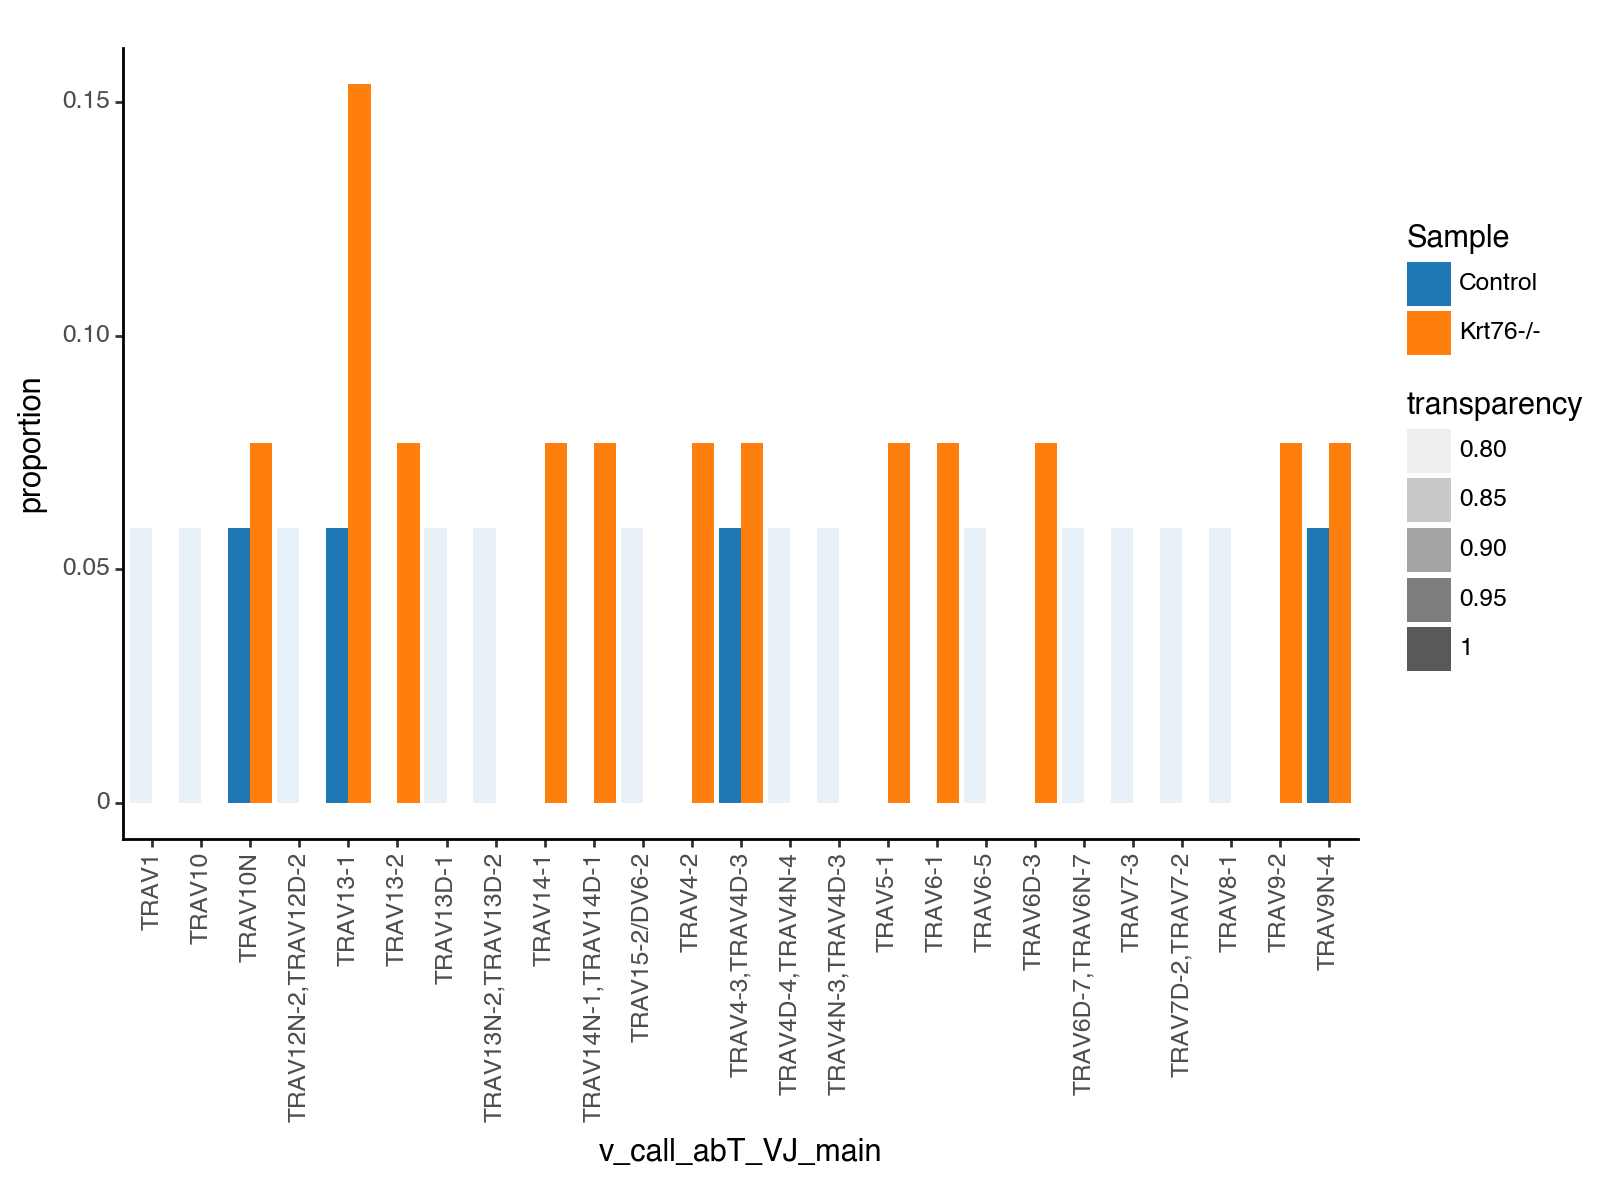

<Figure Size: (800 x 600)>

In [477]:
p

In [478]:
p.save("VgeneAlphaChain_DN3a_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3a_181223.pdf


### DN3a / DN3b - V gene alpha chain

In [479]:
adata_NPF_DN3aDN3b = adata_NPF[adata_NPF.obs["leiden"] == "1 DN3a / DN3b"]

In [480]:
adata_NPF_DN3aDN3b

View of AnnData object with n_obs × n_vars = 43 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [481]:
working_df = pd.DataFrame(adata_NPF_DN3aDN3b.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main               
Control  TRAV4N-3,TRAV4D-3               2
         TRAV3N-3,TRAV3D-3               2
         TRAV7-4,TRAV7D-4                1
         TRAV7-5                         1
         TRAV7N-4                        1
...                                    ...
Krt76-/- TRAV13-1                        0
         TRAV14-2                        0
         TRAV14N-3,TRAV14D-3/DV8         0
         TRAV15N-1,TRAV15D-1/DV6D-1      0
         TRAV10                          0

[72 rows x 1 columns]

In [482]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample          v_call_abT_VJ_main  counts
0    Control           TRAV4N-3,TRAV4D-3       2
1    Control           TRAV3N-3,TRAV3D-3       2
2    Control            TRAV7-4,TRAV7D-4       1
3    Control                     TRAV7-5       1
4    Control                    TRAV7N-4       1
..       ...                         ...     ...
67  Krt76-/-                    TRAV13-1       0
68  Krt76-/-                    TRAV14-2       0
69  Krt76-/-     TRAV14N-3,TRAV14D-3/DV8       0
70  Krt76-/-  TRAV15N-1,TRAV15D-1/DV6D-1       0
71  Krt76-/-                      TRAV10       0

[72 rows x 3 columns]

In [483]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 26, 'Krt76-/-': 17}

In [484]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [485]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control           TRAV4N-3,TRAV4D-3       2    0.076923
1    Control           TRAV3N-3,TRAV3D-3       2    0.076923
2    Control            TRAV7-4,TRAV7D-4       1    0.038462
3    Control                     TRAV7-5       1    0.038462
4    Control                    TRAV7N-4       1    0.038462
..       ...                         ...     ...         ...
67  Krt76-/-                    TRAV13-1       0    0.000000
68  Krt76-/-                    TRAV14-2       0    0.000000
69  Krt76-/-     TRAV14N-3,TRAV14D-3/DV8       0    0.000000
70  Krt76-/-  TRAV15N-1,TRAV15D-1/DV6D-1       0    0.000000
71  Krt76-/-                      TRAV10       0    0.000000

[72 rows x 4 columns]

In [486]:
working_control = working_df[working_df["Sample"] == "Control"]

In [487]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [488]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [489]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [490]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV10': 0.0,
 'TRAV10D,TRAV10N': inf,
 'TRAV11N': 0.0,
 'TRAV12D-2,TRAV12-2': 0.0,
 'TRAV12D-3,TRAV12N-3': 1.5294117647058822,
 'TRAV12N-2,TRAV12D-2': 0.0,
 'TRAV13-1': 0.0,
 'TRAV13N-2,TRAV13-2,TRAV13D-2': inf,
 'TRAV14-1': inf,
 'TRAV14-2': 0.0,
 'TRAV14-3,TRAV14D-3/DV8': inf,
 'TRAV14N-3,TRAV14D-3/DV8': 0.0,
 'TRAV15N-1,TRAV15D-1/DV6D-1': 0.0,
 'TRAV15N-2,TRAV15D-2/DV6D-2': 0.0,
 'TRAV16D/DV11,TRAV16': inf,
 'TRAV21/DV12': inf,
 'TRAV3-3': 0.0,
 'TRAV3N-3,TRAV3D-3': 0.0,
 'TRAV4-4/DV10': 0.0,
 'TRAV4N-3,TRAV4D-3': 0.0,
 'TRAV5-1': 0.0,
 'TRAV5-4': 0.0,
 'TRAV5N-4,TRAV5D-4': inf,
 'TRAV6-7/DV9': inf,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-5': inf,
 'TRAV6D-5,TRAV6N-5': 0.0,
 'TRAV6D-7,TRAV6N-7': inf,
 'TRAV6N-6': 0.0,
 'TRAV7-3': inf,
 'TRAV7-4,TRAV7D-4': 1.5294117647058822,
 'TRAV7-5': 1.5294117647058822,
 'TRAV7-6': inf,
 'TRAV7N-4': 0.0,
 'TRAV8D-1': 0.0,
 'TRAV8N-2': 3.0588235294117645}

In [491]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample          v_call_abT_VJ_main  counts  proportion  foldchange
0    Control           TRAV4N-3,TRAV4D-3       2    0.076923    0.000000
1    Control           TRAV3N-3,TRAV3D-3       2    0.076923    0.000000
2    Control            TRAV7-4,TRAV7D-4       1    0.038462    1.529412
3    Control                     TRAV7-5       1    0.038462    1.529412
4    Control                    TRAV7N-4       1    0.038462    0.000000
..       ...                         ...     ...         ...         ...
67  Krt76-/-                    TRAV13-1       0    0.000000    0.000000
68  Krt76-/-                    TRAV14-2       0    0.000000    0.000000
69  Krt76-/-     TRAV14N-3,TRAV14D-3/DV8       0    0.000000    0.000000
70  Krt76-/-  TRAV15N-1,TRAV15D-1/DV6D-1       0    0.000000    0.000000
71  Krt76-/-                      TRAV10       0    0.000000    0.000000

[72 rows x 5 columns]

In [492]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [493]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

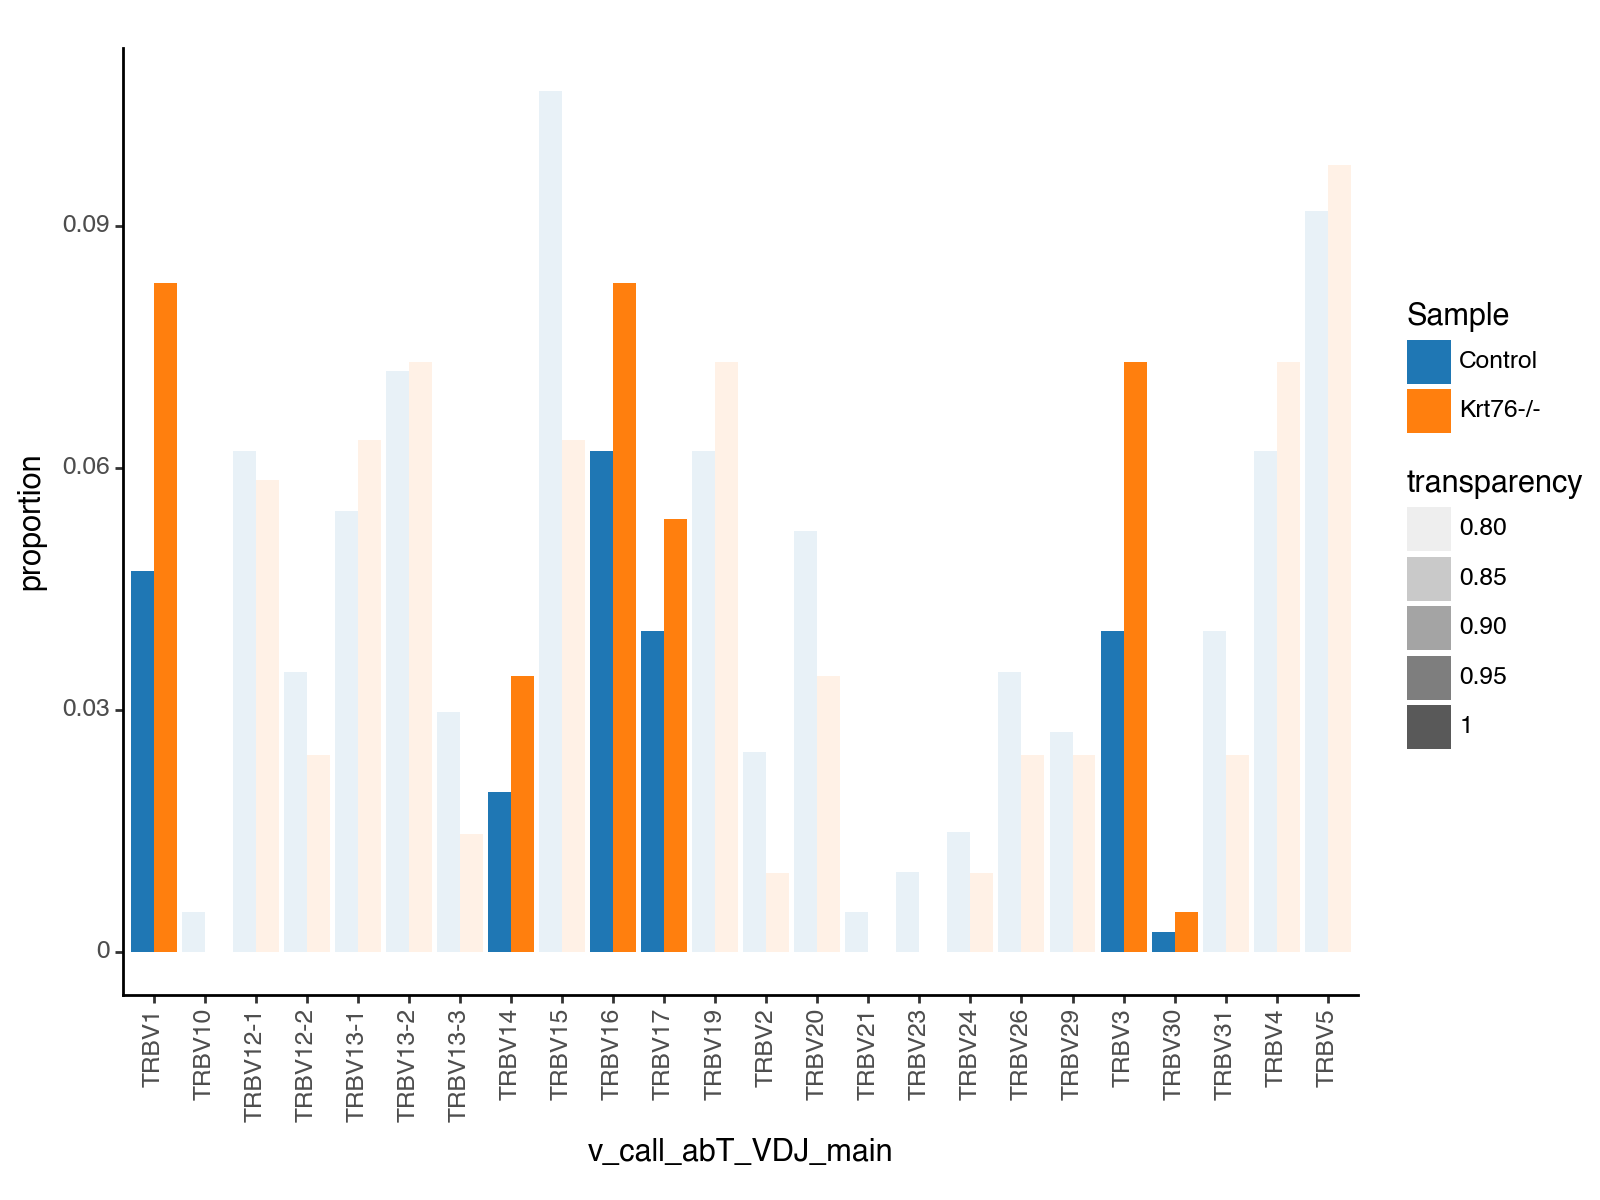

<Figure Size: (800 x 600)>

In [ ]:
p

In [494]:
p.save("VgeneAlphaChain_DN3aDN3b_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3aDN3b_181223.pdf


### DN3b - V gene alpha chain

In [495]:
adata_NPF_DN3b = adata_NPF[adata_NPF.obs["leiden"] == "6 DN3b"]

In [496]:
adata_NPF_DN3b

View of AnnData object with n_obs × n_vars = 24 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [497]:
working_df = pd.DataFrame(adata_NPF_DN3b.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main                  
Control  TRAV7-5                            2
         TRAV10                             1
         TRAV6D-7,TRAV6N-7                  1
         TRAV9-2                            1
         TRAV7-1                            1
         TRAV6D-7,TRAV6N-7,TRAV6-7/DV9      1
         TRAV6D-3,TRAV6-3                   1
         TRAV3N-3,TRAV3D-3                  1
         TRAV13-1,TRAV13D-1                 1
         TRAV6-4                            1
         TRAV15N-2,TRAV15D-2/DV6D-2         1
         TRAV14-2                           1
         TRAV4-3,TRAV4D-3                   1
         TRAV11D,TRAV11                     0
         TRAV4D-4,TRAV4N-4                  0
         TRAV12N-1,TRAV12-1,TRAV12D-1       0
         TRAV13N-2,TRAV13D-2                0
         TRAV7-6                            0
         TRAV14-3,TRAV14D-3/DV8             0
         TRAV14N-1,TRAV14D-1                0
Krt76-/- TRAV11D,TRAV11                     2
         TRAV7-6                            1
         TRAV4D-4,TRAV4N-4                  1
         TRAV3N-3,TRAV3D-3                  1
         TRAV14N-1,TRAV14D-1                1
         TRAV14-3,TRAV14D-3/DV8             1
         TRAV13N-2,TRAV13D-2                1
         TRAV12N-1,TRAV12-1,TRAV12D-1       1
         TRAV10                             1
         TRAV7-5                            0
         TRAV7-1                            0
         TRAV6D-7,TRAV6N-7,TRAV6-7/DV9      0
         TRAV6D-7,TRAV6N-7                  0
         TRAV6D-3,TRAV6-3                   0
         TRAV6-4                            0
         TRAV4-3,TRAV4D-3                   0
         TRAV15N-2,TRAV15D-2/DV6D-2         0
         TRAV14-2                           0
         TRAV13-1,TRAV13D-1                 0
         TRAV9-2                            0

In [498]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample             v_call_abT_VJ_main  counts
0    Control                        TRAV7-5       2
1    Control                         TRAV10       1
2    Control              TRAV6D-7,TRAV6N-7       1
3    Control                        TRAV9-2       1
4    Control                        TRAV7-1       1
5    Control  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       1
6    Control               TRAV6D-3,TRAV6-3       1
7    Control              TRAV3N-3,TRAV3D-3       1
8    Control             TRAV13-1,TRAV13D-1       1
9    Control                        TRAV6-4       1
10   Control     TRAV15N-2,TRAV15D-2/DV6D-2       1
11   Control                       TRAV14-2       1
12   Control               TRAV4-3,TRAV4D-3       1
13   Control                 TRAV11D,TRAV11       0
14   Control              TRAV4D-4,TRAV4N-4       0
15   Control   TRAV12N-1,TRAV12-1,TRAV12D-1       0
16   Control            TRAV13N-2,TRAV13D-2       0
17   Control                        TRAV7-6       0
18   Control         TRAV14-3,TRAV14D-3/DV8       0
19   Control            TRAV14N-1,TRAV14D-1       0
20  Krt76-/-                 TRAV11D,TRAV11       2
21  Krt76-/-                        TRAV7-6       1
22  Krt76-/-              TRAV4D-4,TRAV4N-4       1
23  Krt76-/-              TRAV3N-3,TRAV3D-3       1
24  Krt76-/-            TRAV14N-1,TRAV14D-1       1
25  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1
26  Krt76-/-            TRAV13N-2,TRAV13D-2       1
27  Krt76-/-   TRAV12N-1,TRAV12-1,TRAV12D-1       1
28  Krt76-/-                         TRAV10       1
29  Krt76-/-                        TRAV7-5       0
30  Krt76-/-                        TRAV7-1       0
31  Krt76-/-  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       0
32  Krt76-/-              TRAV6D-7,TRAV6N-7       0
33  Krt76-/-               TRAV6D-3,TRAV6-3       0
34  Krt76-/-                        TRAV6-4       0
35  Krt76-/-               TRAV4-3,TRAV4D-3       0
36  Krt76-/-     TRAV15N-2,TRAV15D-2/DV6D-2       0
37  Krt76-/-                       TRAV14-2       0
38  Krt76-/-             TRAV13-1,TRAV13D-1       0
39  Krt76-/-                        TRAV9-2       0

In [499]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 14, 'Krt76-/-': 10}

In [500]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [501]:
working_df

Sample             v_call_abT_VJ_main  counts  proportion
0    Control                        TRAV7-5       2    0.142857
1    Control                         TRAV10       1    0.071429
2    Control              TRAV6D-7,TRAV6N-7       1    0.071429
3    Control                        TRAV9-2       1    0.071429
4    Control                        TRAV7-1       1    0.071429
5    Control  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       1    0.071429
6    Control               TRAV6D-3,TRAV6-3       1    0.071429
7    Control              TRAV3N-3,TRAV3D-3       1    0.071429
8    Control             TRAV13-1,TRAV13D-1       1    0.071429
9    Control                        TRAV6-4       1    0.071429
10   Control     TRAV15N-2,TRAV15D-2/DV6D-2       1    0.071429
11   Control                       TRAV14-2       1    0.071429
12   Control               TRAV4-3,TRAV4D-3       1    0.071429
13   Control                 TRAV11D,TRAV11       0    0.000000
14   Control              TRAV4D-4,TRAV4N-4       0    0.000000
15   Control   TRAV12N-1,TRAV12-1,TRAV12D-1       0    0.000000
16   Control            TRAV13N-2,TRAV13D-2       0    0.000000
17   Control                        TRAV7-6       0    0.000000
18   Control         TRAV14-3,TRAV14D-3/DV8       0    0.000000
19   Control            TRAV14N-1,TRAV14D-1       0    0.000000
20  Krt76-/-                 TRAV11D,TRAV11       2    0.200000
21  Krt76-/-                        TRAV7-6       1    0.100000
22  Krt76-/-              TRAV4D-4,TRAV4N-4       1    0.100000
23  Krt76-/-              TRAV3N-3,TRAV3D-3       1    0.100000
24  Krt76-/-            TRAV14N-1,TRAV14D-1       1    0.100000
25  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1    0.100000
26  Krt76-/-            TRAV13N-2,TRAV13D-2       1    0.100000
27  Krt76-/-   TRAV12N-1,TRAV12-1,TRAV12D-1       1    0.100000
28  Krt76-/-                         TRAV10       1    0.100000
29  Krt76-/-                        TRAV7-5       0    0.000000
30  Krt76-/-                        TRAV7-1       0    0.000000
31  Krt76-/-  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       0    0.000000
32  Krt76-/-              TRAV6D-7,TRAV6N-7       0    0.000000
33  Krt76-/-               TRAV6D-3,TRAV6-3       0    0.000000
34  Krt76-/-                        TRAV6-4       0    0.000000
35  Krt76-/-               TRAV4-3,TRAV4D-3       0    0.000000
36  Krt76-/-     TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000
37  Krt76-/-                       TRAV14-2       0    0.000000
38  Krt76-/-             TRAV13-1,TRAV13D-1       0    0.000000
39  Krt76-/-                        TRAV9-2       0    0.000000

In [502]:
working_control = working_df[working_df["Sample"] == "Control"]

In [503]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [504]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [505]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [506]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV10': 1.4000000000000001,
 'TRAV11D,TRAV11': inf,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': inf,
 'TRAV13-1,TRAV13D-1': 0.0,
 'TRAV13N-2,TRAV13D-2': inf,
 'TRAV14-2': 0.0,
 'TRAV14-3,TRAV14D-3/DV8': inf,
 'TRAV14N-1,TRAV14D-1': inf,
 'TRAV15N-2,TRAV15D-2/DV6D-2': 0.0,
 'TRAV3N-3,TRAV3D-3': 1.4000000000000001,
 'TRAV4-3,TRAV4D-3': 0.0,
 'TRAV4D-4,TRAV4N-4': inf,
 'TRAV6-4': 0.0,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-7,TRAV6N-7': 0.0,
 'TRAV6D-7,TRAV6N-7,TRAV6-7/DV9': 0.0,
 'TRAV7-1': 0.0,
 'TRAV7-5': 0.0,
 'TRAV7-6': inf,
 'TRAV9-2': 0.0}

In [507]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample             v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                        TRAV7-5       2    0.142857         0.0
1    Control                         TRAV10       1    0.071429         1.4
2    Control              TRAV6D-7,TRAV6N-7       1    0.071429         0.0
3    Control                        TRAV9-2       1    0.071429         0.0
4    Control                        TRAV7-1       1    0.071429         0.0
5    Control  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       1    0.071429         0.0
6    Control               TRAV6D-3,TRAV6-3       1    0.071429         0.0
7    Control              TRAV3N-3,TRAV3D-3       1    0.071429         1.4
8    Control             TRAV13-1,TRAV13D-1       1    0.071429         0.0
9    Control                        TRAV6-4       1    0.071429         0.0
10   Control     TRAV15N-2,TRAV15D-2/DV6D-2       1    0.071429         0.0
11   Control                       TRAV14-2       1    0.071429         0.0
12   Control               TRAV4-3,TRAV4D-3       1    0.071429         0.0
13   Control                 TRAV11D,TRAV11       0    0.000000         inf
14   Control              TRAV4D-4,TRAV4N-4       0    0.000000         inf
15   Control   TRAV12N-1,TRAV12-1,TRAV12D-1       0    0.000000         inf
16   Control            TRAV13N-2,TRAV13D-2       0    0.000000         inf
17   Control                        TRAV7-6       0    0.000000         inf
18   Control         TRAV14-3,TRAV14D-3/DV8       0    0.000000         inf
19   Control            TRAV14N-1,TRAV14D-1       0    0.000000         inf
20  Krt76-/-                 TRAV11D,TRAV11       2    0.200000         inf
21  Krt76-/-                        TRAV7-6       1    0.100000         inf
22  Krt76-/-              TRAV4D-4,TRAV4N-4       1    0.100000         inf
23  Krt76-/-              TRAV3N-3,TRAV3D-3       1    0.100000         1.4
24  Krt76-/-            TRAV14N-1,TRAV14D-1       1    0.100000         inf
25  Krt76-/-         TRAV14-3,TRAV14D-3/DV8       1    0.100000         inf
26  Krt76-/-            TRAV13N-2,TRAV13D-2       1    0.100000         inf
27  Krt76-/-   TRAV12N-1,TRAV12-1,TRAV12D-1       1    0.100000         inf
28  Krt76-/-                         TRAV10       1    0.100000         1.4
29  Krt76-/-                        TRAV7-5       0    0.000000         0.0
30  Krt76-/-                        TRAV7-1       0    0.000000         0.0
31  Krt76-/-  TRAV6D-7,TRAV6N-7,TRAV6-7/DV9       0    0.000000         0.0
32  Krt76-/-              TRAV6D-7,TRAV6N-7       0    0.000000         0.0
33  Krt76-/-               TRAV6D-3,TRAV6-3       0    0.000000         0.0
34  Krt76-/-                        TRAV6-4       0    0.000000         0.0
35  Krt76-/-               TRAV4-3,TRAV4D-3       0    0.000000         0.0
36  Krt76-/-     TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000         0.0
37  Krt76-/-                       TRAV14-2       0    0.000000         0.0
38  Krt76-/-             TRAV13-1,TRAV13D-1       0    0.000000         0.0
39  Krt76-/-                        TRAV9-2       0    0.000000         0.0

In [508]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [509]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

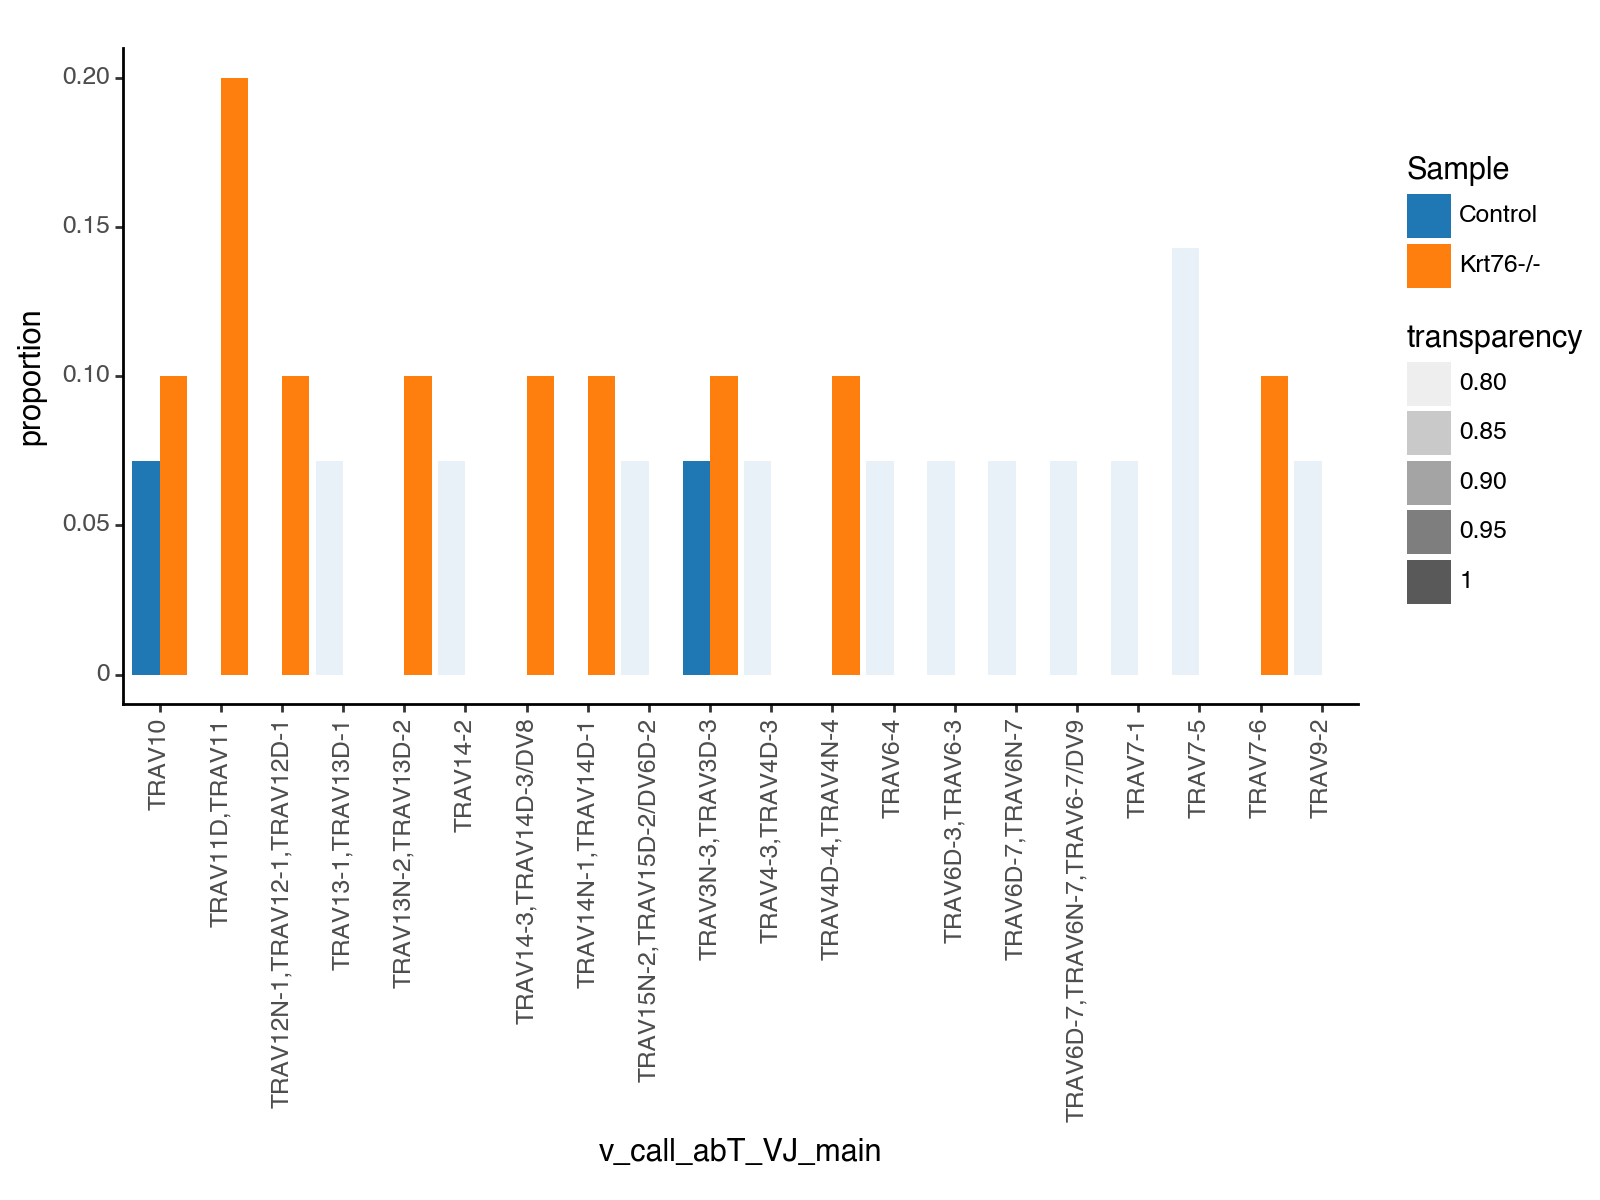

<Figure Size: (800 x 600)>

In [510]:
p

In [511]:
p.save("VgeneAlphaChain_DN3b_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN3b_181223.pdf


### DN4 - V gene alpha chain

In [512]:
adata_NPF_DN4 = adata_NPF[adata_NPF.obs["leiden"] == "2 DN4"]

In [513]:
adata_NPF_DN4

View of AnnData object with n_obs × n_vars = 348 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [514]:
working_df = pd.DataFrame(adata_NPF_DN4.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main              
Control  TRAV13-1                       9
         TRAV12D-3,TRAV12N-3            8
         TRAV12N-2,TRAV12D-2            7
         TRAV6D-7,TRAV6N-7              7
         TRAV12-3                       6
...                                   ...
Krt76-/- TRAV4N-3,TRAV4D-3              0
         TRAV5N-4,TRAV5D-4              0
         TRAV13D-1                      0
         TRAV6-5,TRAV6D-5,TRAV6N-5      0
         TRAV9N-4,TRAV9D-3              0

[176 rows x 1 columns]

In [515]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample         v_call_abT_VJ_main  counts
0     Control                   TRAV13-1       9
1     Control        TRAV12D-3,TRAV12N-3       8
2     Control        TRAV12N-2,TRAV12D-2       7
3     Control          TRAV6D-7,TRAV6N-7       7
4     Control                   TRAV12-3       6
..        ...                        ...     ...
171  Krt76-/-          TRAV4N-3,TRAV4D-3       0
172  Krt76-/-          TRAV5N-4,TRAV5D-4       0
173  Krt76-/-                  TRAV13D-1       0
174  Krt76-/-  TRAV6-5,TRAV6D-5,TRAV6N-5       0
175  Krt76-/-          TRAV9N-4,TRAV9D-3       0

[176 rows x 3 columns]

In [516]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 169, 'Krt76-/-': 179}

In [517]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [518]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control                   TRAV13-1       9    0.053254
1     Control        TRAV12D-3,TRAV12N-3       8    0.047337
2     Control        TRAV12N-2,TRAV12D-2       7    0.041420
3     Control          TRAV6D-7,TRAV6N-7       7    0.041420
4     Control                   TRAV12-3       6    0.035503
..        ...                        ...     ...         ...
171  Krt76-/-          TRAV4N-3,TRAV4D-3       0    0.000000
172  Krt76-/-          TRAV5N-4,TRAV5D-4       0    0.000000
173  Krt76-/-                  TRAV13D-1       0    0.000000
174  Krt76-/-  TRAV6-5,TRAV6D-5,TRAV6N-5       0    0.000000
175  Krt76-/-          TRAV9N-4,TRAV9D-3       0    0.000000

[176 rows x 4 columns]

In [519]:
working_control = working_df[working_df["Sample"] == "Control"]

In [520]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [521]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [522]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [523]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 1.8882681564245811,
 'TRAV10': 3.7765363128491622,
 'TRAV10D,TRAV10': 0.0,
 'TRAV10N': 0.0,
 'TRAV11D,TRAV11': inf,
 'TRAV12-1,TRAV12D-1': 2.5176908752327747,
 'TRAV12-3': 0.31471135940409684,
 'TRAV12D-2': 0.0,
 'TRAV12D-2,TRAV12-2': inf,
 'TRAV12D-3,TRAV12N-3': 0.3540502793296089,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 1.8882681564245811,
 'TRAV12N-2,TRAV12D-2': 0.4046288906624102,
 'TRAV13-1': 0.4196151458721291,
 'TRAV13-1,TRAV13D-1': 0.0,
 'TRAV13-2': 0.9441340782122906,
 'TRAV13-4/DV7': 1.8882681564245811,
 'TRAV13-5': inf,
 'TRAV13D-1': 0.0,
 'TRAV13D-3': 1.8882681564245811,
 'TRAV13D-4': 0.0,
 'TRAV13N-1': 0.31471135940409684,
 'TRAV13N-2,TRAV13-2,TRAV13D-2': 0.9441340782122906,
 'TRAV13N-2,TRAV13D-2': 0.4720670391061453,
 'TRAV13N-3': inf,
 'TRAV13N-4': 0.31471135940409684,
 'TRAV13N-4,TRAV13D-4': 0.0,
 'TRAV14-1': inf,
 'TRAV14-2': 0.37765363128491625,
 'TRAV14-2,TRAV14N-2,TRAV14D-2': 0.4720670391061453,
 'TRAV14-3,TRAV14D-3/DV8': 1.573556797020484,
 'TRAV14N-1,TRAV14D-1'

In [524]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample         v_call_abT_VJ_main  counts  proportion  foldchange
0     Control                   TRAV13-1       9    0.053254    0.419615
1     Control        TRAV12D-3,TRAV12N-3       8    0.047337    0.354050
2     Control        TRAV12N-2,TRAV12D-2       7    0.041420    0.404629
3     Control          TRAV6D-7,TRAV6N-7       7    0.041420    1.079010
4     Control                   TRAV12-3       6    0.035503    0.314711
..        ...                        ...     ...         ...         ...
171  Krt76-/-          TRAV4N-3,TRAV4D-3       0    0.000000    0.000000
172  Krt76-/-          TRAV5N-4,TRAV5D-4       0    0.000000    0.000000
173  Krt76-/-                  TRAV13D-1       0    0.000000    0.000000
174  Krt76-/-  TRAV6-5,TRAV6D-5,TRAV6N-5       0    0.000000    0.000000
175  Krt76-/-          TRAV9N-4,TRAV9D-3       0    0.000000    0.000000

[176 rows x 5 columns]

In [525]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [528]:
options.figure_size = (20,14)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

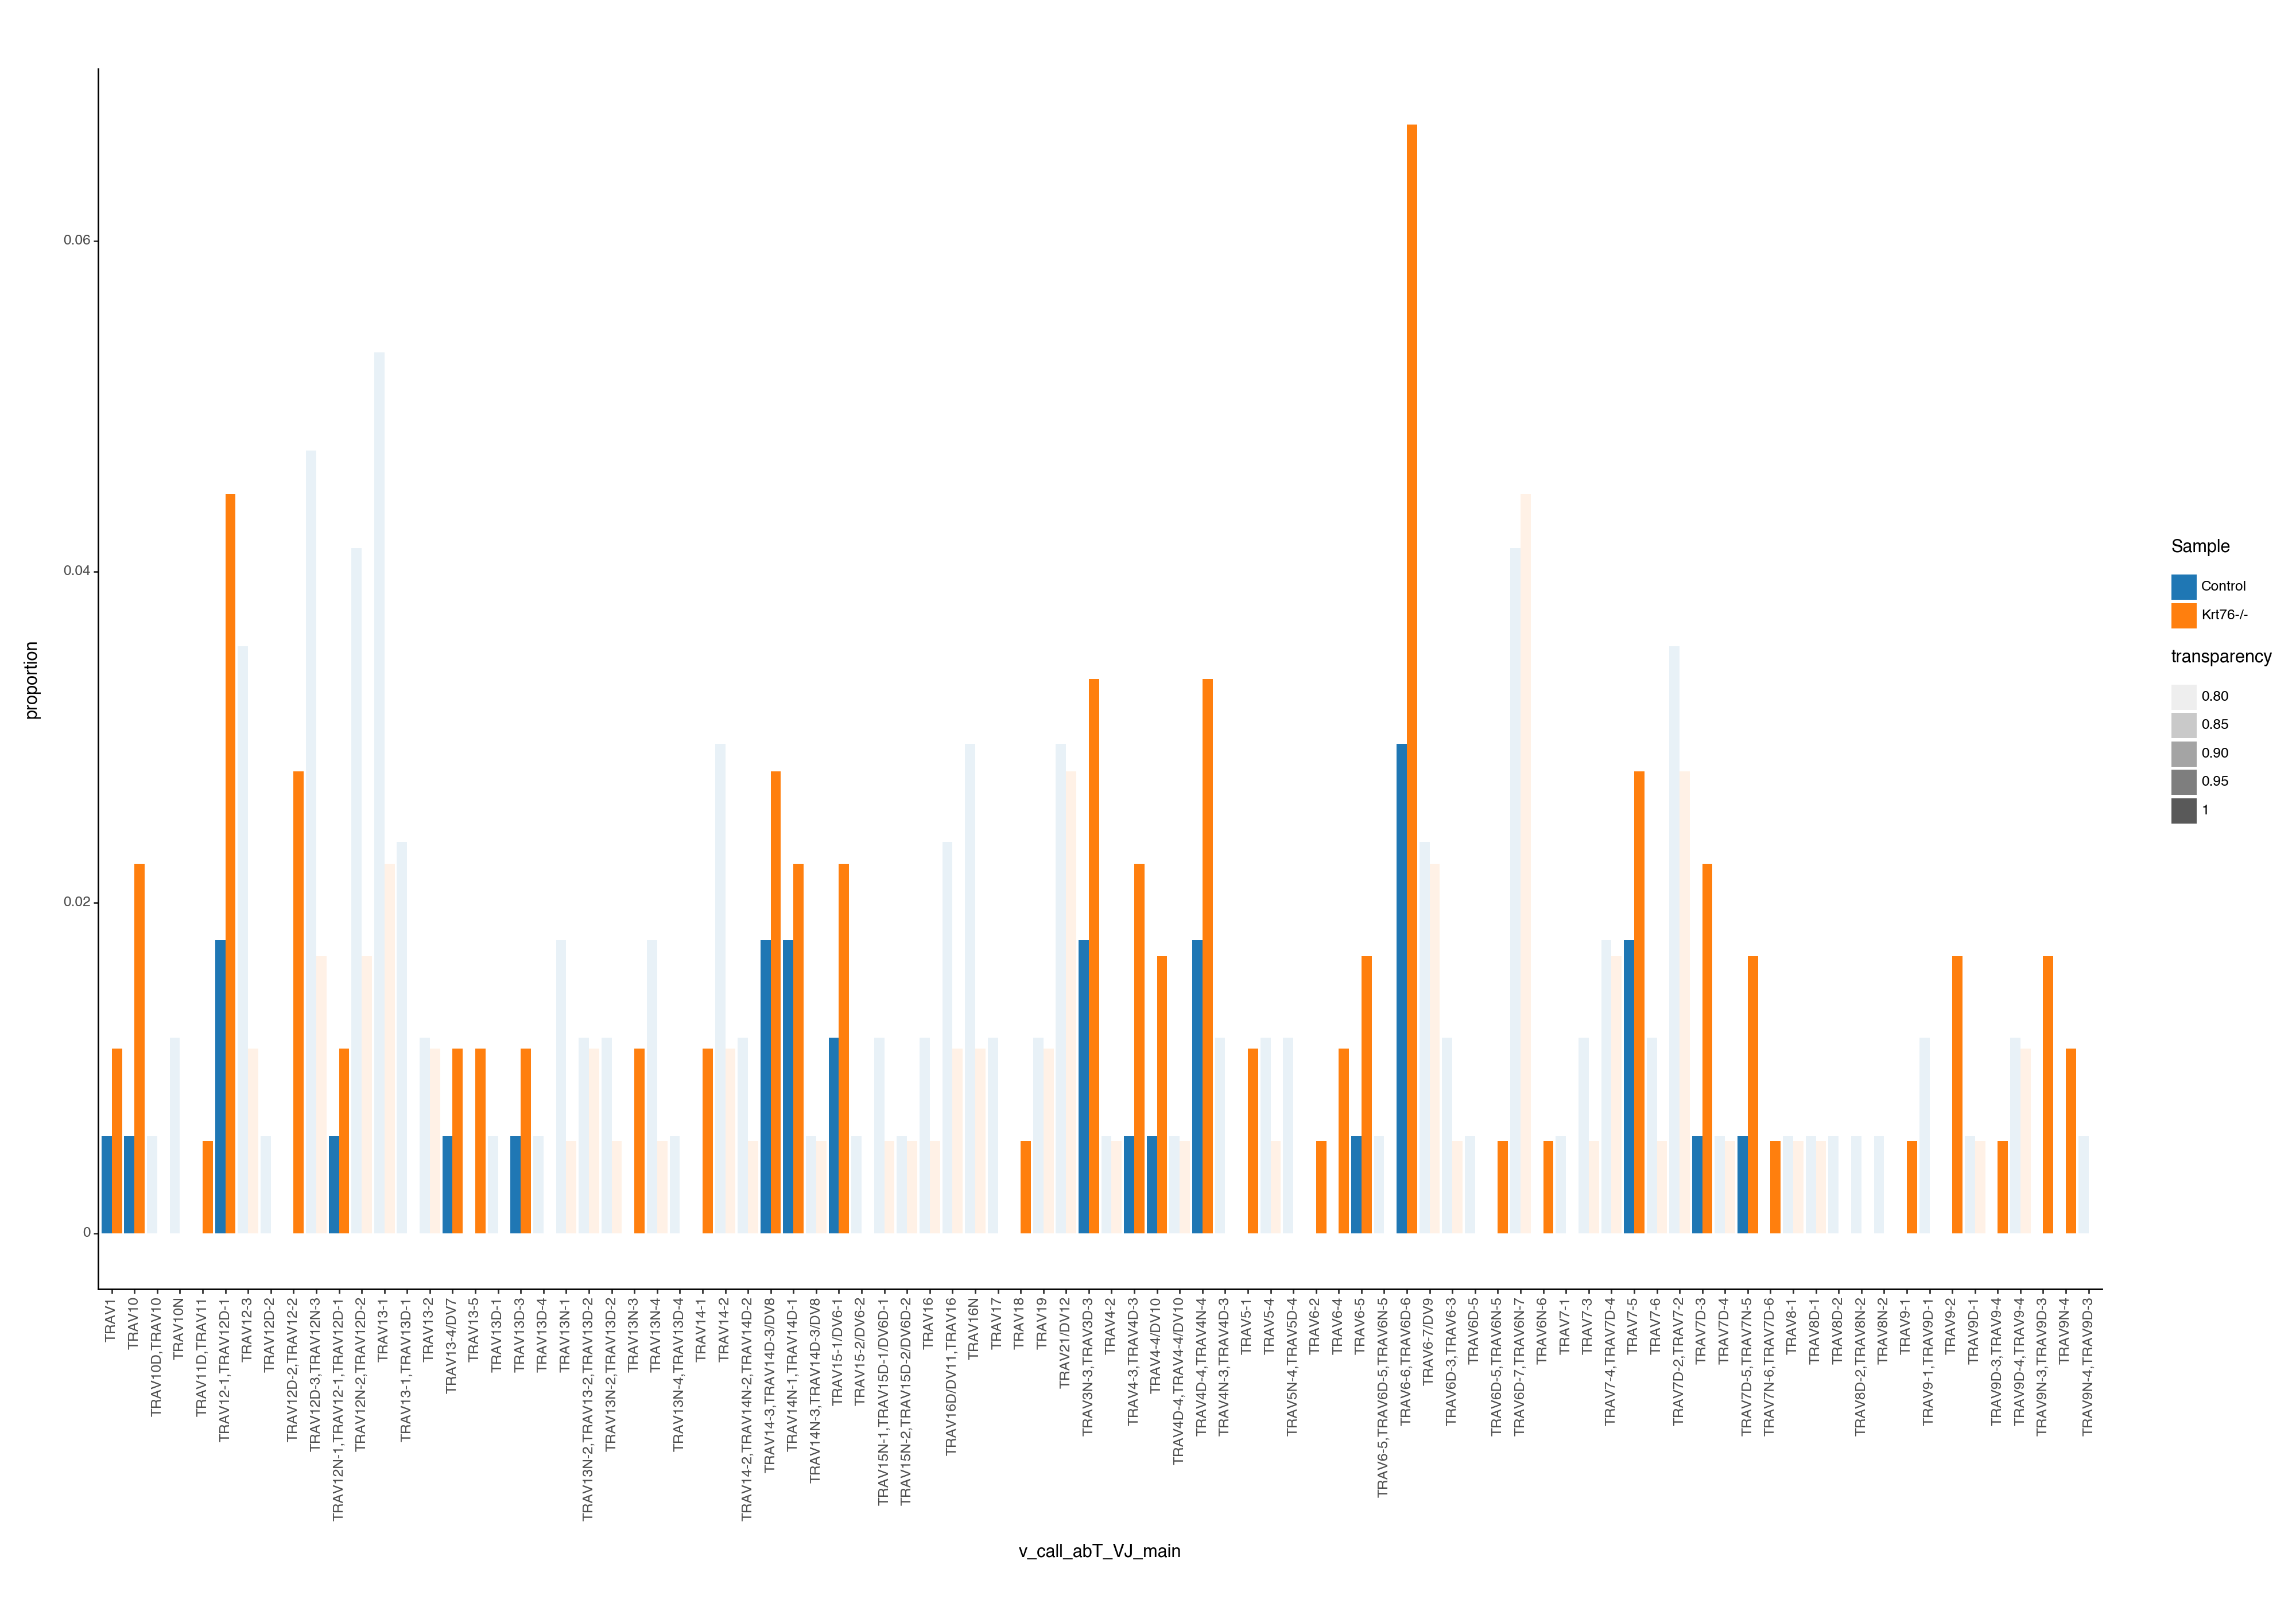

<Figure Size: (2000 x 1400)>

In [529]:
p

In [530]:
p.save("VgeneAlphaChain_DN4_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DN4_181223.pdf


### DP 1 - V gene alpha chain

In [531]:
adata_NPF_DP1 = adata_NPF[adata_NPF.obs["leiden"] == "3 DP 1"]

In [532]:
adata_NPF_DP1

View of AnnData object with n_obs × n_vars = 790 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [533]:
working_df = pd.DataFrame(adata_NPF_DP1.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main              
Control  TRAV12N-2,TRAV12D-2           18
         TRAV3N-3,TRAV3D-3             16
         TRAV6-7/DV9                   15
         TRAV4-4/DV10                  13
         TRAV12-3                      12
...                                   ...
Krt76-/- TRAV3-3,TRAV3N-3,TRAV3D-3      0
         TRAV7-2                        0
         TRAV7-1                        0
         TRAV4D-2                       0
         TRAV10D,TRAV10N                0

[200 rows x 1 columns]

In [534]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample         v_call_abT_VJ_main  counts
0     Control        TRAV12N-2,TRAV12D-2      18
1     Control          TRAV3N-3,TRAV3D-3      16
2     Control                TRAV6-7/DV9      15
3     Control               TRAV4-4/DV10      13
4     Control                   TRAV12-3      12
..        ...                        ...     ...
195  Krt76-/-  TRAV3-3,TRAV3N-3,TRAV3D-3       0
196  Krt76-/-                    TRAV7-2       0
197  Krt76-/-                    TRAV7-1       0
198  Krt76-/-                   TRAV4D-2       0
199  Krt76-/-            TRAV10D,TRAV10N       0

[200 rows x 3 columns]

In [535]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 388, 'Krt76-/-': 402}

In [536]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [537]:
working_df

Sample         v_call_abT_VJ_main  counts  proportion
0     Control        TRAV12N-2,TRAV12D-2      18    0.046392
1     Control          TRAV3N-3,TRAV3D-3      16    0.041237
2     Control                TRAV6-7/DV9      15    0.038660
3     Control               TRAV4-4/DV10      13    0.033505
4     Control                   TRAV12-3      12    0.030928
..        ...                        ...     ...         ...
195  Krt76-/-  TRAV3-3,TRAV3N-3,TRAV3D-3       0    0.000000
196  Krt76-/-                    TRAV7-2       0    0.000000
197  Krt76-/-                    TRAV7-1       0    0.000000
198  Krt76-/-                   TRAV4D-2       0    0.000000
199  Krt76-/-            TRAV10D,TRAV10N       0    0.000000

[200 rows x 4 columns]

In [538]:
working_control = working_df[working_df["Sample"] == "Control"]

In [539]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [540]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [541]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [542]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.6434494195688225,
 'TRAV10': 0.8272921108742005,
 'TRAV10D': 0.9651741293532339,
 'TRAV10D,TRAV10': inf,
 'TRAV10D,TRAV10N': 0.0,
 'TRAV10N': 0.19303482587064677,
 'TRAV11D,TRAV11': 0.9651741293532338,
 'TRAV12-1,TRAV12D-1': 0.8272921108742005,
 'TRAV12-3': 0.4825870646766169,
 'TRAV12D-2,TRAV12-2': 2.8955223880597014,
 'TRAV12D-3,TRAV12N-3': 2.8955223880597014,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 0.48258706467661694,
 'TRAV12N-2,TRAV12D-2': 1.0187949143173023,
 'TRAV13-1': 1.3161465400271368,
 'TRAV13-1,TRAV13D-1': 0.9651741293532339,
 'TRAV13-1,TRAV13D-4': 0.0,
 'TRAV13-2': 1.9303482587064678,
 'TRAV13-4/DV7': 1.1260364842454396,
 'TRAV13-5': 0.7238805970149254,
 'TRAV13D-1': 0.24129353233830847,
 'TRAV13D-3': 0.9651741293532339,
 'TRAV13D-4': 0.6434494195688225,
 'TRAV13N-1': 3.8606965174129355,
 'TRAV13N-2,TRAV13-2,TRAV13D-2': 0.48258706467661694,
 'TRAV13N-2,TRAV13D-2': 0.9651741293532338,
 'TRAV13N-3': 1.6086235489220564,
 'TRAV13N-4': 0.6434494195688225,
 'TRAV14-1': 0.

In [543]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample         v_call_abT_VJ_main  counts  proportion  foldchange
0     Control        TRAV12N-2,TRAV12D-2      18    0.046392    1.018795
1     Control          TRAV3N-3,TRAV3D-3      16    0.041237    1.025498
2     Control                TRAV6-7/DV9      15    0.038660    0.643449
3     Control               TRAV4-4/DV10      13    0.033505    0.668197
4     Control                   TRAV12-3      12    0.030928    0.482587
..        ...                        ...     ...         ...         ...
195  Krt76-/-  TRAV3-3,TRAV3N-3,TRAV3D-3       0    0.000000    0.000000
196  Krt76-/-                    TRAV7-2       0    0.000000    0.000000
197  Krt76-/-                    TRAV7-1       0    0.000000    0.000000
198  Krt76-/-                   TRAV4D-2       0    0.000000    0.000000
199  Krt76-/-            TRAV10D,TRAV10N       0    0.000000    0.000000

[200 rows x 5 columns]

In [544]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [547]:
options.figure_size = (20,14)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

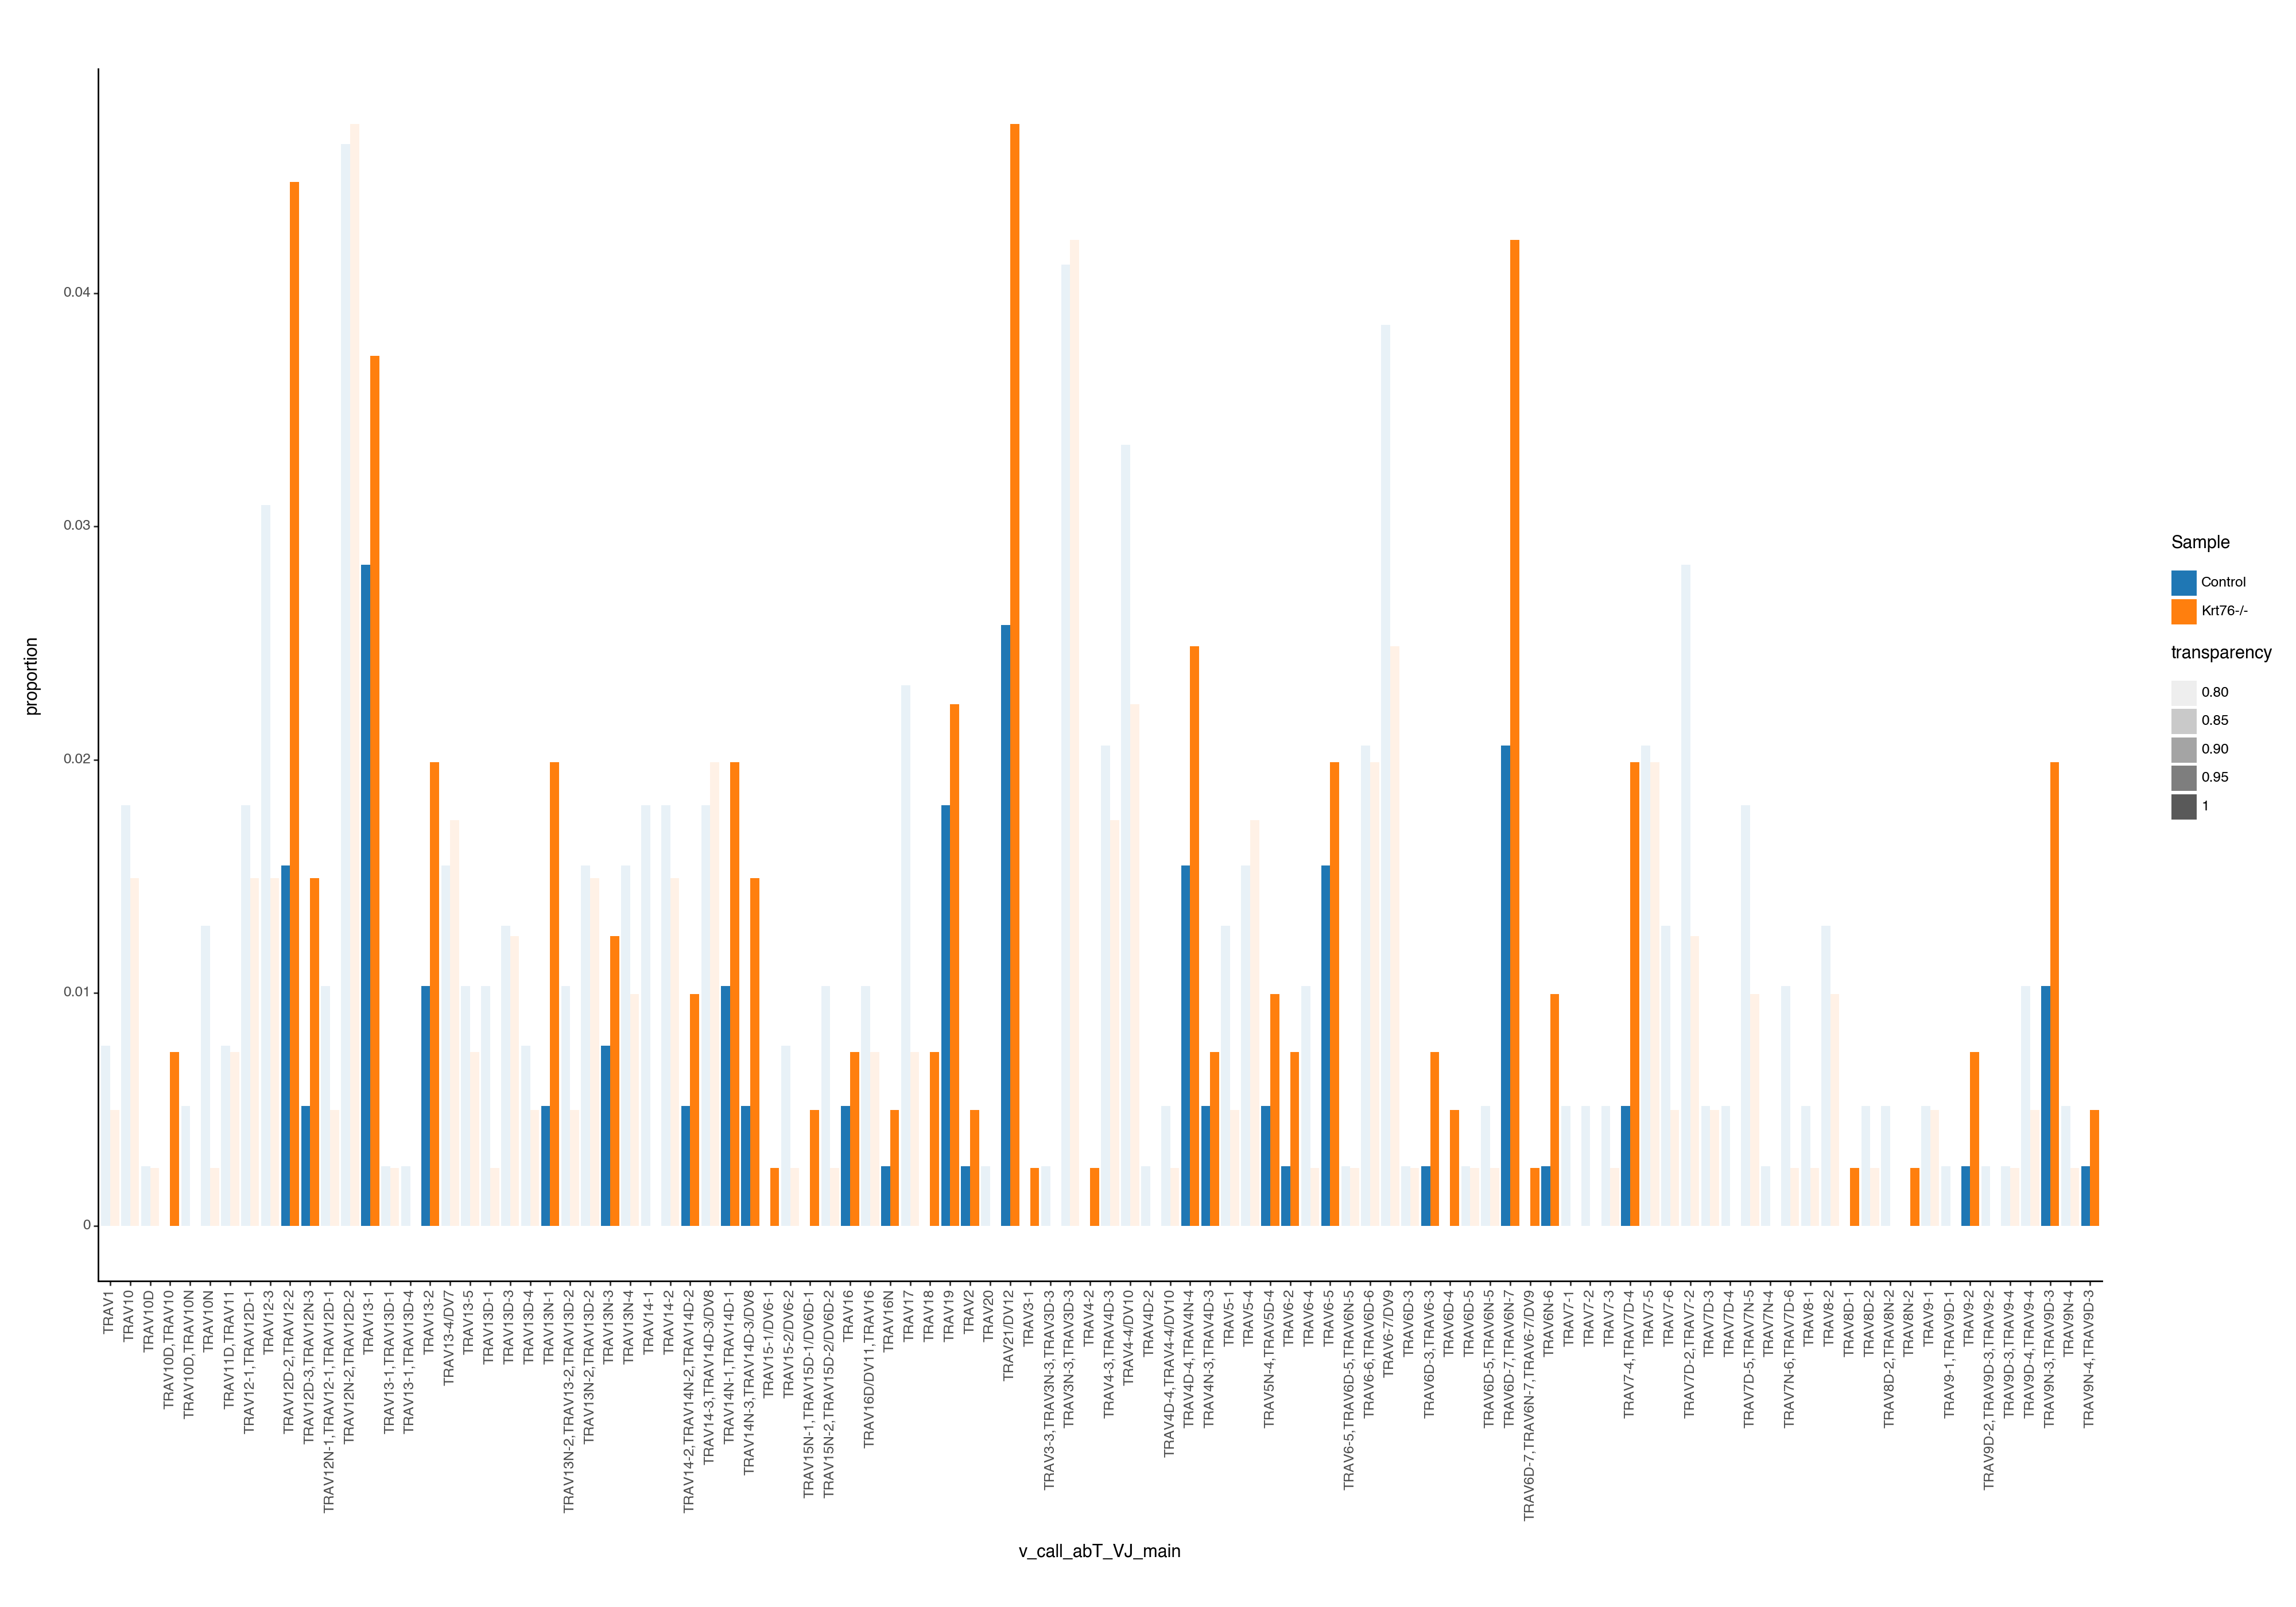

<Figure Size: (2000 x 1400)>

In [548]:
p

In [549]:
p.save("VgeneAlphaChain_DP1_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DP1_181223.pdf


### DP 2 - V gene alpha chain

In [552]:
adata_NPF_DP2 = adata_NPF[adata_NPF.obs["leiden"] == "9 DP 2"]

In [553]:
adata_NPF_DP2

View of AnnData object with n_obs × n_vars = 12 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [554]:
working_df = pd.DataFrame(adata_NPF_DP2.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main        
Control  TRAV12-3                 1
         TRAV13N-4,TRAV13D-4      1
         TRAV14-2                 1
         TRAV7-3                  1
         TRAV7-4,TRAV7D-4         1
         TRAV7-5                  1
         TRAV8D-1                 1
         TRAV12N-2,TRAV12D-2      1
         TRAV6-7/DV9              0
         TRAV6-5                  0
         TRAV13N-1                0
         TRAV13D-3                0
Krt76-/- TRAV6-7/DV9              1
         TRAV6-5                  1
         TRAV13D-3                1
         TRAV13N-1                1
         TRAV14-2                 0
         TRAV7-5                  0
         TRAV7-4,TRAV7D-4         0
         TRAV7-3                  0
         TRAV12-3                 0
         TRAV13N-4,TRAV13D-4      0
         TRAV12N-2,TRAV12D-2      0
         TRAV8D-1                 0

In [555]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample   v_call_abT_VJ_main  counts
0    Control             TRAV12-3       1
1    Control  TRAV13N-4,TRAV13D-4       1
2    Control             TRAV14-2       1
3    Control              TRAV7-3       1
4    Control     TRAV7-4,TRAV7D-4       1
5    Control              TRAV7-5       1
6    Control             TRAV8D-1       1
7    Control  TRAV12N-2,TRAV12D-2       1
8    Control          TRAV6-7/DV9       0
9    Control              TRAV6-5       0
10   Control            TRAV13N-1       0
11   Control            TRAV13D-3       0
12  Krt76-/-          TRAV6-7/DV9       1
13  Krt76-/-              TRAV6-5       1
14  Krt76-/-            TRAV13D-3       1
15  Krt76-/-            TRAV13N-1       1
16  Krt76-/-             TRAV14-2       0
17  Krt76-/-              TRAV7-5       0
18  Krt76-/-     TRAV7-4,TRAV7D-4       0
19  Krt76-/-              TRAV7-3       0
20  Krt76-/-             TRAV12-3       0
21  Krt76-/-  TRAV13N-4,TRAV13D-4       0
22  Krt76-/-  TRAV12N-2,TRAV12D-2       0
23  Krt76-/-             TRAV8D-1       0

In [556]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 8, 'Krt76-/-': 4}

In [557]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [558]:
working_df

Sample   v_call_abT_VJ_main  counts  proportion
0    Control             TRAV12-3       1       0.125
1    Control  TRAV13N-4,TRAV13D-4       1       0.125
2    Control             TRAV14-2       1       0.125
3    Control              TRAV7-3       1       0.125
4    Control     TRAV7-4,TRAV7D-4       1       0.125
5    Control              TRAV7-5       1       0.125
6    Control             TRAV8D-1       1       0.125
7    Control  TRAV12N-2,TRAV12D-2       1       0.125
8    Control          TRAV6-7/DV9       0       0.000
9    Control              TRAV6-5       0       0.000
10   Control            TRAV13N-1       0       0.000
11   Control            TRAV13D-3       0       0.000
12  Krt76-/-          TRAV6-7/DV9       1       0.250
13  Krt76-/-              TRAV6-5       1       0.250
14  Krt76-/-            TRAV13D-3       1       0.250
15  Krt76-/-            TRAV13N-1       1       0.250
16  Krt76-/-             TRAV14-2       0       0.000
17  Krt76-/-              TRAV7-5       0       0.000
18  Krt76-/-     TRAV7-4,TRAV7D-4       0       0.000
19  Krt76-/-              TRAV7-3       0       0.000
20  Krt76-/-             TRAV12-3       0       0.000
21  Krt76-/-  TRAV13N-4,TRAV13D-4       0       0.000
22  Krt76-/-  TRAV12N-2,TRAV12D-2       0       0.000
23  Krt76-/-             TRAV8D-1       0       0.000

In [559]:
working_control = working_df[working_df["Sample"] == "Control"]

In [560]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [561]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [562]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [563]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV12-3': 0.0,
 'TRAV12N-2,TRAV12D-2': 0.0,
 'TRAV13D-3': inf,
 'TRAV13N-1': inf,
 'TRAV13N-4,TRAV13D-4': 0.0,
 'TRAV14-2': 0.0,
 'TRAV6-5': inf,
 'TRAV6-7/DV9': inf,
 'TRAV7-3': 0.0,
 'TRAV7-4,TRAV7D-4': 0.0,
 'TRAV7-5': 0.0,
 'TRAV8D-1': 0.0}

In [564]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample   v_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAV12-3       1       0.125         0.0
1    Control  TRAV13N-4,TRAV13D-4       1       0.125         0.0
2    Control             TRAV14-2       1       0.125         0.0
3    Control              TRAV7-3       1       0.125         0.0
4    Control     TRAV7-4,TRAV7D-4       1       0.125         0.0
5    Control              TRAV7-5       1       0.125         0.0
6    Control             TRAV8D-1       1       0.125         0.0
7    Control  TRAV12N-2,TRAV12D-2       1       0.125         0.0
8    Control          TRAV6-7/DV9       0       0.000         inf
9    Control              TRAV6-5       0       0.000         inf
10   Control            TRAV13N-1       0       0.000         inf
11   Control            TRAV13D-3       0       0.000         inf
12  Krt76-/-          TRAV6-7/DV9       1       0.250         inf
13  Krt76-/-              TRAV6-5       1       0.250         inf
14  Krt76-/-            TRAV13D-3       1       0.250         inf
15  Krt76-/-            TRAV13N-1       1       0.250         inf
16  Krt76-/-             TRAV14-2       0       0.000         0.0
17  Krt76-/-              TRAV7-5       0       0.000         0.0
18  Krt76-/-     TRAV7-4,TRAV7D-4       0       0.000         0.0
19  Krt76-/-              TRAV7-3       0       0.000         0.0
20  Krt76-/-             TRAV12-3       0       0.000         0.0
21  Krt76-/-  TRAV13N-4,TRAV13D-4       0       0.000         0.0
22  Krt76-/-  TRAV12N-2,TRAV12D-2       0       0.000         0.0
23  Krt76-/-             TRAV8D-1       0       0.000         0.0

In [565]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [566]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

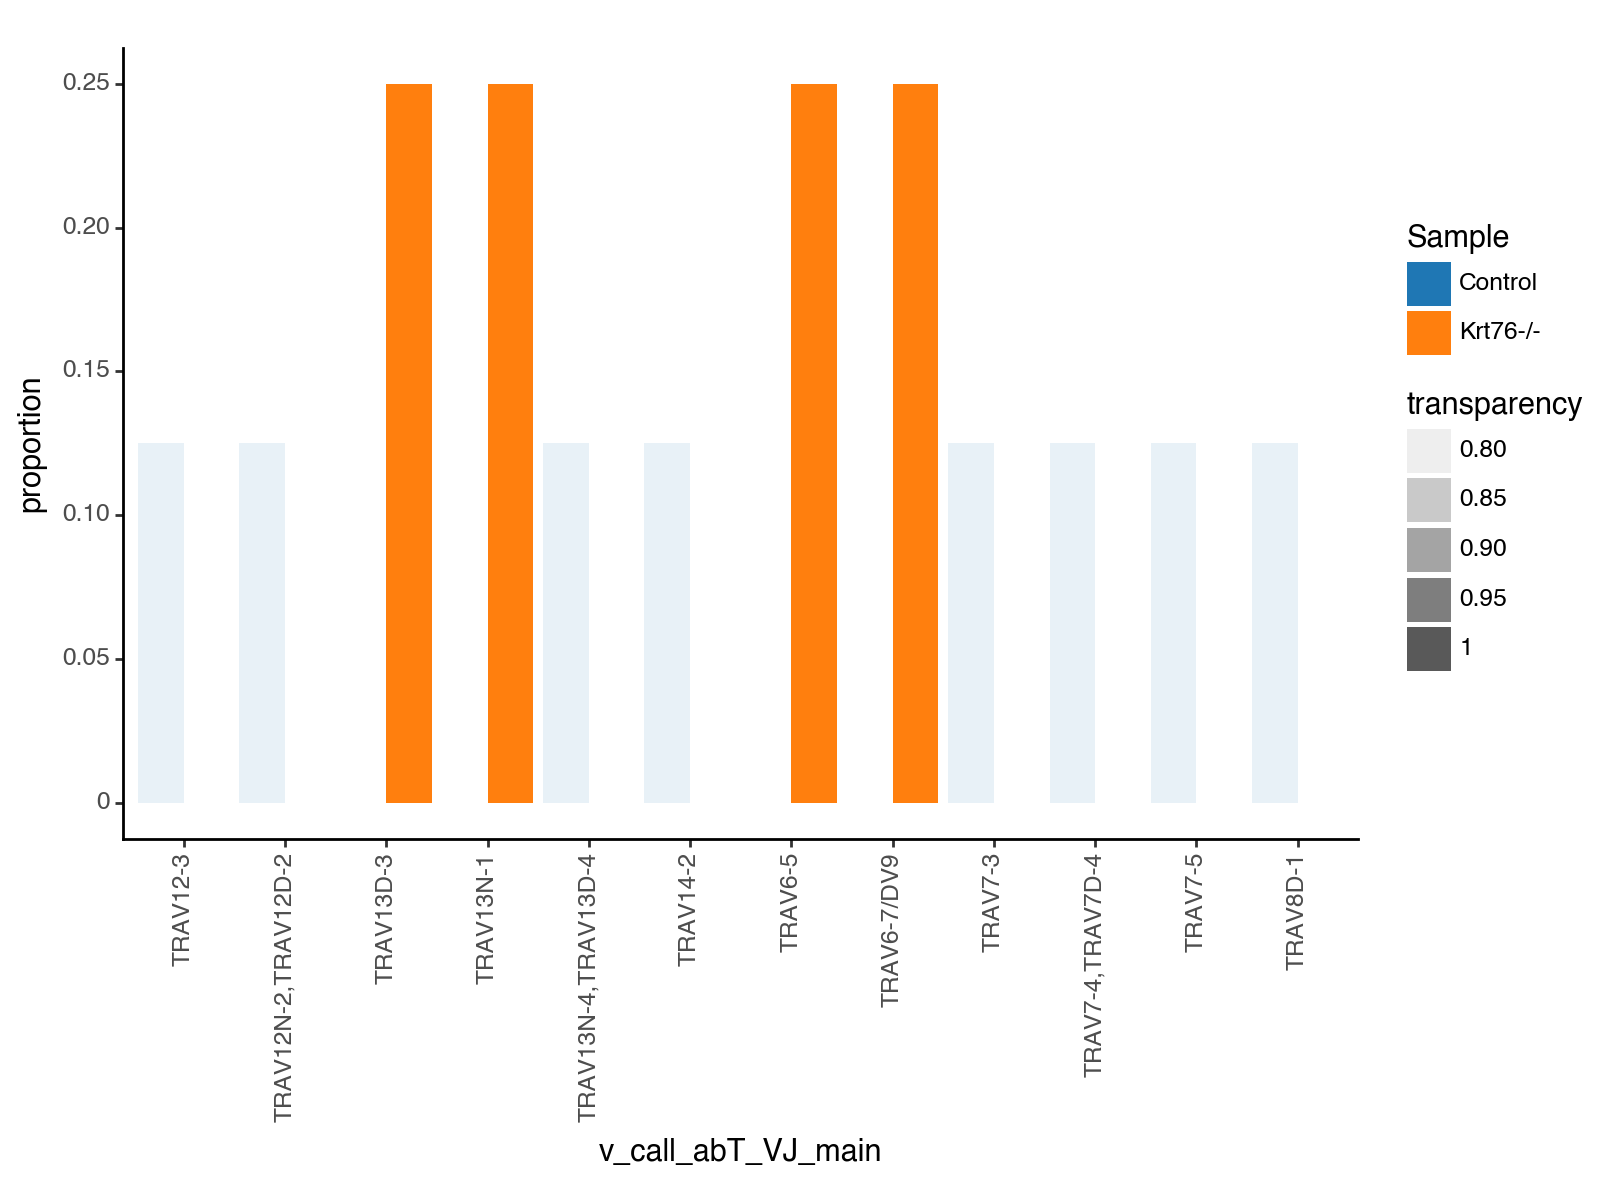

<Figure Size: (800 x 600)>

In [567]:
p

In [568]:
p.save("VgeneAlphaChain_DP2_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_DP2_181223.pdf


### SP & DP - V gene alpha chain

In [569]:
adata_NPF_SPnDP = adata_NPF[adata_NPF.obs["leiden"] == "5 SP & DP"]

In [570]:
adata_NPF_SPnDP 

View of AnnData object with n_obs × n_vars = 571 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [571]:
working_df = pd.DataFrame(adata_NPF_SPnDP.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main           
Control  TRAV6-6,TRAV6D-6           18
         TRAV6D-7,TRAV6N-7          15
         TRAV13-1                   14
         TRAV7D-2,TRAV7-2           12
         TRAV14-3,TRAV14D-3/DV8     11
...                                ...
Krt76-/- TRAV7D-4                    0
         TRAV5N-4,TRAV5D-4           0
         TRAV10D                     0
         TRAV7-5                     0
         TRAV4-2                     0

[162 rows x 1 columns]

In [572]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample      v_call_abT_VJ_main  counts
0     Control        TRAV6-6,TRAV6D-6      18
1     Control       TRAV6D-7,TRAV6N-7      15
2     Control                TRAV13-1      14
3     Control        TRAV7D-2,TRAV7-2      12
4     Control  TRAV14-3,TRAV14D-3/DV8      11
..        ...                     ...     ...
157  Krt76-/-                TRAV7D-4       0
158  Krt76-/-       TRAV5N-4,TRAV5D-4       0
159  Krt76-/-                 TRAV10D       0
160  Krt76-/-                 TRAV7-5       0
161  Krt76-/-                 TRAV4-2       0

[162 rows x 3 columns]

In [573]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 373, 'Krt76-/-': 198}

In [574]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [575]:
working_df

Sample      v_call_abT_VJ_main  counts  proportion
0     Control        TRAV6-6,TRAV6D-6      18    0.048257
1     Control       TRAV6D-7,TRAV6N-7      15    0.040214
2     Control                TRAV13-1      14    0.037534
3     Control        TRAV7D-2,TRAV7-2      12    0.032172
4     Control  TRAV14-3,TRAV14D-3/DV8      11    0.029491
..        ...                     ...     ...         ...
157  Krt76-/-                TRAV7D-4       0    0.000000
158  Krt76-/-       TRAV5N-4,TRAV5D-4       0    0.000000
159  Krt76-/-                 TRAV10D       0    0.000000
160  Krt76-/-                 TRAV7-5       0    0.000000
161  Krt76-/-                 TRAV4-2       0    0.000000

[162 rows x 4 columns]

In [576]:
working_control = working_df[working_df["Sample"] == "Control"]

In [577]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [578]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [579]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [580]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 1.8838383838383839,
 'TRAV10': 1.8838383838383839,
 'TRAV10D': 0.0,
 'TRAV10N': 3.7676767676767677,
 'TRAV11D,TRAV11': inf,
 'TRAV12-1,TRAV12D-1': 0.8073593073593074,
 'TRAV12-3': 0.9419191919191919,
 'TRAV12D-2,TRAV12-2': 1.0275482093663912,
 'TRAV12D-3,TRAV12N-3': 0.5137741046831956,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 0.0,
 'TRAV12N-2,TRAV12D-2': 0.6850321395775942,
 'TRAV13-1': 0.4036796536796537,
 'TRAV13-2': 1.4128787878787878,
 'TRAV13-4/DV7': 0.3767676767676768,
 'TRAV13D-3': 0.0,
 'TRAV13N-1': 1.8838383838383839,
 'TRAV13N-2,TRAV13-2,TRAV13D-2': 1.8838383838383839,
 'TRAV13N-2,TRAV13D-2': 2.2606060606060607,
 'TRAV13N-3': 0.0,
 'TRAV13N-4': inf,
 'TRAV14-1': 0.9419191919191919,
 'TRAV14-2': 0.9419191919191919,
 'TRAV14-2,TRAV14N-2,TRAV14D-2': 1.8838383838383839,
 'TRAV14-3,TRAV14D-3/DV8': 0.5137741046831956,
 'TRAV14N-1,TRAV14D-1': 0.3767676767676768,
 'TRAV14N-3,TRAV14D-3/DV8': 1.8838383838383839,
 'TRAV15-1/DV6-1': 3.7676767676767677,
 'TRAV15N-1,TRAV15D-1/DV6D-1': in

In [581]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample      v_call_abT_VJ_main  counts  proportion  foldchange
0     Control        TRAV6-6,TRAV6D-6      18    0.048257    0.523288
1     Control       TRAV6D-7,TRAV6N-7      15    0.040214    0.376768
2     Control                TRAV13-1      14    0.037534    0.403680
3     Control        TRAV7D-2,TRAV7-2      12    0.032172    2.354798
4     Control  TRAV14-3,TRAV14D-3/DV8      11    0.029491    0.513774
..        ...                     ...     ...         ...         ...
157  Krt76-/-                TRAV7D-4       0    0.000000    0.000000
158  Krt76-/-       TRAV5N-4,TRAV5D-4       0    0.000000    0.000000
159  Krt76-/-                 TRAV10D       0    0.000000    0.000000
160  Krt76-/-                 TRAV7-5       0    0.000000    0.000000
161  Krt76-/-                 TRAV4-2       0    0.000000    0.000000

[162 rows x 5 columns]

In [582]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [585]:
options.figure_size = (20,14)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

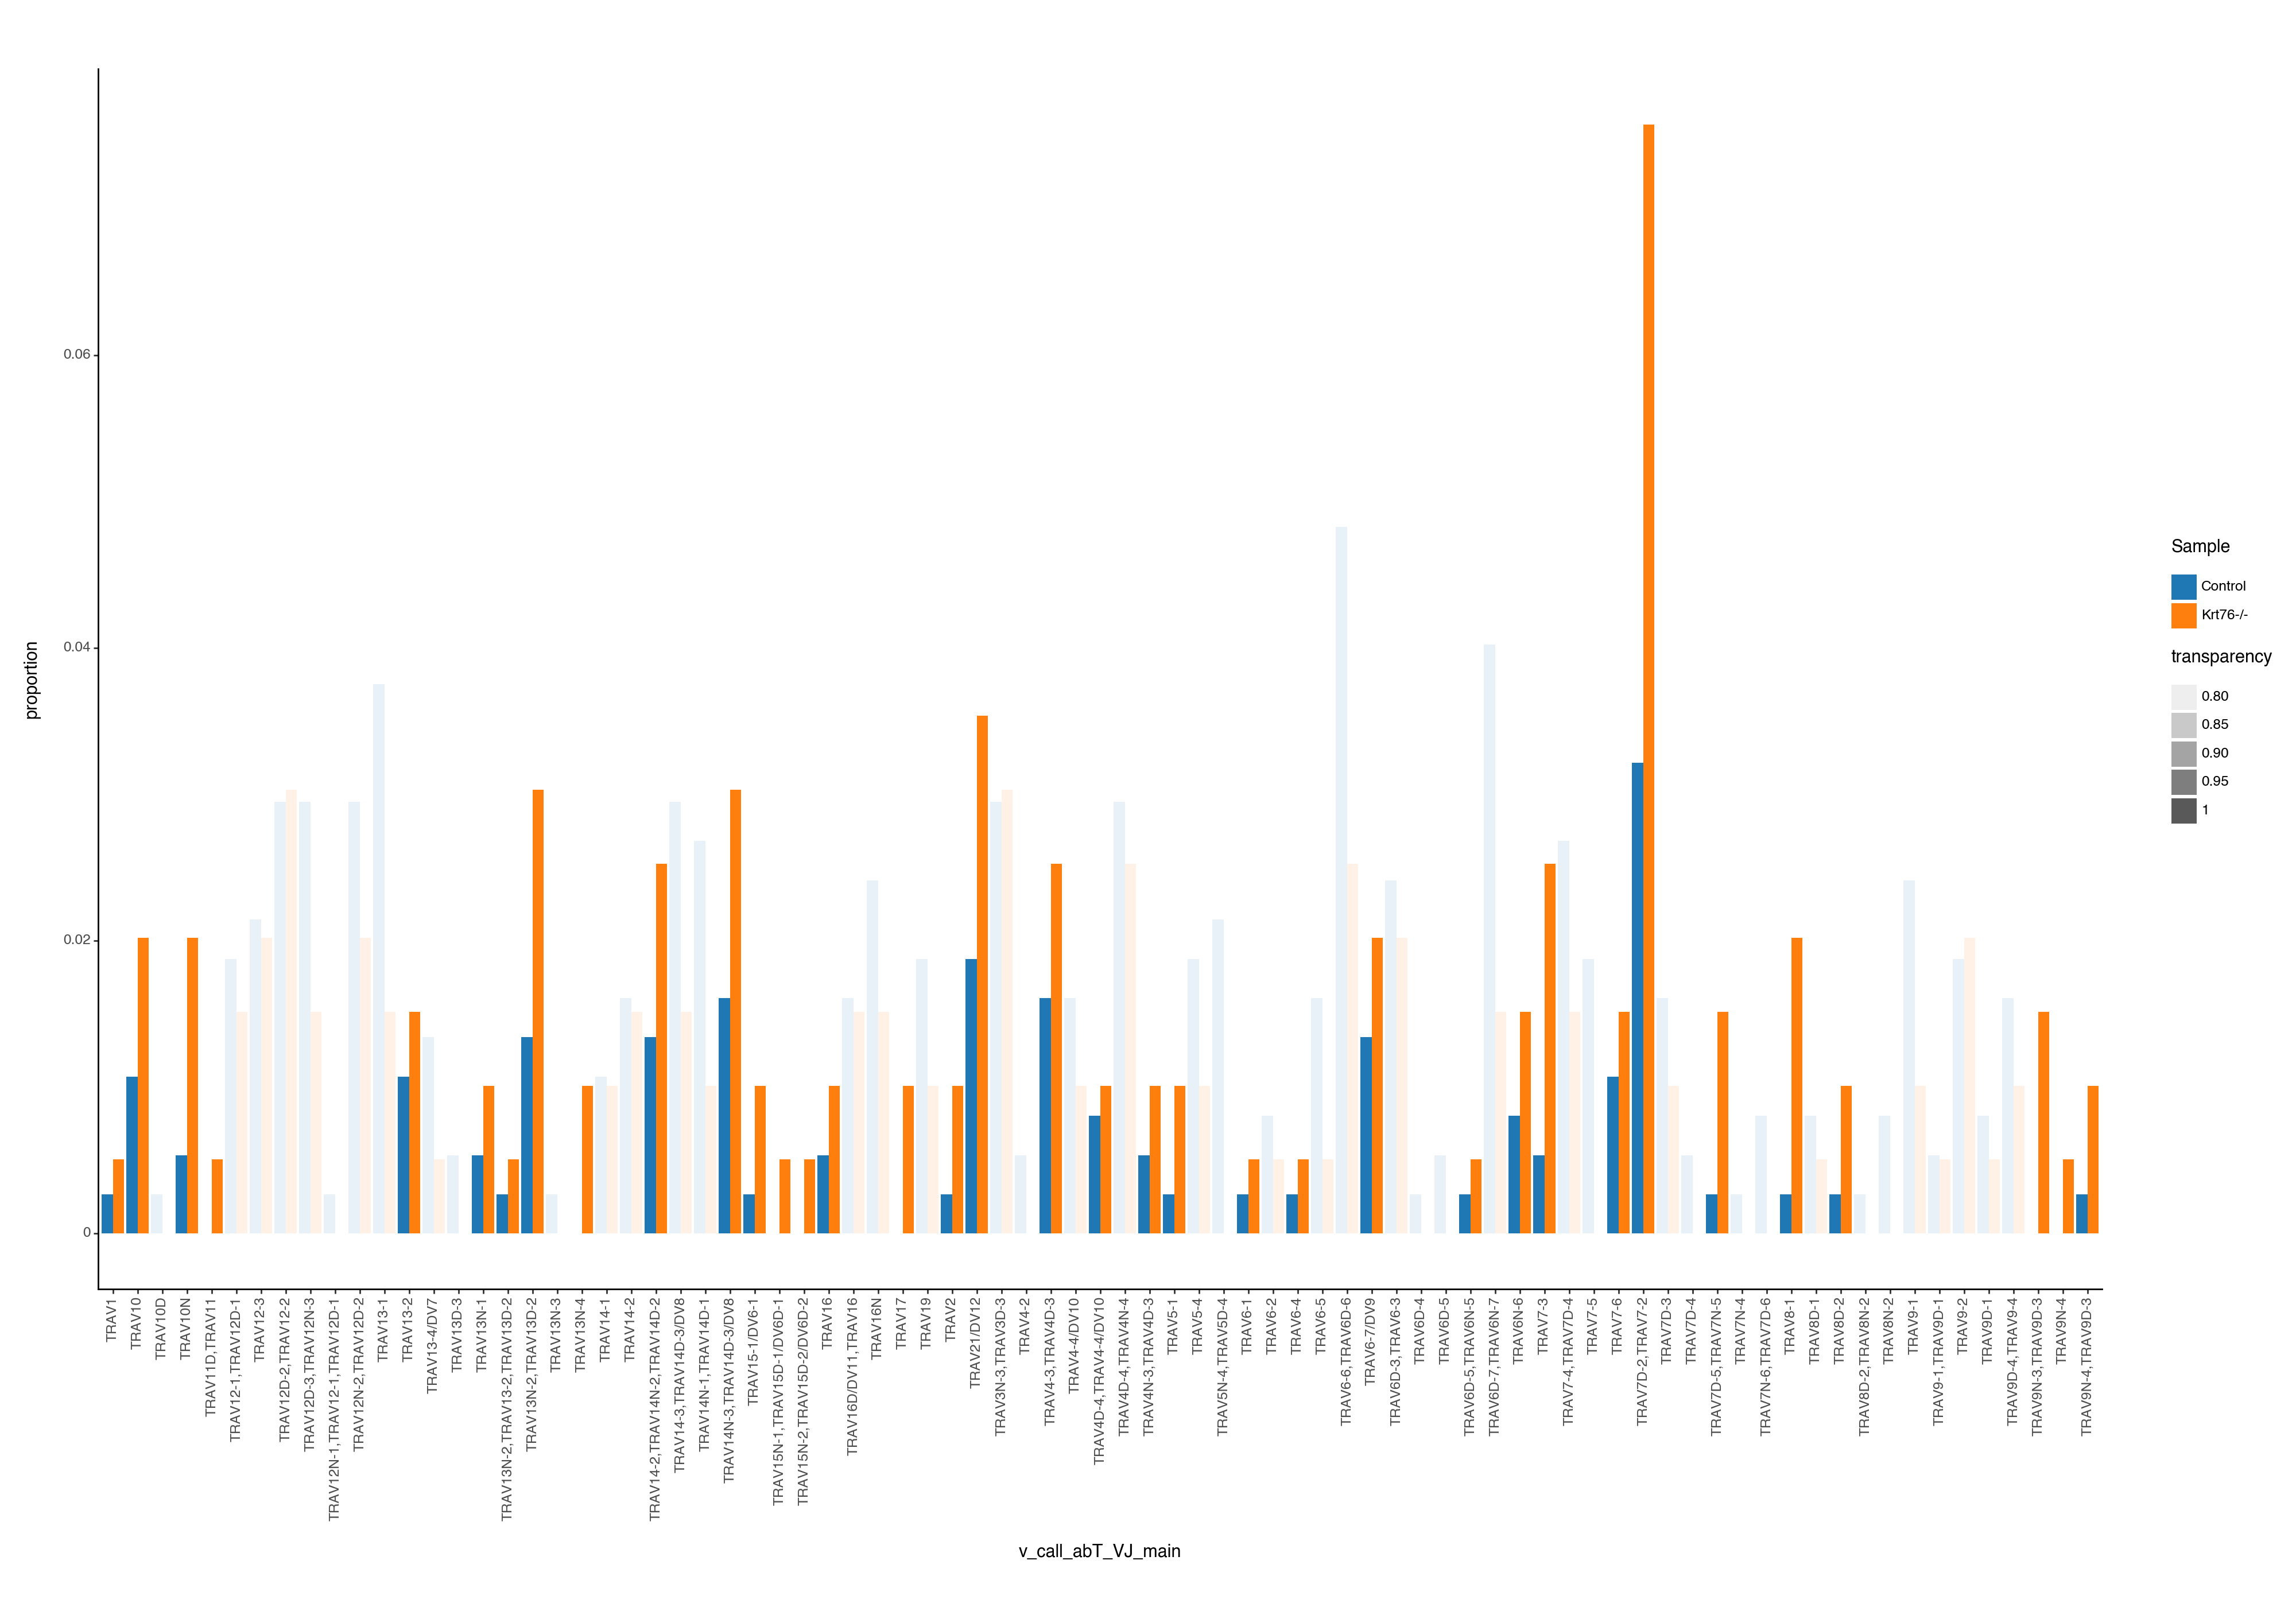

<Figure Size: (2000 x 1400)>

In [586]:
p

In [587]:
p.save("VgeneAlphaChain_SPnDP_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_SPnDP_181223.pdf


### TCRgd - V gene alpha chain

In [588]:
adata_NPF_TCRgd = adata_NPF[adata_NPF.obs["leiden"] == "8 TCRgd"]

In [589]:
adata_NPF_TCRgd

View of AnnData object with n_obs × n_vars = 11 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [590]:
working_df = pd.DataFrame(adata_NPF_TCRgd.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main               
Control  TRAV13-1                        2
         TRAV1                           1
         TRAV12D-3,TRAV12N-3             1
         TRAV12N-2,TRAV12D-2             1
         TRAV21/DV12                     1
         TRAV3N-3,TRAV3D-3               1
         TRAV7D-5,TRAV7N-5               1
         TRAV15N-2,TRAV15D-2/DV6D-2      0
Krt76-/- TRAV12D-3,TRAV12N-3             1
         TRAV15N-2,TRAV15D-2/DV6D-2      1
         TRAV3N-3,TRAV3D-3               1
         TRAV1                           0
         TRAV12N-2,TRAV12D-2             0
         TRAV13-1                        0
         TRAV21/DV12                     0
         TRAV7D-5,TRAV7N-5               0

In [591]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample          v_call_abT_VJ_main  counts
0    Control                    TRAV13-1       2
1    Control                       TRAV1       1
2    Control         TRAV12D-3,TRAV12N-3       1
3    Control         TRAV12N-2,TRAV12D-2       1
4    Control                 TRAV21/DV12       1
5    Control           TRAV3N-3,TRAV3D-3       1
6    Control           TRAV7D-5,TRAV7N-5       1
7    Control  TRAV15N-2,TRAV15D-2/DV6D-2       0
8   Krt76-/-         TRAV12D-3,TRAV12N-3       1
9   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       1
10  Krt76-/-           TRAV3N-3,TRAV3D-3       1
11  Krt76-/-                       TRAV1       0
12  Krt76-/-         TRAV12N-2,TRAV12D-2       0
13  Krt76-/-                    TRAV13-1       0
14  Krt76-/-                 TRAV21/DV12       0
15  Krt76-/-           TRAV7D-5,TRAV7N-5       0

In [592]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 8, 'Krt76-/-': 3}

In [593]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [594]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0    Control                    TRAV13-1       2    0.250000
1    Control                       TRAV1       1    0.125000
2    Control         TRAV12D-3,TRAV12N-3       1    0.125000
3    Control         TRAV12N-2,TRAV12D-2       1    0.125000
4    Control                 TRAV21/DV12       1    0.125000
5    Control           TRAV3N-3,TRAV3D-3       1    0.125000
6    Control           TRAV7D-5,TRAV7N-5       1    0.125000
7    Control  TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000
8   Krt76-/-         TRAV12D-3,TRAV12N-3       1    0.333333
9   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       1    0.333333
10  Krt76-/-           TRAV3N-3,TRAV3D-3       1    0.333333
11  Krt76-/-                       TRAV1       0    0.000000
12  Krt76-/-         TRAV12N-2,TRAV12D-2       0    0.000000
13  Krt76-/-                    TRAV13-1       0    0.000000
14  Krt76-/-                 TRAV21/DV12       0    0.000000
15  Krt76-/-           TRAV7D-5,TRAV7N-5       0    0.000000

In [595]:
working_control = working_df[working_df["Sample"] == "Control"]

In [596]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [597]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [598]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [599]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV12D-3,TRAV12N-3': 2.6666666666666665,
 'TRAV12N-2,TRAV12D-2': 0.0,
 'TRAV13-1': 0.0,
 'TRAV15N-2,TRAV15D-2/DV6D-2': inf,
 'TRAV21/DV12': 0.0,
 'TRAV3N-3,TRAV3D-3': 2.6666666666666665,
 'TRAV7D-5,TRAV7N-5': 0.0}

In [600]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample          v_call_abT_VJ_main  counts  proportion  foldchange
0    Control                    TRAV13-1       2    0.250000    0.000000
1    Control                       TRAV1       1    0.125000    0.000000
2    Control         TRAV12D-3,TRAV12N-3       1    0.125000    2.666667
3    Control         TRAV12N-2,TRAV12D-2       1    0.125000    0.000000
4    Control                 TRAV21/DV12       1    0.125000    0.000000
5    Control           TRAV3N-3,TRAV3D-3       1    0.125000    2.666667
6    Control           TRAV7D-5,TRAV7N-5       1    0.125000    0.000000
7    Control  TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000         inf
8   Krt76-/-         TRAV12D-3,TRAV12N-3       1    0.333333    2.666667
9   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       1    0.333333         inf
10  Krt76-/-           TRAV3N-3,TRAV3D-3       1    0.333333    2.666667
11  Krt76-/-                       TRAV1       0    0.000000    0.000000
12  Krt76-/-         TRAV12N-2,TRAV12D-2       0    0.000000    0.000000
13  Krt76-/-                    TRAV13-1       0    0.000000    0.000000
14  Krt76-/-                 TRAV21/DV12       0    0.000000    0.000000
15  Krt76-/-           TRAV7D-5,TRAV7N-5       0    0.000000    0.000000

In [601]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [602]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

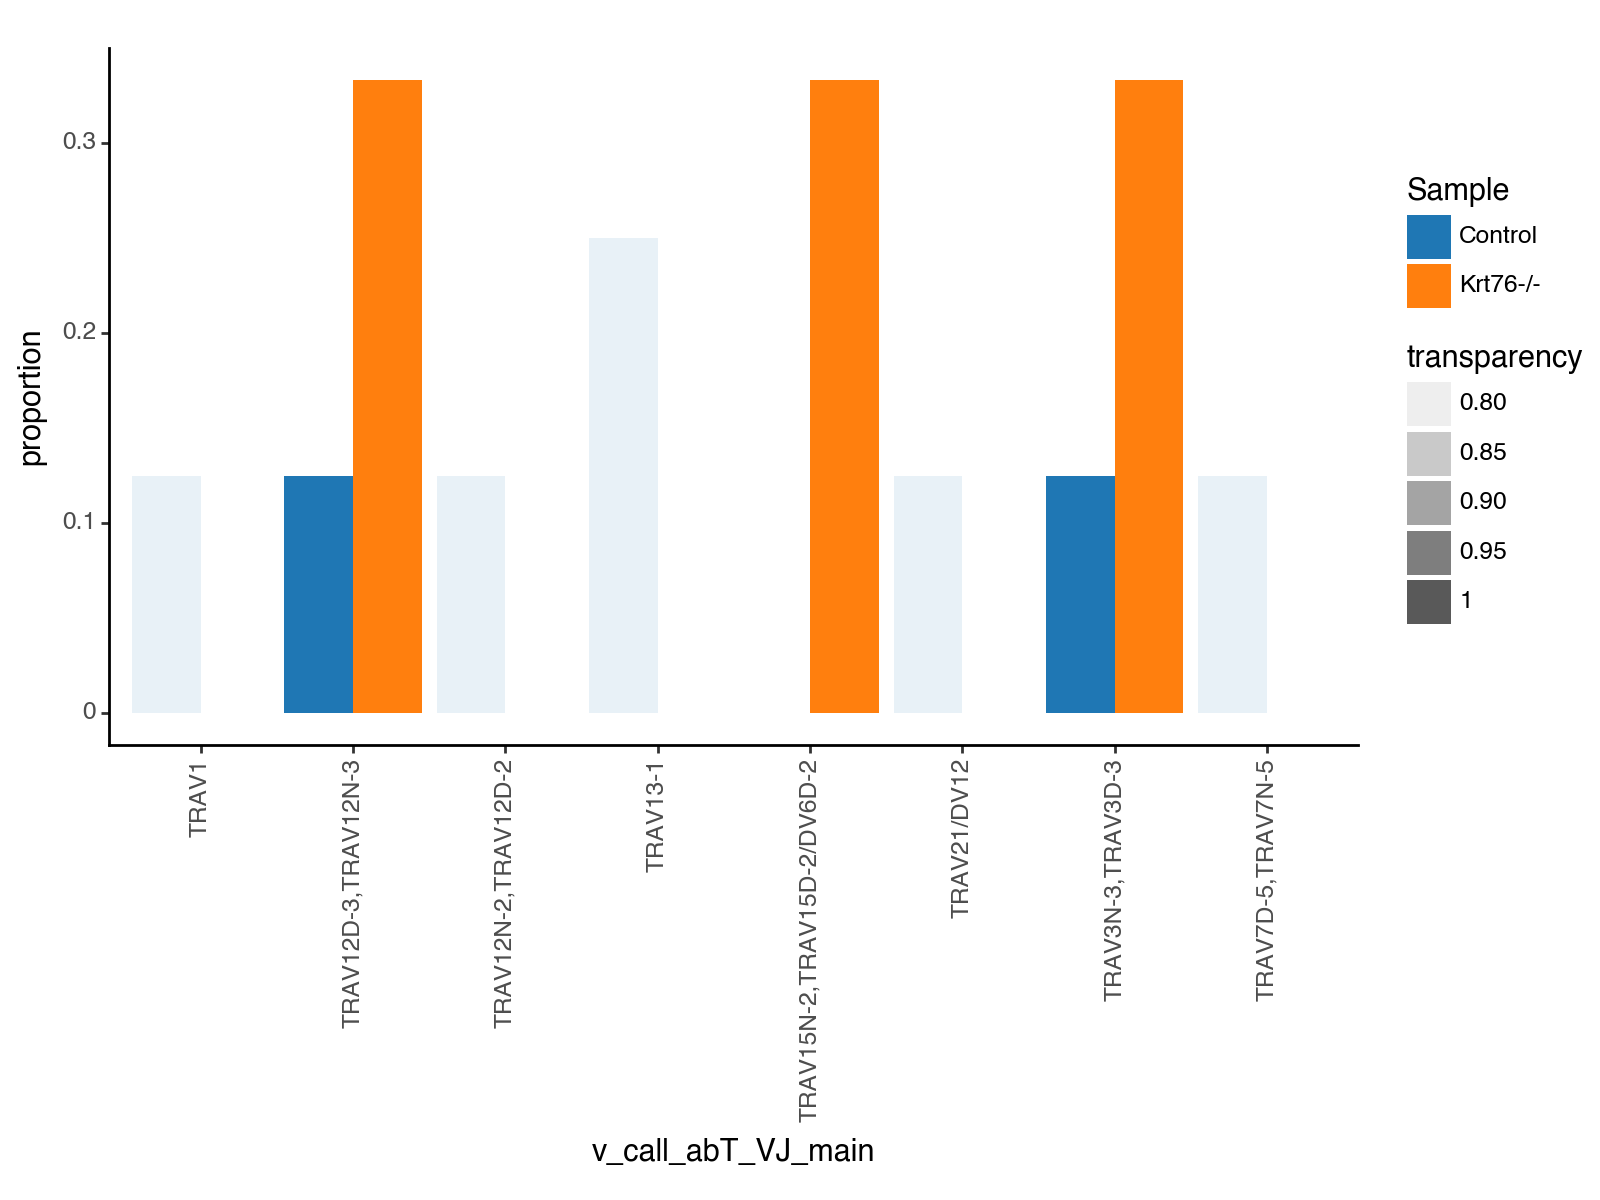

<Figure Size: (800 x 600)>

In [603]:
p

In [604]:
p.save("VgeneAlphaChain_TCRgd_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_TCRgd_181223.pdf


### NKT / NK / Tregs - V gene beta chain

In [605]:
adata_NPF_NKT_NK_Tregs = adata_NPF[adata_NPF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [606]:
adata_NPF_NKT_NK_Tregs

View of AnnData object with n_obs × n_vars = 104 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [607]:
working_df = pd.DataFrame(adata_NPF_NKT_NK_Tregs.obs.groupby("Sample")["v_call_abT_VJ_main"].value_counts())
working_df

count
Sample   v_call_abT_VJ_main               
Control  TRAV11D,TRAV11                  9
         TRAV7-4,TRAV7D-4                5
         TRAV6-7/DV9                     5
         TRAV6-6,TRAV6D-6                4
         TRAV12D-2,TRAV12-2              4
...                                    ...
Krt76-/- TRAV15N-2,TRAV15D-2/DV6D-2      0
         TRAV16D/DV11,TRAV16             0
         TRAV16N                         0
         TRAV21/DV12                     0
         TRAV9N-4                        0

[104 rows x 1 columns]

In [608]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample          v_call_abT_VJ_main  counts
0     Control              TRAV11D,TRAV11       9
1     Control            TRAV7-4,TRAV7D-4       5
2     Control                 TRAV6-7/DV9       5
3     Control            TRAV6-6,TRAV6D-6       4
4     Control          TRAV12D-2,TRAV12-2       4
..        ...                         ...     ...
99   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       0
100  Krt76-/-         TRAV16D/DV11,TRAV16       0
101  Krt76-/-                     TRAV16N       0
102  Krt76-/-                 TRAV21/DV12       0
103  Krt76-/-                    TRAV9N-4       0

[104 rows x 3 columns]

In [609]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 86, 'Krt76-/-': 18}

In [610]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [611]:
working_df

Sample          v_call_abT_VJ_main  counts  proportion
0     Control              TRAV11D,TRAV11       9    0.104651
1     Control            TRAV7-4,TRAV7D-4       5    0.058140
2     Control                 TRAV6-7/DV9       5    0.058140
3     Control            TRAV6-6,TRAV6D-6       4    0.046512
4     Control          TRAV12D-2,TRAV12-2       4    0.046512
..        ...                         ...     ...         ...
99   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000
100  Krt76-/-         TRAV16D/DV11,TRAV16       0    0.000000
101  Krt76-/-                     TRAV16N       0    0.000000
102  Krt76-/-                 TRAV21/DV12       0    0.000000
103  Krt76-/-                    TRAV9N-4       0    0.000000

[104 rows x 4 columns]

In [612]:
working_control = working_df[working_df["Sample"] == "Control"]

In [613]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [614]:
working_control.set_index("v_call_abT_VJ_main", inplace=True)

In [615]:
working_KO.set_index("v_call_abT_VJ_main", inplace=True)

In [616]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAV1': 0.0,
 'TRAV10': 0.0,
 'TRAV10D,TRAV10N': 0.0,
 'TRAV10N': 0.0,
 'TRAV11D,TRAV11': 2.654320987654321,
 'TRAV12D-2': 0.0,
 'TRAV12D-2,TRAV12-2': 1.1944444444444444,
 'TRAV12D-3,TRAV12N-3': 0.0,
 'TRAV12N-1,TRAV12-1,TRAV12D-1': 0.0,
 'TRAV13-1': 0.0,
 'TRAV13-2': 0.0,
 'TRAV13N-2,TRAV13D-2': 0.0,
 'TRAV13N-3': 0.0,
 'TRAV13N-4': inf,
 'TRAV14-2': 0.0,
 'TRAV14-3,TRAV14D-3/DV8': 0.0,
 'TRAV14N-1,TRAV14D-1': 0.0,
 'TRAV14N-3,TRAV14D-3/DV8': 0.0,
 'TRAV15N-2,TRAV15D-2/DV6D-2': 0.0,
 'TRAV16D/DV11,TRAV16': 0.0,
 'TRAV16N': 0.0,
 'TRAV17': inf,
 'TRAV21/DV12': 0.0,
 'TRAV3N-3,TRAV3D-3': 0.0,
 'TRAV4-2': 0.0,
 'TRAV4-3,TRAV4D-3': 0.0,
 'TRAV4-4/DV10': inf,
 'TRAV4D-4,TRAV4-4/DV10': 0.0,
 'TRAV4D-4,TRAV4N-4': 0.0,
 'TRAV5-1': 0.0,
 'TRAV5-4': 0.0,
 'TRAV6-5': 4.777777777777778,
 'TRAV6-6,TRAV6D-6': 1.1944444444444444,
 'TRAV6-7/DV9': 0.0,
 'TRAV6D-3,TRAV6-3': 0.0,
 'TRAV6D-5': 0.0,
 'TRAV6D-7,TRAV6N-7': inf,
 'TRAV7-1': 0.0,
 'TRAV7-4,TRAV7D-4': 0.9555555555555555,
 'TRAV7-5': 0.0,
 'T

In [617]:
working_df["foldchange"] = [dict1[x] for x in working_df["v_call_abT_VJ_main"]]
working_df

Sample          v_call_abT_VJ_main  counts  proportion  foldchange
0     Control              TRAV11D,TRAV11       9    0.104651    2.654321
1     Control            TRAV7-4,TRAV7D-4       5    0.058140    0.955556
2     Control                 TRAV6-7/DV9       5    0.058140    0.000000
3     Control            TRAV6-6,TRAV6D-6       4    0.046512    1.194444
4     Control          TRAV12D-2,TRAV12-2       4    0.046512    1.194444
..        ...                         ...     ...         ...         ...
99   Krt76-/-  TRAV15N-2,TRAV15D-2/DV6D-2       0    0.000000    0.000000
100  Krt76-/-         TRAV16D/DV11,TRAV16       0    0.000000    0.000000
101  Krt76-/-                     TRAV16N       0    0.000000    0.000000
102  Krt76-/-                 TRAV21/DV12       0    0.000000    0.000000
103  Krt76-/-                    TRAV9N-4       0    0.000000    0.000000

[104 rows x 5 columns]

In [618]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [619]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

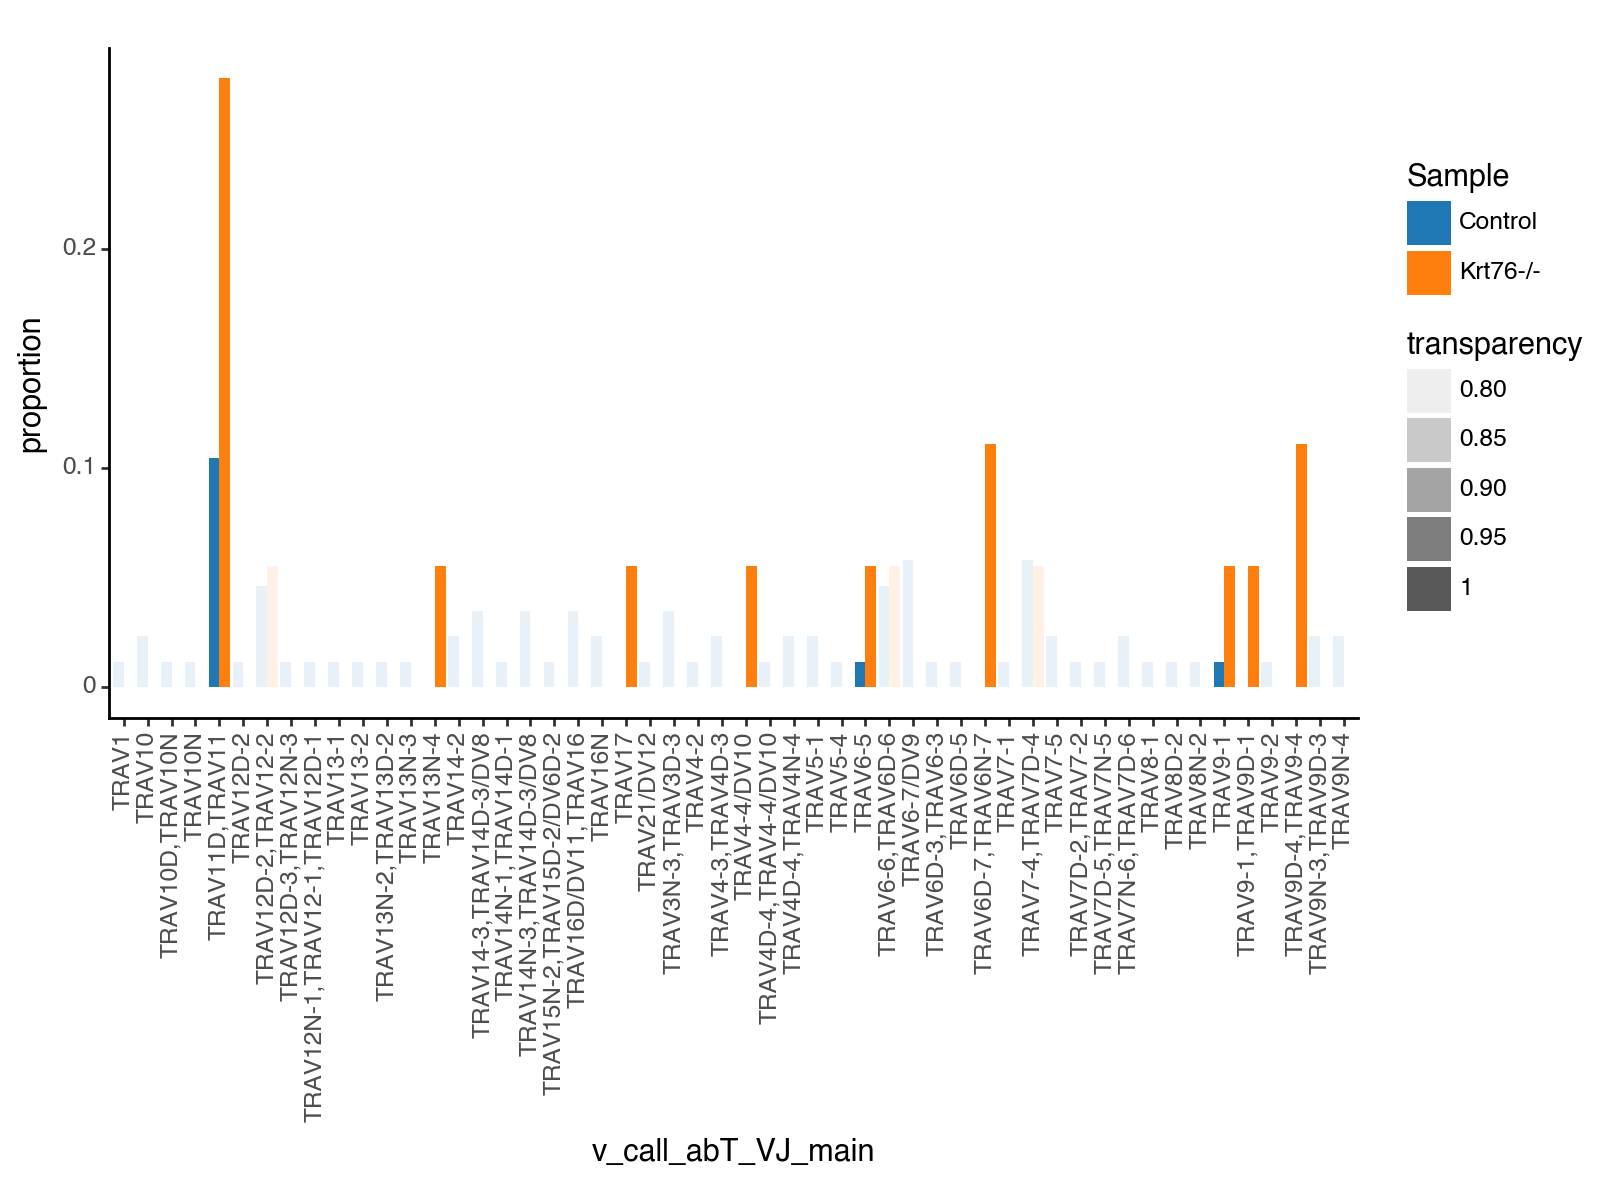

<Figure Size: (800 x 600)>

In [620]:
p

In [621]:
p.save("VgeneAlphaChain_NKT_NK_Tregs_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: VgeneAlphaChain_NKT_NK_Tregs_181223.pdf


### J gene

### DN2a - J gene alpha chain

In [622]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [623]:
adata_NPF

View of AnnData object with n_obs × n_vars = 2100 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [624]:
adata_NPF_DN2a = adata_NPF[adata_NPF.obs["leiden"] == "7 DN2a"]

In [625]:
working_df = pd.DataFrame(adata_NPF_DN2a.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ7                   2
         TRAJ12                  1
         TRAJ4                   1
         TRAJ15                  1
         TRAJ52                  1
         TRAJ44                  1
         TRAJ42                  1
         TRAJ38                  1
         TRAJ30                  1
         TRAJ27                  1
         TRAJ22                  1
         TRAJ2                   1
         TRAJ57                  0
         TRAJ5                   0
         TRAJ34                  0
         TRAJ32                  0
Krt76-/- TRAJ5                   1
         TRAJ32                  1
         TRAJ52                  1
         TRAJ57                  1
         TRAJ34                  1
         TRAJ44                  0
         TRAJ42                  0
         TRAJ4                   0
         TRAJ38                  0
         TRAJ12                  0
         TRAJ30                  0
         TRAJ27                  0
         TRAJ22                  0
         TRAJ2                   0
         TRAJ15                  0
         TRAJ7                   0

In [626]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control              TRAJ7       2
1    Control             TRAJ12       1
2    Control              TRAJ4       1
3    Control             TRAJ15       1
4    Control             TRAJ52       1
5    Control             TRAJ44       1
6    Control             TRAJ42       1
7    Control             TRAJ38       1
8    Control             TRAJ30       1
9    Control             TRAJ27       1
10   Control             TRAJ22       1
11   Control              TRAJ2       1
12   Control             TRAJ57       0
13   Control              TRAJ5       0
14   Control             TRAJ34       0
15   Control             TRAJ32       0
16  Krt76-/-              TRAJ5       1
17  Krt76-/-             TRAJ32       1
18  Krt76-/-             TRAJ52       1
19  Krt76-/-             TRAJ57       1
20  Krt76-/-             TRAJ34       1
21  Krt76-/-             TRAJ44       0
22  Krt76-/-             TRAJ42       0
23  Krt76-/-              TRAJ4       0
24  Krt76-/-             TRAJ38       0
25  Krt76-/-             TRAJ12       0
26  Krt76-/-             TRAJ30       0
27  Krt76-/-             TRAJ27       0
28  Krt76-/-             TRAJ22       0
29  Krt76-/-              TRAJ2       0
30  Krt76-/-             TRAJ15       0
31  Krt76-/-              TRAJ7       0

In [627]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 13, 'Krt76-/-': 5}

In [628]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [629]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control              TRAJ7       2    0.153846
1    Control             TRAJ12       1    0.076923
2    Control              TRAJ4       1    0.076923
3    Control             TRAJ15       1    0.076923
4    Control             TRAJ52       1    0.076923
5    Control             TRAJ44       1    0.076923
6    Control             TRAJ42       1    0.076923
7    Control             TRAJ38       1    0.076923
8    Control             TRAJ30       1    0.076923
9    Control             TRAJ27       1    0.076923
10   Control             TRAJ22       1    0.076923
11   Control              TRAJ2       1    0.076923
12   Control             TRAJ57       0    0.000000
13   Control              TRAJ5       0    0.000000
14   Control             TRAJ34       0    0.000000
15   Control             TRAJ32       0    0.000000
16  Krt76-/-              TRAJ5       1    0.200000
17  Krt76-/-             TRAJ32       1    0.200000
18  Krt76-/-             TRAJ52       1    0.200000
19  Krt76-/-             TRAJ57       1    0.200000
20  Krt76-/-             TRAJ34       1    0.200000
21  Krt76-/-             TRAJ44       0    0.000000
22  Krt76-/-             TRAJ42       0    0.000000
23  Krt76-/-              TRAJ4       0    0.000000
24  Krt76-/-             TRAJ38       0    0.000000
25  Krt76-/-             TRAJ12       0    0.000000
26  Krt76-/-             TRAJ30       0    0.000000
27  Krt76-/-             TRAJ27       0    0.000000
28  Krt76-/-             TRAJ22       0    0.000000
29  Krt76-/-              TRAJ2       0    0.000000
30  Krt76-/-             TRAJ15       0    0.000000
31  Krt76-/-              TRAJ7       0    0.000000

In [630]:
working_control = working_df[working_df["Sample"] == "Control"]

In [631]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [632]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [633]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [634]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ12': 0.0,
 'TRAJ15': 0.0,
 'TRAJ2': 0.0,
 'TRAJ22': 0.0,
 'TRAJ27': 0.0,
 'TRAJ30': 0.0,
 'TRAJ32': inf,
 'TRAJ34': inf,
 'TRAJ38': 0.0,
 'TRAJ4': 0.0,
 'TRAJ42': 0.0,
 'TRAJ44': 0.0,
 'TRAJ5': inf,
 'TRAJ52': 2.6,
 'TRAJ57': inf,
 'TRAJ7': 0.0}

In [635]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control              TRAJ7       2    0.153846         0.0
1    Control             TRAJ12       1    0.076923         0.0
2    Control              TRAJ4       1    0.076923         0.0
3    Control             TRAJ15       1    0.076923         0.0
4    Control             TRAJ52       1    0.076923         2.6
5    Control             TRAJ44       1    0.076923         0.0
6    Control             TRAJ42       1    0.076923         0.0
7    Control             TRAJ38       1    0.076923         0.0
8    Control             TRAJ30       1    0.076923         0.0
9    Control             TRAJ27       1    0.076923         0.0
10   Control             TRAJ22       1    0.076923         0.0
11   Control              TRAJ2       1    0.076923         0.0
12   Control             TRAJ57       0    0.000000         inf
13   Control              TRAJ5       0    0.000000         inf
14   Control             TRAJ34       0    0.000000         inf
15   Control             TRAJ32       0    0.000000         inf
16  Krt76-/-              TRAJ5       1    0.200000         inf
17  Krt76-/-             TRAJ32       1    0.200000         inf
18  Krt76-/-             TRAJ52       1    0.200000         2.6
19  Krt76-/-             TRAJ57       1    0.200000         inf
20  Krt76-/-             TRAJ34       1    0.200000         inf
21  Krt76-/-             TRAJ44       0    0.000000         0.0
22  Krt76-/-             TRAJ42       0    0.000000         0.0
23  Krt76-/-              TRAJ4       0    0.000000         0.0
24  Krt76-/-             TRAJ38       0    0.000000         0.0
25  Krt76-/-             TRAJ12       0    0.000000         0.0
26  Krt76-/-             TRAJ30       0    0.000000         0.0
27  Krt76-/-             TRAJ27       0    0.000000         0.0
28  Krt76-/-             TRAJ22       0    0.000000         0.0
29  Krt76-/-              TRAJ2       0    0.000000         0.0
30  Krt76-/-             TRAJ15       0    0.000000         0.0
31  Krt76-/-              TRAJ7       0    0.000000         0.0

In [636]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [637]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

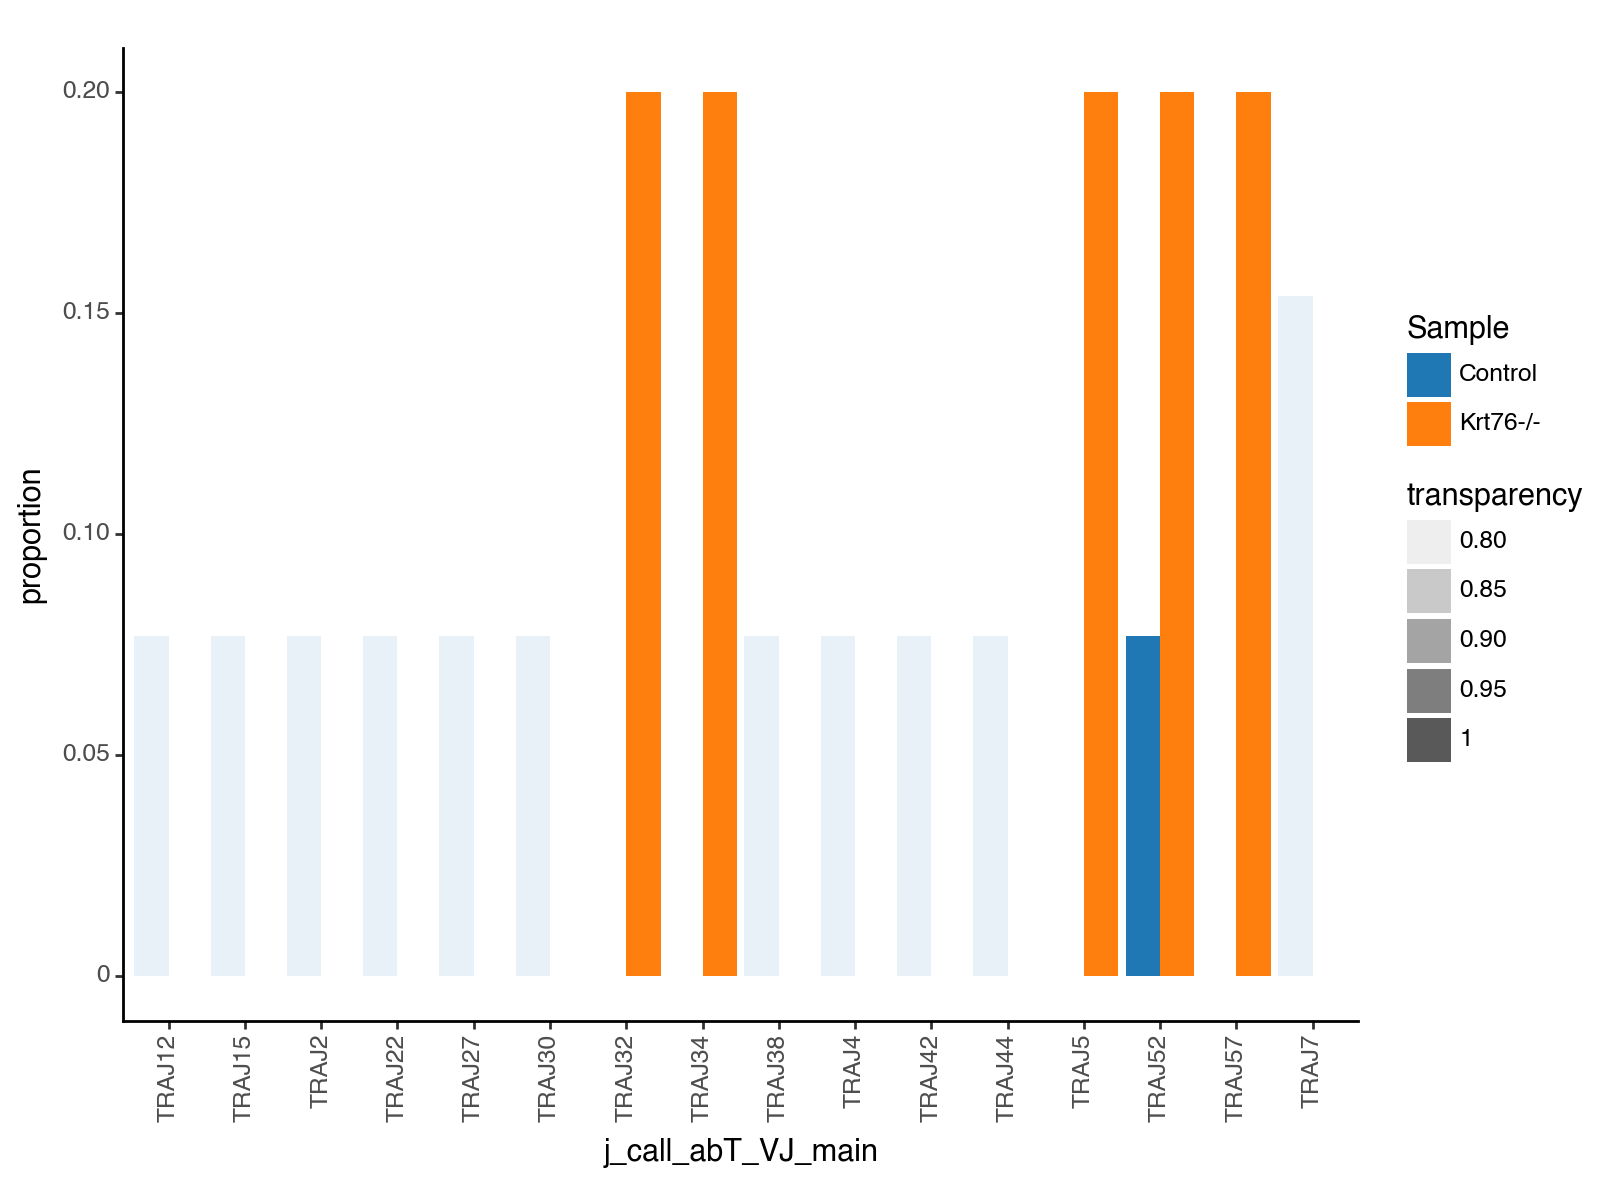

<Figure Size: (800 x 600)>

In [638]:
p

In [639]:
p.save("JgeneAlphaChain_DN2a_NP_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2a_NP_181223.pdf


### DN2b 1- J gene alpha chain

In [640]:
adata_NPF_DN2b = adata_NPF[adata_NPF.obs["leiden"] == "12 DN2b 1"]

In [641]:
adata_NPF_DN2b

View of AnnData object with n_obs × n_vars = 8 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', '

In [642]:
working_df = pd.DataFrame(adata_NPF_DN2b.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ42                  1
         TRAJ45                  1
         TRAJ6                   1
         TRAJ22                  0
         TRAJ37                  0
         TRAJ40                  0
Krt76-/- TRAJ37                  2
         TRAJ22                  1
         TRAJ40                  1
         TRAJ42                  1
         TRAJ45                  0
         TRAJ6                   0

In [643]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ42       1
1    Control             TRAJ45       1
2    Control              TRAJ6       1
3    Control             TRAJ22       0
4    Control             TRAJ37       0
5    Control             TRAJ40       0
6   Krt76-/-             TRAJ37       2
7   Krt76-/-             TRAJ22       1
8   Krt76-/-             TRAJ40       1
9   Krt76-/-             TRAJ42       1
10  Krt76-/-             TRAJ45       0
11  Krt76-/-              TRAJ6       0

In [644]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 3, 'Krt76-/-': 5}

In [645]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [646]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ42       1    0.333333
1    Control             TRAJ45       1    0.333333
2    Control              TRAJ6       1    0.333333
3    Control             TRAJ22       0    0.000000
4    Control             TRAJ37       0    0.000000
5    Control             TRAJ40       0    0.000000
6   Krt76-/-             TRAJ37       2    0.400000
7   Krt76-/-             TRAJ22       1    0.200000
8   Krt76-/-             TRAJ40       1    0.200000
9   Krt76-/-             TRAJ42       1    0.200000
10  Krt76-/-             TRAJ45       0    0.000000
11  Krt76-/-              TRAJ6       0    0.000000

In [647]:
working_control = working_df[working_df["Sample"] == "Control"]

In [648]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [649]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [650]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [651]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ22': inf,
 'TRAJ37': inf,
 'TRAJ40': inf,
 'TRAJ42': 0.6000000000000001,
 'TRAJ45': 0.0,
 'TRAJ6': 0.0}

In [652]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ42       1    0.333333         0.6
1    Control             TRAJ45       1    0.333333         0.0
2    Control              TRAJ6       1    0.333333         0.0
3    Control             TRAJ22       0    0.000000         inf
4    Control             TRAJ37       0    0.000000         inf
5    Control             TRAJ40       0    0.000000         inf
6   Krt76-/-             TRAJ37       2    0.400000         inf
7   Krt76-/-             TRAJ22       1    0.200000         inf
8   Krt76-/-             TRAJ40       1    0.200000         inf
9   Krt76-/-             TRAJ42       1    0.200000         0.6
10  Krt76-/-             TRAJ45       0    0.000000         0.0
11  Krt76-/-              TRAJ6       0    0.000000         0.0

In [653]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [654]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

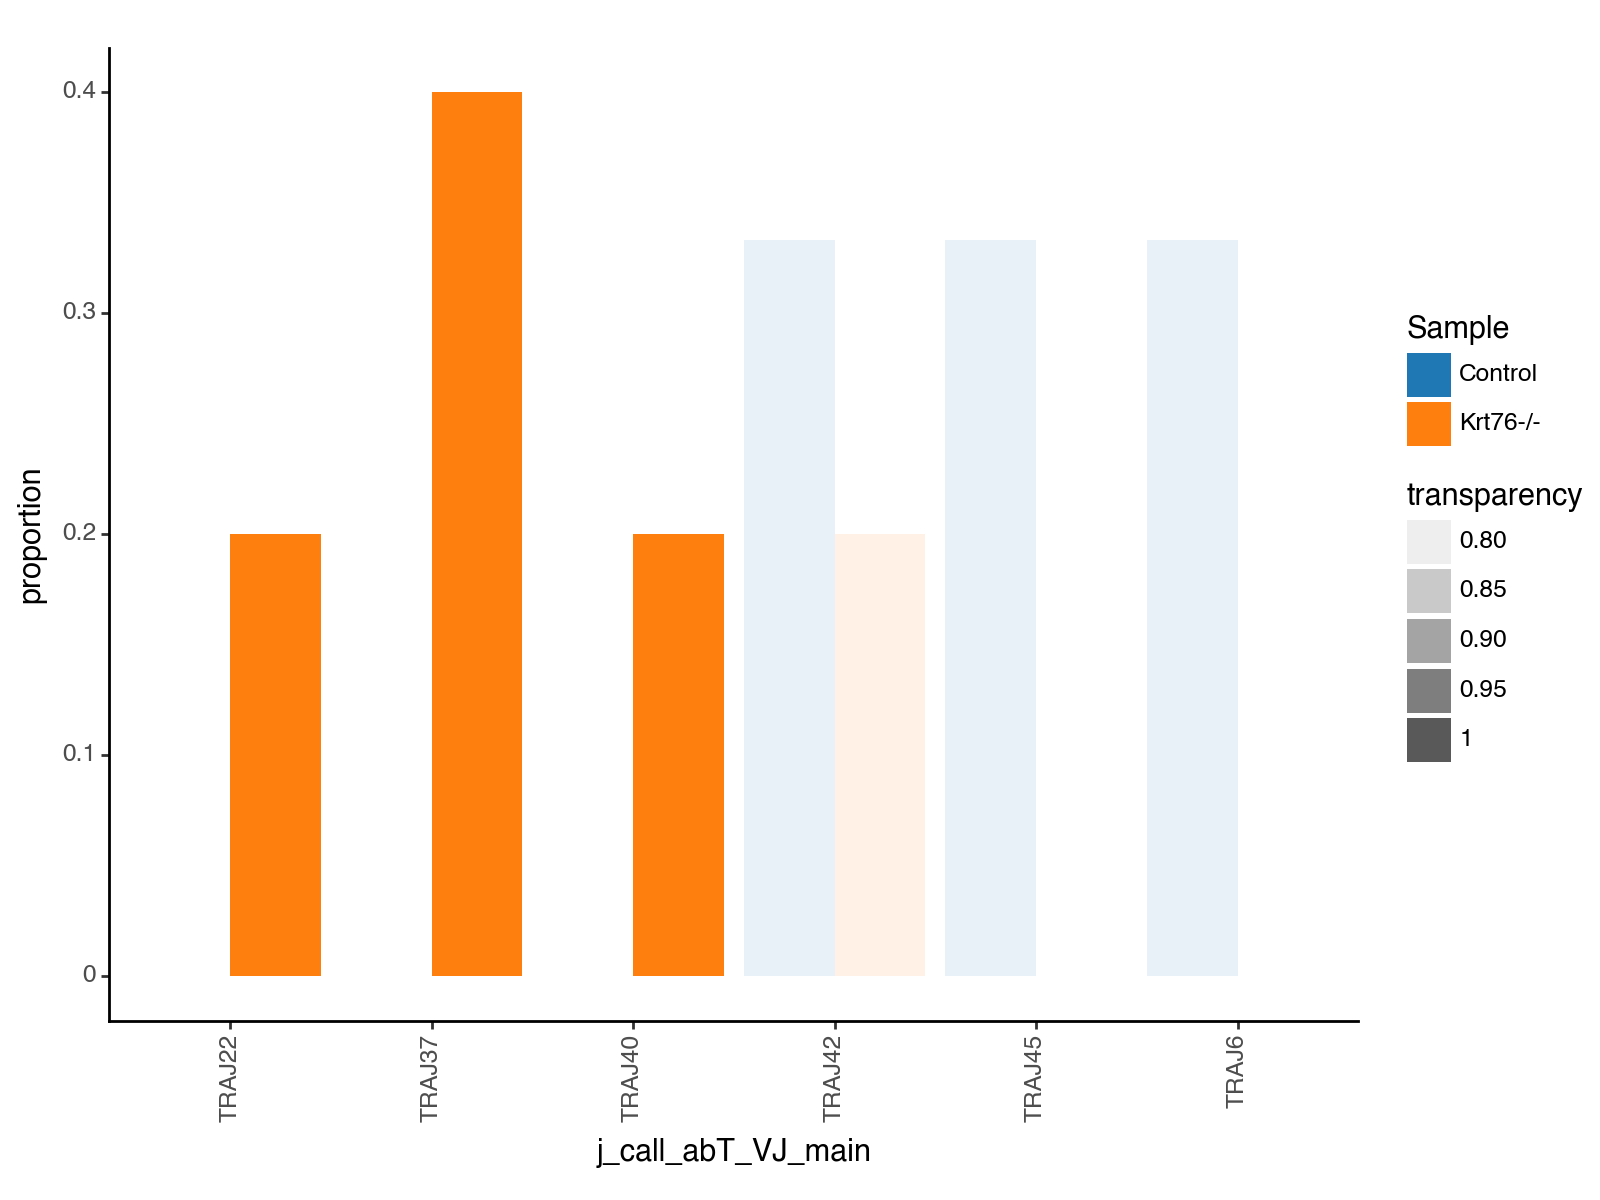

<Figure Size: (800 x 600)>

In [655]:
p

In [656]:
p.save("JgeneAlphaChain_DN2b_1_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2b_1_181223.pdf


### DN2b 2 - J gene beta chain

In [657]:
adata_NPF_DN2b2 = adata_NPF[adata_NPF.obs["leiden"] == "4 DN2b 2"]

In [658]:
adata_NPF_DN2b2

View of AnnData object with n_obs × n_vars = 73 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [659]:
working_df = pd.DataFrame(adata_NPF_DN2b2.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ58                  7
         TRAJ28                  6
         TRAJ16                  3
         TRAJ22                  3
         TRAJ37                  2
...                            ...
Krt76-/- TRAJ26                  0
         TRAJ23                  0
         TRAJ2                   0
         TRAJ16                  0
         TRAJ11                  0

[68 rows x 1 columns]

In [660]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ58       7
1    Control             TRAJ28       6
2    Control             TRAJ16       3
3    Control             TRAJ22       3
4    Control             TRAJ37       2
..       ...                ...     ...
63  Krt76-/-             TRAJ26       0
64  Krt76-/-             TRAJ23       0
65  Krt76-/-              TRAJ2       0
66  Krt76-/-             TRAJ16       0
67  Krt76-/-             TRAJ11       0

[68 rows x 3 columns]

In [661]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 41, 'Krt76-/-': 32}

In [662]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [663]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ58       7    0.170732
1    Control             TRAJ28       6    0.146341
2    Control             TRAJ16       3    0.073171
3    Control             TRAJ22       3    0.073171
4    Control             TRAJ37       2    0.048780
..       ...                ...     ...         ...
63  Krt76-/-             TRAJ26       0    0.000000
64  Krt76-/-             TRAJ23       0    0.000000
65  Krt76-/-              TRAJ2       0    0.000000
66  Krt76-/-             TRAJ16       0    0.000000
67  Krt76-/-             TRAJ11       0    0.000000

[68 rows x 4 columns]

In [664]:
working_control = working_df[working_df["Sample"] == "Control"]

In [665]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [666]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [667]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [668]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ11': 0.0,
 'TRAJ15': inf,
 'TRAJ16': 0.0,
 'TRAJ17': inf,
 'TRAJ2': 0.0,
 'TRAJ21': inf,
 'TRAJ22': 0.42708333333333337,
 'TRAJ23': 0.0,
 'TRAJ24': inf,
 'TRAJ26': 0.0,
 'TRAJ27': 0.640625,
 'TRAJ28': 0.0,
 'TRAJ30': 1.28125,
 'TRAJ31': 1.28125,
 'TRAJ32': 1.28125,
 'TRAJ35': 0.0,
 'TRAJ37': 0.640625,
 'TRAJ38': 0.0,
 'TRAJ39': 1.28125,
 'TRAJ4': 0.0,
 'TRAJ40': inf,
 'TRAJ41': 0.0,
 'TRAJ42': inf,
 'TRAJ43': inf,
 'TRAJ45': 1.28125,
 'TRAJ46,TRAJ41,TRAJ26': inf,
 'TRAJ47': inf,
 'TRAJ49': 0.0,
 'TRAJ50': inf,
 'TRAJ52': 0.0,
 'TRAJ56': 1.28125,
 'TRAJ57': inf,
 'TRAJ58': 0.36607142857142855,
 'TRAJ9': inf}

In [669]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ58       7    0.170732    0.366071
1    Control             TRAJ28       6    0.146341    0.000000
2    Control             TRAJ16       3    0.073171    0.000000
3    Control             TRAJ22       3    0.073171    0.427083
4    Control             TRAJ37       2    0.048780    0.640625
..       ...                ...     ...         ...         ...
63  Krt76-/-             TRAJ26       0    0.000000    0.000000
64  Krt76-/-             TRAJ23       0    0.000000    0.000000
65  Krt76-/-              TRAJ2       0    0.000000    0.000000
66  Krt76-/-             TRAJ16       0    0.000000    0.000000
67  Krt76-/-             TRAJ11       0    0.000000    0.000000

[68 rows x 5 columns]

In [670]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1


In [671]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

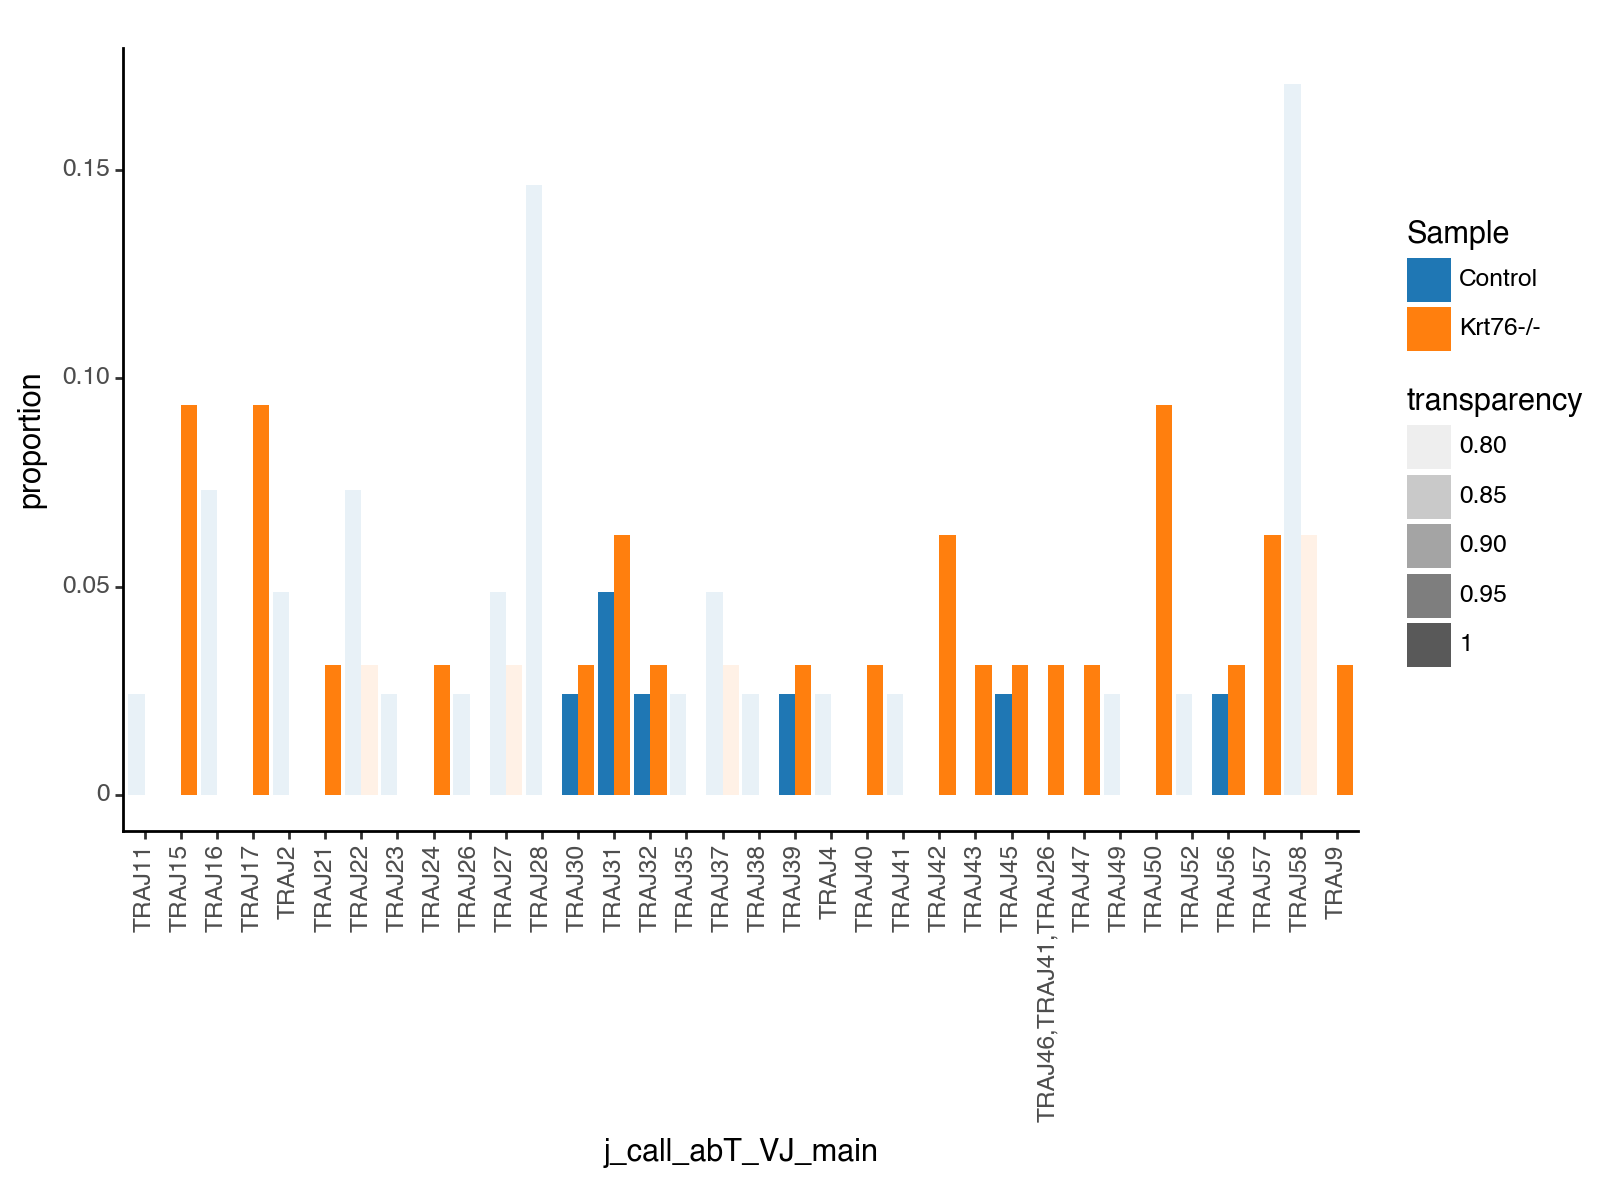

<Figure Size: (800 x 600)>

In [672]:
p

In [673]:
p.save("JgeneAlphaChain_DN2b2_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN2b2_181223.pdf


### DN3 - J gene alpha chain

In [674]:
adata_NPF_DN3 = adata_NPF[adata_NPF.obs["leiden"] == "10 DN3"]

In [675]:
adata_NPF_DN3

View of AnnData object with n_obs × n_vars = 10 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [676]:
working_df = pd.DataFrame(adata_NPF_DN3.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ49                  2
         TRAJ21                  1
         TRAJ23                  1
         TRAJ40                  1
         TRAJ58                  1
         TRDJ1                   0
Krt76-/- TRAJ58                  3
         TRDJ1                   1
         TRAJ21                  0
         TRAJ23                  0
         TRAJ40                  0
         TRAJ49                  0

In [677]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ49       2
1    Control             TRAJ21       1
2    Control             TRAJ23       1
3    Control             TRAJ40       1
4    Control             TRAJ58       1
5    Control              TRDJ1       0
6   Krt76-/-             TRAJ58       3
7   Krt76-/-              TRDJ1       1
8   Krt76-/-             TRAJ21       0
9   Krt76-/-             TRAJ23       0
10  Krt76-/-             TRAJ40       0
11  Krt76-/-             TRAJ49       0

In [678]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 6, 'Krt76-/-': 4}

In [679]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [680]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ49       2    0.333333
1    Control             TRAJ21       1    0.166667
2    Control             TRAJ23       1    0.166667
3    Control             TRAJ40       1    0.166667
4    Control             TRAJ58       1    0.166667
5    Control              TRDJ1       0    0.000000
6   Krt76-/-             TRAJ58       3    0.750000
7   Krt76-/-              TRDJ1       1    0.250000
8   Krt76-/-             TRAJ21       0    0.000000
9   Krt76-/-             TRAJ23       0    0.000000
10  Krt76-/-             TRAJ40       0    0.000000
11  Krt76-/-             TRAJ49       0    0.000000

In [681]:
working_control = working_df[working_df["Sample"] == "Control"]

In [682]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [683]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [684]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [685]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ21': 0.0,
 'TRAJ23': 0.0,
 'TRAJ40': 0.0,
 'TRAJ49': 0.0,
 'TRAJ58': 4.5,
 'TRDJ1': inf}

In [686]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ49       2    0.333333         0.0
1    Control             TRAJ21       1    0.166667         0.0
2    Control             TRAJ23       1    0.166667         0.0
3    Control             TRAJ40       1    0.166667         0.0
4    Control             TRAJ58       1    0.166667         4.5
5    Control              TRDJ1       0    0.000000         inf
6   Krt76-/-             TRAJ58       3    0.750000         4.5
7   Krt76-/-              TRDJ1       1    0.250000         inf
8   Krt76-/-             TRAJ21       0    0.000000         0.0
9   Krt76-/-             TRAJ23       0    0.000000         0.0
10  Krt76-/-             TRAJ40       0    0.000000         0.0
11  Krt76-/-             TRAJ49       0    0.000000         0.0

In [687]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [688]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

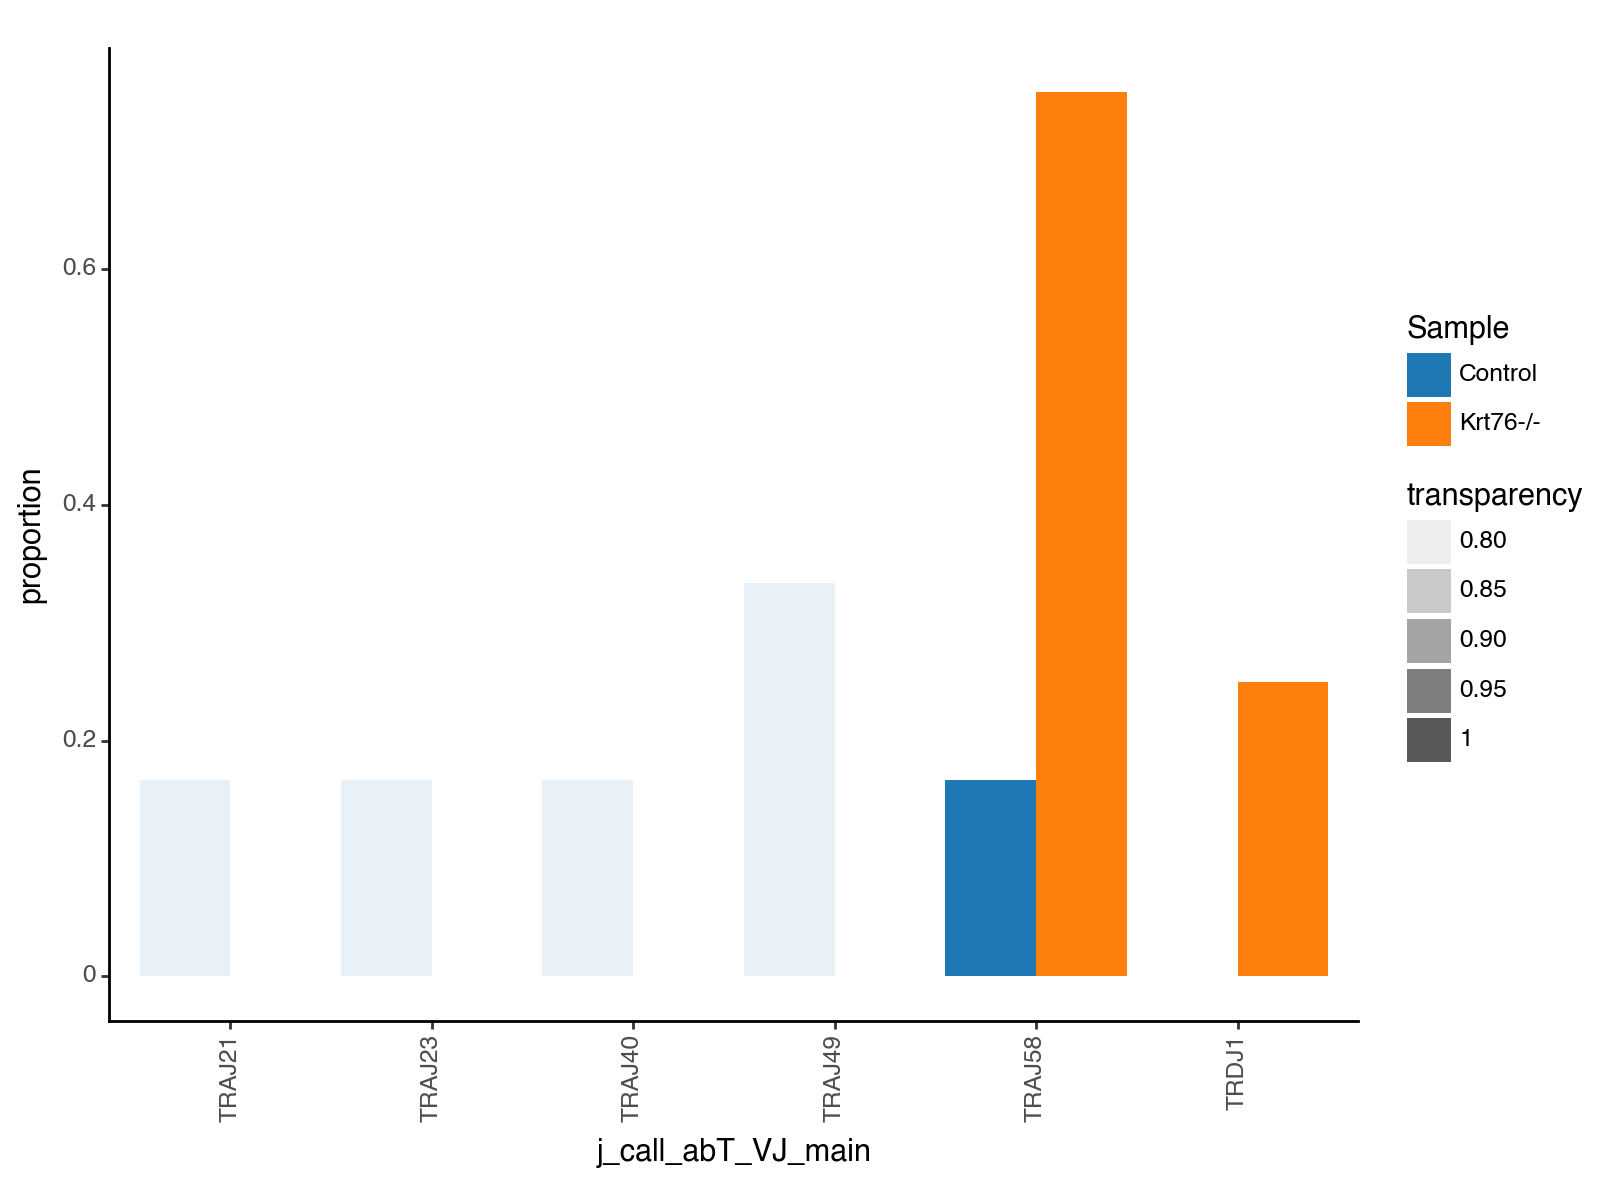

<Figure Size: (800 x 600)>

In [689]:
p

In [690]:
p.save("JgeneAlphaChain_DN3_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3_181223.pdf


### 0 DN3a - J gene alpha chain

In [709]:
adata_NPF_DN3a = adata_NPF[adata_NPF.obs["leiden"] == "0 DN3a"]

In [710]:
adata_NPF_DN3a

View of AnnData object with n_obs × n_vars = 31 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [711]:
working_df = pd.DataFrame(adata_NPF_DN3a.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ12                  2
         TRAJ17                  2
         TRAJ40                  2
         TRDJ1                   1
         TRAJ9                   1
         TRAJ7                   1
         TRAJ58                  1
         TRAJ37                  1
         TRAJ34                  1
         TRAJ33                  1
         TRAJ23                  1
         TRAJ22                  1
         TRAJ2                   1
         TRAJ18                  1
         TRAJ16                  1
         TRAJ13                  0
         TRAJ45                  0
         TRAJ42                  0
         TRAJ32                  0
         TRAJ26                  0
         TRAJ15                  0
Krt76-/- TRAJ26                  2
         TRAJ13                  2
         TRAJ22                  1
         TRAJ18                  1
         TRAJ34                  1
         TRAJ15                  1
         TRAJ40                  1
         TRAJ42                  1
         TRAJ45                  1
         TRAJ58                  1
         TRAJ32                  1
         TRAJ7                   0
         TRAJ37                  0
         TRAJ33                  0
         TRAJ9                   0
         TRAJ12                  0
         TRAJ23                  0
         TRAJ2                   0
         TRAJ17                  0
         TRAJ16                  0
         TRDJ1                   0

In [712]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ12       2
1    Control             TRAJ17       2
2    Control             TRAJ40       2
3    Control              TRDJ1       1
4    Control              TRAJ9       1
5    Control              TRAJ7       1
6    Control             TRAJ58       1
7    Control             TRAJ37       1
8    Control             TRAJ34       1
9    Control             TRAJ33       1
10   Control             TRAJ23       1
11   Control             TRAJ22       1
12   Control              TRAJ2       1
13   Control             TRAJ18       1
14   Control             TRAJ16       1
15   Control             TRAJ13       0
16   Control             TRAJ45       0
17   Control             TRAJ42       0
18   Control             TRAJ32       0
19   Control             TRAJ26       0
20   Control             TRAJ15       0
21  Krt76-/-             TRAJ26       2
22  Krt76-/-             TRAJ13       2
23  Krt76-/-             TRAJ22       1
24  Krt76-/-             TRAJ18       1
25  Krt76-/-             TRAJ34       1
26  Krt76-/-             TRAJ15       1
27  Krt76-/-             TRAJ40       1
28  Krt76-/-             TRAJ42       1
29  Krt76-/-             TRAJ45       1
30  Krt76-/-             TRAJ58       1
31  Krt76-/-             TRAJ32       1
32  Krt76-/-              TRAJ7       0
33  Krt76-/-             TRAJ37       0
34  Krt76-/-             TRAJ33       0
35  Krt76-/-              TRAJ9       0
36  Krt76-/-             TRAJ12       0
37  Krt76-/-             TRAJ23       0
38  Krt76-/-              TRAJ2       0
39  Krt76-/-             TRAJ17       0
40  Krt76-/-             TRAJ16       0
41  Krt76-/-              TRDJ1       0

In [713]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 18, 'Krt76-/-': 13}

In [714]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [715]:
working_df


Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ12       2    0.111111
1    Control             TRAJ17       2    0.111111
2    Control             TRAJ40       2    0.111111
3    Control              TRDJ1       1    0.055556
4    Control              TRAJ9       1    0.055556
5    Control              TRAJ7       1    0.055556
6    Control             TRAJ58       1    0.055556
7    Control             TRAJ37       1    0.055556
8    Control             TRAJ34       1    0.055556
9    Control             TRAJ33       1    0.055556
10   Control             TRAJ23       1    0.055556
11   Control             TRAJ22       1    0.055556
12   Control              TRAJ2       1    0.055556
13   Control             TRAJ18       1    0.055556
14   Control             TRAJ16       1    0.055556
15   Control             TRAJ13       0    0.000000
16   Control             TRAJ45       0    0.000000
17   Control             TRAJ42       0    0.000000
18   Control             TRAJ32       0    0.000000
19   Control             TRAJ26       0    0.000000
20   Control             TRAJ15       0    0.000000
21  Krt76-/-             TRAJ26       2    0.153846
22  Krt76-/-             TRAJ13       2    0.153846
23  Krt76-/-             TRAJ22       1    0.076923
24  Krt76-/-             TRAJ18       1    0.076923
25  Krt76-/-             TRAJ34       1    0.076923
26  Krt76-/-             TRAJ15       1    0.076923
27  Krt76-/-             TRAJ40       1    0.076923
28  Krt76-/-             TRAJ42       1    0.076923
29  Krt76-/-             TRAJ45       1    0.076923
30  Krt76-/-             TRAJ58       1    0.076923
31  Krt76-/-             TRAJ32       1    0.076923
32  Krt76-/-              TRAJ7       0    0.000000
33  Krt76-/-             TRAJ37       0    0.000000
34  Krt76-/-             TRAJ33       0    0.000000
35  Krt76-/-              TRAJ9       0    0.000000
36  Krt76-/-             TRAJ12       0    0.000000
37  Krt76-/-             TRAJ23       0    0.000000
38  Krt76-/-              TRAJ2       0    0.000000
39  Krt76-/-             TRAJ17       0    0.000000
40  Krt76-/-             TRAJ16       0    0.000000
41  Krt76-/-              TRDJ1       0    0.000000

In [716]:
working_control = working_df[working_df["Sample"] == "Control"]

In [717]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [718]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [719]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [720]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ12': 0.0,
 'TRAJ13': inf,
 'TRAJ15': inf,
 'TRAJ16': 0.0,
 'TRAJ17': 0.0,
 'TRAJ18': 1.3846153846153848,
 'TRAJ2': 0.0,
 'TRAJ22': 1.3846153846153848,
 'TRAJ23': 0.0,
 'TRAJ26': inf,
 'TRAJ32': inf,
 'TRAJ33': 0.0,
 'TRAJ34': 1.3846153846153848,
 'TRAJ37': 0.0,
 'TRAJ40': 0.6923076923076924,
 'TRAJ42': inf,
 'TRAJ45': inf,
 'TRAJ58': 1.3846153846153848,
 'TRAJ7': 0.0,
 'TRAJ9': 0.0,
 'TRDJ1': 0.0}

In [721]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ12       2    0.111111    0.000000
1    Control             TRAJ17       2    0.111111    0.000000
2    Control             TRAJ40       2    0.111111    0.692308
3    Control              TRDJ1       1    0.055556    0.000000
4    Control              TRAJ9       1    0.055556    0.000000
5    Control              TRAJ7       1    0.055556    0.000000
6    Control             TRAJ58       1    0.055556    1.384615
7    Control             TRAJ37       1    0.055556    0.000000
8    Control             TRAJ34       1    0.055556    1.384615
9    Control             TRAJ33       1    0.055556    0.000000
10   Control             TRAJ23       1    0.055556    0.000000
11   Control             TRAJ22       1    0.055556    1.384615
12   Control              TRAJ2       1    0.055556    0.000000
13   Control             TRAJ18       1    0.055556    1.384615
14   Control             TRAJ16       1    0.055556    0.000000
15   Control             TRAJ13       0    0.000000         inf
16   Control             TRAJ45       0    0.000000         inf
17   Control             TRAJ42       0    0.000000         inf
18   Control             TRAJ32       0    0.000000         inf
19   Control             TRAJ26       0    0.000000         inf
20   Control             TRAJ15       0    0.000000         inf
21  Krt76-/-             TRAJ26       2    0.153846         inf
22  Krt76-/-             TRAJ13       2    0.153846         inf
23  Krt76-/-             TRAJ22       1    0.076923    1.384615
24  Krt76-/-             TRAJ18       1    0.076923    1.384615
25  Krt76-/-             TRAJ34       1    0.076923    1.384615
26  Krt76-/-             TRAJ15       1    0.076923         inf
27  Krt76-/-             TRAJ40       1    0.076923    0.692308
28  Krt76-/-             TRAJ42       1    0.076923         inf
29  Krt76-/-             TRAJ45       1    0.076923         inf
30  Krt76-/-             TRAJ58       1    0.076923    1.384615
31  Krt76-/-             TRAJ32       1    0.076923         inf
32  Krt76-/-              TRAJ7       0    0.000000    0.000000
33  Krt76-/-             TRAJ37       0    0.000000    0.000000
34  Krt76-/-             TRAJ33       0    0.000000    0.000000
35  Krt76-/-              TRAJ9       0    0.000000    0.000000
36  Krt76-/-             TRAJ12       0    0.000000    0.000000
37  Krt76-/-             TRAJ23       0    0.000000    0.000000
38  Krt76-/-              TRAJ2       0    0.000000    0.000000
39  Krt76-/-             TRAJ17       0    0.000000    0.000000
40  Krt76-/-             TRAJ16       0    0.000000    0.000000
41  Krt76-/-              TRDJ1       0    0.000000    0.000000

In [722]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [723]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

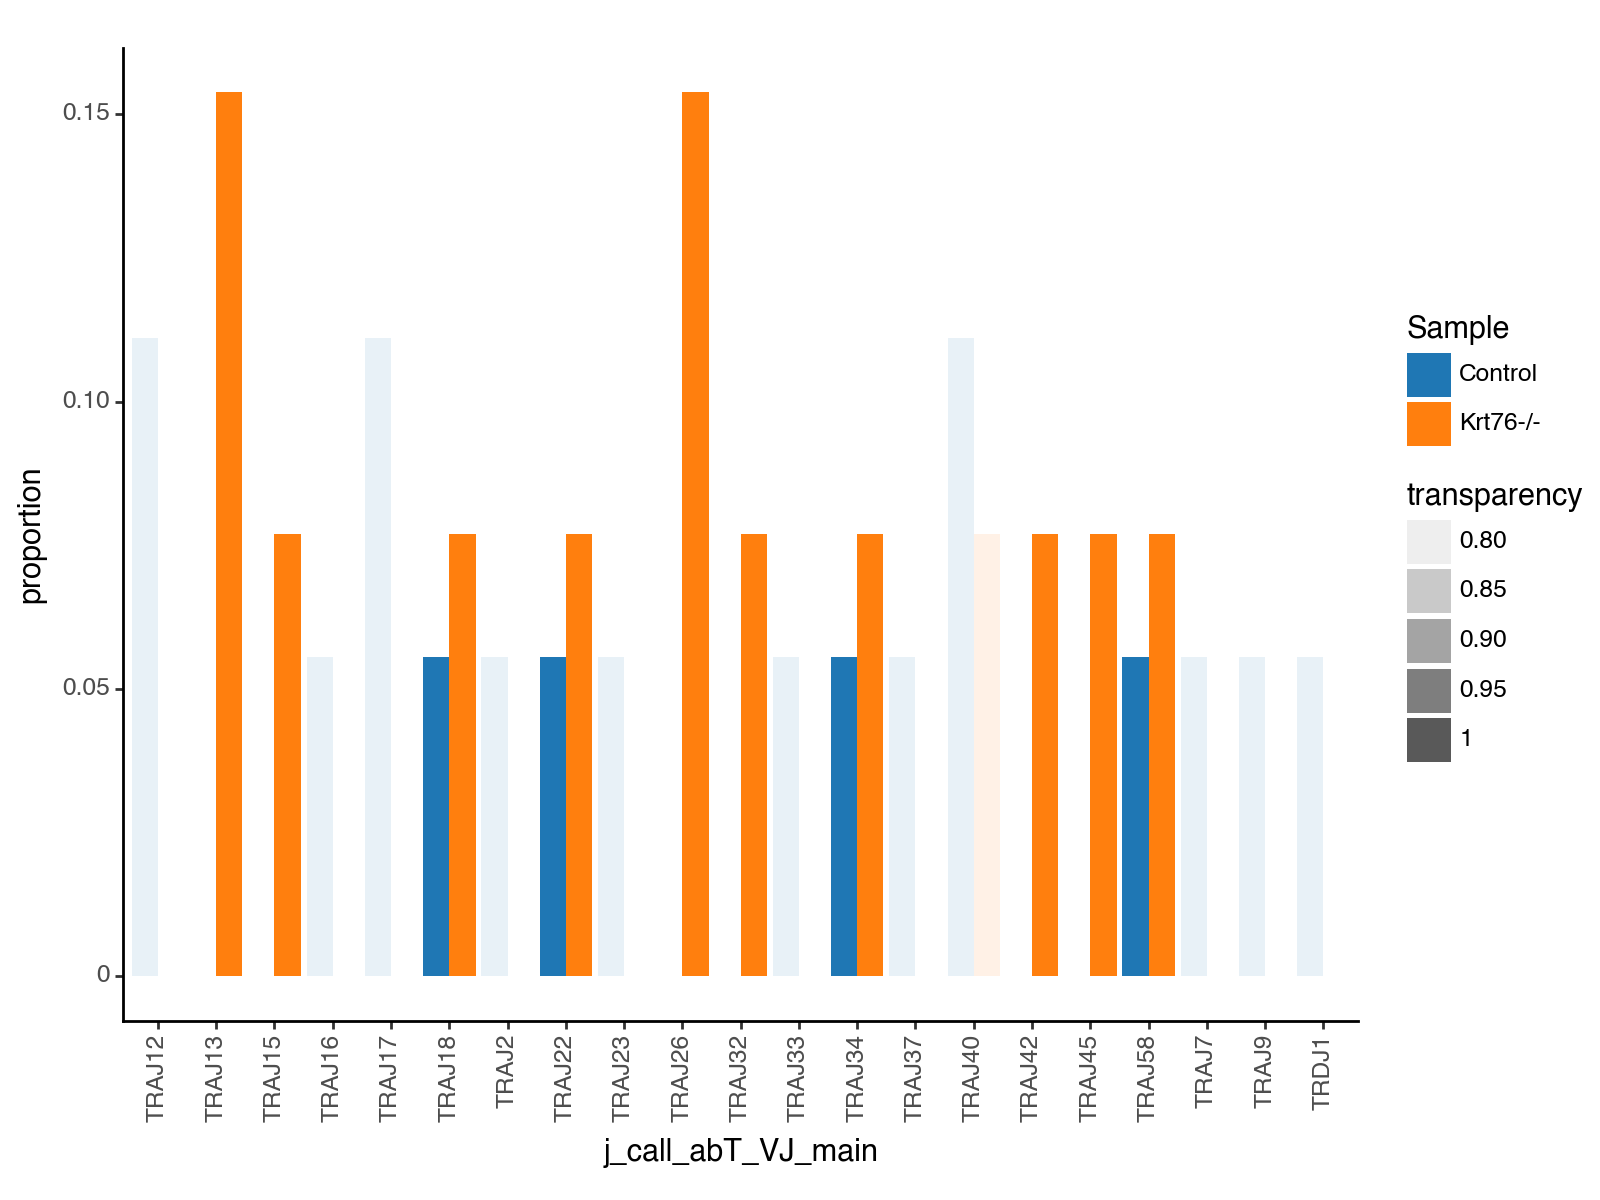

<Figure Size: (800 x 600)>

In [724]:
p

In [726]:
p.save("JgeneAlphaChain_DN3a_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3a_181223.pdf


### DN3a / DN3b - J gene alpha chain

In [744]:
adata_NPF_DN3aDN3b = adata_NPF[adata_NPF.obs["leiden"] == "1 DN3a / DN3b"]

In [745]:
adata_NPF_DN3aDN3b

View of AnnData object with n_obs × n_vars = 44 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [746]:
working_df = pd.DataFrame(adata_NPF_DN3aDN3b.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ22                  3
         TRAJ6                   3
         TRAJ16                  3
         TRAJ31                  2
         TRAJ39                  2
         TRAJ56                  1
         TRAJ12                  1
         TRAJ7                   1
         TRAJ11                  1
         TRAJ30                  1
         TRAJ26                  1
         TRAJ45                  1
         TRAJ13                  1
         TRAJ40                  1
         TRAJ24                  1
         TRAJ33                  1
         TRAJ32                  1
         TRAJ49                  1
         TRAJ27                  1
         TRAJ17                  0
         TRAJ18                  0
         TRAJ50                  0
         TRAJ35                  0
         TRAJ47                  0
Krt76-/- TRAJ30                  3
         TRAJ31                  3
         TRAJ22                  2
         TRAJ50                  1
         TRAJ49                  1
         TRAJ47                  1
         TRAJ35                  1
         TRAJ56                  1
         TRAJ26                  1
         TRAJ18                  1
         TRAJ17                  1
         TRAJ7                   1
         TRAJ6                   0
         TRAJ45                  0
         TRAJ40                  0
         TRAJ39                  0
         TRAJ33                  0
         TRAJ32                  0
         TRAJ27                  0
         TRAJ24                  0
         TRAJ16                  0
         TRAJ13                  0
         TRAJ12                  0
         TRAJ11                  0

In [747]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ22       3
1    Control              TRAJ6       3
2    Control             TRAJ16       3
3    Control             TRAJ31       2
4    Control             TRAJ39       2
5    Control             TRAJ56       1
6    Control             TRAJ12       1
7    Control              TRAJ7       1
8    Control             TRAJ11       1
9    Control             TRAJ30       1
10   Control             TRAJ26       1
11   Control             TRAJ45       1
12   Control             TRAJ13       1
13   Control             TRAJ40       1
14   Control             TRAJ24       1
15   Control             TRAJ33       1
16   Control             TRAJ32       1
17   Control             TRAJ49       1
18   Control             TRAJ27       1
19   Control             TRAJ17       0
20   Control             TRAJ18       0
21   Control             TRAJ50       0
22   Control             TRAJ35       0
23   Control             TRAJ47       0
24  Krt76-/-             TRAJ30       3
25  Krt76-/-             TRAJ31       3
26  Krt76-/-             TRAJ22       2
27  Krt76-/-             TRAJ50       1
28  Krt76-/-             TRAJ49       1
29  Krt76-/-             TRAJ47       1
30  Krt76-/-             TRAJ35       1
31  Krt76-/-             TRAJ56       1
32  Krt76-/-             TRAJ26       1
33  Krt76-/-             TRAJ18       1
34  Krt76-/-             TRAJ17       1
35  Krt76-/-              TRAJ7       1
36  Krt76-/-              TRAJ6       0
37  Krt76-/-             TRAJ45       0
38  Krt76-/-             TRAJ40       0
39  Krt76-/-             TRAJ39       0
40  Krt76-/-             TRAJ33       0
41  Krt76-/-             TRAJ32       0
42  Krt76-/-             TRAJ27       0
43  Krt76-/-             TRAJ24       0
44  Krt76-/-             TRAJ16       0
45  Krt76-/-             TRAJ13       0
46  Krt76-/-             TRAJ12       0
47  Krt76-/-             TRAJ11       0

In [748]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 27, 'Krt76-/-': 17}

In [749]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [750]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ22       3    0.111111
1    Control              TRAJ6       3    0.111111
2    Control             TRAJ16       3    0.111111
3    Control             TRAJ31       2    0.074074
4    Control             TRAJ39       2    0.074074
5    Control             TRAJ56       1    0.037037
6    Control             TRAJ12       1    0.037037
7    Control              TRAJ7       1    0.037037
8    Control             TRAJ11       1    0.037037
9    Control             TRAJ30       1    0.037037
10   Control             TRAJ26       1    0.037037
11   Control             TRAJ45       1    0.037037
12   Control             TRAJ13       1    0.037037
13   Control             TRAJ40       1    0.037037
14   Control             TRAJ24       1    0.037037
15   Control             TRAJ33       1    0.037037
16   Control             TRAJ32       1    0.037037
17   Control             TRAJ49       1    0.037037
18   Control             TRAJ27       1    0.037037
19   Control             TRAJ17       0    0.000000
20   Control             TRAJ18       0    0.000000
21   Control             TRAJ50       0    0.000000
22   Control             TRAJ35       0    0.000000
23   Control             TRAJ47       0    0.000000
24  Krt76-/-             TRAJ30       3    0.176471
25  Krt76-/-             TRAJ31       3    0.176471
26  Krt76-/-             TRAJ22       2    0.117647
27  Krt76-/-             TRAJ50       1    0.058824
28  Krt76-/-             TRAJ49       1    0.058824
29  Krt76-/-             TRAJ47       1    0.058824
30  Krt76-/-             TRAJ35       1    0.058824
31  Krt76-/-             TRAJ56       1    0.058824
32  Krt76-/-             TRAJ26       1    0.058824
33  Krt76-/-             TRAJ18       1    0.058824
34  Krt76-/-             TRAJ17       1    0.058824
35  Krt76-/-              TRAJ7       1    0.058824
36  Krt76-/-              TRAJ6       0    0.000000
37  Krt76-/-             TRAJ45       0    0.000000
38  Krt76-/-             TRAJ40       0    0.000000
39  Krt76-/-             TRAJ39       0    0.000000
40  Krt76-/-             TRAJ33       0    0.000000
41  Krt76-/-             TRAJ32       0    0.000000
42  Krt76-/-             TRAJ27       0    0.000000
43  Krt76-/-             TRAJ24       0    0.000000
44  Krt76-/-             TRAJ16       0    0.000000
45  Krt76-/-             TRAJ13       0    0.000000
46  Krt76-/-             TRAJ12       0    0.000000
47  Krt76-/-             TRAJ11       0    0.000000

In [751]:
working_control = working_df[working_df["Sample"] == "Control"]

In [752]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [753]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [754]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [755]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ11': 0.0,
 'TRAJ12': 0.0,
 'TRAJ13': 0.0,
 'TRAJ16': 0.0,
 'TRAJ17': inf,
 'TRAJ18': inf,
 'TRAJ22': 1.0588235294117647,
 'TRAJ24': 0.0,
 'TRAJ26': 1.5882352941176472,
 'TRAJ27': 0.0,
 'TRAJ30': 4.764705882352942,
 'TRAJ31': 2.382352941176471,
 'TRAJ32': 0.0,
 'TRAJ33': 0.0,
 'TRAJ35': inf,
 'TRAJ39': 0.0,
 'TRAJ40': 0.0,
 'TRAJ45': 0.0,
 'TRAJ47': inf,
 'TRAJ49': 1.5882352941176472,
 'TRAJ50': inf,
 'TRAJ56': 1.5882352941176472,
 'TRAJ6': 0.0,
 'TRAJ7': 1.5882352941176472}

In [756]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ22       3    0.111111    1.058824
1    Control              TRAJ6       3    0.111111    0.000000
2    Control             TRAJ16       3    0.111111    0.000000
3    Control             TRAJ31       2    0.074074    2.382353
4    Control             TRAJ39       2    0.074074    0.000000
5    Control             TRAJ56       1    0.037037    1.588235
6    Control             TRAJ12       1    0.037037    0.000000
7    Control              TRAJ7       1    0.037037    1.588235
8    Control             TRAJ11       1    0.037037    0.000000
9    Control             TRAJ30       1    0.037037    4.764706
10   Control             TRAJ26       1    0.037037    1.588235
11   Control             TRAJ45       1    0.037037    0.000000
12   Control             TRAJ13       1    0.037037    0.000000
13   Control             TRAJ40       1    0.037037    0.000000
14   Control             TRAJ24       1    0.037037    0.000000
15   Control             TRAJ33       1    0.037037    0.000000
16   Control             TRAJ32       1    0.037037    0.000000
17   Control             TRAJ49       1    0.037037    1.588235
18   Control             TRAJ27       1    0.037037    0.000000
19   Control             TRAJ17       0    0.000000         inf
20   Control             TRAJ18       0    0.000000         inf
21   Control             TRAJ50       0    0.000000         inf
22   Control             TRAJ35       0    0.000000         inf
23   Control             TRAJ47       0    0.000000         inf
24  Krt76-/-             TRAJ30       3    0.176471    4.764706
25  Krt76-/-             TRAJ31       3    0.176471    2.382353
26  Krt76-/-             TRAJ22       2    0.117647    1.058824
27  Krt76-/-             TRAJ50       1    0.058824         inf
28  Krt76-/-             TRAJ49       1    0.058824    1.588235
29  Krt76-/-             TRAJ47       1    0.058824         inf
30  Krt76-/-             TRAJ35       1    0.058824         inf
31  Krt76-/-             TRAJ56       1    0.058824    1.588235
32  Krt76-/-             TRAJ26       1    0.058824    1.588235
33  Krt76-/-             TRAJ18       1    0.058824         inf
34  Krt76-/-             TRAJ17       1    0.058824         inf
35  Krt76-/-              TRAJ7       1    0.058824    1.588235
36  Krt76-/-              TRAJ6       0    0.000000    0.000000
37  Krt76-/-             TRAJ45       0    0.000000    0.000000
38  Krt76-/-             TRAJ40       0    0.000000    0.000000
39  Krt76-/-             TRAJ39       0    0.000000    0.000000
40  Krt76-/-             TRAJ33       0    0.000000    0.000000
41  Krt76-/-             TRAJ32       0    0.000000    0.000000
42  Krt76-/-             TRAJ27       0    0.000000    0.000000
43  Krt76-/-             TRAJ24       0    0.000000    0.000000
44  Krt76-/-             TRAJ16       0    0.000000    0.000000
45  Krt76-/-             TRAJ13       0    0.000000    0.000000
46  Krt76-/-             TRAJ12       0    0.000000    0.000000
47  Krt76-/-             TRAJ11       0    0.000000    0.000000

In [757]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [758]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

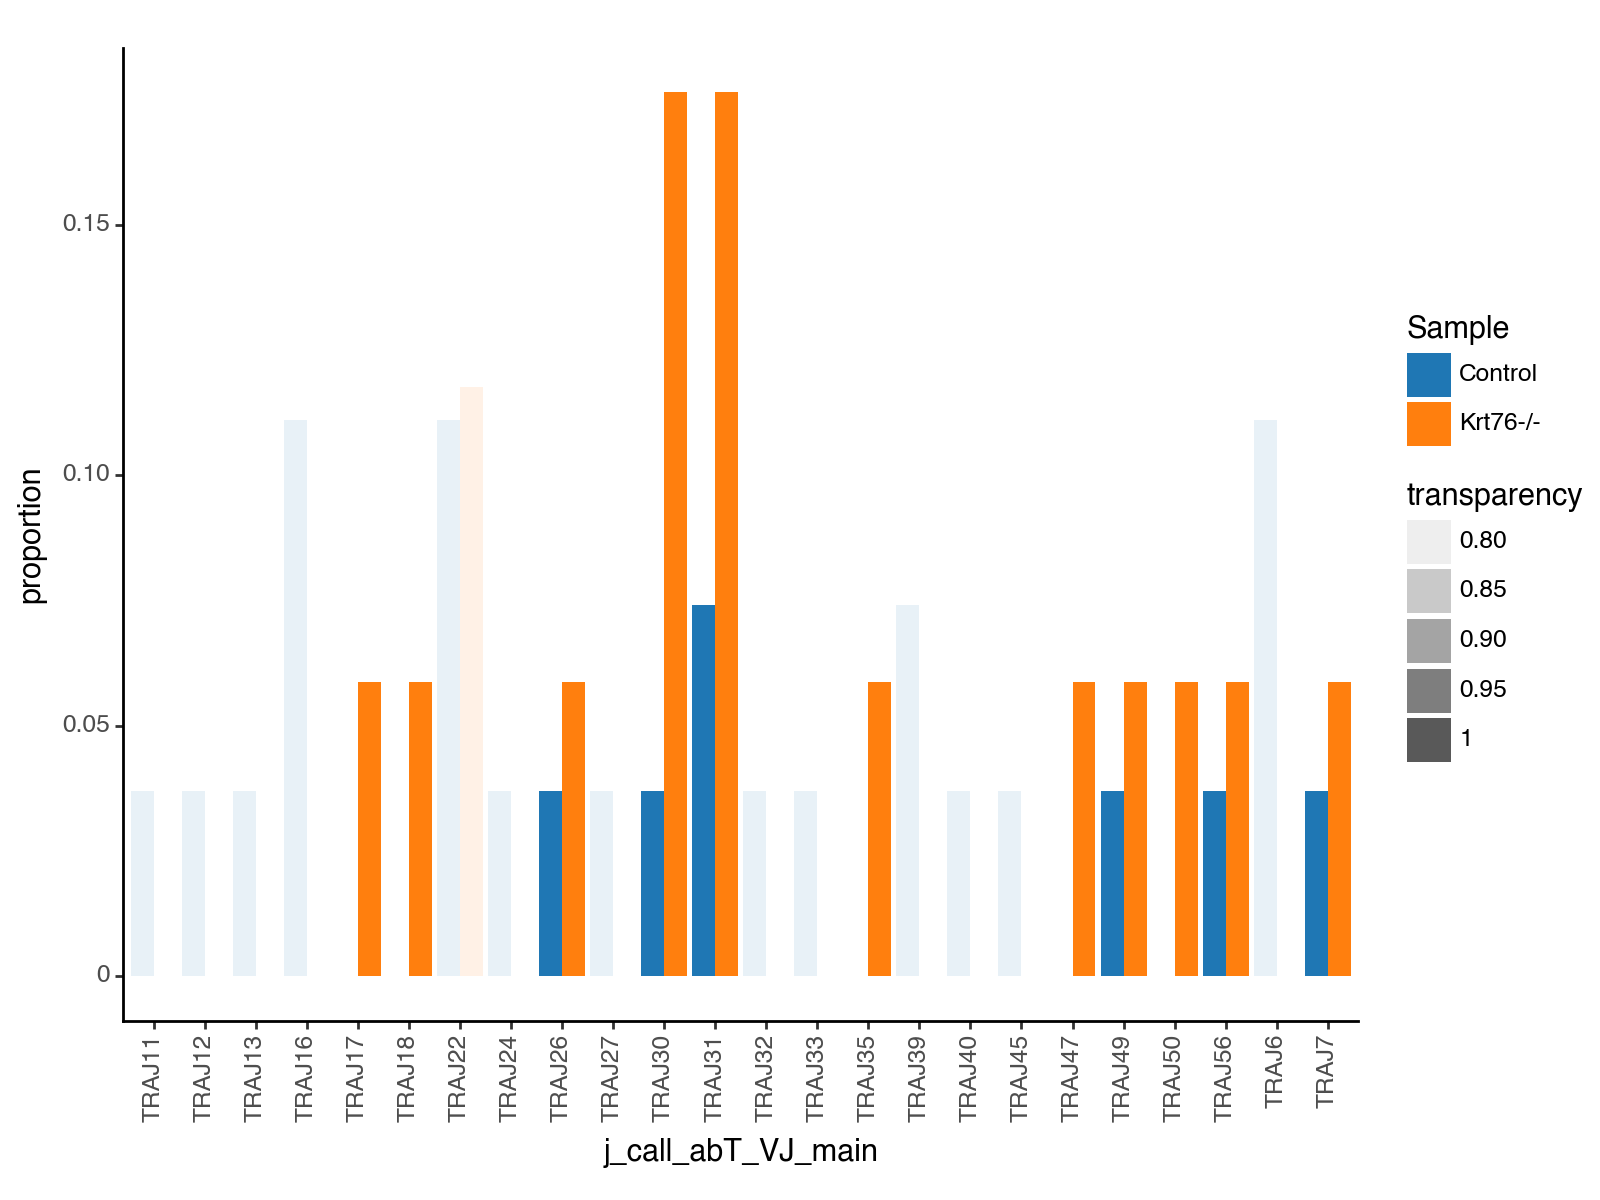

<Figure Size: (800 x 600)>

In [759]:
p

In [760]:
p.save("JgeneAlphaChain_DN3aDN3b_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3aDN3b_181223.pdf


### DN3b - J gene alpha chain

In [761]:
adata_NPF_DN3b = adata_NPF[adata_NPF.obs["leiden"] == "6 DN3b"]

In [762]:
adata_NPF_DN3b

View of AnnData object with n_obs × n_vars = 25 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [763]:
working_df = pd.DataFrame(adata_NPF_DN3b.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main         
Control  TRAJ40                    2
         TRAJ15                    1
         TRAJ13                    1
         TRAJ7                     1
         TRAJ46,TRAJ41,TRAJ26      1
         TRAJ43                    1
         TRAJ4                     1
         TRAJ37                    1
         TRAJ32                    1
         TRAJ31                    1
         TRAJ30                    1
         TRAJ26                    1
         TRAJ22                    1
         TRAJ12                    0
         TRAJ58                    0
         TRAJ45                    0
         TRAJ33                    0
         TRAJ27                    0
         TRAJ18                    0
         TRAJ17                    0
Krt76-/- TRAJ12                    2
         TRAJ58                    1
         TRAJ32                    1
         TRAJ22                    1
         TRAJ18                    1
         TRAJ17                    1
         TRAJ33                    1
         TRAJ37                    1
         TRAJ45                    1
         TRAJ27                    1
         TRAJ31                    0
         TRAJ40                    0
         TRAJ4                     0
         TRAJ43                    0
         TRAJ46,TRAJ41,TRAJ26      0
         TRAJ30                    0
         TRAJ26                    0
         TRAJ15                    0
         TRAJ13                    0
         TRAJ7                     0

In [764]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample    j_call_abT_VJ_main  counts
0    Control                TRAJ40       2
1    Control                TRAJ15       1
2    Control                TRAJ13       1
3    Control                 TRAJ7       1
4    Control  TRAJ46,TRAJ41,TRAJ26       1
5    Control                TRAJ43       1
6    Control                 TRAJ4       1
7    Control                TRAJ37       1
8    Control                TRAJ32       1
9    Control                TRAJ31       1
10   Control                TRAJ30       1
11   Control                TRAJ26       1
12   Control                TRAJ22       1
13   Control                TRAJ12       0
14   Control                TRAJ58       0
15   Control                TRAJ45       0
16   Control                TRAJ33       0
17   Control                TRAJ27       0
18   Control                TRAJ18       0
19   Control                TRAJ17       0
20  Krt76-/-                TRAJ12       2
21  Krt76-/-                TRAJ58       1
22  Krt76-/-                TRAJ32       1
23  Krt76-/-                TRAJ22       1
24  Krt76-/-                TRAJ18       1
25  Krt76-/-                TRAJ17       1
26  Krt76-/-                TRAJ33       1
27  Krt76-/-                TRAJ37       1
28  Krt76-/-                TRAJ45       1
29  Krt76-/-                TRAJ27       1
30  Krt76-/-                TRAJ31       0
31  Krt76-/-                TRAJ40       0
32  Krt76-/-                 TRAJ4       0
33  Krt76-/-                TRAJ43       0
34  Krt76-/-  TRAJ46,TRAJ41,TRAJ26       0
35  Krt76-/-                TRAJ30       0
36  Krt76-/-                TRAJ26       0
37  Krt76-/-                TRAJ15       0
38  Krt76-/-                TRAJ13       0
39  Krt76-/-                 TRAJ7       0

In [765]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 14, 'Krt76-/-': 11}

In [766]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [767]:
working_df

Sample    j_call_abT_VJ_main  counts  proportion
0    Control                TRAJ40       2    0.142857
1    Control                TRAJ15       1    0.071429
2    Control                TRAJ13       1    0.071429
3    Control                 TRAJ7       1    0.071429
4    Control  TRAJ46,TRAJ41,TRAJ26       1    0.071429
5    Control                TRAJ43       1    0.071429
6    Control                 TRAJ4       1    0.071429
7    Control                TRAJ37       1    0.071429
8    Control                TRAJ32       1    0.071429
9    Control                TRAJ31       1    0.071429
10   Control                TRAJ30       1    0.071429
11   Control                TRAJ26       1    0.071429
12   Control                TRAJ22       1    0.071429
13   Control                TRAJ12       0    0.000000
14   Control                TRAJ58       0    0.000000
15   Control                TRAJ45       0    0.000000
16   Control                TRAJ33       0    0.000000
17   Control                TRAJ27       0    0.000000
18   Control                TRAJ18       0    0.000000
19   Control                TRAJ17       0    0.000000
20  Krt76-/-                TRAJ12       2    0.181818
21  Krt76-/-                TRAJ58       1    0.090909
22  Krt76-/-                TRAJ32       1    0.090909
23  Krt76-/-                TRAJ22       1    0.090909
24  Krt76-/-                TRAJ18       1    0.090909
25  Krt76-/-                TRAJ17       1    0.090909
26  Krt76-/-                TRAJ33       1    0.090909
27  Krt76-/-                TRAJ37       1    0.090909
28  Krt76-/-                TRAJ45       1    0.090909
29  Krt76-/-                TRAJ27       1    0.090909
30  Krt76-/-                TRAJ31       0    0.000000
31  Krt76-/-                TRAJ40       0    0.000000
32  Krt76-/-                 TRAJ4       0    0.000000
33  Krt76-/-                TRAJ43       0    0.000000
34  Krt76-/-  TRAJ46,TRAJ41,TRAJ26       0    0.000000
35  Krt76-/-                TRAJ30       0    0.000000
36  Krt76-/-                TRAJ26       0    0.000000
37  Krt76-/-                TRAJ15       0    0.000000
38  Krt76-/-                TRAJ13       0    0.000000
39  Krt76-/-                 TRAJ7       0    0.000000

In [768]:
working_control = working_df[working_df["Sample"] == "Control"]

In [769]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [770]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [771]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [772]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ12': inf,
 'TRAJ13': 0.0,
 'TRAJ15': 0.0,
 'TRAJ17': inf,
 'TRAJ18': inf,
 'TRAJ22': 1.272727272727273,
 'TRAJ26': 0.0,
 'TRAJ27': inf,
 'TRAJ30': 0.0,
 'TRAJ31': 0.0,
 'TRAJ32': 1.272727272727273,
 'TRAJ33': inf,
 'TRAJ37': 1.272727272727273,
 'TRAJ4': 0.0,
 'TRAJ40': 0.0,
 'TRAJ43': 0.0,
 'TRAJ45': inf,
 'TRAJ46,TRAJ41,TRAJ26': 0.0,
 'TRAJ58': inf,
 'TRAJ7': 0.0}

In [773]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample    j_call_abT_VJ_main  counts  proportion  foldchange
0    Control                TRAJ40       2    0.142857    0.000000
1    Control                TRAJ15       1    0.071429    0.000000
2    Control                TRAJ13       1    0.071429    0.000000
3    Control                 TRAJ7       1    0.071429    0.000000
4    Control  TRAJ46,TRAJ41,TRAJ26       1    0.071429    0.000000
5    Control                TRAJ43       1    0.071429    0.000000
6    Control                 TRAJ4       1    0.071429    0.000000
7    Control                TRAJ37       1    0.071429    1.272727
8    Control                TRAJ32       1    0.071429    1.272727
9    Control                TRAJ31       1    0.071429    0.000000
10   Control                TRAJ30       1    0.071429    0.000000
11   Control                TRAJ26       1    0.071429    0.000000
12   Control                TRAJ22       1    0.071429    1.272727
13   Control                TRAJ12       0    0.000000         inf
14   Control                TRAJ58       0    0.000000         inf
15   Control                TRAJ45       0    0.000000         inf
16   Control                TRAJ33       0    0.000000         inf
17   Control                TRAJ27       0    0.000000         inf
18   Control                TRAJ18       0    0.000000         inf
19   Control                TRAJ17       0    0.000000         inf
20  Krt76-/-                TRAJ12       2    0.181818         inf
21  Krt76-/-                TRAJ58       1    0.090909         inf
22  Krt76-/-                TRAJ32       1    0.090909    1.272727
23  Krt76-/-                TRAJ22       1    0.090909    1.272727
24  Krt76-/-                TRAJ18       1    0.090909         inf
25  Krt76-/-                TRAJ17       1    0.090909         inf
26  Krt76-/-                TRAJ33       1    0.090909         inf
27  Krt76-/-                TRAJ37       1    0.090909    1.272727
28  Krt76-/-                TRAJ45       1    0.090909         inf
29  Krt76-/-                TRAJ27       1    0.090909         inf
30  Krt76-/-                TRAJ31       0    0.000000    0.000000
31  Krt76-/-                TRAJ40       0    0.000000    0.000000
32  Krt76-/-                 TRAJ4       0    0.000000    0.000000
33  Krt76-/-                TRAJ43       0    0.000000    0.000000
34  Krt76-/-  TRAJ46,TRAJ41,TRAJ26       0    0.000000    0.000000
35  Krt76-/-                TRAJ30       0    0.000000    0.000000
36  Krt76-/-                TRAJ26       0    0.000000    0.000000
37  Krt76-/-                TRAJ15       0    0.000000    0.000000
38  Krt76-/-                TRAJ13       0    0.000000    0.000000
39  Krt76-/-                 TRAJ7       0    0.000000    0.000000

In [774]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [775]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

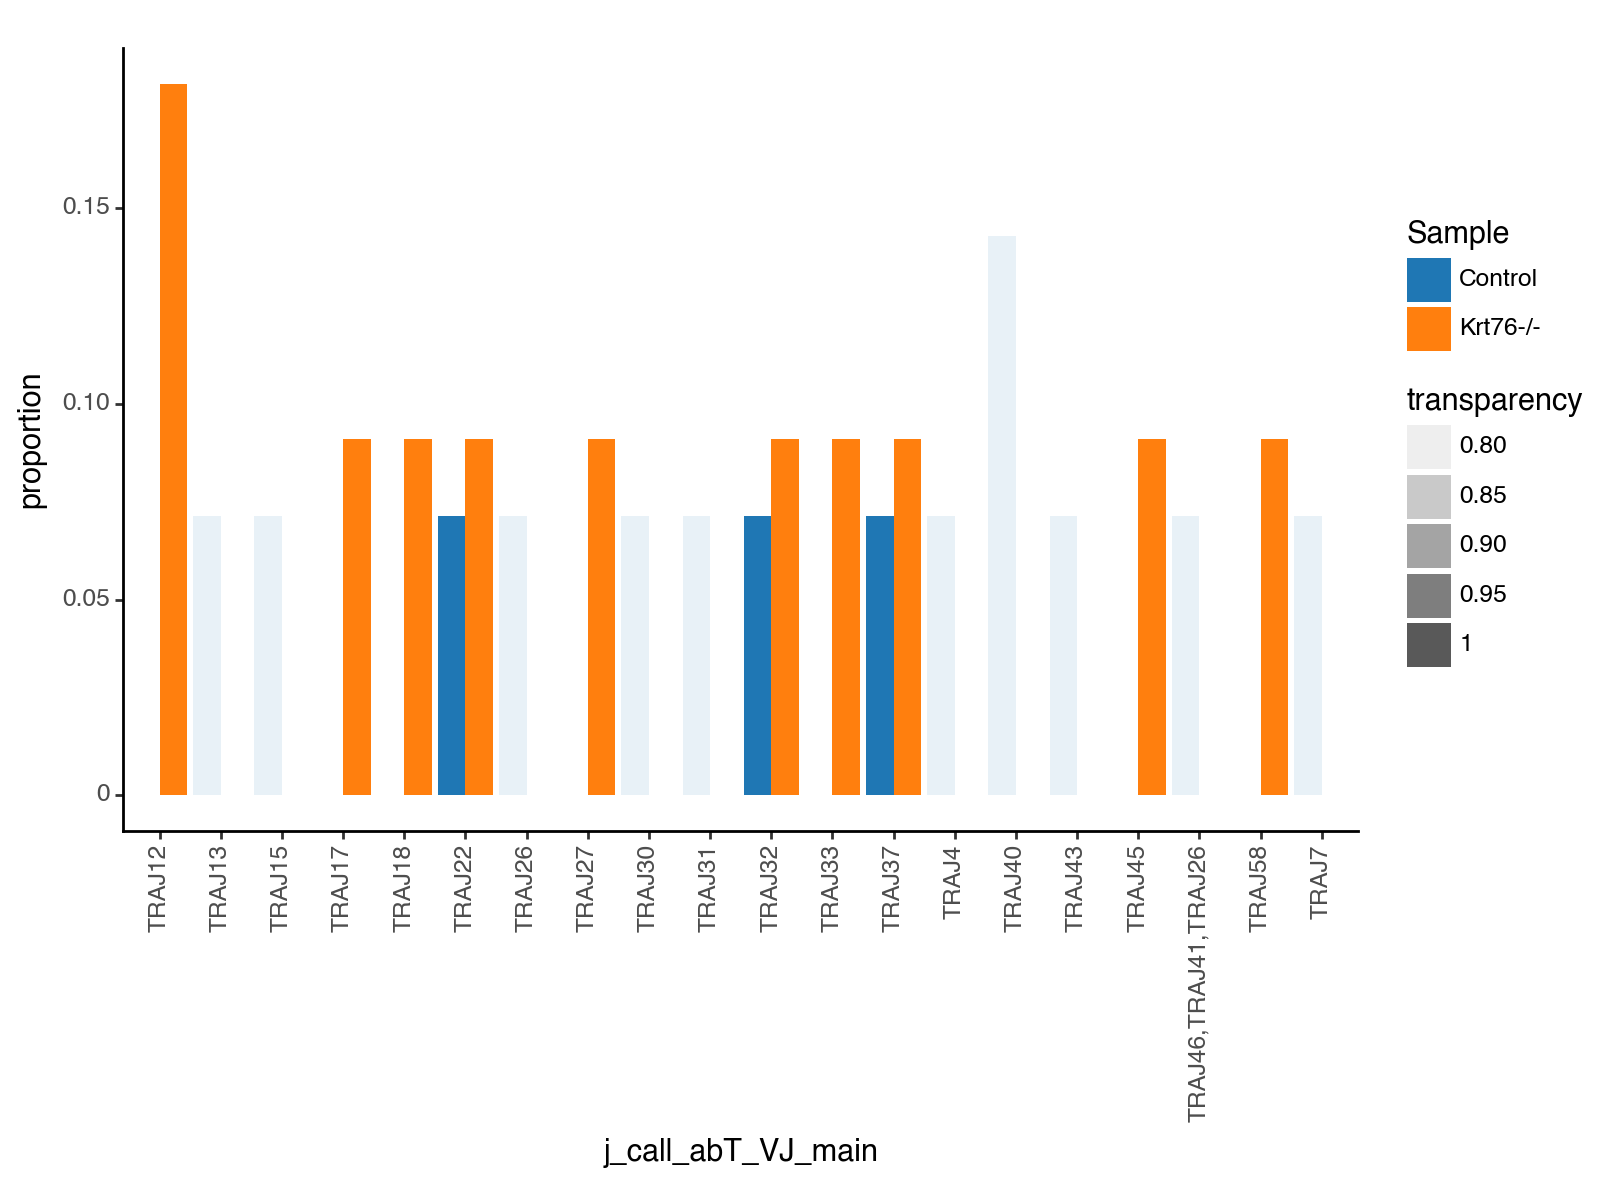

<Figure Size: (800 x 600)>

In [776]:
p

In [777]:
p.save("JgeneAlphaChain_DN3b_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN3b_181223.pdf


### DN4 - J gene alpha chain

In [812]:
adata_NPF_DN4 = adata_NPF[adata_NPF.obs["leiden"] == "2 DN4"]

In [813]:
adata_NPF_DN4

View of AnnData object with n_obs × n_vars = 373 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [814]:
working_df = pd.DataFrame(adata_NPF_DN4.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ49                 11
         TRAJ56                 10
         TRAJ15                 10
         TRAJ37                 10
         TRAJ31                  8
...                            ...
Krt76-/- TRDJ1                   1
         TRAJ5                   0
         TRAJ61                  0
         TRAJ7                   0
         TRAJ41                  0

[94 rows x 1 columns]

In [815]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ49      11
1    Control             TRAJ56      10
2    Control             TRAJ15      10
3    Control             TRAJ37      10
4    Control             TRAJ31       8
..       ...                ...     ...
89  Krt76-/-              TRDJ1       1
90  Krt76-/-              TRAJ5       0
91  Krt76-/-             TRAJ61       0
92  Krt76-/-              TRAJ7       0
93  Krt76-/-             TRAJ41       0

[94 rows x 3 columns]

In [816]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 185, 'Krt76-/-': 188}

In [817]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [818]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ49      11    0.059459
1    Control             TRAJ56      10    0.054054
2    Control             TRAJ15      10    0.054054
3    Control             TRAJ37      10    0.054054
4    Control             TRAJ31       8    0.043243
..       ...                ...     ...         ...
89  Krt76-/-              TRDJ1       1    0.005319
90  Krt76-/-              TRAJ5       0    0.000000
91  Krt76-/-             TRAJ61       0    0.000000
92  Krt76-/-              TRAJ7       0    0.000000
93  Krt76-/-             TRAJ41       0    0.000000

[94 rows x 4 columns]

In [819]:
working_control = working_df[working_df["Sample"] == "Control"]

In [820]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [821]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [822]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [823]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ11': 0.6560283687943262,
 'TRAJ12': 0.7028875379939209,
 'TRAJ13': 0.3280141843971631,
 'TRAJ15': 1.0824468085106382,
 'TRAJ16': 2.952127659574468,
 'TRAJ17': 1.3120567375886525,
 'TRAJ18': 0.3280141843971631,
 'TRAJ2': 1.476063829787234,
 'TRAJ21': 2.460106382978723,
 'TRAJ22': 1.804078014184397,
 'TRAJ23': 1.9680851063829785,
 'TRAJ24': 0.9840425531914893,
 'TRAJ26': 0.16400709219858156,
 'TRAJ27': 0.738031914893617,
 'TRAJ28': 0.9840425531914893,
 'TRAJ30': inf,
 'TRAJ31': 0.738031914893617,
 'TRAJ32': 2.2960992907801416,
 'TRAJ33': 0.9840425531914893,
 'TRAJ34': 1.9680851063829785,
 'TRAJ35': 3.936170212765957,
 'TRAJ37': 0.9840425531914894,
 'TRAJ38': inf,
 'TRAJ39': 1.3120567375886525,
 'TRAJ4': 0.3936170212765957,
 'TRAJ40': 0.6560283687943262,
 'TRAJ41': 0.0,
 'TRAJ42': 1.1246200607902734,
 'TRAJ43': 0.9840425531914893,
 'TRAJ44': 0.6560283687943262,
 'TRAJ45': 0.8200354609929078,
 'TRAJ46,TRAJ41,TRAJ26': 0.4920212765957446,
 'TRAJ47': 4.920212765957446,
 'TRAJ48': 0.9840

In [824]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ49      11    0.059459    0.626209
1    Control             TRAJ56      10    0.054054    0.393617
2    Control             TRAJ15      10    0.054054    1.082447
3    Control             TRAJ37      10    0.054054    0.984043
4    Control             TRAJ31       8    0.043243    0.738032
..       ...                ...     ...         ...         ...
89  Krt76-/-              TRDJ1       1    0.005319         inf
90  Krt76-/-              TRAJ5       0    0.000000    0.000000
91  Krt76-/-             TRAJ61       0    0.000000    0.000000
92  Krt76-/-              TRAJ7       0    0.000000    0.000000
93  Krt76-/-             TRAJ41       0    0.000000    0.000000

[94 rows x 5 columns]

In [825]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [826]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

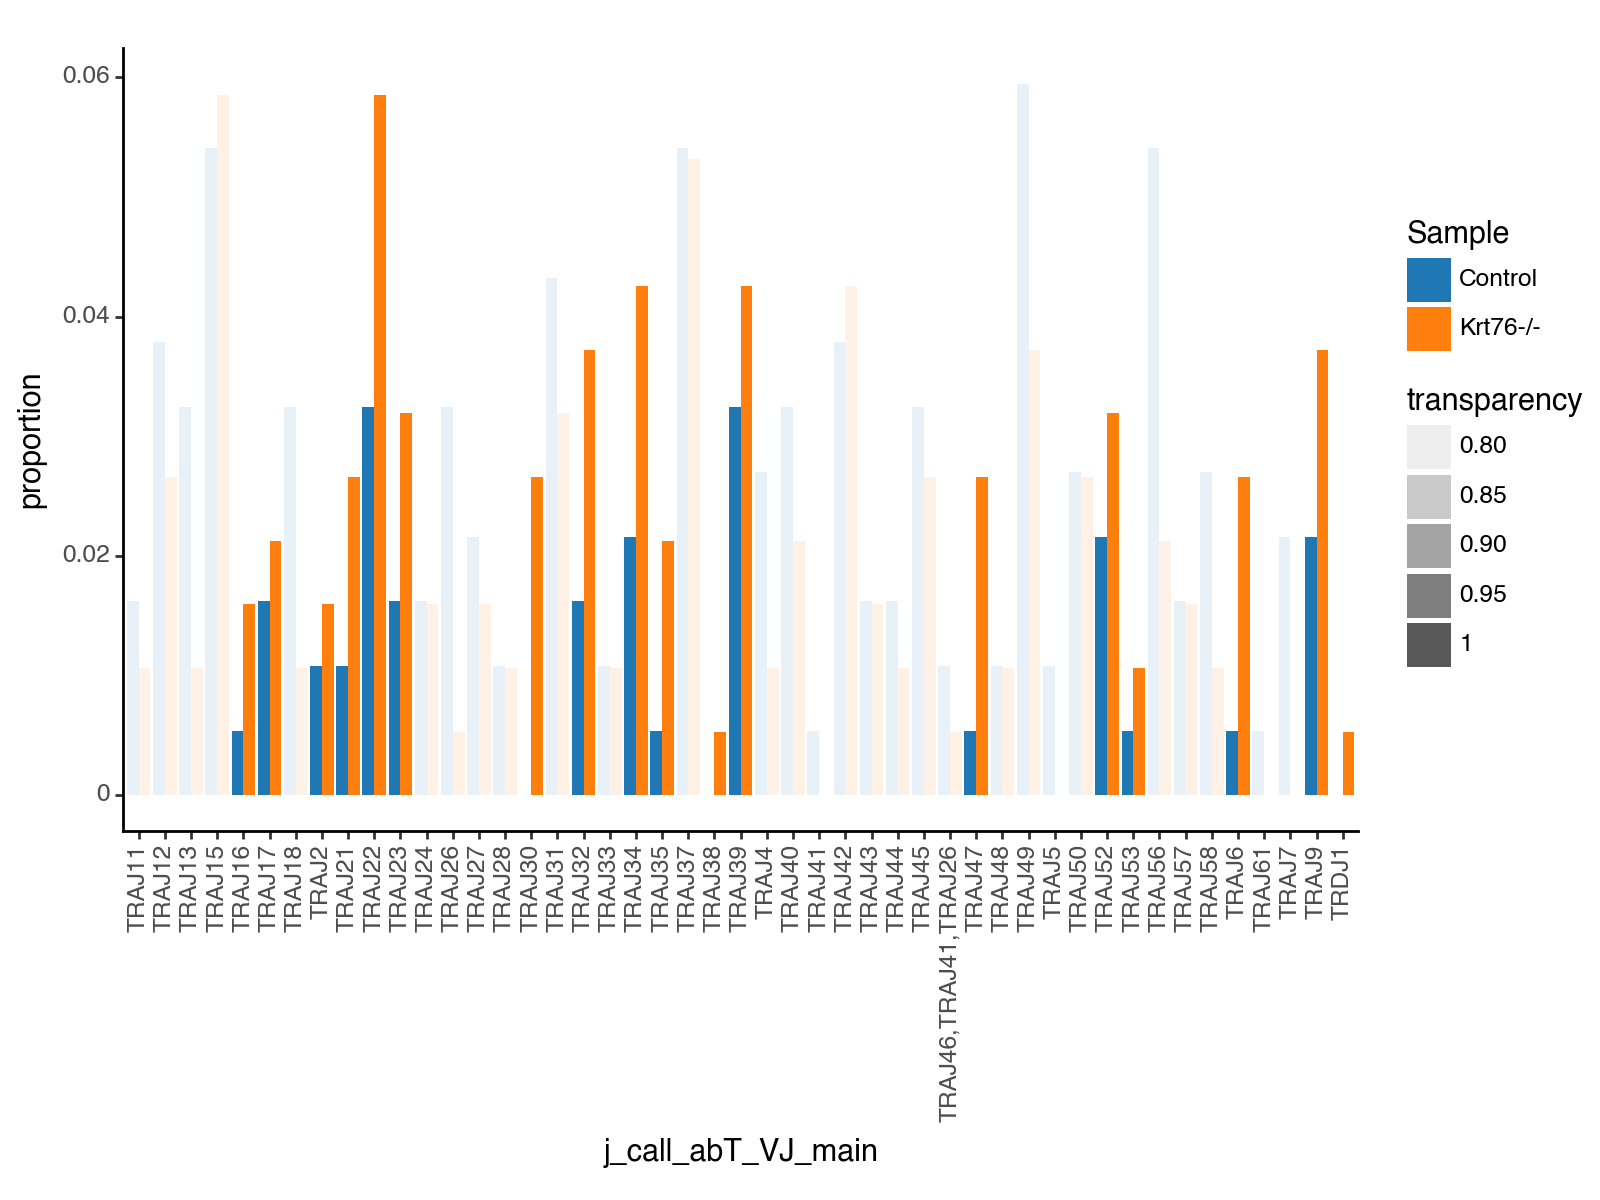

<Figure Size: (800 x 600)>

In [827]:
p

In [828]:
p.save("JgeneAlphaChain_DN4_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DN4_181223.pdf


### DP 1 - J gene alpha chain

In [829]:
adata_NPF_DP1 = adata_NPF[adata_NPF.obs["leiden"] == "3 DP 1"]

In [830]:
adata_NPF_DP1

View of AnnData object with n_obs × n_vars = 811 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [831]:
working_df = pd.DataFrame(adata_NPF_DP1.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ58                 22
         TRAJ31                 19
         TRAJ57                 17
         TRAJ56                 17
         TRAJ32                 17
...                            ...
Krt76-/- TRAJ19                  1
         TRDJ1                   1
         TRAJ47                  0
         TRAJ24                  0
         TRBJ2-4                 0

[96 rows x 1 columns]

In [832]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ58      22
1    Control             TRAJ31      19
2    Control             TRAJ57      17
3    Control             TRAJ56      17
4    Control             TRAJ32      17
..       ...                ...     ...
91  Krt76-/-             TRAJ19       1
92  Krt76-/-              TRDJ1       1
93  Krt76-/-             TRAJ47       0
94  Krt76-/-             TRAJ24       0
95  Krt76-/-            TRBJ2-4       0

[96 rows x 3 columns]

In [833]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 404, 'Krt76-/-': 407}

In [834]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [835]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ58      22    0.054455
1    Control             TRAJ31      19    0.047030
2    Control             TRAJ57      17    0.042079
3    Control             TRAJ56      17    0.042079
4    Control             TRAJ32      17    0.042079
..       ...                ...     ...         ...
91  Krt76-/-             TRAJ19       1    0.002457
92  Krt76-/-              TRDJ1       1    0.002457
93  Krt76-/-             TRAJ47       0    0.000000
94  Krt76-/-             TRAJ24       0    0.000000
95  Krt76-/-            TRBJ2-4       0    0.000000

[96 rows x 4 columns]

In [836]:
working_control = working_df[working_df["Sample"] == "Control"]

In [837]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [838]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [839]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [840]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ11': 2.4815724815724813,
 'TRAJ12': 1.0918918918918918,
 'TRAJ13': 1.3896805896805897,
 'TRAJ15': 1.8434538434538432,
 'TRAJ16': 2.3161343161343164,
 'TRAJ17': 0.4254124254124254,
 'TRAJ18': 1.191154791154791,
 'TRAJ19': inf,
 'TRAJ2': 0.7444717444717445,
 'TRAJ21': 1.1167076167076166,
 'TRAJ22': 1.4438239892785347,
 'TRAJ23': 2.4815724815724813,
 'TRAJ24': 0.0,
 'TRAJ26': 1.1167076167076166,
 'TRAJ27': 0.6203931203931203,
 'TRAJ28': inf,
 'TRAJ30': 3.474201474201474,
 'TRAJ31': 1.0448726238199921,
 'TRAJ32': 0.6422893481717011,
 'TRAJ33': 0.9926289926289925,
 'TRAJ34': 1.8611793611793612,
 'TRAJ35': 0.9926289926289926,
 'TRAJ37': 1.3896805896805897,
 'TRAJ38': 0.9926289926289927,
 'TRAJ39': 0.2647010647010647,
 'TRAJ4': 0.49631449631449626,
 'TRAJ40': 0.83991683991684,
 'TRAJ41': 0.4963144963144963,
 'TRAJ42': 1.4507654507654506,
 'TRAJ43': 0.6108486108486109,
 'TRAJ44': 0.6617526617526618,
 'TRAJ45': 1.488943488943489,
 'TRAJ46,TRAJ41,TRAJ26': 2.4815724815724813,
 'TRAJ47': 0.0

In [841]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ58      22    0.054455    0.767031
1    Control             TRAJ31      19    0.047030    1.044873
2    Control             TRAJ57      17    0.042079    0.934239
3    Control             TRAJ56      17    0.042079    0.992629
4    Control             TRAJ32      17    0.042079    0.642289
..       ...                ...     ...         ...         ...
91  Krt76-/-             TRAJ19       1    0.002457         inf
92  Krt76-/-              TRDJ1       1    0.002457    0.330876
93  Krt76-/-             TRAJ47       0    0.000000    0.000000
94  Krt76-/-             TRAJ24       0    0.000000    0.000000
95  Krt76-/-            TRBJ2-4       0    0.000000    0.000000

[96 rows x 5 columns]

In [842]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [843]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

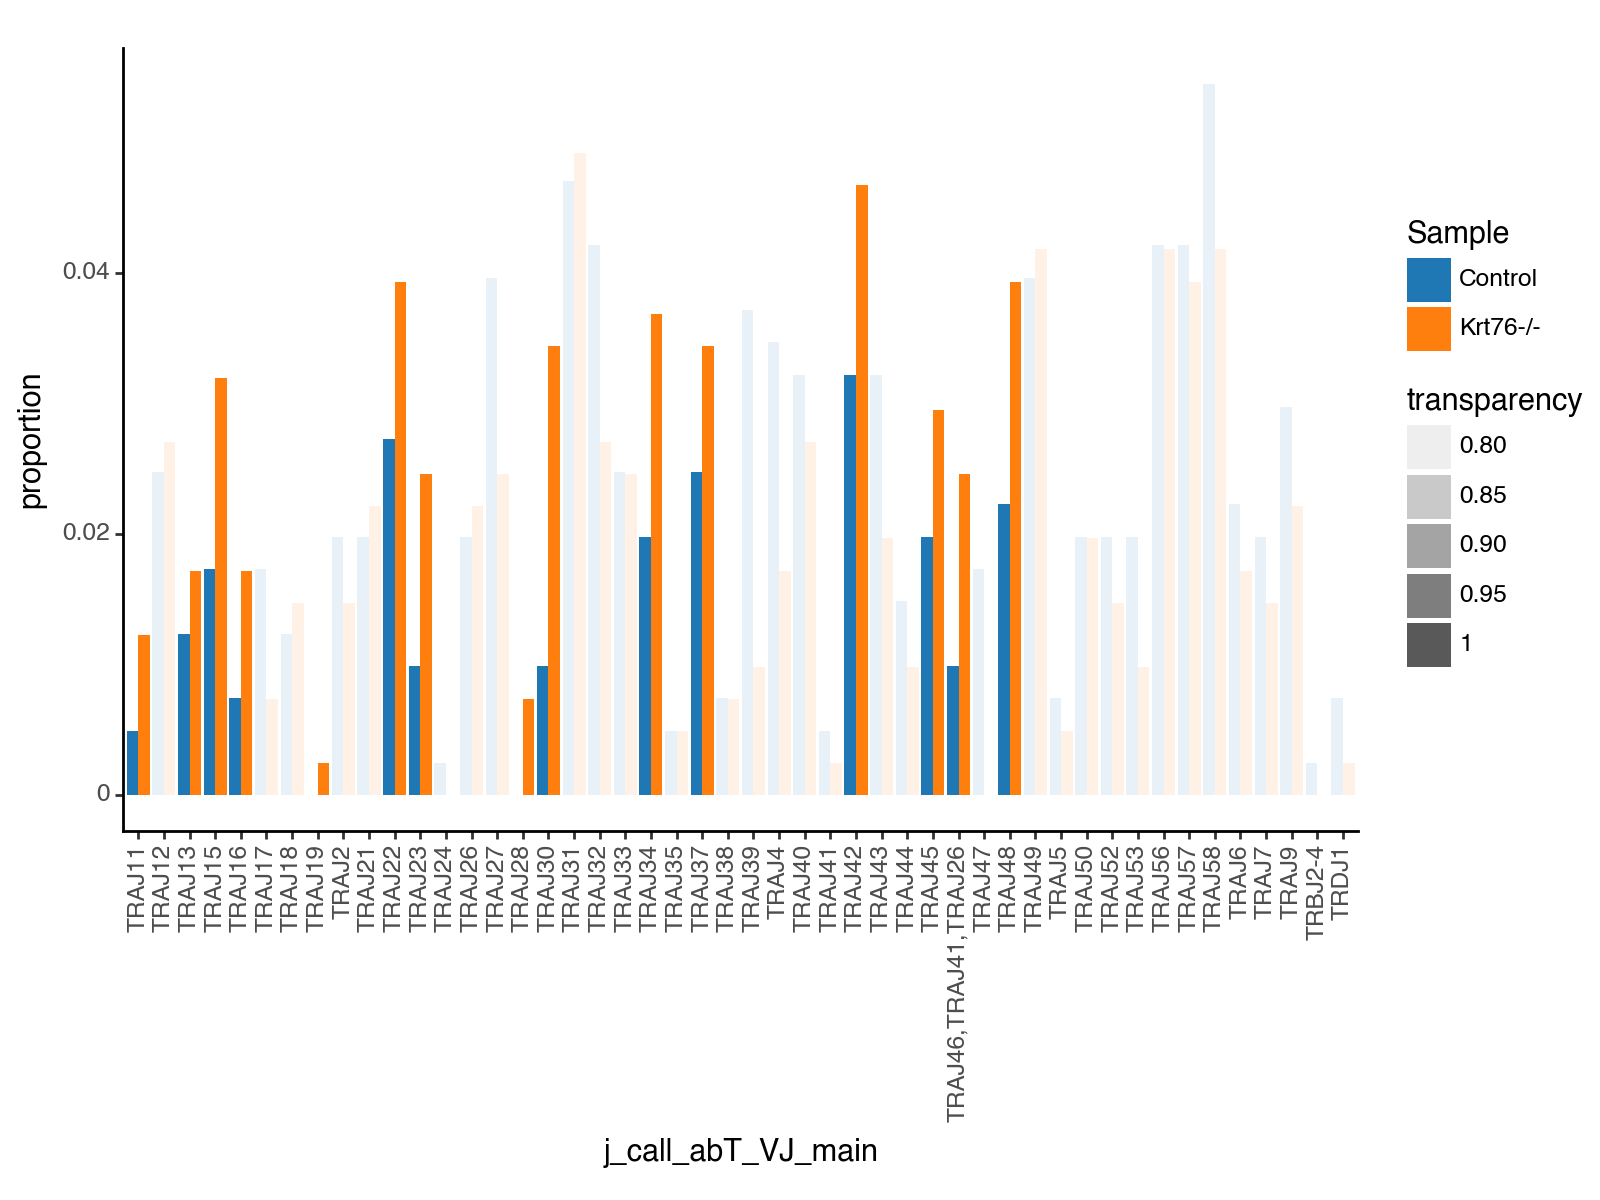

<Figure Size: (800 x 600)>

In [844]:
p

In [845]:
p.save("JgeneAlphaChain_DP1_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DP1_181223.pdf


### DP 2 - J gene alpha chain

In [846]:
adata_NPF_DP2 = adata_NPF[adata_NPF.obs["leiden"] == "9 DP 2"]

In [847]:
adata_NPF_DP2

View of AnnData object with n_obs × n_vars = 12 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [848]:
working_df = pd.DataFrame(adata_NPF_DP2.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ37                  2
         TRAJ15                  1
         TRAJ52                  1
         TRAJ53                  1
         TRAJ42                  1
         TRAJ26                  1
         TRAJ23                  1
         TRAJ47                  0
         TRAJ7,TRAJ31            0
         TRAJ21                  0
         TRAJ27                  0
Krt76-/- TRAJ47                  1
         TRAJ27                  1
         TRAJ21                  1
         TRAJ7,TRAJ31            1
         TRAJ23                  0
         TRAJ26                  0
         TRAJ37                  0
         TRAJ42                  0
         TRAJ52                  0
         TRAJ53                  0
         TRAJ15                  0

In [849]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ37       2
1    Control             TRAJ15       1
2    Control             TRAJ52       1
3    Control             TRAJ53       1
4    Control             TRAJ42       1
5    Control             TRAJ26       1
6    Control             TRAJ23       1
7    Control             TRAJ47       0
8    Control       TRAJ7,TRAJ31       0
9    Control             TRAJ21       0
10   Control             TRAJ27       0
11  Krt76-/-             TRAJ47       1
12  Krt76-/-             TRAJ27       1
13  Krt76-/-             TRAJ21       1
14  Krt76-/-       TRAJ7,TRAJ31       1
15  Krt76-/-             TRAJ23       0
16  Krt76-/-             TRAJ26       0
17  Krt76-/-             TRAJ37       0
18  Krt76-/-             TRAJ42       0
19  Krt76-/-             TRAJ52       0
20  Krt76-/-             TRAJ53       0
21  Krt76-/-             TRAJ15       0

In [850]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 8, 'Krt76-/-': 4}

In [851]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [852]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ37       2       0.250
1    Control             TRAJ15       1       0.125
2    Control             TRAJ52       1       0.125
3    Control             TRAJ53       1       0.125
4    Control             TRAJ42       1       0.125
5    Control             TRAJ26       1       0.125
6    Control             TRAJ23       1       0.125
7    Control             TRAJ47       0       0.000
8    Control       TRAJ7,TRAJ31       0       0.000
9    Control             TRAJ21       0       0.000
10   Control             TRAJ27       0       0.000
11  Krt76-/-             TRAJ47       1       0.250
12  Krt76-/-             TRAJ27       1       0.250
13  Krt76-/-             TRAJ21       1       0.250
14  Krt76-/-       TRAJ7,TRAJ31       1       0.250
15  Krt76-/-             TRAJ23       0       0.000
16  Krt76-/-             TRAJ26       0       0.000
17  Krt76-/-             TRAJ37       0       0.000
18  Krt76-/-             TRAJ42       0       0.000
19  Krt76-/-             TRAJ52       0       0.000
20  Krt76-/-             TRAJ53       0       0.000
21  Krt76-/-             TRAJ15       0       0.000

In [853]:
working_control = working_df[working_df["Sample"] == "Control"]

In [854]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [855]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [856]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [857]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ15': 0.0,
 'TRAJ21': inf,
 'TRAJ23': 0.0,
 'TRAJ26': 0.0,
 'TRAJ27': inf,
 'TRAJ37': 0.0,
 'TRAJ42': 0.0,
 'TRAJ47': inf,
 'TRAJ52': 0.0,
 'TRAJ53': 0.0,
 'TRAJ7,TRAJ31': inf}

In [858]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ37       2       0.250         0.0
1    Control             TRAJ15       1       0.125         0.0
2    Control             TRAJ52       1       0.125         0.0
3    Control             TRAJ53       1       0.125         0.0
4    Control             TRAJ42       1       0.125         0.0
5    Control             TRAJ26       1       0.125         0.0
6    Control             TRAJ23       1       0.125         0.0
7    Control             TRAJ47       0       0.000         inf
8    Control       TRAJ7,TRAJ31       0       0.000         inf
9    Control             TRAJ21       0       0.000         inf
10   Control             TRAJ27       0       0.000         inf
11  Krt76-/-             TRAJ47       1       0.250         inf
12  Krt76-/-             TRAJ27       1       0.250         inf
13  Krt76-/-             TRAJ21       1       0.250         inf
14  Krt76-/-       TRAJ7,TRAJ31       1       0.250         inf
15  Krt76-/-             TRAJ23       0       0.000         0.0
16  Krt76-/-             TRAJ26       0       0.000         0.0
17  Krt76-/-             TRAJ37       0       0.000         0.0
18  Krt76-/-             TRAJ42       0       0.000         0.0
19  Krt76-/-             TRAJ52       0       0.000         0.0
20  Krt76-/-             TRAJ53       0       0.000         0.0
21  Krt76-/-             TRAJ15       0       0.000         0.0

In [859]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [864]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

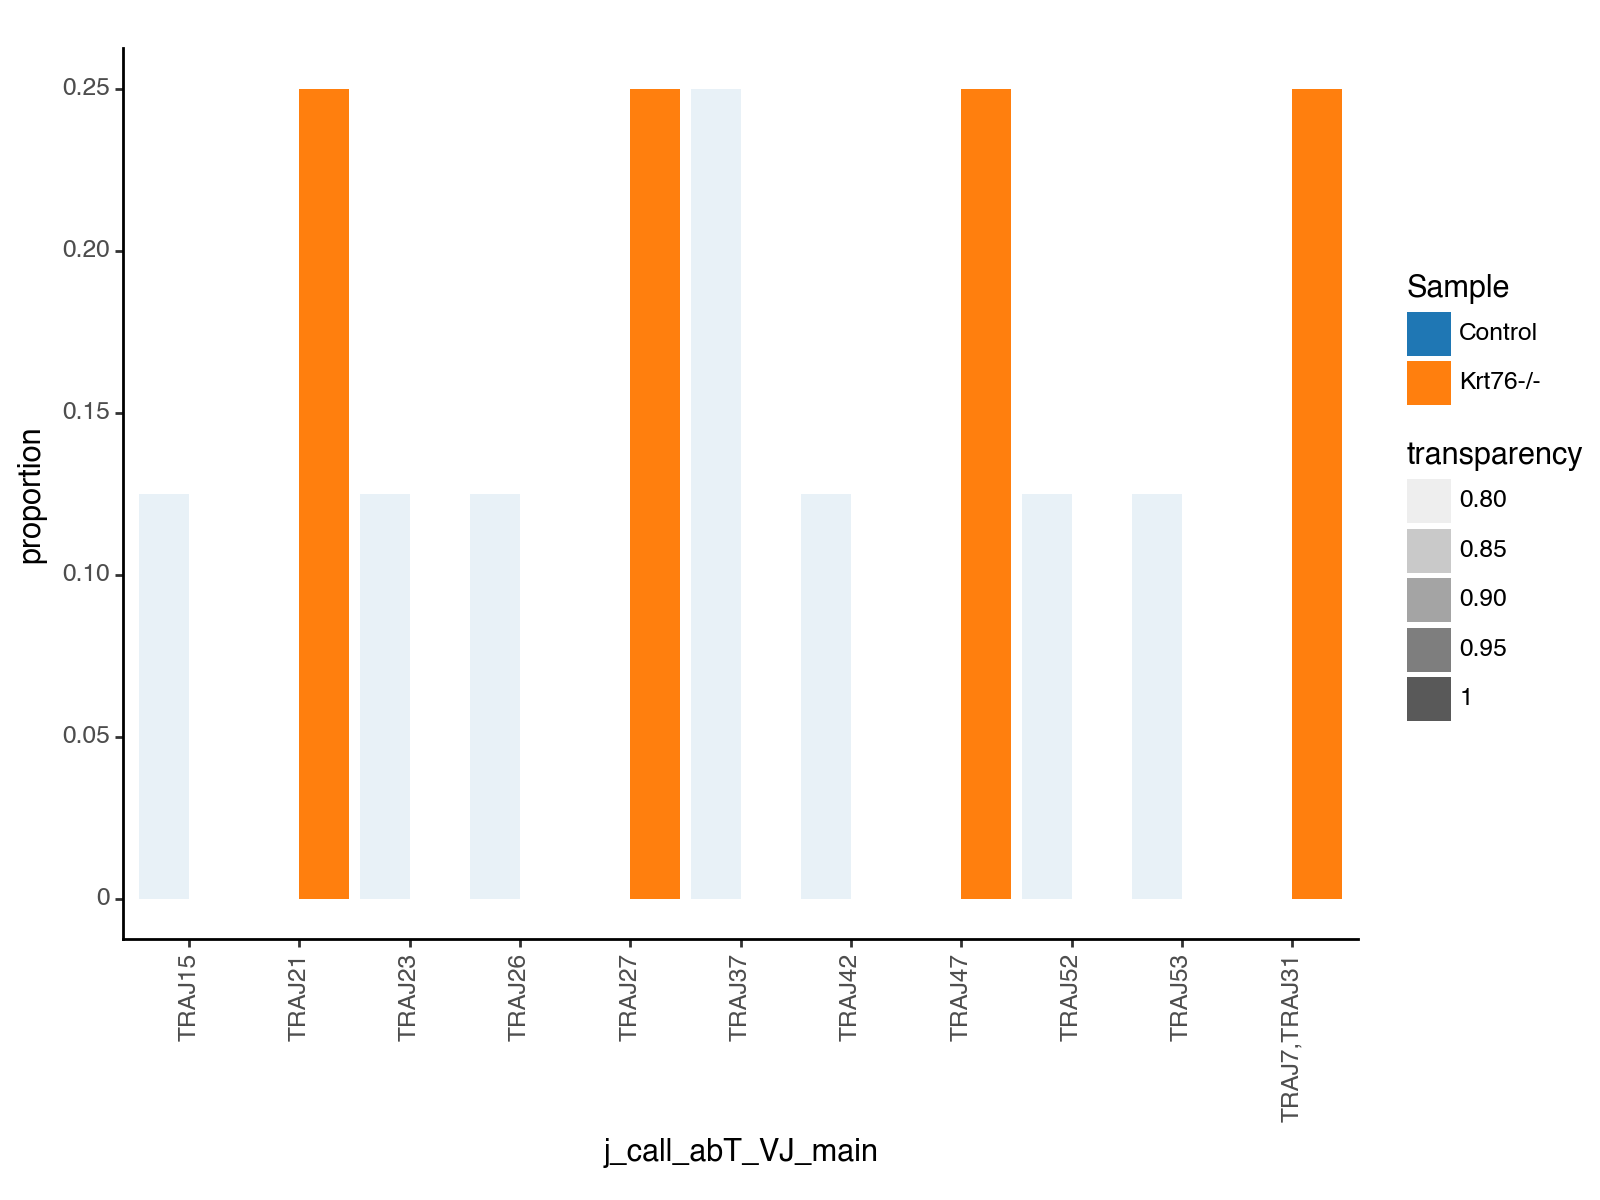

<Figure Size: (800 x 600)>

In [865]:
p

In [866]:
p.save("JgeneAlphaChain_DP2_181223.pdf", height = 6, width = 8, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_DP2_181223.pdf


### SP & DP - V gene beta chain

In [867]:
adata_NPF_SPnDP = adata_NPF[adata_NPF.obs["leiden"] == "5 SP & DP"]

In [868]:
adata_NPF_SPnDP 

View of AnnData object with n_obs × n_vars = 575 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [869]:
working_df = pd.DataFrame(adata_NPF_SPnDP.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ31                 25
         TRAJ21                 23
         TRAJ15                 21
         TRAJ22                 20
         TRAJ23                 20
...                            ...
Krt76-/- TRAJ2                   1
         TRAJ41                  0
         TRAJ38                  0
         TRAJ19                  0
         TRAJ28                  0

[90 rows x 1 columns]

In [870]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ31      25
1    Control             TRAJ21      23
2    Control             TRAJ15      21
3    Control             TRAJ22      20
4    Control             TRAJ23      20
..       ...                ...     ...
85  Krt76-/-              TRAJ2       1
86  Krt76-/-             TRAJ41       0
87  Krt76-/-             TRAJ38       0
88  Krt76-/-             TRAJ19       0
89  Krt76-/-             TRAJ28       0

[90 rows x 3 columns]

In [871]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 376, 'Krt76-/-': 199}

In [872]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [873]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ31      25    0.066489
1    Control             TRAJ21      23    0.061170
2    Control             TRAJ15      21    0.055851
3    Control             TRAJ22      20    0.053191
4    Control             TRAJ23      20    0.053191
..       ...                ...     ...         ...
85  Krt76-/-              TRAJ2       1    0.005025
86  Krt76-/-             TRAJ41       0    0.000000
87  Krt76-/-             TRAJ38       0    0.000000
88  Krt76-/-             TRAJ19       0    0.000000
89  Krt76-/-             TRAJ28       0    0.000000

[90 rows x 4 columns]

In [874]:
working_control = working_df[working_df["Sample"] == "Control"]

In [875]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [876]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [877]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [878]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ11': 1.4170854271356783,
 'TRAJ12': 1.2596314907872697,
 'TRAJ13': 1.8894472361809045,
 'TRAJ15': 0.4498683895668821,
 'TRAJ16': 1.8894472361809045,
 'TRAJ17': 1.8894472361809045,
 'TRAJ18': 1.8894472361809045,
 'TRAJ19': 0.0,
 'TRAJ2': 0.4723618090452261,
 'TRAJ21': 0.5750491588376666,
 'TRAJ22': 0.5668341708542713,
 'TRAJ23': 0.9447236180904524,
 'TRAJ24': 0.9447236180904522,
 'TRAJ26': 1.5115577889447236,
 'TRAJ27': 1.1809045226130654,
 'TRAJ28': 0.0,
 'TRAJ30': 1.1627367607267105,
 'TRAJ31': 0.8313567839195981,
 'TRAJ32': 0.5668341708542713,
 'TRAJ33': 1.469570072585148,
 'TRAJ34': 0.8720525705450328,
 'TRAJ35': inf,
 'TRAJ37': 0.6298157453936349,
 'TRAJ38': 0.0,
 'TRAJ39': 0.7267104754541941,
 'TRAJ4': 0.3778894472361809,
 'TRAJ40': 1.2146446518305816,
 'TRAJ41': 0.0,
 'TRAJ42': 1.102177554438861,
 'TRAJ43': 0.4723618090452261,
 'TRAJ44': 1.6195262024407753,
 'TRAJ45': 0.7557788944723618,
 'TRAJ46,TRAJ41,TRAJ26': 1.8894472361809045,
 'TRAJ47': 1.0796841349605169,
 'TRAJ48': 

In [879]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ31      25    0.066489    0.831357
1    Control             TRAJ21      23    0.061170    0.575049
2    Control             TRAJ15      21    0.055851    0.449868
3    Control             TRAJ22      20    0.053191    0.566834
4    Control             TRAJ23      20    0.053191    0.944724
..       ...                ...     ...         ...         ...
85  Krt76-/-              TRAJ2       1    0.005025    0.472362
86  Krt76-/-             TRAJ41       0    0.000000    0.000000
87  Krt76-/-             TRAJ38       0    0.000000    0.000000
88  Krt76-/-             TRAJ19       0    0.000000    0.000000
89  Krt76-/-             TRAJ28       0    0.000000    0.000000

[90 rows x 5 columns]

In [880]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [881]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

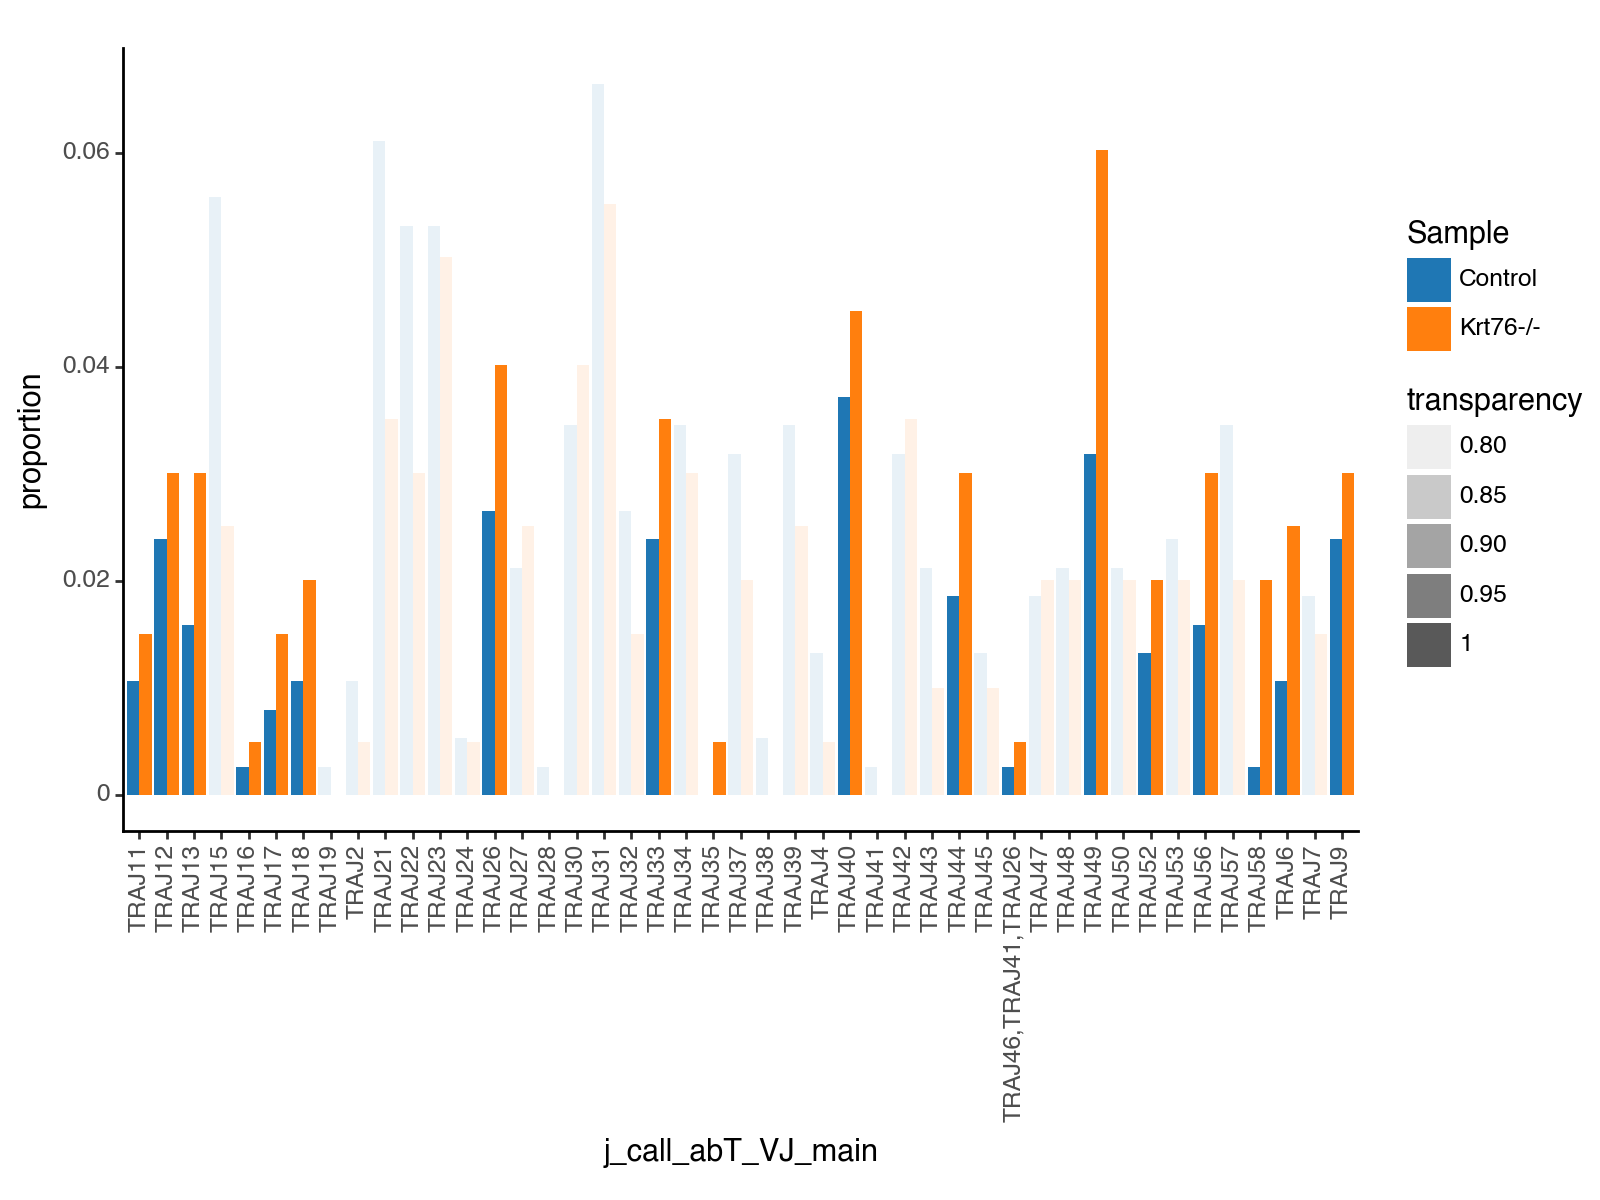

<Figure Size: (800 x 600)>

In [882]:
p

In [883]:
p.save("JgeneAlphaChain_SPnDP_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_SPnDP_181223.pdf


### TCRgd - J gene alpha chain

In [884]:
adata_NPF_TCRgd = adata_NPF[adata_NPF.obs["leiden"] == "8 TCRgd"]

In [885]:
adata_NPF_TCRgd

View of AnnData object with n_obs × n_vars = 15 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 

In [886]:
working_df = pd.DataFrame(adata_NPF_TCRgd.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ12                  1
         TRAJ40                  1
         TRAJ21                  1
         TRAJ6                   1
         TRAJ58                  1
         TRAJ49                  1
         TRAJ32                  1
         TRAJ37                  1
         TRAJ23                  1
         TRAJ27                  1
         TRAJ39                  1
         TRAJ4                   0
         TRAJ33                  0
         TRDJ1                   0
Krt76-/- TRAJ58                  1
         TRAJ4                   1
         TRAJ33                  1
         TRDJ1                   1
         TRAJ37                  0
         TRAJ6                   0
         TRAJ49                  0
         TRAJ40                  0
         TRAJ39                  0
         TRAJ32                  0
         TRAJ27                  0
         TRAJ23                  0
         TRAJ21                  0
         TRAJ12                  0

In [887]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ12       1
1    Control             TRAJ40       1
2    Control             TRAJ21       1
3    Control              TRAJ6       1
4    Control             TRAJ58       1
5    Control             TRAJ49       1
6    Control             TRAJ32       1
7    Control             TRAJ37       1
8    Control             TRAJ23       1
9    Control             TRAJ27       1
10   Control             TRAJ39       1
11   Control              TRAJ4       0
12   Control             TRAJ33       0
13   Control              TRDJ1       0
14  Krt76-/-             TRAJ58       1
15  Krt76-/-              TRAJ4       1
16  Krt76-/-             TRAJ33       1
17  Krt76-/-              TRDJ1       1
18  Krt76-/-             TRAJ37       0
19  Krt76-/-              TRAJ6       0
20  Krt76-/-             TRAJ49       0
21  Krt76-/-             TRAJ40       0
22  Krt76-/-             TRAJ39       0
23  Krt76-/-             TRAJ32       0
24  Krt76-/-             TRAJ27       0
25  Krt76-/-             TRAJ23       0
26  Krt76-/-             TRAJ21       0
27  Krt76-/-             TRAJ12       0

In [888]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 11, 'Krt76-/-': 4}

In [889]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [890]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ12       1    0.090909
1    Control             TRAJ40       1    0.090909
2    Control             TRAJ21       1    0.090909
3    Control              TRAJ6       1    0.090909
4    Control             TRAJ58       1    0.090909
5    Control             TRAJ49       1    0.090909
6    Control             TRAJ32       1    0.090909
7    Control             TRAJ37       1    0.090909
8    Control             TRAJ23       1    0.090909
9    Control             TRAJ27       1    0.090909
10   Control             TRAJ39       1    0.090909
11   Control              TRAJ4       0    0.000000
12   Control             TRAJ33       0    0.000000
13   Control              TRDJ1       0    0.000000
14  Krt76-/-             TRAJ58       1    0.250000
15  Krt76-/-              TRAJ4       1    0.250000
16  Krt76-/-             TRAJ33       1    0.250000
17  Krt76-/-              TRDJ1       1    0.250000
18  Krt76-/-             TRAJ37       0    0.000000
19  Krt76-/-              TRAJ6       0    0.000000
20  Krt76-/-             TRAJ49       0    0.000000
21  Krt76-/-             TRAJ40       0    0.000000
22  Krt76-/-             TRAJ39       0    0.000000
23  Krt76-/-             TRAJ32       0    0.000000
24  Krt76-/-             TRAJ27       0    0.000000
25  Krt76-/-             TRAJ23       0    0.000000
26  Krt76-/-             TRAJ21       0    0.000000
27  Krt76-/-             TRAJ12       0    0.000000

In [891]:
working_control = working_df[working_df["Sample"] == "Control"]

In [892]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [893]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [894]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [895]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ12': 0.0,
 'TRAJ21': 0.0,
 'TRAJ23': 0.0,
 'TRAJ27': 0.0,
 'TRAJ32': 0.0,
 'TRAJ33': inf,
 'TRAJ37': 0.0,
 'TRAJ39': 0.0,
 'TRAJ4': inf,
 'TRAJ40': 0.0,
 'TRAJ49': 0.0,
 'TRAJ58': 2.75,
 'TRAJ6': 0.0,
 'TRDJ1': inf}

In [896]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ12       1    0.090909        0.00
1    Control             TRAJ40       1    0.090909        0.00
2    Control             TRAJ21       1    0.090909        0.00
3    Control              TRAJ6       1    0.090909        0.00
4    Control             TRAJ58       1    0.090909        2.75
5    Control             TRAJ49       1    0.090909        0.00
6    Control             TRAJ32       1    0.090909        0.00
7    Control             TRAJ37       1    0.090909        0.00
8    Control             TRAJ23       1    0.090909        0.00
9    Control             TRAJ27       1    0.090909        0.00
10   Control             TRAJ39       1    0.090909        0.00
11   Control              TRAJ4       0    0.000000         inf
12   Control             TRAJ33       0    0.000000         inf
13   Control              TRDJ1       0    0.000000         inf
14  Krt76-/-             TRAJ58       1    0.250000        2.75
15  Krt76-/-              TRAJ4       1    0.250000         inf
16  Krt76-/-             TRAJ33       1    0.250000         inf
17  Krt76-/-              TRDJ1       1    0.250000         inf
18  Krt76-/-             TRAJ37       0    0.000000        0.00
19  Krt76-/-              TRAJ6       0    0.000000        0.00
20  Krt76-/-             TRAJ49       0    0.000000        0.00
21  Krt76-/-             TRAJ40       0    0.000000        0.00
22  Krt76-/-             TRAJ39       0    0.000000        0.00
23  Krt76-/-             TRAJ32       0    0.000000        0.00
24  Krt76-/-             TRAJ27       0    0.000000        0.00
25  Krt76-/-             TRAJ23       0    0.000000        0.00
26  Krt76-/-             TRAJ21       0    0.000000        0.00
27  Krt76-/-             TRAJ12       0    0.000000        0.00

In [897]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [898]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

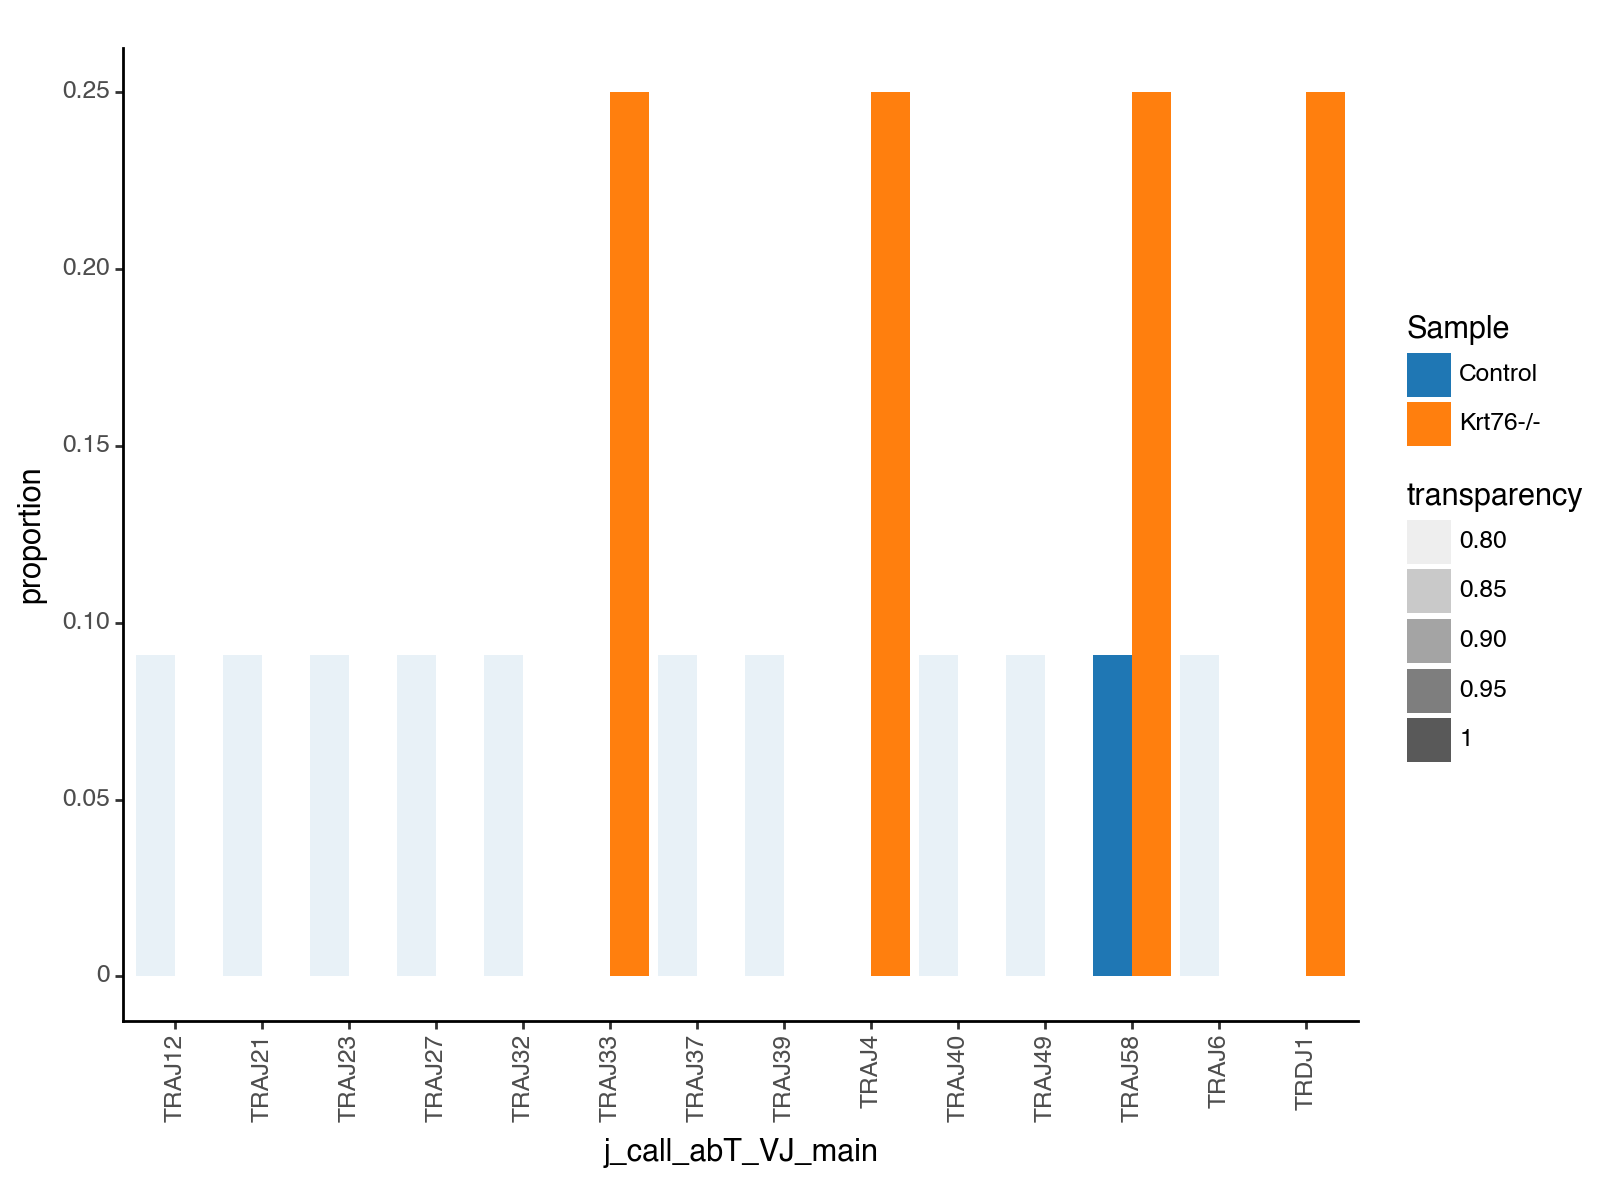

<Figure Size: (800 x 600)>

In [899]:
p

In [900]:
p.save("JgeneAlphaChain_TCRgd_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_TCRgd_181223.pdf


### NKT / NK / Tregs - J gene alpha chain

In [901]:
adata_NPF_NKT_NK_Tregs = adata_NPF[adata_NPF.obs["leiden"] == "11 NKT / NK / Tregs"]

In [902]:
adata_NPF_NKT_NK_Tregs

View of AnnData object with n_obs × n_vars = 105 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [903]:
working_df = pd.DataFrame(adata_NPF_NKT_NK_Tregs.obs.groupby("Sample")["j_call_abT_VJ_main"].value_counts())
working_df

count
Sample   j_call_abT_VJ_main       
Control  TRAJ18                  9
         TRAJ30                  8
         TRAJ21                  5
         TRAJ23                  5
         TRAJ57                  4
...                            ...
Krt76-/- TRAJ22                  0
         TRAJ21                  0
         TRAJ17                  0
         TRAJ13                  0
         TRAJ9                   0

[68 rows x 1 columns]

In [904]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

Sample j_call_abT_VJ_main  counts
0    Control             TRAJ18       9
1    Control             TRAJ30       8
2    Control             TRAJ21       5
3    Control             TRAJ23       5
4    Control             TRAJ57       4
..       ...                ...     ...
63  Krt76-/-             TRAJ22       0
64  Krt76-/-             TRAJ21       0
65  Krt76-/-             TRAJ17       0
66  Krt76-/-             TRAJ13       0
67  Krt76-/-              TRAJ9       0

[68 rows x 3 columns]

In [905]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.Sample.unique():
    tmp = working_df[working_df["Sample"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'Control': 87, 'Krt76-/-': 18}

In [906]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["Sample"]]
    except:
        pass

In [907]:
working_df

Sample j_call_abT_VJ_main  counts  proportion
0    Control             TRAJ18       9    0.103448
1    Control             TRAJ30       8    0.091954
2    Control             TRAJ21       5    0.057471
3    Control             TRAJ23       5    0.057471
4    Control             TRAJ57       4    0.045977
..       ...                ...     ...         ...
63  Krt76-/-             TRAJ22       0    0.000000
64  Krt76-/-             TRAJ21       0    0.000000
65  Krt76-/-             TRAJ17       0    0.000000
66  Krt76-/-             TRAJ13       0    0.000000
67  Krt76-/-              TRAJ9       0    0.000000

[68 rows x 4 columns]

In [908]:
working_control = working_df[working_df["Sample"] == "Control"]

In [909]:
working_KO = working_df[working_df["Sample"] == "Krt76-/-"]

In [910]:
working_control.set_index("j_call_abT_VJ_main", inplace=True)

In [911]:
working_KO.set_index("j_call_abT_VJ_main", inplace=True)

In [912]:
dict1 = dict(working_KO.proportion/ working_control.proportion)
dict1

{'TRAJ12': 0.0,
 'TRAJ13': 0.0,
 'TRAJ16': inf,
 'TRAJ17': 0.0,
 'TRAJ18': 2.6851851851851856,
 'TRAJ21': 0.0,
 'TRAJ22': 0.0,
 'TRAJ23': 0.9666666666666667,
 'TRAJ24': 0.0,
 'TRAJ26': 0.0,
 'TRAJ27': 0.0,
 'TRAJ30': 0.0,
 'TRAJ31': 0.0,
 'TRAJ32': 2.4166666666666665,
 'TRAJ34': 0.0,
 'TRAJ37': 4.833333333333333,
 'TRAJ38': 0.0,
 'TRAJ39': 1.2083333333333333,
 'TRAJ4': 0.0,
 'TRAJ40': 1.611111111111111,
 'TRAJ42': 0.0,
 'TRAJ43': inf,
 'TRAJ44': 0.0,
 'TRAJ45': 0.0,
 'TRAJ48': 14.5,
 'TRAJ49': 0.0,
 'TRAJ50': 0.0,
 'TRAJ52': 0.0,
 'TRAJ53': 0.0,
 'TRAJ56': 4.833333333333333,
 'TRAJ57': 0.0,
 'TRAJ58': 0.0,
 'TRAJ6': 0.0,
 'TRAJ9': 0.0}

In [913]:
working_df["foldchange"] = [dict1[x] for x in working_df["j_call_abT_VJ_main"]]
working_df

Sample j_call_abT_VJ_main  counts  proportion  foldchange
0    Control             TRAJ18       9    0.103448    2.685185
1    Control             TRAJ30       8    0.091954    0.000000
2    Control             TRAJ21       5    0.057471    0.000000
3    Control             TRAJ23       5    0.057471    0.966667
4    Control             TRAJ57       4    0.045977    0.000000
..       ...                ...     ...         ...         ...
63  Krt76-/-             TRAJ22       0    0.000000    0.000000
64  Krt76-/-             TRAJ21       0    0.000000    0.000000
65  Krt76-/-             TRAJ17       0    0.000000    0.000000
66  Krt76-/-             TRAJ13       0    0.000000    0.000000
67  Krt76-/-              TRAJ9       0    0.000000    0.000000

[68 rows x 5 columns]

In [914]:
working_df = working_df.copy()
working_df["transparency"] = 0.8
for i, j in working_df.iterrows():
    if abs(working_df.at[i, "foldchange"]) >= 1.2:
        working_df.at[i, "transparency"] = 1

# working_df[abs(working_df["foldchange"]) > 1.25 ]["transparency"] = 1

In [915]:
options.figure_size = (8,6)
p = (
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="Sample", alpha = "transparency"),
    )
    + geom_bar(stat ="identity", position = "dodge")
    #+ facet_wrap("~Sample", ncol=2)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90)))

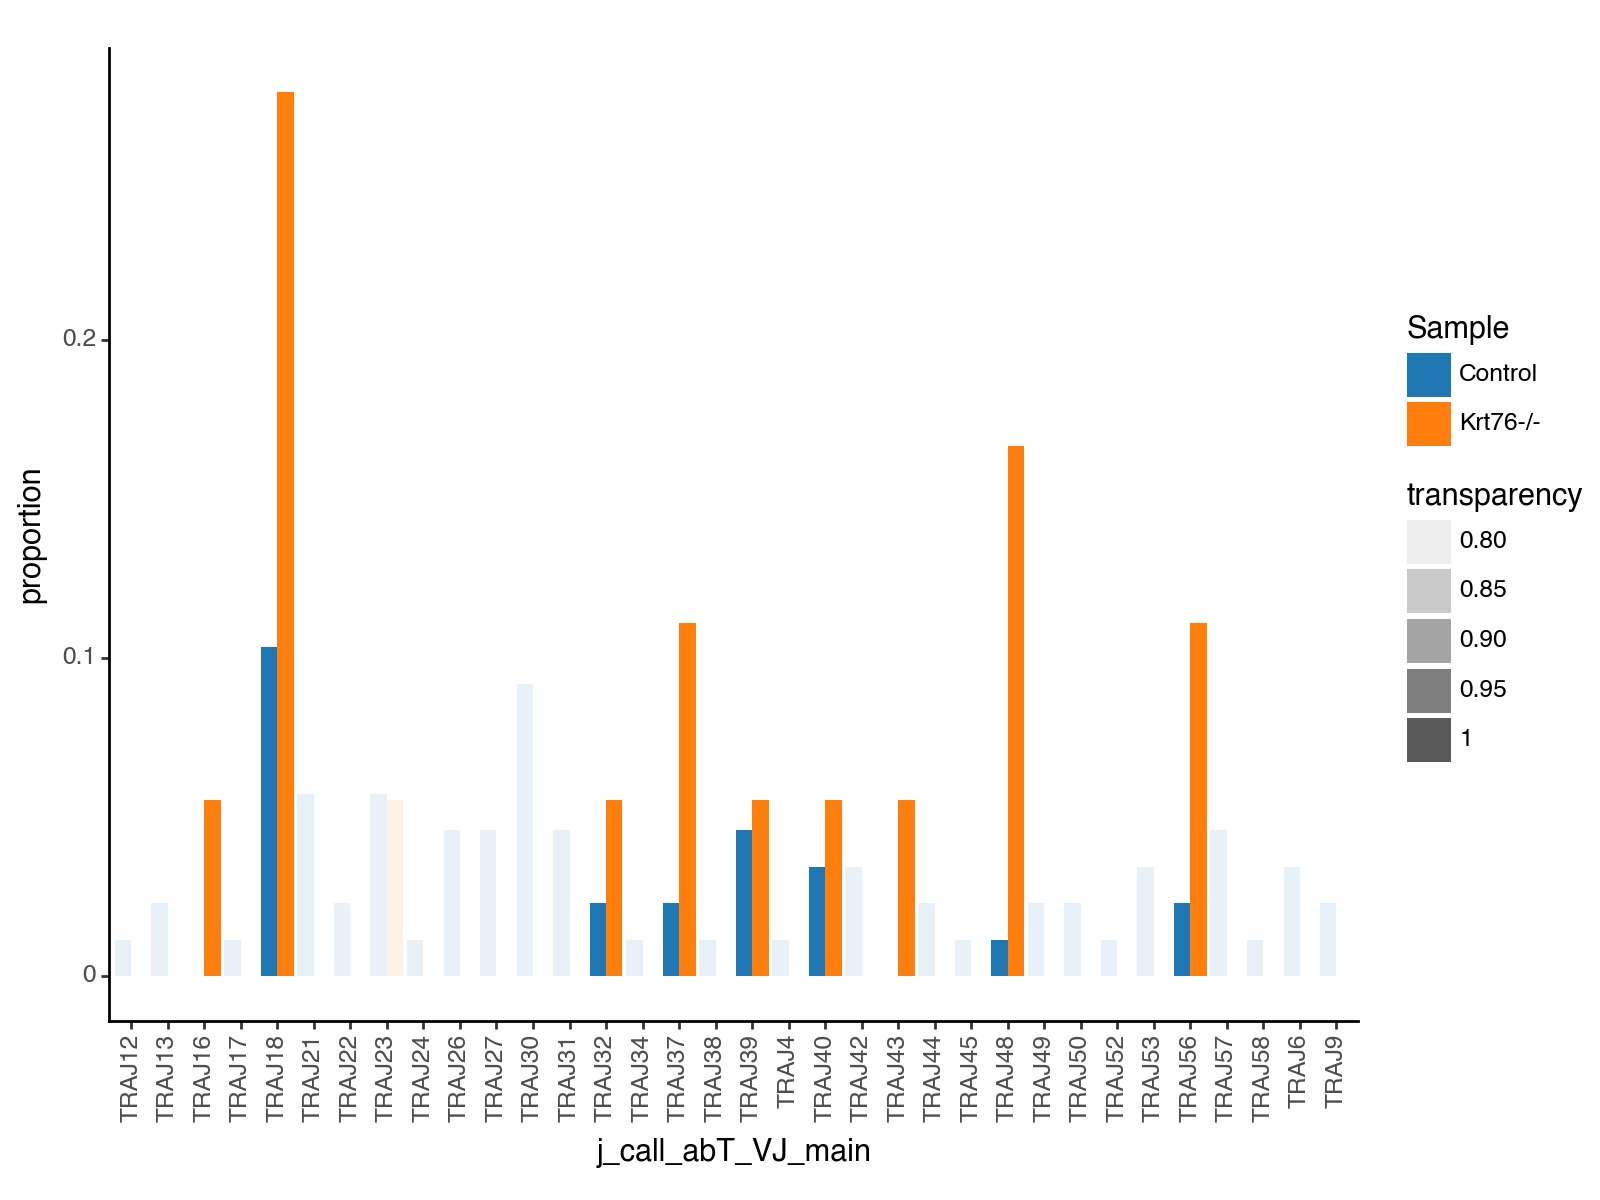

<Figure Size: (800 x 600)>

In [916]:
p

In [917]:
p.save("JgeneAlphaChain_NKT_NK_Tregs_181223.pdf", height = 14, width = 20, limitsize=False)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 20 x 14 in image.
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: JgeneAlphaChain_NKT_NK_Tregs_181223.pdf
